In [124]:
# importing the required libraries and packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

In [2]:
# The below instruction will allow us to view all the columns of the dataset
pd.set_option("display.max_columns",None)

In [3]:
# reading the dataset and displaying the first five records of it
data=pd.read_csv(r"E:\Data Science\Case Studies\home_insurance.csv")
data.head()

,QUOTE_DATE,COVER_START,CLAIM3YEARS,P1_EMP_STATUS,P1_PT_EMP_STATUS,BUS_USE,CLERICAL,AD_BUILDINGS,RISK_RATED_AREA_B,SUM_INSURED_BUILDINGS,NCD_GRANTED_YEARS_B,AD_CONTENTS,RISK_RATED_AREA_C,SUM_INSURED_CONTENTS,NCD_GRANTED_YEARS_C,CONTENTS_COVER,BUILDINGS_COVER,SPEC_SUM_INSURED,SPEC_ITEM_PREM,UNSPEC_HRP_PREM,P1_DOB,P1_MAR_STATUS,P1_POLICY_REFUSED,P1_SEX,APPR_ALARM,APPR_LOCKS,BEDROOMS,ROOF_CONSTRUCTION,WALL_CONSTRUCTION,FLOODING,LISTED,MAX_DAYS_UNOCC,NEIGH_WATCH,OCC_STATUS,OWNERSHIP_TYPE,PAYING_GUESTS,PROP_TYPE,SAFE_INSTALLED,SEC_DISC_REQ,SUBSIDENCE,YEARBUILT,CAMPAIGN_DESC,PAYMENT_METHOD,PAYMENT_FREQUENCY,LEGAL_ADDON_PRE_REN,LEGAL_ADDON_POST_REN,HOME_EM_ADDON_PRE_REN,HOME_EM_ADDON_POST_REN,GARDEN_ADDON_PRE_REN,GARDEN_ADDON_POST_REN,KEYCARE_ADDON_PRE_REN,KEYCARE_ADDON_POST_REN,HP1_ADDON_PRE_REN,HP1_ADDON_POST_REN,HP2_ADDON_PRE_REN,HP2_ADDON_POST_REN,HP3_ADDON_PRE_REN,HP3_ADDON_POST_REN,MTA_FLAG,MTA_FAP,MTA_APRP,MTA_DATE,LAST_ANN_PREM_GROSS,POL_STATUS,i,Police
0,11/22/2007,22/11/2007,N,R,NaN,N,NaN,Y,19.0,1000000.0,7.0,Y,6.0,50000.0,7.0,Y,Y,7500.0,44.42,12.45,15/06/1939,O,N,M,N,Y,3.0,11.0,15.0,Y,3.0,0.0,N,PH,8.0,0.0,10.0,Y,Y,N,1960.0,NaN,PureDD,NaN,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,NaN,NaN,NaN,274.81,Lapsed,1,P000001
1,11/22/2007,01/01/2008,N,E,NaN,Y,N,Y,25.0,1000000.0,6.0,Y,9.0,50000.0,7.0,Y,Y,0.0,0.00,24.60,20/05/1970,M,N,M,N,N,3.0,11.0,15.0,Y,3.0,0.0,N,PH,3.0,0.0,2.0,N,N,N,1960.0,NaN,PureDD,NaN,Y,Y,N,N,N,N,N,N,N,N,N,N,N,N,Y,308.83,-9.27,NaN,308.83,Live,2,P000002
2,11/23/2007,23/11/2007,N,E,NaN,N,NaN,N,NaN,0.0,0.0,Y,12.0,50000.0,7.0,N,Y,0.0,0.00,0.00,10/06/1947,S,N,M,Y,Y,2.0,11.0,15.0,Y,3.0,0.0,Y,PH,8.0,0.0,9.0,N,Y,N,1946.0,NaN,PureDD,NaN,Y,Y,N,N,N,N,N,N,N,N,N,N,N,N,Y,52.65,52.65,03/11/2010,52.65,Live,3,P000003
3,11/23/2007,12/12/2007,N,R,NaN,N,NaN,N,NaN,0.0,0.0,Y,14.0,50000.0,7.0,N,Y,0.0,0.00,0.00,16/12/1925,W,N,F,N,Y,2.0,11.0,15.0,Y,3.0,0.0,N,PH,18.0,0.0,19.0,N,Y,N,1870.0,NaN,NonDD,NaN,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,NaN,NaN,NaN,54.23,Live,4,P000004
4,11/22/2007,15/12/2007,N,R,NaN,N,NaN,Y,5.0,1000000.0,7.0,Y,10.0,50000.0,7.0,Y,Y,0.0,0.00,19.82,11/02/1936,M,N,M,Y,Y,3.0,11.0,15.0,Y,3.0,0.0,N,PH,8.0,0.0,1.0,N,Y,N,1960.0,NaN,DD-Other,NaN,Y,Y,N,N,Y,Y,N,N,N,N,N,N,N,N,N,NaN,NaN,NaN,244.58,Live,5,P000005


In [4]:
# info() will provide the information about the number of non-null values and data type of each and every variable
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256136 entries, 0 to 256135
Data columns (total 66 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   QUOTE_DATE              129524 non-null  object 
 1   COVER_START             189021 non-null  object 
 2   CLAIM3YEARS             190039 non-null  object 
 3   P1_EMP_STATUS           189021 non-null  object 
 4   P1_PT_EMP_STATUS        1782 non-null    object 
 5   BUS_USE                 189021 non-null  object 
 6   CLERICAL                2944 non-null    object 
 7   AD_BUILDINGS            189021 non-null  object 
 8   RISK_RATED_AREA_B       140876 non-null  float64
 9   SUM_INSURED_BUILDINGS   189021 non-null  float64
 10  NCD_GRANTED_YEARS_B     189021 non-null  float64
 11  AD_CONTENTS             189021 non-null  object 
 12  RISK_RATED_AREA_C       180290 non-null  float64
 13  SUM_INSURED_CONTENTS    189021 non-null  float64
 14  NCD_GRANTED_YEARS_C 

In [5]:
# The below code prints the number of unique values of each variable
for col in data:
    print(col,data[col].nunique())

QUOTE_DATE 1260
COVER_START 2207
CLAIM3YEARS 2
P1_EMP_STATUS 11
P1_PT_EMP_STATUS 9
BUS_USE 2
CLERICAL 2
AD_BUILDINGS 2
RISK_RATED_AREA_B 54
SUM_INSURED_BUILDINGS 2
NCD_GRANTED_YEARS_B 10
AD_CONTENTS 2
RISK_RATED_AREA_C 49
SUM_INSURED_CONTENTS 11
NCD_GRANTED_YEARS_C 10
CONTENTS_COVER 2
BUILDINGS_COVER 2
SPEC_SUM_INSURED 2155
SPEC_ITEM_PREM 5474
UNSPEC_HRP_PREM 2993
P1_DOB 19899
P1_MAR_STATUS 10
P1_POLICY_REFUSED 2
P1_SEX 3
APPR_ALARM 2
APPR_LOCKS 2
BEDROOMS 7
ROOF_CONSTRUCTION 17
WALL_CONSTRUCTION 19
FLOODING 2
LISTED 5
MAX_DAYS_UNOCC 7
NEIGH_WATCH 2
OCC_STATUS 7
OWNERSHIP_TYPE 14
PAYING_GUESTS 2
PROP_TYPE 36
SAFE_INSTALLED 2
SEC_DISC_REQ 2
SUBSIDENCE 2
YEARBUILT 17
CAMPAIGN_DESC 0
PAYMENT_METHOD 3
PAYMENT_FREQUENCY 1
LEGAL_ADDON_PRE_REN 2
LEGAL_ADDON_POST_REN 2
HOME_EM_ADDON_PRE_REN 2
HOME_EM_ADDON_POST_REN 2
GARDEN_ADDON_PRE_REN 2
GARDEN_ADDON_POST_REN 2
KEYCARE_ADDON_PRE_REN 2
KEYCARE_ADDON_POST_REN 2
HP1_ADDON_PRE_REN 2
HP1_ADDON_POST_REN 2
HP2_ADDON_PRE_REN 2
HP2_ADDON_POST_REN 2
H

In [6]:
# "CAMPAIGN_DESC" is an empty column and "PAYMENT_FREQUENCY" is a single valued column, "i" and "Police" are id columns.
# These variables are not providing any added information to data analysis. Hence, we are removing them.
df= data.drop(["CAMPAIGN_DESC","PAYMENT_FREQUENCY","i","Police"],axis=1)
df.shape

(256136, 62)

In [7]:
# Checking all the features with NA values and listing them.
features_with_na=[feature for feature in df.columns if df[feature].isna().sum()>0]
features_with_na

['QUOTE_DATE',
 'COVER_START',
 'CLAIM3YEARS',
 'P1_EMP_STATUS',
 'P1_PT_EMP_STATUS',
 'BUS_USE',
 'CLERICAL',
 'AD_BUILDINGS',
 'RISK_RATED_AREA_B',
 'SUM_INSURED_BUILDINGS',
 'NCD_GRANTED_YEARS_B',
 'AD_CONTENTS',
 'RISK_RATED_AREA_C',
 'SUM_INSURED_CONTENTS',
 'NCD_GRANTED_YEARS_C',
 'CONTENTS_COVER',
 'BUILDINGS_COVER',
 'SPEC_SUM_INSURED',
 'SPEC_ITEM_PREM',
 'UNSPEC_HRP_PREM',
 'P1_DOB',
 'P1_MAR_STATUS',
 'P1_POLICY_REFUSED',
 'P1_SEX',
 'APPR_ALARM',
 'APPR_LOCKS',
 'BEDROOMS',
 'ROOF_CONSTRUCTION',
 'WALL_CONSTRUCTION',
 'FLOODING',
 'LISTED',
 'MAX_DAYS_UNOCC',
 'NEIGH_WATCH',
 'OCC_STATUS',
 'OWNERSHIP_TYPE',
 'PAYING_GUESTS',
 'PROP_TYPE',
 'SAFE_INSTALLED',
 'SEC_DISC_REQ',
 'SUBSIDENCE',
 'YEARBUILT',
 'PAYMENT_METHOD',
 'LEGAL_ADDON_PRE_REN',
 'LEGAL_ADDON_POST_REN',
 'HOME_EM_ADDON_PRE_REN',
 'HOME_EM_ADDON_POST_REN',
 'GARDEN_ADDON_PRE_REN',
 'GARDEN_ADDON_POST_REN',
 'KEYCARE_ADDON_PRE_REN',
 'KEYCARE_ADDON_POST_REN',
 'HP1_ADDON_PRE_REN',
 'HP1_ADDON_POST_REN',
 'HP2

In [8]:
# Calculating the fractional amount of missing values in each variable with NA values
missing_fractions = df[features_with_na].isnull().mean().sort_values(ascending=False)
missing_fractions

P1_PT_EMP_STATUS       0.993043
CLERICAL               0.988506
MTA_DATE               0.896247
MTA_APRP               0.782459
MTA_FAP                0.782459
                         ...   
FLOODING               0.262029
POL_STATUS             0.262029
MTA_FLAG               0.258054
CLAIM3YEARS            0.258054
LAST_ANN_PREM_GROSS    0.258054
Length: 62, dtype: float64

In [9]:
# Preparing a drop list with missing values greater than 30%
drop_list = sorted(list(missing_fractions[missing_fractions > 0.3].index))
print(drop_list)

['CLERICAL', 'MTA_APRP', 'MTA_DATE', 'MTA_FAP', 'P1_PT_EMP_STATUS', 'QUOTE_DATE', 'RISK_RATED_AREA_B']


In [10]:
# As it does not make sense of imputing missing values with mean or median if, 
# more than 30% of data is missing. Hence, Dropping the columns/variables with >30% data missing.
df.drop(labels=drop_list, axis=1, inplace=True)

In [11]:
df.shape

(256136, 55)

In [12]:
# Converting the datatype of the variables "COVER_START" and "P1_DOB" to string data type
df["COVER_START"] = df["COVER_START"].astype(str)
df["P1_DOB"]=df["P1_DOB"].astype(str)

In [13]:
# Extracting only year from "COVER_START"
cvr_strt_yr=[]
for x in df["COVER_START"]:
    cvr_strt_yr.append(x[6:])

In [14]:
# Extracting only year from "P1_DOB"
dob=[]
for x in df["P1_DOB"]:
    dob.append(x[6:])

In [15]:
# Created two new columns ""cvr_strt_yr"" and "dob" representing only years
df["cvr_strt_yr"]=cvr_strt_yr
df["dob"]=dob

In [16]:
df.head()

,COVER_START,CLAIM3YEARS,P1_EMP_STATUS,BUS_USE,AD_BUILDINGS,SUM_INSURED_BUILDINGS,NCD_GRANTED_YEARS_B,AD_CONTENTS,RISK_RATED_AREA_C,SUM_INSURED_CONTENTS,NCD_GRANTED_YEARS_C,CONTENTS_COVER,BUILDINGS_COVER,SPEC_SUM_INSURED,SPEC_ITEM_PREM,UNSPEC_HRP_PREM,P1_DOB,P1_MAR_STATUS,P1_POLICY_REFUSED,P1_SEX,APPR_ALARM,APPR_LOCKS,BEDROOMS,ROOF_CONSTRUCTION,WALL_CONSTRUCTION,FLOODING,LISTED,MAX_DAYS_UNOCC,NEIGH_WATCH,OCC_STATUS,OWNERSHIP_TYPE,PAYING_GUESTS,PROP_TYPE,SAFE_INSTALLED,SEC_DISC_REQ,SUBSIDENCE,YEARBUILT,PAYMENT_METHOD,LEGAL_ADDON_PRE_REN,LEGAL_ADDON_POST_REN,HOME_EM_ADDON_PRE_REN,HOME_EM_ADDON_POST_REN,GARDEN_ADDON_PRE_REN,GARDEN_ADDON_POST_REN,KEYCARE_ADDON_PRE_REN,KEYCARE_ADDON_POST_REN,HP1_ADDON_PRE_REN,HP1_ADDON_POST_REN,HP2_ADDON_PRE_REN,HP2_ADDON_POST_REN,HP3_ADDON_PRE_REN,HP3_ADDON_POST_REN,MTA_FLAG,LAST_ANN_PREM_GROSS,POL_STATUS,cvr_strt_yr,dob
0,22/11/2007,N,R,N,Y,1000000.0,7.0,Y,6.0,50000.0,7.0,Y,Y,7500.0,44.42,12.45,15/06/1939,O,N,M,N,Y,3.0,11.0,15.0,Y,3.0,0.0,N,PH,8.0,0.0,10.0,Y,Y,N,1960.0,PureDD,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,274.81,Lapsed,2007,1939
1,01/01/2008,N,E,Y,Y,1000000.0,6.0,Y,9.0,50000.0,7.0,Y,Y,0.0,0.00,24.60,20/05/1970,M,N,M,N,N,3.0,11.0,15.0,Y,3.0,0.0,N,PH,3.0,0.0,2.0,N,N,N,1960.0,PureDD,Y,Y,N,N,N,N,N,N,N,N,N,N,N,N,Y,308.83,Live,2008,1970
2,23/11/2007,N,E,N,N,0.0,0.0,Y,12.0,50000.0,7.0,N,Y,0.0,0.00,0.00,10/06/1947,S,N,M,Y,Y,2.0,11.0,15.0,Y,3.0,0.0,Y,PH,8.0,0.0,9.0,N,Y,N,1946.0,PureDD,Y,Y,N,N,N,N,N,N,N,N,N,N,N,N,Y,52.65,Live,2007,1947
3,12/12/2007,N,R,N,N,0.0,0.0,Y,14.0,50000.0,7.0,N,Y,0.0,0.00,0.00,16/12/1925,W,N,F,N,Y,2.0,11.0,15.0,Y,3.0,0.0,N,PH,18.0,0.0,19.0,N,Y,N,1870.0,NonDD,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,54.23,Live,2007,1925
4,15/12/2007,N,R,N,Y,1000000.0,7.0,Y,10.0,50000.0,7.0,Y,Y,0.0,0.00,19.82,11/02/1936,M,N,M,Y,Y,3.0,11.0,15.0,Y,3.0,0.0,N,PH,8.0,0.0,1.0,N,Y,N,1960.0,DD-Other,Y,Y,N,N,Y,Y,N,N,N,N,N,N,N,N,N,244.58,Live,2007,1936


In [17]:
# Dropping the columns "COVER_START" and "P1_DOB"
df1=df.drop(["COVER_START","P1_DOB"],axis=1)

In [18]:
# Converting "dob" and 'cvr_strt_yr' to numeric values and finding age of the customer and age of building and adding the
# two columns "age" and "age_building" to the data frame and removing "YEARBUILT" column
df1["dob"]=pd.to_numeric(df1['dob'],errors='coerce')
df1['cvr_strt_yr'] = pd.to_numeric(df1['cvr_strt_yr'],errors='coerce')
df1["age"]=df1["cvr_strt_yr"]-df1["dob"]
df1["age_building"]=df1["cvr_strt_yr"]-df1["YEARBUILT"]
df2=df1.drop("YEARBUILT",axis=1)

In [19]:
df2.shape

(256136, 56)

In [20]:
# Dropping all the records where all the column values for a record are NAs
df2=df2.dropna(how="all")
df2.shape

(190039, 56)

In [21]:
# Finding the number of unique values of each variable
for col in df2:
    print(col,df2[col].nunique())

CLAIM3YEARS 2
P1_EMP_STATUS 11
BUS_USE 2
AD_BUILDINGS 2
SUM_INSURED_BUILDINGS 2
NCD_GRANTED_YEARS_B 10
AD_CONTENTS 2
RISK_RATED_AREA_C 49
SUM_INSURED_CONTENTS 11
NCD_GRANTED_YEARS_C 10
CONTENTS_COVER 2
BUILDINGS_COVER 2
SPEC_SUM_INSURED 2155
SPEC_ITEM_PREM 5474
UNSPEC_HRP_PREM 2993
P1_MAR_STATUS 10
P1_POLICY_REFUSED 2
P1_SEX 3
APPR_ALARM 2
APPR_LOCKS 2
BEDROOMS 7
ROOF_CONSTRUCTION 17
WALL_CONSTRUCTION 19
FLOODING 2
LISTED 5
MAX_DAYS_UNOCC 7
NEIGH_WATCH 2
OCC_STATUS 7
OWNERSHIP_TYPE 14
PAYING_GUESTS 2
PROP_TYPE 36
SAFE_INSTALLED 2
SEC_DISC_REQ 2
SUBSIDENCE 2
PAYMENT_METHOD 3
LEGAL_ADDON_PRE_REN 2
LEGAL_ADDON_POST_REN 2
HOME_EM_ADDON_PRE_REN 2
HOME_EM_ADDON_POST_REN 2
GARDEN_ADDON_PRE_REN 2
GARDEN_ADDON_POST_REN 2
KEYCARE_ADDON_PRE_REN 2
KEYCARE_ADDON_POST_REN 2
HP1_ADDON_PRE_REN 2
HP1_ADDON_POST_REN 2
HP2_ADDON_PRE_REN 2
HP2_ADDON_POST_REN 2
HP3_ADDON_PRE_REN 2
HP3_ADDON_POST_REN 2
MTA_FLAG 2
LAST_ANN_PREM_GROSS 37445
POL_STATUS 4
cvr_strt_yr 21
dob 89
age 88
age_building 143


In [22]:
# As part of feature selection, in order to avoid over-fitting, we are checking the number of matching values of 
# Legal_addon before and after 1st renewal
len(df2.loc[df2["LEGAL_ADDON_PRE_REN"]==df2["LEGAL_ADDON_POST_REN"]])

178113

<AxesSubplot:xlabel='LEGAL_ADDON_PRE_REN'>

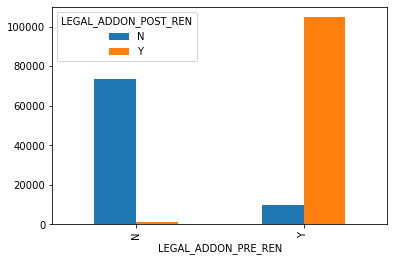

In [23]:
pd.crosstab(df2.LEGAL_ADDON_PRE_REN,df2.LEGAL_ADDON_POST_REN).plot(kind='bar')

<AxesSubplot:xlabel='LEGAL_ADDON_PRE_REN'>

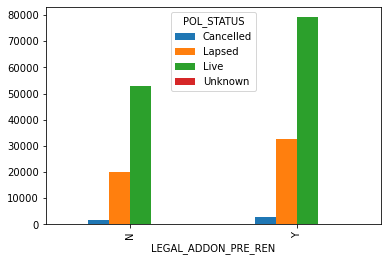

In [24]:
pd.crosstab(df2.LEGAL_ADDON_PRE_REN,df2.POL_STATUS).plot(kind='bar')

<AxesSubplot:xlabel='LEGAL_ADDON_POST_REN'>

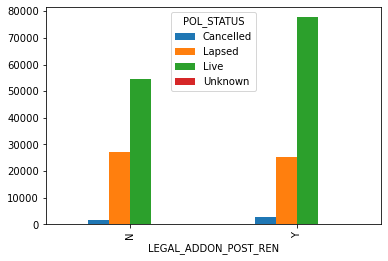

In [25]:
pd.crosstab(df2.LEGAL_ADDON_POST_REN,df2.POL_STATUS).plot(kind='bar')

In [26]:
# As part of feature selection, in order to avoid over-fitting, we are checking the number of matching values of 
# Home_Em before and after 1st renewal
len(df2.loc[df2["HOME_EM_ADDON_PRE_REN"]==df2["HOME_EM_ADDON_POST_REN"]])

145381

<AxesSubplot:xlabel='HOME_EM_ADDON_PRE_REN'>

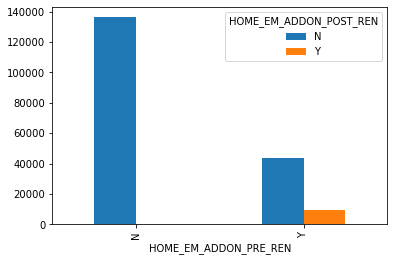

In [27]:
pd.crosstab(df2.HOME_EM_ADDON_PRE_REN,df2.HOME_EM_ADDON_POST_REN).plot(kind='bar')

<AxesSubplot:xlabel='HOME_EM_ADDON_PRE_REN'>

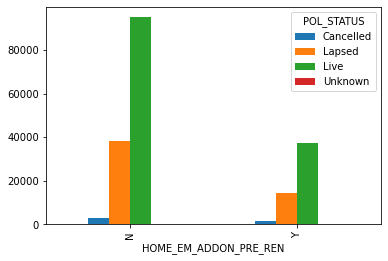

In [28]:
pd.crosstab(df2.HOME_EM_ADDON_PRE_REN,df2.POL_STATUS).plot(kind='bar')

<AxesSubplot:xlabel='HOME_EM_ADDON_POST_REN'>

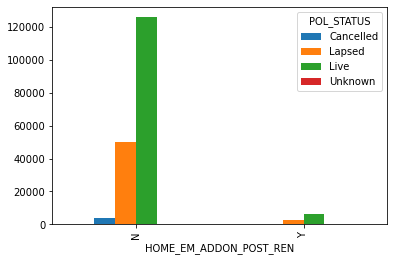

In [29]:
pd.crosstab(df2.HOME_EM_ADDON_POST_REN,df2.POL_STATUS).plot(kind='bar')

In [30]:
# As part of feature selection, in order to avoid over-fitting, we are checking the number of matching values of 
# Garden_addon before and after 1st renewal
len(df2.loc[df2["GARDEN_ADDON_PRE_REN"]==df2["GARDEN_ADDON_POST_REN"]])

187053

<AxesSubplot:xlabel='GARDEN_ADDON_PRE_REN'>

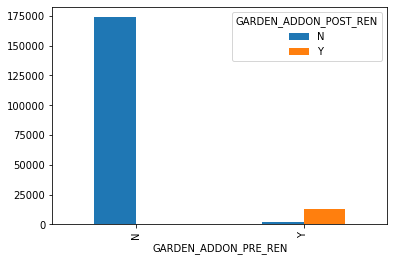

In [31]:
pd.crosstab(df2.GARDEN_ADDON_PRE_REN,df2.GARDEN_ADDON_POST_REN).plot(kind='bar')

<AxesSubplot:xlabel='GARDEN_ADDON_PRE_REN'>

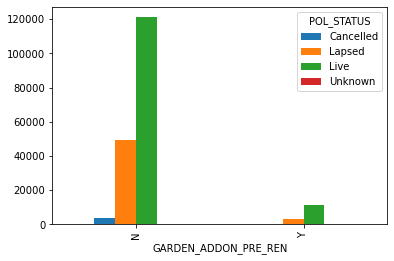

In [32]:
pd.crosstab(df2.GARDEN_ADDON_PRE_REN,df2.POL_STATUS).plot(kind='bar')

<AxesSubplot:xlabel='GARDEN_ADDON_POST_REN'>

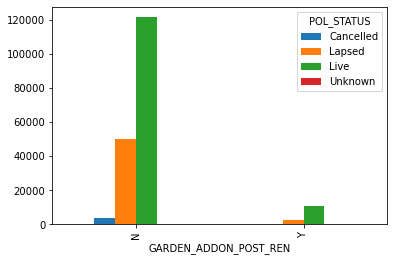

In [33]:
pd.crosstab(df2.GARDEN_ADDON_POST_REN,df2.POL_STATUS).plot(kind='bar')

In [34]:
# As part of feature selection, in order to avoid over-fitting, we are checking the number of matching values of 
# Keycare_addon before and after 1st renewal
len(df2.loc[df2["KEYCARE_ADDON_PRE_REN"]==df2["KEYCARE_ADDON_POST_REN"]])

185689

<AxesSubplot:xlabel='KEYCARE_ADDON_PRE_REN'>

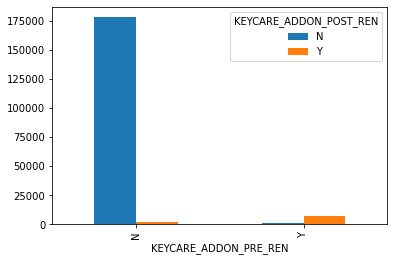

In [35]:
pd.crosstab(df2.KEYCARE_ADDON_PRE_REN,df2.KEYCARE_ADDON_POST_REN).plot(kind='bar')

<AxesSubplot:xlabel='KEYCARE_ADDON_PRE_REN'>

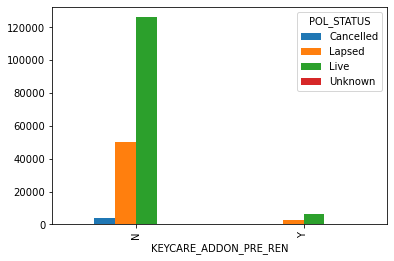

In [36]:
pd.crosstab(df2.KEYCARE_ADDON_PRE_REN,df2.POL_STATUS).plot(kind='bar')

<AxesSubplot:xlabel='KEYCARE_ADDON_POST_REN'>

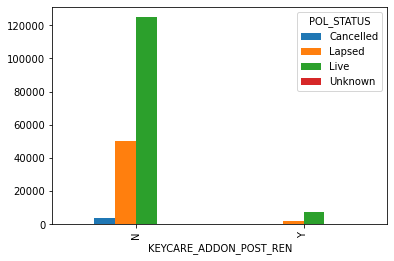

In [37]:
pd.crosstab(df2.KEYCARE_ADDON_POST_REN,df2.POL_STATUS).plot(kind='bar')

In [38]:
len(df2.loc[df2["HP1_ADDON_PRE_REN"]==df2["HP1_ADDON_POST_REN"]])

186599

In [39]:
len(df2.loc[df2["HP2_ADDON_PRE_REN"]==df2["HP2_ADDON_POST_REN"]])

153848

In [40]:
len(df2.loc[df2["HP3_ADDON_PRE_REN"]==df2["HP3_ADDON_POST_REN"]])

188407

In [41]:
# Preparing a drop list of few among the above checked variables
drop_list=["LEGAL_ADDON_PRE_REN","GARDEN_ADDON_PRE_REN","KEYCARE_ADDON_PRE_REN",
           "HOME_EM_ADDON_PRE_REN","HP1_ADDON_PRE_REN","HP2_ADDON_PRE_REN","HP3_ADDON_PRE_REN"]

In [42]:
df2.shape

(190039, 56)

In [43]:
df2.drop(labels=drop_list, axis=1, inplace=True)
df2.shape

(190039, 49)

In [44]:
# Checking the correlation of numerical features
df2[["SPEC_SUM_INSURED","SPEC_ITEM_PREM","UNSPEC_HRP_PREM","LAST_ANN_PREM_GROSS","dob","age","age_building"]].corr()

,SPEC_SUM_INSURED,SPEC_ITEM_PREM,UNSPEC_HRP_PREM,LAST_ANN_PREM_GROSS,dob,age,age_building
SPEC_SUM_INSURED,1.000000,0.851481,0.151113,0.228476,0.055274,-0.034401,-0.006248
SPEC_ITEM_PREM,0.851481,1.000000,0.161611,0.230783,0.075082,-0.057216,-0.004530
UNSPEC_HRP_PREM,0.151113,0.161611,1.000000,0.353545,0.099307,-0.128256,-0.004563
LAST_ANN_PREM_GROSS,0.228476,0.230783,0.353545,1.000000,0.153237,-0.187289,0.238482
dob,0.055274,0.075082,0.099307,0.153237,1.000000,-0.935218,0.060830
age,-0.034401,-0.057216,-0.128256,-0.187289,-0.935218,1.000000,-0.023680
age_building,-0.006248,-0.004530,-0.004563,0.238482,0.060830,-0.023680,1.000000


In [45]:
# Dropping the redundant features
df2=df2.drop(["SPEC_ITEM_PREM","dob"],axis=1)

In [46]:
df2.shape

(190039, 47)

In [47]:
df2.describe()

,SUM_INSURED_BUILDINGS,NCD_GRANTED_YEARS_B,RISK_RATED_AREA_C,SUM_INSURED_CONTENTS,NCD_GRANTED_YEARS_C,SPEC_SUM_INSURED,UNSPEC_HRP_PREM,BEDROOMS,ROOF_CONSTRUCTION,WALL_CONSTRUCTION,LISTED,MAX_DAYS_UNOCC,OWNERSHIP_TYPE,PAYING_GUESTS,PROP_TYPE,LAST_ANN_PREM_GROSS,cvr_strt_yr,age,age_building
count,189021.000000,189021.000000,180290.000000,189021.000000,189021.000000,189021.000000,189021.000000,189021.000000,189021.000000,189021.000000,189021.000000,189021.000000,189021.000000,189021.000000,189021.000000,190039.000000,189021.000000,189021.000000,189021.000000
mean,778130.472276,4.477132,9.055649,47836.219256,5.497336,329.517122,5.653579,2.779712,11.020611,14.977976,2.995672,8.471276,7.646214,0.001095,10.230170,186.841196,2006.986007,67.622603,61.991292
std,415504.938301,2.677538,7.624659,10706.355022,1.777452,1333.646192,10.254535,0.801433,0.885396,0.870018,0.083708,15.213401,2.543281,0.033075,8.949343,99.516851,3.899098,10.735586,29.051753
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,-1152.680000,1992.000000,18.000000,-6.000000
25%,1000000.000000,3.000000,3.000000,50000.000000,6.000000,0.000000,0.000000,2.000000,11.000000,15.000000,3.000000,0.000000,8.000000,0.000000,2.000000,123.580000,2005.000000,61.000000,49.000000
50%,1000000.000000,6.000000,7.000000,50000.000000,6.000000,0.000000,0.000000,3.000000,11.000000,15.000000,3.000000,0.000000,8.000000,0.000000,10.000000,177.390000,2008.000000,68.000000,59.000000
75%,1000000.000000,6.000000,13.000000,50000.000000,6.000000,0.000000,12.450000,3.000000,11.000000,15.000000,3.000000,30.000000,8.000000,0.000000,18.000000,235.090000,2010.000000,75.000000,85.000000
max,1000000.000000,9.000000,98.000000,100000.000000,9.000000,47500.000000,162.610000,7.000000,99.000000,99.000000,5.000000,181.000000,18.000000,1.000000,53.000000,4631.860000,2012.000000,113.000000,262.000000


In [48]:
# Function to plot distribution plot and boxplot
def plot_var(col_name, data):
    f, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12,3), dpi=90)
    sns.distplot(data.loc[data[col_name].notnull(), col_name], kde=False, ax=ax1)
    sns.boxplot(x=col_name,data=data, ax=ax2)
    plt.tight_layout()

C:\Users\badboy\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


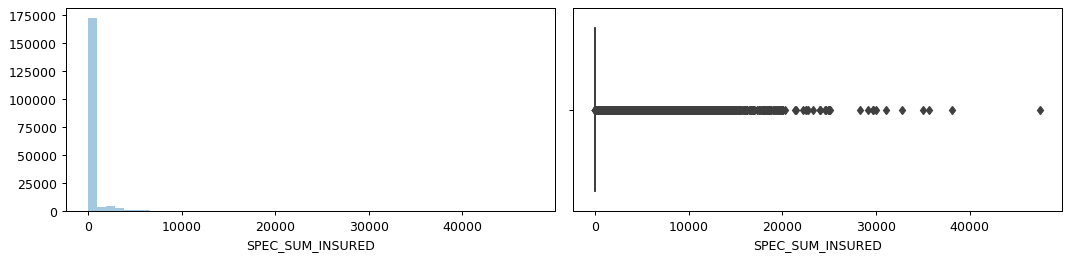

In [49]:
plot_var("SPEC_SUM_INSURED",df2)

In [50]:
# From the above plots, so much of variance is observerd. Hence, finding the value_counts of each value
df2["SPEC_SUM_INSURED"].value_counts()

0.0        166102
2000.0       2011
1000.0       1087
3000.0       1071
2500.0       1012
            ...  
2445.0          1
2496.0          1
12460.0         1
9572.0          1
7005.0          1
Name: SPEC_SUM_INSURED, Length: 2155, dtype: int64

In [51]:
# Binning the data with 15 bins
binned = pd.cut(df2['SPEC_SUM_INSURED'], 15)
binned.value_counts()

(-47.5, 3166.667]         182584
(3166.667, 6333.333]        4340
(6333.333, 9500.0]          1308
(9500.0, 12666.667]          492
(12666.667, 15833.333]       189
(15833.333, 19000.0]          58
(19000.0, 22166.667]          22
(22166.667, 25333.333]        17
(28500.0, 31666.667]           5
(34833.333, 38000.0]           2
(25333.333, 28500.0]           1
(31666.667, 34833.333]         1
(38000.0, 41166.667]           1
(44333.333, 47500.0]           1
(41166.667, 44333.333]         0
Name: SPEC_SUM_INSURED, dtype: int64

C:\Users\badboy\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


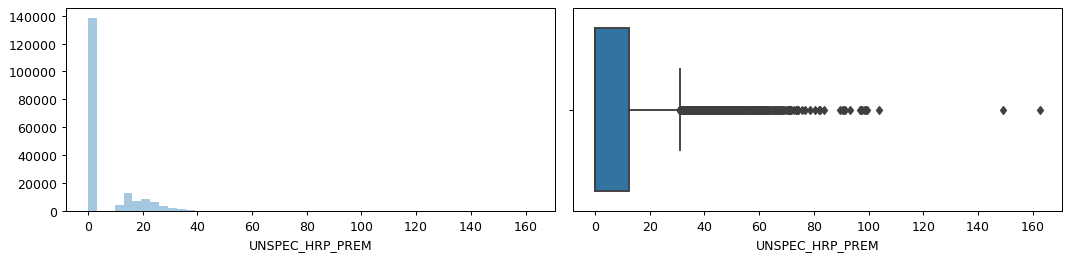

In [52]:
plot_var("UNSPEC_HRP_PREM",df2)

In [53]:
df2["UNSPEC_HRP_PREM"].value_counts()

0.00     138498
14.86      6455
16.07      2333
19.82      2182
12.45      1575
          ...  
13.15         1
38.09         1
42.60         1
34.69         1
33.23         1
Name: UNSPEC_HRP_PREM, Length: 2993, dtype: int64

In [54]:
binned = pd.cut(df2['UNSPEC_HRP_PREM'], 10)
binned.value_counts()

(-0.163, 16.261]      156235
(16.261, 32.522]       28449
(32.522, 48.783]        3820
(48.783, 65.044]         450
(65.044, 81.305]          48
(81.305, 97.566]          11
(97.566, 113.827]          6
(146.349, 162.61]          2
(113.827, 130.088]         0
(130.088, 146.349]         0
Name: UNSPEC_HRP_PREM, dtype: int64

C:\Users\badboy\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


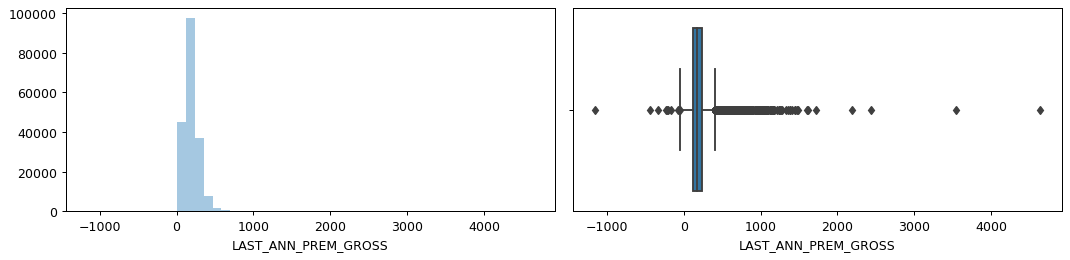

In [55]:
plot_var("LAST_ANN_PREM_GROSS",df2)

In [56]:
df2["LAST_ANN_PREM_GROSS"].value_counts()

51.45     3748
51.94     2883
54.44      719
52.13      569
54.75      435
          ... 
357.62       1
426.38       1
393.07       1
357.47       1
339.26       1
Name: LAST_ANN_PREM_GROSS, Length: 37445, dtype: int64

In [57]:
binned = pd.cut(df2['LAST_ANN_PREM_GROSS'], 15)
binned.value_counts()

(4.228, 389.864]         183524
(389.864, 775.5]           6306
(775.5, 1161.136]           142
(-381.408, 4.228]            40
(1161.136, 1546.772]         18
(1546.772, 1932.408]          3
(-1158.465, -767.044]         1
(-767.044, -381.408]          1
(1932.408, 2318.044]          1
(2318.044, 2703.68]           1
(3474.952, 3860.588]          1
(4246.224, 4631.86]           1
(2703.68, 3089.316]           0
(3089.316, 3474.952]          0
(3860.588, 4246.224]          0
Name: LAST_ANN_PREM_GROSS, dtype: int64

C:\Users\badboy\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


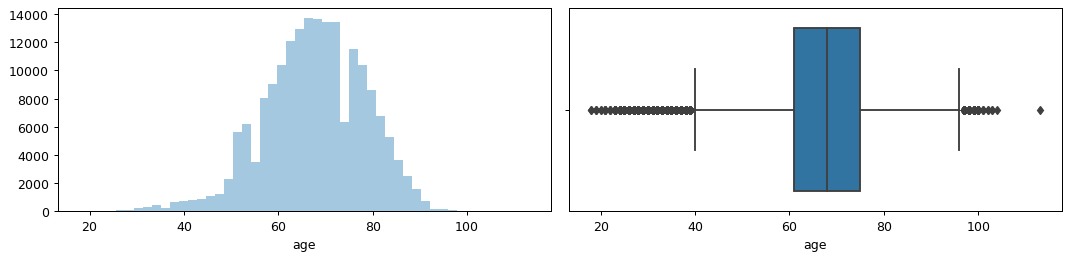

In [58]:
plot_var("age",df2)

C:\Users\badboy\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


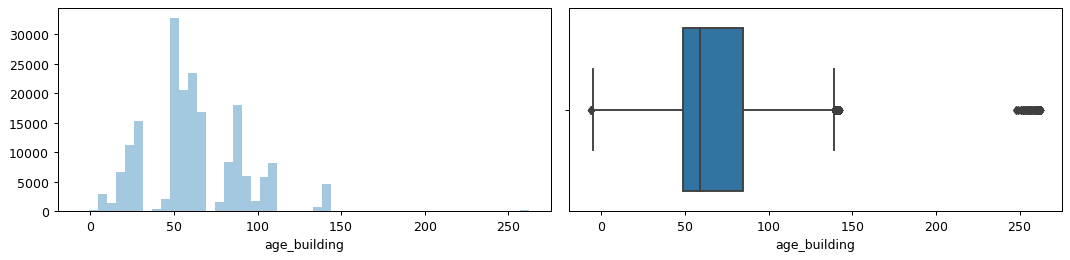

In [59]:
plot_var("age_building",df2)

In [60]:
df2[["LAST_ANN_PREM_GROSS","age","age_building"]].shape

(190039, 3)

In [61]:
# Listing all the numerical features
num_features=["LAST_ANN_PREM_GROSS","age","age_building","UNSPEC_HRP_PREM","SPEC_SUM_INSURED"]

In [62]:
# Checking the count of null values in each feature
df2[num_features].isnull().sum()

LAST_ANN_PREM_GROSS       0
age                    1018
age_building           1018
UNSPEC_HRP_PREM        1018
SPEC_SUM_INSURED       1018
dtype: int64

In [63]:
# Imputing the null values with medain
imputer=SimpleImputer(strategy="median")
imputer.fit(df2[num_features])
df2_num_trans=imputer.transform(df2[num_features])
df2[num_features]=df2_num_trans

In [64]:
# Checking the count of null values in each feature after imputation
df2[num_features].isnull().sum()

LAST_ANN_PREM_GROSS    0
age                    0
age_building           0
UNSPEC_HRP_PREM        0
SPEC_SUM_INSURED       0
dtype: int64

In [65]:
# Listing all the categorical features
cate_features = [col for col in df2.columns if col not in num_features]
print(cate_features)
len(cate_features)

['CLAIM3YEARS', 'P1_EMP_STATUS', 'BUS_USE', 'AD_BUILDINGS', 'SUM_INSURED_BUILDINGS', 'NCD_GRANTED_YEARS_B', 'AD_CONTENTS', 'RISK_RATED_AREA_C', 'SUM_INSURED_CONTENTS', 'NCD_GRANTED_YEARS_C', 'CONTENTS_COVER', 'BUILDINGS_COVER', 'P1_MAR_STATUS', 'P1_POLICY_REFUSED', 'P1_SEX', 'APPR_ALARM', 'APPR_LOCKS', 'BEDROOMS', 'ROOF_CONSTRUCTION', 'WALL_CONSTRUCTION', 'FLOODING', 'LISTED', 'MAX_DAYS_UNOCC', 'NEIGH_WATCH', 'OCC_STATUS', 'OWNERSHIP_TYPE', 'PAYING_GUESTS', 'PROP_TYPE', 'SAFE_INSTALLED', 'SEC_DISC_REQ', 'SUBSIDENCE', 'PAYMENT_METHOD', 'LEGAL_ADDON_POST_REN', 'HOME_EM_ADDON_POST_REN', 'GARDEN_ADDON_POST_REN', 'KEYCARE_ADDON_POST_REN', 'HP1_ADDON_POST_REN', 'HP2_ADDON_POST_REN', 'HP3_ADDON_POST_REN', 'MTA_FLAG', 'POL_STATUS', 'cvr_strt_yr']


42

In [66]:
# Checking the count of null values in each feature 
df2[cate_features].isnull().sum()

CLAIM3YEARS                  0
P1_EMP_STATUS             1018
BUS_USE                   1018
AD_BUILDINGS              1018
SUM_INSURED_BUILDINGS     1018
NCD_GRANTED_YEARS_B       1018
AD_CONTENTS               1018
RISK_RATED_AREA_C         9749
SUM_INSURED_CONTENTS      1018
NCD_GRANTED_YEARS_C       1018
CONTENTS_COVER            1018
BUILDINGS_COVER           1018
P1_MAR_STATUS             1018
P1_POLICY_REFUSED         1018
P1_SEX                    1018
APPR_ALARM                1018
APPR_LOCKS                1018
BEDROOMS                  1018
ROOF_CONSTRUCTION         1018
WALL_CONSTRUCTION         1018
FLOODING                  1018
LISTED                    1018
MAX_DAYS_UNOCC            1018
NEIGH_WATCH               1018
OCC_STATUS                1018
OWNERSHIP_TYPE            1018
PAYING_GUESTS             1018
PROP_TYPE                 1018
SAFE_INSTALLED            1018
SEC_DISC_REQ              1018
SUBSIDENCE                1018
PAYMENT_METHOD            1018
LEGAL_AD

In [67]:
# Imputing the null values of each feature with it's mode 
imputer=SimpleImputer(strategy="most_frequent")
imputer.fit(df2[cate_features])
df2_cate_trans=imputer.transform(df2[cate_features])
df2[cate_features]=df2_cate_trans

In [68]:
# Checking the count of null values in each feature after imputation
df2[cate_features].isnull().sum()

CLAIM3YEARS               0
P1_EMP_STATUS             0
BUS_USE                   0
AD_BUILDINGS              0
SUM_INSURED_BUILDINGS     0
NCD_GRANTED_YEARS_B       0
AD_CONTENTS               0
RISK_RATED_AREA_C         0
SUM_INSURED_CONTENTS      0
NCD_GRANTED_YEARS_C       0
CONTENTS_COVER            0
BUILDINGS_COVER           0
P1_MAR_STATUS             0
P1_POLICY_REFUSED         0
P1_SEX                    0
APPR_ALARM                0
APPR_LOCKS                0
BEDROOMS                  0
ROOF_CONSTRUCTION         0
WALL_CONSTRUCTION         0
FLOODING                  0
LISTED                    0
MAX_DAYS_UNOCC            0
NEIGH_WATCH               0
OCC_STATUS                0
OWNERSHIP_TYPE            0
PAYING_GUESTS             0
PROP_TYPE                 0
SAFE_INSTALLED            0
SEC_DISC_REQ              0
SUBSIDENCE                0
PAYMENT_METHOD            0
LEGAL_ADDON_POST_REN      0
HOME_EM_ADDON_POST_REN    0
GARDEN_ADDON_POST_REN     0
KEYCARE_ADDON_POST_R

In [69]:
# Checking the count of all the available classes
df2['POL_STATUS'].value_counts()

Live         133178
Lapsed        52534
Cancelled      4311
Unknown          16
Name: POL_STATUS, dtype: int64

In [70]:
# Encoding the target variable with "1" if 'POL_STATUS'=="Lapsed" and "0" otherwise
df2['POL_STATUS'] = np.where(df2['POL_STATUS'] == "Lapsed", 1, 0)

In [71]:
df2.head()

,CLAIM3YEARS,P1_EMP_STATUS,BUS_USE,AD_BUILDINGS,SUM_INSURED_BUILDINGS,NCD_GRANTED_YEARS_B,AD_CONTENTS,RISK_RATED_AREA_C,SUM_INSURED_CONTENTS,NCD_GRANTED_YEARS_C,CONTENTS_COVER,BUILDINGS_COVER,SPEC_SUM_INSURED,UNSPEC_HRP_PREM,P1_MAR_STATUS,P1_POLICY_REFUSED,P1_SEX,APPR_ALARM,APPR_LOCKS,BEDROOMS,ROOF_CONSTRUCTION,WALL_CONSTRUCTION,FLOODING,LISTED,MAX_DAYS_UNOCC,NEIGH_WATCH,OCC_STATUS,OWNERSHIP_TYPE,PAYING_GUESTS,PROP_TYPE,SAFE_INSTALLED,SEC_DISC_REQ,SUBSIDENCE,PAYMENT_METHOD,LEGAL_ADDON_POST_REN,HOME_EM_ADDON_POST_REN,GARDEN_ADDON_POST_REN,KEYCARE_ADDON_POST_REN,HP1_ADDON_POST_REN,HP2_ADDON_POST_REN,HP3_ADDON_POST_REN,MTA_FLAG,LAST_ANN_PREM_GROSS,POL_STATUS,cvr_strt_yr,age,age_building
0,N,R,N,Y,1000000.0,7.0,Y,6.0,50000.0,7.0,Y,Y,7500.0,12.45,O,N,M,N,Y,3.0,11.0,15.0,Y,3.0,0.0,N,PH,8.0,0.0,10.0,Y,Y,N,PureDD,N,N,N,N,N,N,N,N,274.81,1,2007.0,68.0,47.0
1,N,E,Y,Y,1000000.0,6.0,Y,9.0,50000.0,7.0,Y,Y,0.0,24.60,M,N,M,N,N,3.0,11.0,15.0,Y,3.0,0.0,N,PH,3.0,0.0,2.0,N,N,N,PureDD,Y,N,N,N,N,N,N,Y,308.83,0,2008.0,38.0,48.0
2,N,E,N,N,0.0,0.0,Y,12.0,50000.0,7.0,N,Y,0.0,0.00,S,N,M,Y,Y,2.0,11.0,15.0,Y,3.0,0.0,Y,PH,8.0,0.0,9.0,N,Y,N,PureDD,Y,N,N,N,N,N,N,Y,52.65,0,2007.0,60.0,61.0
3,N,R,N,N,0.0,0.0,Y,14.0,50000.0,7.0,N,Y,0.0,0.00,W,N,F,N,Y,2.0,11.0,15.0,Y,3.0,0.0,N,PH,18.0,0.0,19.0,N,Y,N,NonDD,N,N,N,N,N,N,N,N,54.23,0,2007.0,82.0,137.0
4,N,R,N,Y,1000000.0,7.0,Y,10.0,50000.0,7.0,Y,Y,0.0,19.82,M,N,M,Y,Y,3.0,11.0,15.0,Y,3.0,0.0,N,PH,8.0,0.0,1.0,N,Y,N,DD-Other,Y,N,Y,N,N,N,N,N,244.58,0,2007.0,71.0,47.0


In [72]:
for col in df2:
    print(col,df2[col].nunique())

CLAIM3YEARS 2
P1_EMP_STATUS 11
BUS_USE 2
AD_BUILDINGS 2
SUM_INSURED_BUILDINGS 2
NCD_GRANTED_YEARS_B 10
AD_CONTENTS 2
RISK_RATED_AREA_C 49
SUM_INSURED_CONTENTS 11
NCD_GRANTED_YEARS_C 10
CONTENTS_COVER 2
BUILDINGS_COVER 2
SPEC_SUM_INSURED 2155
UNSPEC_HRP_PREM 2993
P1_MAR_STATUS 10
P1_POLICY_REFUSED 2
P1_SEX 3
APPR_ALARM 2
APPR_LOCKS 2
BEDROOMS 7
ROOF_CONSTRUCTION 17
WALL_CONSTRUCTION 19
FLOODING 2
LISTED 5
MAX_DAYS_UNOCC 7
NEIGH_WATCH 2
OCC_STATUS 7
OWNERSHIP_TYPE 14
PAYING_GUESTS 2
PROP_TYPE 36
SAFE_INSTALLED 2
SEC_DISC_REQ 2
SUBSIDENCE 2
PAYMENT_METHOD 3
LEGAL_ADDON_POST_REN 2
HOME_EM_ADDON_POST_REN 2
GARDEN_ADDON_POST_REN 2
KEYCARE_ADDON_POST_REN 2
HP1_ADDON_POST_REN 2
HP2_ADDON_POST_REN 2
HP3_ADDON_POST_REN 2
MTA_FLAG 2
LAST_ANN_PREM_GROSS 37445
POL_STATUS 2
cvr_strt_yr 21
age 88
age_building 143


In [73]:
# Copying "POL_STATUS" into "pol_status" and dropping "POL_STATUS"
df2["pol_status"]=df2["POL_STATUS"]
df2=df2.drop("POL_STATUS",axis=1)

In [74]:
# Listing all the categorical features
cate_features = [col for col in df2.columns if col not in num_features]
print(cate_features)
len(cate_features)

['CLAIM3YEARS', 'P1_EMP_STATUS', 'BUS_USE', 'AD_BUILDINGS', 'SUM_INSURED_BUILDINGS', 'NCD_GRANTED_YEARS_B', 'AD_CONTENTS', 'RISK_RATED_AREA_C', 'SUM_INSURED_CONTENTS', 'NCD_GRANTED_YEARS_C', 'CONTENTS_COVER', 'BUILDINGS_COVER', 'P1_MAR_STATUS', 'P1_POLICY_REFUSED', 'P1_SEX', 'APPR_ALARM', 'APPR_LOCKS', 'BEDROOMS', 'ROOF_CONSTRUCTION', 'WALL_CONSTRUCTION', 'FLOODING', 'LISTED', 'MAX_DAYS_UNOCC', 'NEIGH_WATCH', 'OCC_STATUS', 'OWNERSHIP_TYPE', 'PAYING_GUESTS', 'PROP_TYPE', 'SAFE_INSTALLED', 'SEC_DISC_REQ', 'SUBSIDENCE', 'PAYMENT_METHOD', 'LEGAL_ADDON_POST_REN', 'HOME_EM_ADDON_POST_REN', 'GARDEN_ADDON_POST_REN', 'KEYCARE_ADDON_POST_REN', 'HP1_ADDON_POST_REN', 'HP2_ADDON_POST_REN', 'HP3_ADDON_POST_REN', 'MTA_FLAG', 'cvr_strt_yr', 'pol_status']


42

In [75]:
# Transforming categorical features using ordinal encoder
oe = OrdinalEncoder()
oe.fit(df2[cate_features])
df2[cate_features] = oe.transform(df2[cate_features])
df2[cate_features]

,CLAIM3YEARS,P1_EMP_STATUS,BUS_USE,AD_BUILDINGS,SUM_INSURED_BUILDINGS,NCD_GRANTED_YEARS_B,AD_CONTENTS,RISK_RATED_AREA_C,SUM_INSURED_CONTENTS,NCD_GRANTED_YEARS_C,CONTENTS_COVER,BUILDINGS_COVER,P1_MAR_STATUS,P1_POLICY_REFUSED,P1_SEX,APPR_ALARM,APPR_LOCKS,BEDROOMS,ROOF_CONSTRUCTION,WALL_CONSTRUCTION,FLOODING,LISTED,MAX_DAYS_UNOCC,NEIGH_WATCH,OCC_STATUS,OWNERSHIP_TYPE,PAYING_GUESTS,PROP_TYPE,SAFE_INSTALLED,SEC_DISC_REQ,SUBSIDENCE,PAYMENT_METHOD,LEGAL_ADDON_POST_REN,HOME_EM_ADDON_POST_REN,GARDEN_ADDON_POST_REN,KEYCARE_ADDON_POST_REN,HP1_ADDON_POST_REN,HP2_ADDON_POST_REN,HP3_ADDON_POST_REN,MTA_FLAG,cvr_strt_yr,pol_status
0,0.0,7.0,0.0,1.0,1.0,7.0,1.0,6.0,1.0,7.0,1.0,1.0,6.0,0.0,1.0,0.0,1.0,2.0,9.0,10.0,1.0,2.0,0.0,0.0,3.0,5.0,0.0,7.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.0,1.0
1,0.0,2.0,1.0,1.0,1.0,6.0,1.0,9.0,1.0,7.0,1.0,1.0,4.0,0.0,1.0,0.0,0.0,2.0,9.0,10.0,1.0,2.0,0.0,0.0,3.0,2.0,0.0,1.0,0.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,16.0,0.0
2,0.0,2.0,0.0,0.0,0.0,0.0,1.0,12.0,1.0,7.0,0.0,1.0,8.0,0.0,1.0,1.0,1.0,1.0,9.0,10.0,1.0,2.0,0.0,1.0,3.0,5.0,0.0,6.0,0.0,1.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,15.0,0.0
3,0.0,7.0,0.0,0.0,0.0,0.0,1.0,14.0,1.0,7.0,0.0,1.0,9.0,0.0,0.0,0.0,1.0,1.0,9.0,10.0,1.0,2.0,0.0,0.0,3.0,13.0,0.0,11.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.0,0.0
4,0.0,7.0,0.0,1.0,1.0,7.0,1.0,10.0,1.0,7.0,1.0,1.0,4.0,0.0,1.0,1.0,1.0,2.0,9.0,10.0,1.0,2.0,0.0,0.0,3.0,5.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,15.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
256131,1.0,7.0,0.0,1.0,1.0,2.0,1.0,10.0,1.0,2.0,1.0,1.0,6.0,0.0,0.0,0.0,0.0,2.0,9.0,10.0,1.0,2.0,0.0,0.0,3.0,5.0,0.0,1.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.0,1.0
256132,0.0,7.0,0.0,1.0,1.0,5.0,1.0,0.0,1.0,5.0,1.0,1.0,4.0,0.0,1.0,0.0,1.0,2.0,9.0,10.0,1.0,2.0,0.0,0.0,3.0,5.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,8.0,0.0
256133,0.0,7.0,0.0,1.0,1.0,5.0,1.0,18.0,1.0,5.0,1.0,1.0,6.0,0.0,1.0,1.0,1.0,2.0,9.0,10.0,1.0,2.0,0.0,0.0,3.0,5.0,0.0,11.0,0.0,1.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.0,0.0
256134,0.0,7.0,0.0,1.0,1.0,5.0,0.0,5.0,0.0,0.0,1.0,0.0,6.0,0.0,1.0,0.0,1.0,4.0,9.0,10.0,1.0,2.0,0.0,0.0,3.0,2.0,0.0,11.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0,1.0


In [76]:
# Separating input variables and target variable
X_cate=df2[cate_features].values[:,:-1]
y_cate=df2[cate_features].values[:,-1]

In [77]:
# Inorder to avoid data leakage, separating training and testing data before applying feature selection method
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X_cate, y_cate, test_size=0.33, random_state=1)

In [78]:
# Function for conducting chi2 test of each categorical feature with target variable
def select_features(X_train_c, y_train_c, X_test_c):
    fs = SelectKBest(score_func=chi2, k="all")
    fs.fit(X_train_c, y_train_c)
    X_train_fs = fs.transform(X_train_c)
    X_test_fs = fs.transform(X_test_c)
    return X_train_fs, X_test_fs, fs

In [79]:
X_train_fs, X_test_fs, fs = select_features(X_train_c, y_train_c, X_test_c)

In [80]:
cate_features

['CLAIM3YEARS',
 'P1_EMP_STATUS',
 'BUS_USE',
 'AD_BUILDINGS',
 'SUM_INSURED_BUILDINGS',
 'NCD_GRANTED_YEARS_B',
 'AD_CONTENTS',
 'RISK_RATED_AREA_C',
 'SUM_INSURED_CONTENTS',
 'NCD_GRANTED_YEARS_C',
 'CONTENTS_COVER',
 'BUILDINGS_COVER',
 'P1_MAR_STATUS',
 'P1_POLICY_REFUSED',
 'P1_SEX',
 'APPR_ALARM',
 'APPR_LOCKS',
 'BEDROOMS',
 'ROOF_CONSTRUCTION',
 'WALL_CONSTRUCTION',
 'FLOODING',
 'LISTED',
 'MAX_DAYS_UNOCC',
 'NEIGH_WATCH',
 'OCC_STATUS',
 'OWNERSHIP_TYPE',
 'PAYING_GUESTS',
 'PROP_TYPE',
 'SAFE_INSTALLED',
 'SEC_DISC_REQ',
 'SUBSIDENCE',
 'PAYMENT_METHOD',
 'LEGAL_ADDON_POST_REN',
 'HOME_EM_ADDON_POST_REN',
 'GARDEN_ADDON_POST_REN',
 'KEYCARE_ADDON_POST_REN',
 'HP1_ADDON_POST_REN',
 'HP2_ADDON_POST_REN',
 'HP3_ADDON_POST_REN',
 'MTA_FLAG',
 'cvr_strt_yr',
 'pol_status']

Feature 0: 19.005259
Feature 1: 14.513150
Feature 2: 107.939008
Feature 3: 401.480268
Feature 4: 380.614807
Feature 5: 2209.736458
Feature 7: 6299.051875
Feature 8: 5.174799
Feature 10: 401.480268
Feature 12: 769.943861
Feature 13: 30.431262
Feature 14: 166.998257
Feature 15: 5.122980
Feature 16: 18.546030
Feature 17: 274.891330
Feature 22: 2654.352621
Feature 23: 16.781677
Feature 25: 84.653066
Feature 27: 1574.333011
Feature 28: 76.837427
Feature 29: 11.901670
Feature 30: 7.240278
Feature 31: 495.033005
Feature 32: 559.590365
Feature 34: 420.322224
Feature 35: 126.183025
Feature 36: 251.006181
Feature 37: 414.187851
Feature 38: 113.024701
Feature 40: 3003.190045


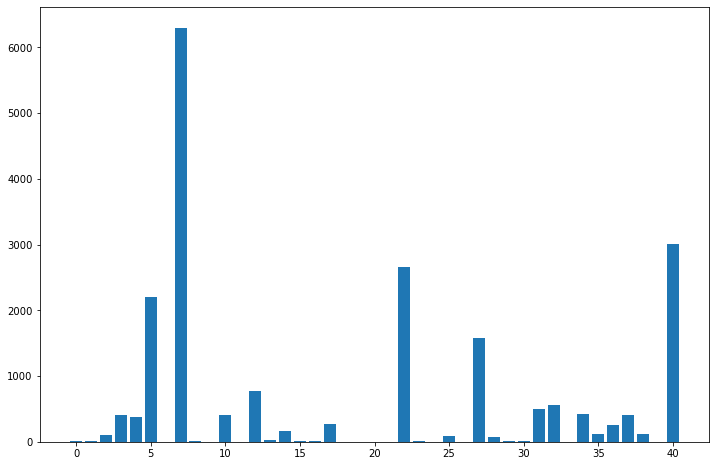

In [81]:
# Displaying Chi2 test values for each feature and bar plot for visualization
for i in range(len(fs.scores_)):
    if fs.scores_[i]>5:
        print('Feature %d: %f' % (i, fs.scores_[i]))
    
# plot the scores
plt.figure(figsize=(12,8))
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()

In [82]:
# Selecting only the features with Chi2 test value greater than 5 for modelling
indices = [0,1,2,3,4,5,7,8,10,12,13,14,15,16,17,22,23,25,27,28,29,31,32,34,35,36,37,38,40]
selected_elements1 = []
for index in indices:
    selected_elements1.append(cate_features[index])
print(selected_elements1)

['CLAIM3YEARS', 'P1_EMP_STATUS', 'BUS_USE', 'AD_BUILDINGS', 'SUM_INSURED_BUILDINGS', 'NCD_GRANTED_YEARS_B', 'RISK_RATED_AREA_C', 'SUM_INSURED_CONTENTS', 'CONTENTS_COVER', 'P1_MAR_STATUS', 'P1_POLICY_REFUSED', 'P1_SEX', 'APPR_ALARM', 'APPR_LOCKS', 'BEDROOMS', 'MAX_DAYS_UNOCC', 'NEIGH_WATCH', 'OWNERSHIP_TYPE', 'PROP_TYPE', 'SAFE_INSTALLED', 'SEC_DISC_REQ', 'PAYMENT_METHOD', 'LEGAL_ADDON_POST_REN', 'GARDEN_ADDON_POST_REN', 'KEYCARE_ADDON_POST_REN', 'HP1_ADDON_POST_REN', 'HP2_ADDON_POST_REN', 'HP3_ADDON_POST_REN', 'cvr_strt_yr']


In [83]:
# Concatenating the data frames with numeric features and selected categorical features together
final_df= pd.concat([df2[num_features], df2[selected_elements1]], axis=1)

In [84]:
final_df.head()

,LAST_ANN_PREM_GROSS,age,age_building,UNSPEC_HRP_PREM,SPEC_SUM_INSURED,CLAIM3YEARS,P1_EMP_STATUS,BUS_USE,AD_BUILDINGS,SUM_INSURED_BUILDINGS,NCD_GRANTED_YEARS_B,RISK_RATED_AREA_C,SUM_INSURED_CONTENTS,CONTENTS_COVER,P1_MAR_STATUS,P1_POLICY_REFUSED,P1_SEX,APPR_ALARM,APPR_LOCKS,BEDROOMS,MAX_DAYS_UNOCC,NEIGH_WATCH,OWNERSHIP_TYPE,PROP_TYPE,SAFE_INSTALLED,SEC_DISC_REQ,PAYMENT_METHOD,LEGAL_ADDON_POST_REN,GARDEN_ADDON_POST_REN,KEYCARE_ADDON_POST_REN,HP1_ADDON_POST_REN,HP2_ADDON_POST_REN,HP3_ADDON_POST_REN,cvr_strt_yr
0,274.81,68.0,47.0,12.45,7500.0,0.0,7.0,0.0,1.0,1.0,7.0,6.0,1.0,1.0,6.0,0.0,1.0,0.0,1.0,2.0,0.0,0.0,5.0,7.0,1.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,15.0
1,308.83,38.0,48.0,24.60,0.0,0.0,2.0,1.0,1.0,1.0,6.0,9.0,1.0,1.0,4.0,0.0,1.0,0.0,0.0,2.0,0.0,0.0,2.0,1.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,16.0
2,52.65,60.0,61.0,0.00,0.0,0.0,2.0,0.0,0.0,0.0,0.0,12.0,1.0,0.0,8.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,5.0,6.0,0.0,1.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,15.0
3,54.23,82.0,137.0,0.00,0.0,0.0,7.0,0.0,0.0,0.0,0.0,14.0,1.0,0.0,9.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,13.0,11.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,15.0
4,244.58,71.0,47.0,19.82,0.0,0.0,7.0,0.0,1.0,1.0,7.0,10.0,1.0,1.0,4.0,0.0,1.0,1.0,1.0,2.0,0.0,0.0,5.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,15.0


In [85]:
# Adding the target variable to the data frame
final_df1=pd.concat([final_df, df2["pol_status"]], axis=1)

In [86]:
final_df1.head()

,LAST_ANN_PREM_GROSS,age,age_building,UNSPEC_HRP_PREM,SPEC_SUM_INSURED,CLAIM3YEARS,P1_EMP_STATUS,BUS_USE,AD_BUILDINGS,SUM_INSURED_BUILDINGS,NCD_GRANTED_YEARS_B,RISK_RATED_AREA_C,SUM_INSURED_CONTENTS,CONTENTS_COVER,P1_MAR_STATUS,P1_POLICY_REFUSED,P1_SEX,APPR_ALARM,APPR_LOCKS,BEDROOMS,MAX_DAYS_UNOCC,NEIGH_WATCH,OWNERSHIP_TYPE,PROP_TYPE,SAFE_INSTALLED,SEC_DISC_REQ,PAYMENT_METHOD,LEGAL_ADDON_POST_REN,GARDEN_ADDON_POST_REN,KEYCARE_ADDON_POST_REN,HP1_ADDON_POST_REN,HP2_ADDON_POST_REN,HP3_ADDON_POST_REN,cvr_strt_yr,pol_status
0,274.81,68.0,47.0,12.45,7500.0,0.0,7.0,0.0,1.0,1.0,7.0,6.0,1.0,1.0,6.0,0.0,1.0,0.0,1.0,2.0,0.0,0.0,5.0,7.0,1.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,15.0,1.0
1,308.83,38.0,48.0,24.60,0.0,0.0,2.0,1.0,1.0,1.0,6.0,9.0,1.0,1.0,4.0,0.0,1.0,0.0,0.0,2.0,0.0,0.0,2.0,1.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,16.0,0.0
2,52.65,60.0,61.0,0.00,0.0,0.0,2.0,0.0,0.0,0.0,0.0,12.0,1.0,0.0,8.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,5.0,6.0,0.0,1.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,15.0,0.0
3,54.23,82.0,137.0,0.00,0.0,0.0,7.0,0.0,0.0,0.0,0.0,14.0,1.0,0.0,9.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,13.0,11.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,15.0,0.0
4,244.58,71.0,47.0,19.82,0.0,0.0,7.0,0.0,1.0,1.0,7.0,10.0,1.0,1.0,4.0,0.0,1.0,1.0,1.0,2.0,0.0,0.0,5.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,15.0,0.0


In [87]:
final_df1.shape

(190039, 35)

In [117]:
# Function to implement decision tree algorithm for the model
def BuildDecisionTree(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)
    clf = DecisionTreeClassifier()
    clf.fit(X_train, y_train)
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(clf, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
    pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, pred)
    print('Accuracy: %.3f (%.3f)' % (np.mean(scores)*100, np.std(scores)*100))
    return accuracy

In [118]:
# Function to implement Random Forest algorithm for the model
def BuildRandomForest(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)
    clf = RandomForestClassifier()
    clf.fit(X_train, y_train)
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(clf, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
    pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, pred)
    print('Accuracy: %.3f (%.3f)' % (np.mean(scores)*100, np.std(scores)*100))
    return accuracy

In [132]:
# Function to implement XGBoost Classifier algorithm for the model
def BuildXGBClassifier(X,y):
    seed = 7
    test_size = 0.33
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)
    # fit model no training data
    model = XGBClassifier()
    model.fit(X_train, y_train)
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
    pred = model.predict(X_test)
    probs=model.predict_proba(X_test)
    for i in range(0,len(pred)):
        print(y_test[i],pred[i],probs[i])
    accuracy = accuracy_score(y_test, pred)
    print('Accuracy: %.3f (%.3f)' % (np.mean(scores)*100, np.std(scores)*100))
    return accuracy

In [120]:
scalar=MinMaxScaler()

In [121]:
final_df1[num_features]=scalar.fit_transform(final_df1[num_features])

In [122]:
# Seperating the input data and target variable
dataset=final_df1.values
X=dataset[:,:-1]
y=dataset[:,-1]

In [125]:
# Running the models implemented with Decison Tree, Random Forest, XGBoost Classifier
dtMetrics = BuildDecisionTree(X, y)
rfMetrics = BuildRandomForest(X, y)

Accuracy: 66.226 (0.377)
Accuracy: 75.523 (0.246)


In [133]:
xgbMetrics = BuildXGBClassifier(X,y)

C:\Users\badboy\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:00:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.0 0.0 [0.7657327  0.23426731]
0.0 0.0 [0.8712671  0.12873292]
0.0 0.0 [0.7688312  0.23116882]
0.0 0.0 [0.86484146 0.13515854]
0.0 0.0 [0.76043487 0.2395651 ]
0.0 1.0 [0.48340827 0.5165917 ]
0.0 0.0 [0.90888053 0.09111949]
0.0 0.0 [0.71491027 0.28508976]
0.0 0.0 [0.8930601  0.10693993]
0.0 0.0 [0.7719008 0.2280992]
1.0 1.0 [0.14164221 0.8583578 ]
0.0 0.0 [0.69796175 0.30203825]
0.0 0.0 [0.9641423  0.03585769]
0.0 0.0 [0.8048703 0.1951297]
0.0 0.0 [0.5458958  0.45410421]
0.0 0.0 [0.6185949  0.38140514]
0.0 0.0 [0.8285862  0.17141375]
0.0 0.0 [0.6282254 0.3717746]
0.0 0.0 [0.7989688  0.20103124]
0.0 0.0 [0.9865384  0.01346159]
1.0 0.0 [0.82939756 0.17060244]
1.0 1.0 [0.11375195 0.88

0.0 0.0 [0.85137826 0.14862172]
0.0 0.0 [0.7988558  0.20114422]
0.0 0.0 [0.8827206  0.11727941]
0.0 0.0 [0.9103303  0.08966971]
0.0 0.0 [0.6032182  0.39678177]
0.0 0.0 [0.6661756 0.3338244]
0.0 0.0 [0.9138823  0.08611768]
1.0 0.0 [0.86214226 0.13785775]
1.0 0.0 [0.69500804 0.30499193]
0.0 1.0 [0.11480266 0.88519734]
0.0 0.0 [0.6065469  0.39345312]
0.0 0.0 [0.6578203  0.34217972]
1.0 0.0 [0.8249461  0.17505391]
0.0 0.0 [0.5966536  0.40334645]
0.0 0.0 [0.86840075 0.13159926]
0.0 0.0 [0.5063471  0.49365288]
0.0 0.0 [0.97322917 0.02677082]
0.0 1.0 [0.41488504 0.58511496]
0.0 1.0 [0.0385285 0.9614715]
0.0 0.0 [0.8243371  0.17566289]
1.0 0.0 [0.91092116 0.08907883]
0.0 0.0 [0.7680412  0.23195882]
1.0 0.0 [0.83187145 0.16812855]
0.0 0.0 [0.7495856  0.25041434]
0.0 0.0 [0.9077277  0.09227225]
1.0 0.0 [0.6264674 0.3735326]
1.0 1.0 [0.49841505 0.50158495]
0.0 1.0 [0.3705995 0.6294005]
0.0 0.0 [0.93154854 0.06845149]
0.0 0.0 [0.90693796 0.09306204]
0.0 0.0 [0.96292734 0.03707263]
0.0 1.0 [0.45892

1.0 1.0 [0.4218923 0.5781077]
0.0 0.0 [0.7784705 0.2215295]
1.0 1.0 [0.38514495 0.61485505]
0.0 1.0 [0.4072935 0.5927065]
0.0 0.0 [0.51173353 0.4882665 ]
0.0 0.0 [0.67770696 0.322293  ]
0.0 0.0 [0.9010943  0.09890565]
0.0 0.0 [0.67525464 0.32474536]
0.0 0.0 [0.8494178  0.15058218]
1.0 0.0 [0.83947384 0.16052616]
0.0 0.0 [0.82340795 0.17659207]
1.0 0.0 [0.86561716 0.13438286]
1.0 1.0 [0.4088841 0.5911159]
0.0 0.0 [0.7894265 0.2105735]
0.0 0.0 [0.9646355  0.03536448]
0.0 0.0 [0.9304741 0.0695259]
0.0 0.0 [0.7435526  0.25644737]
1.0 0.0 [0.73976326 0.2602367 ]
1.0 0.0 [0.8897907  0.11020929]
1.0 0.0 [0.5638782 0.4361218]
0.0 0.0 [0.76710784 0.23289214]
0.0 0.0 [0.8362006  0.16379938]
1.0 0.0 [0.55950737 0.44049263]
1.0 0.0 [0.7425401  0.25745988]
1.0 1.0 [0.06662148 0.9333785 ]
0.0 0.0 [0.6095798  0.39042023]
0.0 0.0 [0.6810862  0.31891382]
1.0 1.0 [0.11722207 0.8827779 ]
1.0 0.0 [0.76554394 0.23445603]
1.0 0.0 [0.7019652  0.29803476]
1.0 0.0 [0.68170893 0.3182911 ]
0.0 1.0 [0.35506135 0.

0.0 0.0 [0.95639735 0.04360266]
0.0 0.0 [0.7747572  0.22524278]
0.0 0.0 [0.84467965 0.15532035]
0.0 0.0 [0.7259897 0.2740103]
0.0 0.0 [0.6712915 0.3287085]
0.0 0.0 [0.71775454 0.28224546]
0.0 0.0 [0.80897045 0.19102953]
0.0 0.0 [0.83453536 0.16546464]
0.0 0.0 [0.894941 0.105059]
1.0 0.0 [0.5313531 0.4686469]
1.0 1.0 [0.01204699 0.987953  ]
0.0 0.0 [0.8139916 0.1860084]
0.0 0.0 [0.54890203 0.45109794]
1.0 0.0 [0.96974313 0.03025687]
1.0 0.0 [0.7821993  0.21780066]
1.0 0.0 [0.80912364 0.19087633]
1.0 0.0 [0.904124 0.095876]
0.0 0.0 [0.79696256 0.20303746]
0.0 0.0 [0.7143686  0.28563145]
0.0 0.0 [0.75433624 0.24566379]
0.0 0.0 [0.8756345  0.12436549]
0.0 0.0 [0.6136097  0.38639036]
1.0 0.0 [0.72235286 0.2776471 ]
0.0 0.0 [0.9071179 0.0928821]
0.0 0.0 [0.7391677  0.26083234]
1.0 1.0 [0.31394976 0.68605024]
1.0 0.0 [0.6133451 0.3866549]
0.0 0.0 [0.54081863 0.45918137]
1.0 0.0 [0.5451443  0.45485565]
0.0 0.0 [0.9365616  0.06343842]
0.0 0.0 [0.8321702 0.1678298]
1.0 0.0 [0.7771777  0.22282232

0.0 0.0 [0.61345553 0.3865445 ]
0.0 1.0 [0.39082605 0.60917395]
1.0 1.0 [0.2830947 0.7169053]
0.0 0.0 [0.70100594 0.2989941 ]
0.0 1.0 [0.43314177 0.56685823]
0.0 0.0 [0.96920675 0.03079324]
1.0 1.0 [0.47840488 0.5215951 ]
0.0 0.0 [0.8334599 0.1665401]
0.0 0.0 [0.83830476 0.16169526]
0.0 0.0 [0.8170705  0.18292949]
0.0 0.0 [0.7805716  0.21942839]
1.0 0.0 [0.8179771  0.18202291]
1.0 1.0 [0.103369 0.896631]
0.0 0.0 [0.6080914 0.3919086]
1.0 1.0 [0.29675156 0.70324844]
1.0 1.0 [0.2639413 0.7360587]
1.0 1.0 [0.42129886 0.57870114]
0.0 0.0 [0.9202873 0.0797127]
0.0 1.0 [0.4528606 0.5471394]
0.0 0.0 [0.71841013 0.28158984]
0.0 0.0 [0.742731   0.25726905]
0.0 0.0 [0.92351925 0.07648075]
0.0 0.0 [0.7992131  0.20078689]
0.0 0.0 [0.5759524 0.4240476]
1.0 0.0 [0.71462476 0.2853752 ]
0.0 0.0 [0.9235454  0.07645457]
0.0 0.0 [0.87758166 0.12241834]
1.0 0.0 [0.65173036 0.34826964]
1.0 1.0 [0.44370311 0.5562969 ]
0.0 0.0 [0.51814747 0.4818525 ]
0.0 0.0 [0.6440274 0.3559726]
0.0 1.0 [0.49421257 0.505787

0.0 0.0 [0.61968446 0.38031554]
0.0 0.0 [0.8498043  0.15019573]
0.0 0.0 [0.97068936 0.02931062]
1.0 0.0 [0.5408668 0.4591332]
0.0 0.0 [0.71423876 0.28576127]
0.0 0.0 [0.836727   0.16327299]
0.0 0.0 [0.7355012  0.26449877]
0.0 0.0 [0.96125114 0.03874884]
0.0 0.0 [0.9402068  0.05979319]
0.0 0.0 [0.58691275 0.41308728]
0.0 0.0 [0.6451655 0.3548345]
0.0 0.0 [0.8858936 0.1141064]
0.0 0.0 [0.71210146 0.28789857]
0.0 0.0 [0.8439794 0.1560206]
1.0 0.0 [0.51048255 0.48951745]
1.0 0.0 [0.6706829  0.32931706]
0.0 0.0 [0.88698494 0.11301505]
0.0 0.0 [0.9091411  0.09085888]
0.0 0.0 [0.85094523 0.1490548 ]
0.0 0.0 [0.70740056 0.29259944]
0.0 0.0 [0.8216502  0.17834981]
1.0 0.0 [0.5483084  0.45169166]
1.0 1.0 [0.3977502 0.6022498]
0.0 0.0 [0.5417265  0.45827347]
0.0 0.0 [0.7689715 0.2310285]
0.0 0.0 [0.72411776 0.2758822 ]
0.0 0.0 [0.5006632  0.49933678]
0.0 1.0 [0.49799538 0.5020046 ]
0.0 0.0 [0.7434983 0.2565017]
1.0 1.0 [0.34109652 0.6589035 ]
0.0 0.0 [0.95850086 0.04149911]
0.0 0.0 [0.7813317  0.

1.0 0.0 [0.520262   0.47973803]
0.0 0.0 [0.6725453  0.32745472]
0.0 0.0 [0.95993274 0.04006727]
1.0 0.0 [0.6770272  0.32297274]
0.0 0.0 [0.913148   0.08685201]
1.0 0.0 [0.6150771  0.38492292]
0.0 0.0 [0.62901    0.37098998]
1.0 0.0 [0.5851203  0.41487968]
1.0 0.0 [0.793057   0.20694299]
0.0 0.0 [0.92784345 0.07215656]
1.0 0.0 [0.5995604 0.4004396]
0.0 0.0 [0.8128124  0.18718761]
0.0 0.0 [0.9279157  0.07208431]
0.0 0.0 [0.8951222  0.10487783]
0.0 0.0 [0.67965686 0.3203431 ]
0.0 0.0 [0.96826863 0.03173139]
0.0 0.0 [0.9110486 0.0889514]
0.0 0.0 [0.96965474 0.03034524]
0.0 0.0 [0.9005097  0.09949028]
1.0 1.0 [0.3407923 0.6592077]
0.0 0.0 [0.7815069  0.21849312]
1.0 0.0 [0.760277   0.23972301]
0.0 0.0 [0.67117274 0.32882726]
0.0 0.0 [0.74411356 0.2558864 ]
0.0 0.0 [0.87944716 0.12055282]
0.0 0.0 [0.7954617 0.2045383]
0.0 0.0 [0.58244294 0.41755706]
0.0 0.0 [0.7671793 0.2328207]
1.0 1.0 [0.36879766 0.63120234]
0.0 0.0 [0.67230237 0.32769763]
0.0 0.0 [0.84648395 0.15351604]
0.0 0.0 [0.8358242

0.0 0.0 [0.9304741  0.06952589]
0.0 0.0 [0.8283089  0.17169112]
0.0 0.0 [0.59347737 0.40652266]
0.0 0.0 [0.74065566 0.25934434]
0.0 0.0 [0.81949335 0.18050663]
1.0 1.0 [0.01787722 0.9821228 ]
0.0 0.0 [0.535929   0.46407098]
1.0 1.0 [0.31902117 0.68097883]
0.0 0.0 [0.8689719  0.13102812]
0.0 0.0 [0.8826081  0.11739188]
0.0 0.0 [0.6237633 0.3762367]
0.0 0.0 [0.6796932  0.32030678]
0.0 0.0 [0.874096   0.12590401]
1.0 0.0 [0.8478404  0.15215957]
0.0 0.0 [0.88407856 0.11592142]
0.0 0.0 [0.8264856  0.17351444]
0.0 0.0 [0.8281176 0.1718824]
0.0 0.0 [0.87267816 0.12732184]
1.0 1.0 [0.27829897 0.721701  ]
0.0 0.0 [0.98771787 0.01228215]
0.0 0.0 [0.63992643 0.36007354]
0.0 0.0 [0.6534052 0.3465948]
0.0 1.0 [0.33823287 0.6617671 ]
1.0 0.0 [0.8426118 0.1573882]
0.0 0.0 [0.79297054 0.20702949]
0.0 0.0 [0.7277175  0.27228245]
0.0 0.0 [0.6535599 0.3464401]
0.0 0.0 [0.9618105  0.03818946]
0.0 0.0 [0.91568625 0.08431374]
0.0 0.0 [0.93377936 0.06622063]
0.0 0.0 [0.6736223 0.3263777]
0.0 1.0 [0.2752834 0

0.0 0.0 [0.8965578  0.10344216]
0.0 0.0 [0.8077196  0.19228038]
0.0 0.0 [0.8549127 0.1450873]
0.0 0.0 [0.9119546 0.0880454]
1.0 1.0 [0.45443165 0.54556835]
0.0 0.0 [0.9602364 0.0397636]
0.0 0.0 [0.9596099 0.0403901]
1.0 0.0 [0.6779895  0.32201055]
0.0 0.0 [0.7865765  0.21342348]
0.0 0.0 [0.86250937 0.13749065]
0.0 0.0 [0.84144    0.15855998]
0.0 0.0 [0.72627354 0.27372643]
0.0 0.0 [0.9444199  0.05558008]
1.0 1.0 [0.24851453 0.75148547]
0.0 0.0 [0.849882   0.15011801]
1.0 1.0 [0.46898645 0.53101355]
1.0 0.0 [0.5719238 0.4280762]
0.0 0.0 [0.7283778  0.27162218]
0.0 0.0 [0.81844413 0.18155584]
1.0 1.0 [0.48391712 0.5160829 ]
1.0 0.0 [0.58083737 0.41916263]
1.0 0.0 [0.7456759  0.25432405]
1.0 0.0 [0.8913479  0.10865214]
0.0 0.0 [0.777432   0.22256799]
1.0 1.0 [0.30736458 0.6926354 ]
0.0 0.0 [0.8057003  0.19429968]
0.0 0.0 [0.7895787 0.2104213]
0.0 0.0 [0.6941093  0.30589068]
0.0 0.0 [0.9115187 0.0884813]
0.0 0.0 [0.77350855 0.22649142]
0.0 0.0 [0.85871774 0.14128226]
0.0 0.0 [0.8330236  0.

1.0 0.0 [0.71413326 0.28586674]
0.0 0.0 [0.81508625 0.18491378]
0.0 0.0 [0.86487216 0.13512786]
0.0 0.0 [0.9376291  0.06237089]
0.0 0.0 [0.9085443  0.09145571]
1.0 1.0 [0.4593516 0.5406484]
0.0 0.0 [0.81310785 0.18689214]
0.0 0.0 [0.66395515 0.33604485]
0.0 0.0 [0.8456319  0.15436812]
1.0 1.0 [0.3408656 0.6591344]
0.0 1.0 [0.4451565 0.5548435]
0.0 0.0 [0.915159   0.08484104]
0.0 0.0 [0.9126313  0.08736874]
0.0 0.0 [0.92651236 0.07348762]
0.0 0.0 [0.8375387  0.16246131]
1.0 0.0 [0.6740099  0.32599005]
0.0 0.0 [0.72438455 0.27561545]
1.0 0.0 [0.5068064  0.49319363]
1.0 1.0 [0.19091326 0.80908674]
0.0 0.0 [0.79535365 0.20464632]
0.0 0.0 [0.7144352 0.2855648]
0.0 0.0 [0.71544695 0.28455308]
0.0 0.0 [0.8865682  0.11343182]
0.0 0.0 [0.86002564 0.13997434]
0.0 0.0 [0.5621177  0.43788233]
0.0 0.0 [0.71470773 0.28529224]
0.0 0.0 [0.81737787 0.18262213]
0.0 0.0 [0.7106203  0.28937975]
1.0 0.0 [0.53942466 0.46057534]
0.0 0.0 [0.84309804 0.15690193]
0.0 0.0 [0.84129834 0.15870163]
0.0 0.0 [0.74698

0.0 0.0 [0.61620927 0.3837907 ]
0.0 0.0 [0.8784623 0.1215377]
0.0 0.0 [0.9321617  0.06783834]
0.0 0.0 [0.7973973  0.20260267]
1.0 0.0 [0.5369041 0.4630959]
1.0 1.0 [0.39115983 0.60884017]
0.0 0.0 [0.67171633 0.3282837 ]
0.0 0.0 [0.8448885 0.1551115]
0.0 0.0 [0.8465725  0.15342748]
0.0 0.0 [0.7594131  0.24058688]
0.0 0.0 [0.98528826 0.01471173]
0.0 0.0 [0.98660505 0.01339494]
0.0 0.0 [0.95426214 0.04573787]
0.0 0.0 [0.6253998  0.37460014]
0.0 0.0 [0.6820926 0.3179074]
1.0 0.0 [0.6011547 0.3988453]
0.0 0.0 [0.8114334  0.18856661]
0.0 0.0 [0.9178798  0.08212021]
0.0 0.0 [0.8048077  0.19519228]
0.0 0.0 [0.9421116  0.05788842]
0.0 0.0 [0.88538194 0.11461806]
0.0 0.0 [0.8917466  0.10825343]
0.0 1.0 [0.273067 0.726933]
1.0 1.0 [0.39554858 0.6044514 ]
0.0 0.0 [0.92829514 0.07170484]
1.0 1.0 [0.09904116 0.90095884]
1.0 0.0 [0.5066682 0.4933318]
1.0 0.0 [0.57498795 0.42501205]
0.0 0.0 [0.8834509  0.11654908]
1.0 1.0 [0.09080839 0.9091916 ]
1.0 0.0 [0.8464818 0.1535182]
0.0 0.0 [0.71732056 0.2826

0.0 0.0 [0.7149242 0.2850758]
0.0 0.0 [0.7377572 0.2622428]
0.0 0.0 [0.9325207 0.0674793]
0.0 0.0 [0.56740254 0.43259746]
0.0 0.0 [0.95905745 0.04094255]
0.0 0.0 [0.84992146 0.15007852]
1.0 1.0 [0.40292197 0.597078  ]
0.0 0.0 [0.5574769  0.44252312]
0.0 0.0 [0.89640886 0.10359113]
0.0 0.0 [0.9424614  0.05753863]
0.0 0.0 [0.6729946 0.3270054]
0.0 0.0 [0.9109857  0.08901427]
0.0 0.0 [0.56511974 0.43488023]
1.0 1.0 [0.3327645 0.6672355]
1.0 0.0 [0.8139596  0.18604037]
0.0 1.0 [0.49085987 0.50914013]
0.0 0.0 [0.7671475  0.23285252]
1.0 1.0 [0.3224557 0.6775443]
0.0 0.0 [0.6696054 0.3303946]
0.0 0.0 [0.77318317 0.22681683]
0.0 0.0 [0.84730905 0.15269096]
0.0 1.0 [0.17836398 0.821636  ]
0.0 0.0 [0.82841647 0.17158355]
0.0 0.0 [0.9182186  0.08178141]
0.0 0.0 [0.8877266 0.1122734]
0.0 0.0 [0.68721956 0.31278044]
0.0 0.0 [0.8627639  0.13723613]
0.0 0.0 [0.89560574 0.10439426]
0.0 0.0 [0.8656855  0.13431446]
1.0 1.0 [0.30916244 0.69083756]
0.0 0.0 [0.7505297  0.24947028]
0.0 0.0 [0.94410616 0.05

0.0 0.0 [0.72512543 0.27487457]
0.0 0.0 [0.94001263 0.05998734]
0.0 0.0 [0.5765977 0.4234023]
0.0 1.0 [0.3365801 0.6634199]
0.0 0.0 [0.89255303 0.10744696]
0.0 0.0 [0.8844382  0.11556178]
0.0 0.0 [0.7056714 0.2943286]
0.0 0.0 [0.96317357 0.03682645]
0.0 1.0 [0.21113777 0.7888622 ]
0.0 0.0 [0.87798667 0.12201336]
1.0 0.0 [0.7650349  0.23496506]
0.0 0.0 [0.9270081 0.0729919]
1.0 0.0 [0.7955762  0.20442377]
0.0 0.0 [0.81558216 0.18441783]
0.0 0.0 [0.91444004 0.08555999]
0.0 0.0 [0.7610324  0.23896761]
1.0 0.0 [0.8640616  0.13593838]
0.0 0.0 [0.75911105 0.24088892]
0.0 0.0 [0.7755668  0.22443317]
1.0 1.0 [0.13444346 0.86555654]
0.0 1.0 [0.3707074 0.6292926]
0.0 0.0 [0.97615457 0.02384542]
0.0 0.0 [0.7422993 0.2577007]
1.0 0.0 [0.59494066 0.4050593 ]
1.0 0.0 [0.7516942  0.24830583]
0.0 1.0 [0.47203267 0.52796733]
0.0 0.0 [0.9284879  0.07151212]
0.0 0.0 [0.8306065  0.16939346]
0.0 0.0 [0.93647313 0.06352687]
1.0 0.0 [0.971115 0.028885]
1.0 0.0 [0.62986374 0.37013626]
0.0 1.0 [0.48242927 0.51

0.0 0.0 [0.6863963 0.3136037]
0.0 0.0 [0.7344736  0.26552638]
0.0 0.0 [0.8468417  0.15315832]
0.0 0.0 [0.6218053 0.3781947]
0.0 0.0 [0.70705146 0.29294854]
1.0 1.0 [0.34170085 0.65829915]
1.0 0.0 [0.58164746 0.41835254]
0.0 0.0 [0.8441901 0.1558099]
0.0 0.0 [0.82258576 0.17741425]
0.0 0.0 [0.79681236 0.20318763]
0.0 0.0 [0.88830304 0.11169694]
0.0 0.0 [0.90490156 0.09509843]
0.0 0.0 [0.6187371  0.38126287]
0.0 0.0 [0.9047241  0.09527591]
0.0 0.0 [0.8036612  0.19633879]
0.0 0.0 [0.61929524 0.38070473]
0.0 0.0 [0.96685743 0.03314255]
0.0 1.0 [0.48258084 0.51741916]
0.0 0.0 [0.96414983 0.03585016]
0.0 0.0 [0.98327446 0.01672556]
0.0 0.0 [0.59063214 0.40936786]
0.0 1.0 [0.47857374 0.52142626]
0.0 0.0 [0.8865675  0.11343256]
0.0 1.0 [0.44254988 0.5574501 ]
0.0 0.0 [0.6085341 0.3914659]
0.0 0.0 [0.93288183 0.06711815]
0.0 0.0 [0.52801764 0.47198233]
0.0 0.0 [0.94268996 0.05731003]
1.0 0.0 [0.5308616  0.46913838]
0.0 0.0 [0.89293927 0.10706071]
1.0 0.0 [0.6404818  0.35951817]
0.0 0.0 [0.79554

0.0 0.0 [0.6765182  0.32348183]
1.0 0.0 [0.8255511 0.1744489]
1.0 1.0 [0.47125345 0.52874655]
1.0 1.0 [0.29800552 0.7019945 ]
1.0 0.0 [0.77175736 0.2282426 ]
0.0 0.0 [0.8906508  0.10934921]
1.0 1.0 [0.21737444 0.78262556]
0.0 0.0 [0.84195006 0.15804997]
0.0 0.0 [0.9177064  0.08229366]
0.0 0.0 [0.6267401  0.37325987]
0.0 0.0 [0.952262   0.04773803]
0.0 0.0 [0.7102204 0.2897796]
1.0 0.0 [0.6144806  0.38551942]
0.0 0.0 [0.7709612  0.22903879]
1.0 0.0 [0.83159626 0.16840376]
1.0 0.0 [0.8099727 0.1900273]
0.0 0.0 [0.8322307  0.16776933]
0.0 0.0 [0.92456555 0.07543444]
0.0 0.0 [0.79109657 0.2089034 ]
0.0 0.0 [0.78447163 0.21552834]
1.0 1.0 [0.09880549 0.9011945 ]
0.0 0.0 [0.9134555  0.08654451]
0.0 0.0 [0.77696586 0.22303413]
0.0 0.0 [0.9393941  0.06060588]
1.0 0.0 [0.8083191  0.19168088]
0.0 0.0 [0.95722693 0.04277305]
0.0 0.0 [0.86782163 0.13217838]
0.0 0.0 [0.94365853 0.05634148]
0.0 0.0 [0.7480235 0.2519765]
0.0 0.0 [0.7192118  0.28078815]
0.0 0.0 [0.88176733 0.11823265]
1.0 0.0 [0.78171

0.0 0.0 [0.9243448  0.07565525]
0.0 0.0 [0.98489946 0.01510056]
0.0 0.0 [0.9909308  0.00906922]
0.0 0.0 [0.6711942 0.3288058]
0.0 0.0 [0.9245843  0.07541568]
0.0 0.0 [0.88759845 0.11240155]
0.0 0.0 [0.7962978 0.2037022]
0.0 0.0 [0.88888335 0.11111662]
0.0 0.0 [0.874085   0.12591499]
1.0 0.0 [0.8080851  0.19191489]
0.0 0.0 [0.717806   0.28219405]
0.0 0.0 [0.54359436 0.45640564]
0.0 0.0 [0.7408444  0.25915557]
0.0 0.0 [0.5452229  0.45477712]
0.0 0.0 [0.8557422  0.14425777]
1.0 0.0 [0.6162381  0.38376188]
1.0 0.0 [0.6203906 0.3796094]
1.0 0.0 [0.70386505 0.29613498]
1.0 0.0 [0.8441394 0.1558606]
0.0 0.0 [0.83353114 0.16646886]
0.0 0.0 [0.8992802  0.10071979]
1.0 0.0 [0.57521653 0.42478344]
1.0 0.0 [0.6176418  0.38235816]
0.0 1.0 [0.43782437 0.56217563]
1.0 0.0 [0.83249587 0.16750412]
0.0 0.0 [0.7988961  0.20110393]
1.0 0.0 [0.63116634 0.36883366]
0.0 0.0 [0.9106079  0.08939211]
0.0 0.0 [0.971182   0.02881802]
0.0 0.0 [0.92993563 0.07006436]
0.0 0.0 [0.8154508 0.1845492]
0.0 0.0 [0.9201699

0.0 0.0 [0.8804521 0.1195479]
0.0 0.0 [0.76516134 0.23483866]
1.0 1.0 [0.16566789 0.8343321 ]
0.0 0.0 [0.6977805  0.30221948]
0.0 0.0 [0.8260646  0.17393538]
1.0 1.0 [0.05751061 0.9424894 ]
0.0 1.0 [0.4949504 0.5050496]
0.0 0.0 [0.6869855  0.31301448]
0.0 0.0 [0.84644175 0.15355822]
0.0 0.0 [0.73896563 0.26103434]
0.0 0.0 [0.8128881 0.1871119]
1.0 1.0 [0.4982115 0.5017885]
0.0 0.0 [0.7715448  0.22845522]
1.0 0.0 [0.7087468  0.29125324]
0.0 0.0 [0.72750354 0.27249643]
0.0 0.0 [0.82955533 0.17044467]
0.0 0.0 [0.8685603  0.13143969]
0.0 0.0 [0.5903734  0.40962663]
0.0 0.0 [0.91673386 0.08326612]
0.0 0.0 [0.9501637 0.0498363]
0.0 0.0 [0.8354198  0.16458021]
0.0 0.0 [0.68634516 0.31365484]
0.0 0.0 [0.9053606  0.09463944]
1.0 1.0 [0.380939 0.619061]
0.0 1.0 [0.37107915 0.62892085]
0.0 1.0 [0.42887604 0.57112396]
1.0 1.0 [0.04063916 0.95936084]
1.0 0.0 [0.8125177  0.18748231]
1.0 1.0 [0.35878175 0.64121825]
0.0 0.0 [0.5066029 0.4933971]
0.0 0.0 [0.854037   0.14596303]
0.0 0.0 [0.80915636 0.19

0.0 0.0 [0.774942   0.22505803]
0.0 0.0 [0.96781665 0.03218335]
1.0 0.0 [0.7241256  0.27587438]
0.0 0.0 [0.5961442  0.40385577]
0.0 0.0 [0.8362913 0.1637087]
0.0 0.0 [0.86404735 0.13595265]
1.0 0.0 [0.71193075 0.28806925]
0.0 0.0 [0.6529697  0.34703025]
0.0 0.0 [0.67353714 0.32646284]
1.0 1.0 [0.42230052 0.5776995 ]
0.0 0.0 [0.8030305 0.1969695]
0.0 0.0 [0.7918093  0.20819068]
0.0 0.0 [0.86215866 0.13784137]
0.0 0.0 [0.7363707  0.26362935]
1.0 0.0 [0.66371423 0.33628577]
1.0 0.0 [0.6944723  0.30552772]
0.0 0.0 [0.89810234 0.10189763]
1.0 0.0 [0.7953774  0.20462261]
0.0 0.0 [0.71665573 0.28334427]
0.0 0.0 [0.80188704 0.19811293]
0.0 0.0 [0.7327157  0.26728424]
0.0 0.0 [0.91564614 0.08435384]
1.0 0.0 [0.6275952  0.37240484]
1.0 0.0 [0.78679514 0.21320488]
0.0 0.0 [0.708872   0.29112798]
0.0 0.0 [0.7008392  0.29916078]
1.0 0.0 [0.6716219  0.32837805]
0.0 0.0 [0.66304326 0.33695677]
0.0 0.0 [0.91090196 0.08909801]
0.0 0.0 [0.8203726 0.1796274]
1.0 0.0 [0.816005   0.18399501]
0.0 0.0 [0.774

0.0 0.0 [0.86034155 0.13965847]
1.0 0.0 [0.68101054 0.31898946]
0.0 0.0 [0.93627954 0.06372049]
0.0 0.0 [0.922023   0.07797702]
1.0 0.0 [0.9083053  0.09169471]
0.0 0.0 [0.8034682  0.19653176]
1.0 0.0 [0.73742294 0.26257703]
1.0 0.0 [0.8469955  0.15300454]
1.0 1.0 [0.10193986 0.89806014]
0.0 0.0 [0.97002256 0.02997744]
0.0 0.0 [0.79803026 0.20196974]
0.0 0.0 [0.94190913 0.05809088]
1.0 1.0 [0.41014093 0.58985907]
0.0 0.0 [0.81078756 0.18921244]
0.0 0.0 [0.7842305  0.21576951]
0.0 0.0 [0.7020592 0.2979408]
0.0 0.0 [0.94548464 0.05451539]
0.0 0.0 [0.72307897 0.27692103]
0.0 0.0 [0.5063077  0.49369228]
0.0 0.0 [0.6292366 0.3707634]
1.0 0.0 [0.6162852  0.38371477]
0.0 0.0 [0.7985251  0.20147488]
1.0 0.0 [0.7753184  0.22468165]
0.0 0.0 [0.8233807 0.1766193]
0.0 0.0 [0.84508896 0.15491104]
0.0 0.0 [0.6873359 0.3126641]
0.0 0.0 [0.8455421  0.15445791]
0.0 0.0 [0.9077931 0.0922069]
1.0 0.0 [0.6365222  0.36347783]
0.0 0.0 [0.8921139  0.10788607]
1.0 0.0 [0.64115477 0.35884526]
1.0 0.0 [0.7417116

0.0 0.0 [0.73908925 0.26091078]
0.0 0.0 [0.5042551  0.49574488]
0.0 0.0 [0.86753595 0.13246408]
1.0 0.0 [0.64102995 0.35897002]
1.0 0.0 [0.78081083 0.21918917]
0.0 0.0 [0.68322957 0.3167704 ]
0.0 0.0 [0.5993132 0.4006868]
0.0 0.0 [0.8024545  0.19754553]
0.0 0.0 [0.83718187 0.16281812]
0.0 0.0 [0.8238557  0.17614429]
1.0 0.0 [0.55550724 0.44449276]
1.0 0.0 [0.707991 0.292009]
0.0 0.0 [0.5028155 0.4971845]
0.0 0.0 [0.6575451  0.34245494]
0.0 0.0 [0.90185475 0.09814525]
0.0 1.0 [0.37965482 0.6203452 ]
1.0 0.0 [0.6325197 0.3674803]
0.0 0.0 [0.9298808  0.07011921]
0.0 0.0 [0.91377324 0.08622678]
0.0 0.0 [0.777776   0.22222397]
0.0 0.0 [0.930644   0.06935605]
0.0 0.0 [0.8054558 0.1945442]
0.0 0.0 [0.5668902  0.43310982]
0.0 0.0 [0.8742608  0.12573922]
0.0 1.0 [0.35117513 0.6488249 ]
0.0 0.0 [0.7959798  0.20402022]
0.0 0.0 [0.85686386 0.14313613]
0.0 0.0 [0.5156476 0.4843524]
1.0 0.0 [0.6198893  0.38011068]
0.0 0.0 [0.7596307  0.24036933]
0.0 0.0 [0.90336716 0.09663282]
0.0 0.0 [0.73721015 0.

0.0 0.0 [0.91437143 0.08562855]
0.0 1.0 [0.25460005 0.74539995]
1.0 1.0 [0.23413461 0.7658654 ]
0.0 0.0 [0.7873864  0.21261355]
0.0 0.0 [0.88295734 0.11704267]
0.0 0.0 [0.8680191  0.13198087]
0.0 0.0 [0.7585672  0.24143276]
1.0 1.0 [0.41981798 0.580182  ]
0.0 0.0 [0.7798007  0.22019929]
1.0 1.0 [0.48489618 0.5151038 ]
0.0 0.0 [0.5431048  0.45689517]
0.0 1.0 [0.28201067 0.7179893 ]
1.0 1.0 [0.41863889 0.5813611 ]
0.0 0.0 [0.82388055 0.17611946]
1.0 0.0 [0.5324929  0.46750715]
0.0 0.0 [0.6682038  0.33179623]
1.0 0.0 [0.6997784  0.30022162]
1.0 1.0 [0.41154855 0.58845145]
1.0 0.0 [0.60237414 0.39762586]
0.0 0.0 [0.86734796 0.13265201]
1.0 0.0 [0.7854201 0.2145799]
0.0 0.0 [0.73581374 0.26418626]
0.0 0.0 [0.78080684 0.21919316]
0.0 0.0 [0.9265456  0.07345437]
1.0 0.0 [0.5643277  0.43567225]
0.0 0.0 [0.82687455 0.17312545]
0.0 0.0 [0.7925861 0.2074139]
0.0 0.0 [0.9423398  0.05766023]
0.0 0.0 [0.8918775  0.10812251]
0.0 0.0 [0.7004157  0.29958433]
0.0 0.0 [0.8677947 0.1322053]
1.0 1.0 [0.227

0.0 0.0 [0.78566974 0.21433027]
1.0 1.0 [0.46737665 0.53262335]
0.0 0.0 [0.66600764 0.3339924 ]
0.0 0.0 [0.80082095 0.19917905]
0.0 0.0 [0.7586725  0.24132751]
0.0 0.0 [0.7814297 0.2185703]
0.0 0.0 [0.8541944 0.1458056]
1.0 0.0 [0.7675036  0.23249635]
1.0 0.0 [0.67912185 0.32087815]
0.0 0.0 [0.97651076 0.02348925]
0.0 0.0 [0.6893586  0.31064138]
0.0 0.0 [0.66812646 0.33187354]
0.0 0.0 [0.80161864 0.19838138]
0.0 0.0 [0.91433674 0.08566326]
1.0 0.0 [0.7461667  0.25383332]
0.0 0.0 [0.936498   0.06350201]
1.0 0.0 [0.53182834 0.46817166]
0.0 0.0 [0.8293821 0.1706179]
0.0 0.0 [0.84592223 0.15407777]
1.0 0.0 [0.5406052 0.4593948]
0.0 0.0 [0.7820251  0.21797493]
0.0 0.0 [0.69393    0.30607003]
0.0 0.0 [0.7890276  0.21097243]
0.0 0.0 [0.814091   0.18590897]
1.0 1.0 [0.3242044 0.6757956]
1.0 1.0 [0.09446734 0.90553266]
0.0 0.0 [0.7686037  0.23139635]
0.0 0.0 [0.9548062  0.04519378]
1.0 0.0 [0.511508   0.48849204]
1.0 1.0 [0.39808095 0.60191905]
0.0 0.0 [0.7146964  0.28530362]
0.0 1.0 [0.3620172

1.0 1.0 [0.35210347 0.6478965 ]
0.0 0.0 [0.7441218  0.25587818]
0.0 0.0 [0.60677093 0.39322907]
0.0 0.0 [0.916341   0.08365899]
0.0 0.0 [0.9283401  0.07165994]
0.0 0.0 [0.9104158  0.08958418]
0.0 0.0 [0.73576736 0.2642326 ]
1.0 0.0 [0.9325891 0.0674109]
0.0 0.0 [0.9163741  0.08362594]
0.0 0.0 [0.8522548 0.1477452]
0.0 0.0 [0.959137   0.04086296]
1.0 0.0 [0.86494094 0.13505907]
0.0 0.0 [0.62444615 0.37555385]
0.0 0.0 [0.8572808  0.14271922]
0.0 0.0 [0.70348966 0.2965103 ]
1.0 0.0 [0.81826174 0.18173823]
0.0 0.0 [0.772165   0.22783501]
0.0 0.0 [0.8262187  0.17378125]
1.0 0.0 [0.85425436 0.14574564]
0.0 0.0 [0.8777234  0.12227661]
0.0 0.0 [0.81390834 0.18609168]
1.0 0.0 [0.7220969  0.27790305]
0.0 1.0 [0.40945297 0.590547  ]
0.0 0.0 [0.80276644 0.19723359]
0.0 0.0 [0.5934738 0.4065262]
1.0 0.0 [0.86295396 0.13704605]
0.0 0.0 [0.5675883  0.43241167]
0.0 0.0 [0.9193648  0.08063516]
0.0 0.0 [0.7416645  0.25833544]
1.0 1.0 [0.4761479 0.5238521]
1.0 0.0 [0.65840256 0.34159747]
0.0 0.0 [0.91384

1.0 0.0 [0.92723924 0.07276077]
0.0 0.0 [0.84131813 0.15868185]
0.0 0.0 [0.7775105  0.22248948]
0.0 0.0 [0.8498758 0.1501242]
0.0 0.0 [0.8635628 0.1364372]
1.0 1.0 [0.39594764 0.60405236]
1.0 1.0 [0.4654987 0.5345013]
1.0 0.0 [0.66767746 0.33232254]
0.0 0.0 [0.6559356 0.3440644]
0.0 0.0 [0.94529414 0.05470589]
1.0 1.0 [0.38221395 0.61778605]
1.0 0.0 [0.5291162 0.4708838]
0.0 0.0 [0.7241731  0.27582687]
0.0 0.0 [0.887883   0.11211697]
0.0 0.0 [0.96917367 0.03082635]
0.0 0.0 [0.7524996  0.24750039]
0.0 0.0 [0.8625578  0.13744216]
1.0 0.0 [0.8032884 0.1967116]
0.0 0.0 [0.9429857  0.05701429]
0.0 0.0 [0.5527323 0.4472677]
1.0 1.0 [0.4967056 0.5032944]
0.0 0.0 [0.8096794 0.1903206]
0.0 0.0 [0.93546987 0.06453013]
1.0 0.0 [0.72318006 0.2768199 ]
0.0 0.0 [0.8317146  0.16828541]
1.0 1.0 [0.43141556 0.56858444]
0.0 0.0 [0.93574727 0.06425275]
0.0 0.0 [0.81890106 0.18109892]
0.0 0.0 [0.82385015 0.17614983]
0.0 0.0 [0.8953911  0.10460887]
1.0 0.0 [0.7308141  0.26918587]
0.0 0.0 [0.97126293 0.0287

0.0 0.0 [0.82562166 0.17437832]
1.0 0.0 [0.8353622  0.16463777]
0.0 0.0 [0.68032414 0.31967586]
0.0 0.0 [0.8356405  0.16435951]
0.0 0.0 [0.87332284 0.12667713]
1.0 0.0 [0.78866524 0.21133478]
0.0 0.0 [0.6030781 0.3969219]
0.0 0.0 [0.9784431  0.02155691]
1.0 0.0 [0.8810543 0.1189457]
0.0 0.0 [0.66404235 0.33595762]
0.0 0.0 [0.6131176 0.3868824]
0.0 0.0 [0.9910016  0.00899841]
0.0 0.0 [0.80624115 0.19375882]
0.0 0.0 [0.880927   0.11907296]
0.0 0.0 [0.8359762  0.16402383]
0.0 0.0 [0.8323607  0.16763932]
0.0 0.0 [0.85514164 0.14485836]
1.0 0.0 [0.6784425  0.32155752]
0.0 0.0 [0.7188348  0.28116518]
0.0 0.0 [0.9402356 0.0597644]
0.0 0.0 [0.99417895 0.00582106]
1.0 0.0 [0.5800475  0.41995254]
1.0 0.0 [0.8797431  0.12025691]
0.0 0.0 [0.7767537  0.22324629]
1.0 1.0 [0.3676409 0.6323591]
1.0 0.0 [0.67621046 0.32378954]
1.0 0.0 [0.7996382  0.20036179]
1.0 0.0 [0.66868824 0.33131176]
1.0 0.0 [0.8885879  0.11141209]
0.0 0.0 [0.846635   0.15336502]
1.0 0.0 [0.7277379 0.2722621]
0.0 0.0 [0.9117673  

0.0 0.0 [0.9165055  0.08349447]
0.0 0.0 [0.8411031  0.15889692]
0.0 0.0 [0.8908876  0.10911236]
0.0 0.0 [0.9381929  0.06180707]
1.0 1.0 [0.46980566 0.53019434]
1.0 0.0 [0.656644 0.343356]
1.0 0.0 [0.8067114  0.19328862]
1.0 0.0 [0.8115122  0.18848783]
0.0 0.0 [0.8218666  0.17813341]
0.0 0.0 [0.9449226  0.05507736]
0.0 0.0 [0.99073595 0.00926403]
0.0 0.0 [0.9367039  0.06329609]
0.0 0.0 [0.80273044 0.19726957]
1.0 0.0 [0.7971105  0.20288952]
0.0 0.0 [0.9020003  0.09799969]
1.0 0.0 [0.7873624  0.21263759]
1.0 0.0 [0.8232458  0.17675416]
1.0 0.0 [0.76172686 0.23827314]
0.0 0.0 [0.817426   0.18257397]
0.0 0.0 [0.8663312  0.13366875]
0.0 0.0 [0.7957407 0.2042593]
0.0 0.0 [0.86479783 0.13520215]
0.0 0.0 [0.6658102  0.33418974]
0.0 0.0 [0.91285765 0.08714233]
1.0 1.0 [0.45673013 0.5432699 ]
0.0 0.0 [0.8910562  0.10894384]
0.0 0.0 [0.90992427 0.0900757 ]
1.0 1.0 [0.49456024 0.50543976]
1.0 1.0 [0.42869544 0.57130456]
0.0 0.0 [0.8352015 0.1647985]
1.0 1.0 [0.30060822 0.6993918 ]
0.0 0.0 [0.86456

0.0 0.0 [0.82289183 0.17710818]
1.0 1.0 [0.37889582 0.6211042 ]
0.0 0.0 [0.899031   0.10096901]
0.0 0.0 [0.9080396  0.09196037]
0.0 0.0 [0.79951066 0.20048933]
1.0 0.0 [0.61406326 0.38593674]
1.0 1.0 [0.45916468 0.5408353 ]
0.0 0.0 [0.7096175  0.29038253]
0.0 0.0 [0.77569824 0.22430177]
0.0 0.0 [0.61418563 0.38581437]
1.0 0.0 [0.7614324  0.23856756]
1.0 1.0 [0.3807584 0.6192416]
0.0 0.0 [0.72674644 0.27325353]
1.0 1.0 [0.42353606 0.57646394]
0.0 0.0 [0.6799913 0.3200087]
1.0 1.0 [0.21034718 0.7896528 ]
0.0 0.0 [0.75688547 0.24311452]
1.0 0.0 [0.6266877 0.3733123]
0.0 0.0 [0.9176325  0.08236749]
1.0 0.0 [0.9371697  0.06283031]
0.0 0.0 [0.953134   0.04686598]
0.0 0.0 [0.9565838  0.04341619]
1.0 0.0 [0.71480453 0.28519544]
0.0 0.0 [0.8820579  0.11794209]
0.0 1.0 [0.49345577 0.50654423]
1.0 0.0 [0.7374152  0.26258484]
1.0 0.0 [0.6578053  0.34219468]
0.0 1.0 [0.40980476 0.59019524]
0.0 0.0 [0.9366688  0.06333116]
0.0 0.0 [0.7832056 0.2167944]
1.0 0.0 [0.63180804 0.368192  ]
1.0 0.0 [0.70882

0.0 1.0 [0.42215574 0.57784426]
0.0 0.0 [0.788238   0.21176203]
0.0 0.0 [0.68963933 0.3103607 ]
0.0 0.0 [0.7143139  0.28568608]
0.0 0.0 [0.94414234 0.05585764]
1.0 0.0 [0.8059528  0.19404723]
0.0 0.0 [0.8210175  0.17898251]
0.0 0.0 [0.782325   0.21767497]
0.0 0.0 [0.88117373 0.11882627]
0.0 0.0 [0.6666349  0.33336508]
0.0 0.0 [0.5151115 0.4848885]
0.0 0.0 [0.7439283  0.25607166]
0.0 0.0 [0.7529808 0.2470192]
1.0 0.0 [0.8784588  0.12154118]
0.0 0.0 [0.71869016 0.2813098 ]
0.0 0.0 [0.92116994 0.07883004]
0.0 0.0 [0.5616479  0.43835214]
0.0 0.0 [0.9240989  0.07590111]
0.0 0.0 [0.9009614  0.09903862]
0.0 0.0 [0.81888425 0.18111576]
0.0 0.0 [0.9324461  0.06755386]
1.0 1.0 [0.48993295 0.51006705]
0.0 0.0 [0.76211    0.23788999]
0.0 0.0 [0.9610542  0.03894582]
1.0 0.0 [0.770783   0.22921698]
0.0 0.0 [0.81706434 0.18293566]
0.0 0.0 [0.72725797 0.27274206]
0.0 0.0 [0.971206   0.02879401]
0.0 0.0 [0.9050992  0.09490081]
0.0 0.0 [0.8864555  0.11354453]
0.0 0.0 [0.8337104  0.16628964]
1.0 1.0 [0.3

1.0 0.0 [0.5814235 0.4185765]
1.0 1.0 [0.05783379 0.9421662 ]
0.0 0.0 [0.8847076  0.11529236]
0.0 0.0 [0.7356342 0.2643658]
0.0 0.0 [0.69204485 0.30795515]
0.0 0.0 [0.9087217  0.09127828]
0.0 0.0 [0.78581244 0.21418756]
0.0 0.0 [0.8579208  0.14207919]
1.0 0.0 [0.92779326 0.07220677]
0.0 0.0 [0.95146525 0.04853475]
0.0 0.0 [0.8636565  0.13634351]
0.0 0.0 [0.9311856  0.06881437]
1.0 1.0 [0.12303048 0.8769695 ]
0.0 0.0 [0.7366476  0.26335236]
1.0 1.0 [0.31758773 0.68241227]
1.0 0.0 [0.78009695 0.21990304]
1.0 1.0 [0.25248772 0.7475123 ]
0.0 0.0 [0.8150587  0.18494128]
1.0 0.0 [0.7313132  0.26868677]
1.0 0.0 [0.8263137  0.17368631]
1.0 0.0 [0.71713245 0.28286752]
1.0 0.0 [0.602165   0.39783505]
0.0 1.0 [0.44658536 0.55341464]
1.0 0.0 [0.7688545  0.23114553]
0.0 1.0 [0.4969617 0.5030383]
0.0 0.0 [0.7109895  0.28901055]
0.0 0.0 [0.89290196 0.10709805]
0.0 0.0 [0.7171168  0.28288323]
0.0 0.0 [0.878775   0.12122498]
0.0 0.0 [0.9680304  0.03196962]
1.0 0.0 [0.80295455 0.19704548]
1.0 1.0 [0.417

0.0 1.0 [0.37557518 0.6244248 ]
0.0 0.0 [0.9010965  0.09890346]
1.0 0.0 [0.79777145 0.20222853]
0.0 0.0 [0.7387724 0.2612276]
0.0 0.0 [0.58158225 0.41841775]
0.0 0.0 [0.656363 0.343637]
1.0 0.0 [0.9089734  0.09102662]
1.0 0.0 [0.6132433  0.38675672]
1.0 0.0 [0.6268095  0.37319052]
1.0 0.0 [0.52637815 0.47362185]
0.0 0.0 [0.87075853 0.1292415 ]
1.0 0.0 [0.7600727  0.23992728]
0.0 1.0 [0.49203938 0.5079606 ]
1.0 1.0 [0.11567473 0.88432527]
0.0 0.0 [0.69702286 0.30297714]
0.0 0.0 [0.87354445 0.12645552]
0.0 0.0 [0.8729912  0.12700883]
0.0 0.0 [0.66102564 0.3389744 ]
0.0 0.0 [0.6183065  0.38169345]
1.0 1.0 [0.39039463 0.6096054 ]
0.0 0.0 [0.7127199  0.28728008]
0.0 0.0 [0.76307815 0.23692186]
0.0 0.0 [0.63848054 0.36151943]
0.0 0.0 [0.9579769  0.04202312]
1.0 0.0 [0.8112506  0.18874939]
0.0 0.0 [0.7832705  0.21672952]
0.0 0.0 [0.91038144 0.08961854]
1.0 0.0 [0.5469161  0.45308384]
0.0 0.0 [0.9440708  0.05592917]
0.0 0.0 [0.79685736 0.20314264]
0.0 0.0 [0.84607446 0.15392552]
0.0 0.0 [0.959

1.0 1.0 [0.43993968 0.5600603 ]
0.0 0.0 [0.72490144 0.27509856]
1.0 1.0 [0.4699213 0.5300787]
1.0 0.0 [0.8090007  0.19099933]
1.0 1.0 [0.43849474 0.56150526]
0.0 0.0 [0.8752441 0.1247559]
1.0 0.0 [0.55305743 0.44694257]
1.0 0.0 [0.75418836 0.24581166]
0.0 0.0 [0.9779354  0.02206465]
0.0 0.0 [0.82974976 0.17025025]
0.0 0.0 [0.5441738  0.45582622]
0.0 0.0 [0.5086322  0.49136782]
0.0 1.0 [0.42198873 0.5780113 ]
0.0 0.0 [0.8901019  0.10989809]
0.0 0.0 [0.719331   0.28066894]
1.0 1.0 [0.27891177 0.72108823]
0.0 0.0 [0.98195744 0.01804256]
1.0 1.0 [0.30267477 0.6973252 ]
0.0 0.0 [0.8287045  0.17129551]
1.0 1.0 [0.42661065 0.57338935]
0.0 0.0 [0.96368796 0.03631205]
0.0 0.0 [0.5503726  0.44962737]
0.0 0.0 [0.9047679  0.09523214]
1.0 0.0 [0.53407246 0.46592754]
0.0 0.0 [0.9206197  0.07938024]
0.0 0.0 [0.918397 0.081603]
0.0 0.0 [0.7717932  0.22820683]
0.0 0.0 [0.73066115 0.26933882]
0.0 0.0 [0.8345986  0.16540141]
0.0 0.0 [0.7995802  0.20041981]
0.0 0.0 [0.7931022 0.2068978]
1.0 0.0 [0.7618688

0.0 0.0 [0.828521   0.17147902]
0.0 0.0 [0.8429817 0.1570183]
1.0 1.0 [0.27083725 0.72916275]
0.0 0.0 [0.8323899  0.16761012]
0.0 0.0 [0.8797159  0.12028405]
1.0 0.0 [0.64131796 0.358682  ]
0.0 0.0 [0.5382726 0.4617274]
1.0 0.0 [0.76020193 0.23979805]
0.0 0.0 [0.93428534 0.06571468]
1.0 0.0 [0.64809334 0.3519067 ]
1.0 0.0 [0.65692997 0.34307   ]
0.0 0.0 [0.6302303  0.36976966]
1.0 0.0 [0.9161304  0.08386955]
1.0 0.0 [0.69534564 0.30465433]
0.0 0.0 [0.81336707 0.18663293]
0.0 0.0 [0.85099494 0.14900503]
1.0 1.0 [0.43172067 0.5682793 ]
0.0 0.0 [0.79876626 0.20123371]
1.0 0.0 [0.7049258  0.29507422]
0.0 0.0 [0.9183456  0.08165442]
0.0 0.0 [0.7858624  0.21413761]
1.0 1.0 [0.44378793 0.55621207]
1.0 1.0 [0.03116101 0.968839  ]
1.0 1.0 [0.2681424 0.7318576]
0.0 0.0 [0.93621075 0.06378922]
0.0 0.0 [0.9441463  0.05585374]
1.0 1.0 [0.06925666 0.93074334]
1.0 0.0 [0.5352709  0.46472907]
1.0 0.0 [0.6183444  0.38165557]
0.0 0.0 [0.6987086 0.3012914]
0.0 0.0 [0.8258545  0.17414552]
0.0 0.0 [0.82212

0.0 0.0 [0.83239055 0.16760942]
0.0 0.0 [0.7507082  0.24929176]
0.0 0.0 [0.6797343 0.3202657]
0.0 0.0 [0.85895216 0.14104782]
0.0 1.0 [0.42874855 0.57125145]
0.0 0.0 [0.85428226 0.14571775]
0.0 0.0 [0.8329351  0.16706492]
0.0 0.0 [0.9040578  0.09594218]
0.0 0.0 [0.8571849  0.14281511]
0.0 0.0 [0.81132895 0.18867104]
0.0 0.0 [0.70429206 0.29570797]
0.0 1.0 [0.49821854 0.50178146]
1.0 0.0 [0.52357864 0.47642136]
1.0 0.0 [0.6653855  0.33461452]
0.0 0.0 [0.76101923 0.23898079]
0.0 0.0 [0.7500543  0.24994572]
1.0 0.0 [0.7298528 0.2701472]
1.0 0.0 [0.85327625 0.14672378]
1.0 0.0 [0.7052189  0.29478112]
0.0 0.0 [0.89991915 0.10008086]
0.0 0.0 [0.8017943  0.19820572]
1.0 0.0 [0.59381044 0.4061896 ]
0.0 0.0 [0.6887853  0.31121466]
0.0 0.0 [0.56687    0.43313006]
1.0 0.0 [0.7929218  0.20707822]
0.0 0.0 [0.5941463 0.4058537]
0.0 1.0 [0.36118066 0.63881934]
1.0 1.0 [0.3921163 0.6078837]
0.0 0.0 [0.71076244 0.28923756]
0.0 0.0 [0.76416993 0.23583008]
0.0 0.0 [0.6804146  0.31958538]
0.0 0.0 [0.91276

1.0 1.0 [0.05507529 0.9449247 ]
0.0 0.0 [0.83485985 0.16514014]
0.0 0.0 [0.84284884 0.15715118]
0.0 0.0 [0.93497056 0.06502946]
0.0 0.0 [0.96114796 0.03885206]
0.0 0.0 [0.84307235 0.15692765]
1.0 0.0 [0.7494937 0.2505063]
0.0 0.0 [0.56256    0.43743998]
0.0 0.0 [0.9421416  0.05785839]
0.0 0.0 [0.90947026 0.09052975]
0.0 0.0 [0.71035004 0.28964993]
0.0 0.0 [0.9654311  0.03456891]
0.0 0.0 [0.7135526  0.28644744]
1.0 1.0 [0.03773564 0.96226436]
0.0 0.0 [0.9539358  0.04606421]
0.0 1.0 [0.48246694 0.51753306]
0.0 0.0 [0.78587765 0.21412237]
0.0 0.0 [0.6803088  0.31969118]
0.0 0.0 [0.8253532 0.1746468]
0.0 0.0 [0.9643105 0.0356895]
0.0 0.0 [0.9285656  0.07143438]
0.0 0.0 [0.7694658  0.23053421]
1.0 1.0 [0.49381685 0.50618315]
0.0 0.0 [0.57158184 0.4284182 ]
0.0 0.0 [0.92289466 0.07710534]
1.0 0.0 [0.67924    0.32076004]
0.0 0.0 [0.77668244 0.22331756]
0.0 0.0 [0.6444799  0.35552016]
1.0 1.0 [0.46569526 0.53430474]
0.0 0.0 [0.78749686 0.21250314]
0.0 0.0 [0.8877732  0.11222677]
1.0 0.0 [0.642

0.0 0.0 [0.8638412 0.1361588]
0.0 0.0 [0.8173672 0.1826328]
0.0 0.0 [0.61304617 0.3869538 ]
0.0 0.0 [0.575885 0.424115]
0.0 0.0 [0.87729806 0.12270192]
1.0 0.0 [0.69124806 0.3087519 ]
0.0 0.0 [0.80347484 0.19652516]
0.0 0.0 [0.8656538  0.13434619]
0.0 0.0 [0.6246923  0.37530765]
0.0 0.0 [0.7371595  0.26284054]
0.0 0.0 [0.84819865 0.15180132]
0.0 0.0 [0.65664655 0.34335345]
0.0 0.0 [0.7627598  0.23724018]
0.0 0.0 [0.9502092 0.0497908]
0.0 0.0 [0.7806733  0.21932669]
1.0 1.0 [0.35126352 0.6487365 ]
1.0 1.0 [0.00750291 0.9924971 ]
0.0 0.0 [0.7834999  0.21650012]
0.0 0.0 [0.804615   0.19538498]
1.0 0.0 [0.80485624 0.19514376]
0.0 0.0 [0.88841605 0.11158393]
0.0 1.0 [0.45266336 0.54733664]
0.0 0.0 [0.5355865 0.4644135]
0.0 0.0 [0.9203877 0.0796123]
0.0 0.0 [0.9226501  0.07734987]
1.0 1.0 [0.33605826 0.66394174]
0.0 0.0 [0.7992753 0.2007247]
0.0 0.0 [0.7798358 0.2201642]
0.0 1.0 [0.33015454 0.66984546]
1.0 0.0 [0.7589018  0.24109824]
0.0 0.0 [0.79114044 0.2088596 ]
1.0 1.0 [0.24140424 0.7585

1.0 1.0 [0.47532445 0.52467555]
0.0 0.0 [0.8864501 0.1135499]
0.0 0.0 [0.6733346 0.3266654]
0.0 0.0 [0.8259565  0.17404348]
1.0 0.0 [0.50333655 0.49666345]
1.0 0.0 [0.8049545  0.19504546]
0.0 0.0 [0.7725722  0.22742778]
0.0 0.0 [0.6882049  0.31179512]
0.0 0.0 [0.9635563  0.03644373]
0.0 0.0 [0.701319 0.298681]
0.0 1.0 [0.3084826 0.6915174]
0.0 0.0 [0.6674144  0.33258557]
1.0 0.0 [0.62671465 0.37328535]
0.0 0.0 [0.9269053  0.07309473]
1.0 1.0 [0.15217328 0.8478267 ]
0.0 0.0 [0.7433256  0.25667438]
0.0 0.0 [0.86822426 0.13177577]
0.0 0.0 [0.5781539 0.4218461]
0.0 0.0 [0.68278456 0.31721547]
0.0 0.0 [0.94883126 0.05116872]
0.0 1.0 [0.41838473 0.58161527]
1.0 1.0 [0.31345153 0.6865485 ]
0.0 0.0 [0.912975   0.08702499]
0.0 0.0 [0.89190507 0.10809492]
0.0 0.0 [0.6291137  0.37088636]
0.0 0.0 [0.8284783  0.17152172]
0.0 0.0 [0.5138812 0.4861188]
1.0 0.0 [0.9077307  0.09226932]
0.0 0.0 [0.9397287  0.06027132]
0.0 0.0 [0.6678004  0.33219957]
0.0 0.0 [0.84932256 0.15067741]
0.0 0.0 [0.70905864 0.

1.0 1.0 [0.36017984 0.63982016]
0.0 0.0 [0.9213795  0.07862049]
0.0 0.0 [0.9167692  0.08323082]
0.0 0.0 [0.87750304 0.12249697]
0.0 0.0 [0.88909566 0.11090433]
0.0 0.0 [0.91326797 0.08673202]
1.0 1.0 [0.3880697 0.6119303]
1.0 0.0 [0.7255951 0.2744049]
0.0 0.0 [0.88012564 0.11987434]
0.0 0.0 [0.68154514 0.31845486]
0.0 0.0 [0.5651996  0.43480042]
1.0 0.0 [0.9232165  0.07678346]
0.0 0.0 [0.80888265 0.19111736]
1.0 1.0 [0.2280572 0.7719428]
1.0 1.0 [0.06730217 0.93269783]
0.0 0.0 [0.6837851  0.31621492]
0.0 0.0 [0.75467145 0.24532856]
0.0 0.0 [0.88929194 0.11070804]
0.0 0.0 [0.6342441 0.3657559]
0.0 0.0 [0.87164795 0.12835203]
1.0 1.0 [0.4659775 0.5340225]
0.0 0.0 [0.9077277  0.09227225]
0.0 0.0 [0.8066637  0.19333631]
0.0 0.0 [0.81112933 0.1888707 ]
0.0 0.0 [0.92042834 0.07957166]
0.0 0.0 [0.8613272  0.13867281]
0.0 0.0 [0.7182772 0.2817228]
0.0 0.0 [0.9157844 0.0842156]
0.0 0.0 [0.87866664 0.12133336]
0.0 0.0 [0.5022589 0.4977411]
0.0 0.0 [0.82533413 0.17466585]
0.0 0.0 [0.65702116 0.34

0.0 0.0 [0.6911907 0.3088093]
0.0 0.0 [0.957264   0.04273598]
0.0 0.0 [0.96803063 0.03196938]
0.0 0.0 [0.8968859  0.10311414]
0.0 0.0 [0.77394044 0.22605956]
0.0 0.0 [0.93661    0.06338999]
0.0 0.0 [0.77591217 0.22408783]
1.0 0.0 [0.5082246  0.49177542]
0.0 0.0 [0.9325466  0.06745338]
0.0 0.0 [0.8664203  0.13357969]
0.0 1.0 [0.47701842 0.5229816 ]
0.0 0.0 [0.5753671 0.4246329]
0.0 0.0 [0.8541392  0.14586079]
1.0 0.0 [0.5403638  0.45963624]
0.0 1.0 [0.44866407 0.55133593]
0.0 0.0 [0.6888105  0.31118947]
0.0 0.0 [0.9748496  0.02515045]
0.0 0.0 [0.91315335 0.08684664]
1.0 1.0 [0.416533 0.583467]
0.0 0.0 [0.94730085 0.05269914]
0.0 0.0 [0.944721   0.05527903]
1.0 0.0 [0.5385667 0.4614333]
0.0 0.0 [0.81822133 0.18177867]
0.0 0.0 [0.82149494 0.17850506]
0.0 1.0 [0.34982717 0.6501728 ]
0.0 0.0 [0.7900929 0.2099071]
1.0 0.0 [0.7897393 0.2102607]
1.0 0.0 [0.86774117 0.13225882]
0.0 0.0 [0.9072667  0.09273332]
0.0 0.0 [0.79977155 0.20022845]
0.0 0.0 [0.80712783 0.19287215]
0.0 0.0 [0.7696444  0.

0.0 0.0 [0.6636064 0.3363936]
0.0 0.0 [0.8743324  0.12566759]
0.0 0.0 [0.7993927  0.20060727]
0.0 0.0 [0.7714875  0.22851256]
0.0 0.0 [0.9779265  0.02207352]
0.0 0.0 [0.7791778 0.2208222]
0.0 0.0 [0.82597303 0.17402698]
0.0 0.0 [0.83379793 0.16620207]
0.0 0.0 [0.8773724  0.12262762]
0.0 0.0 [0.90963644 0.09036356]
0.0 0.0 [0.8764362 0.1235638]
1.0 0.0 [0.91274834 0.08725168]
0.0 0.0 [0.8847559  0.11524408]
1.0 0.0 [0.59526134 0.4047387 ]
0.0 0.0 [0.89102006 0.10897996]
1.0 0.0 [0.68664134 0.31335866]
1.0 0.0 [0.5004417 0.4995583]
0.0 0.0 [0.95988536 0.04011463]
1.0 1.0 [0.37853026 0.62146974]
0.0 0.0 [0.6937635  0.30623654]
0.0 0.0 [0.88312596 0.11687404]
0.0 0.0 [0.8593891  0.14061087]
0.0 0.0 [0.8445818  0.15541822]
0.0 0.0 [0.8910702  0.10892982]
0.0 0.0 [0.9198669 0.0801331]
0.0 0.0 [0.930707   0.06929304]
0.0 0.0 [0.5161853  0.48381472]
0.0 0.0 [0.877557   0.12244301]
0.0 0.0 [0.77089083 0.22910915]
0.0 0.0 [0.97913074 0.02086925]
0.0 0.0 [0.937101   0.06289899]
0.0 0.0 [0.9501366

0.0 0.0 [0.89146876 0.10853124]
0.0 0.0 [0.8138865  0.18611349]
0.0 0.0 [0.79501444 0.20498554]
1.0 0.0 [0.9105005  0.08949947]
0.0 0.0 [0.8614408 0.1385592]
0.0 0.0 [0.96553135 0.03446864]
0.0 0.0 [0.9298793  0.07012067]
0.0 0.0 [0.88355505 0.11644492]
1.0 0.0 [0.6094693 0.3905307]
0.0 0.0 [0.8903403  0.10965965]
0.0 0.0 [0.87952006 0.12047992]
0.0 0.0 [0.6626968  0.33730322]
1.0 1.0 [0.3518691 0.6481309]
0.0 0.0 [0.7948284  0.20517156]
0.0 0.0 [0.69416034 0.30583966]
0.0 0.0 [0.9523248  0.04767522]
1.0 1.0 [0.26944488 0.7305551 ]
0.0 0.0 [0.83295083 0.16704914]
1.0 1.0 [0.21899933 0.7810007 ]
1.0 0.0 [0.7293608  0.27063918]
1.0 1.0 [0.49273366 0.50726634]
0.0 0.0 [0.9487142 0.0512858]
0.0 1.0 [0.38425463 0.61574537]
0.0 0.0 [0.85296226 0.14703776]
0.0 0.0 [0.96084857 0.03915141]
0.0 0.0 [0.89131355 0.10868644]
0.0 0.0 [0.85140294 0.14859705]
0.0 0.0 [0.89334786 0.10665215]
1.0 0.0 [0.5836452  0.41635478]
0.0 0.0 [0.5043475 0.4956525]
1.0 0.0 [0.77752    0.22248001]
0.0 0.0 [0.848661 

0.0 0.0 [0.9694422  0.03055784]
0.0 0.0 [0.7907534  0.20924658]
0.0 0.0 [0.7144142  0.28558582]
1.0 1.0 [0.20484227 0.79515773]
1.0 0.0 [0.85549337 0.14450663]
1.0 0.0 [0.50065315 0.49934688]
0.0 1.0 [0.42141777 0.5785822 ]
0.0 0.0 [0.96146035 0.03853962]
1.0 0.0 [0.8695378  0.13046223]
0.0 0.0 [0.82570434 0.17429568]
0.0 0.0 [0.78111374 0.21888623]
0.0 0.0 [0.9892652 0.0107348]
0.0 0.0 [0.7811492  0.21885078]
0.0 0.0 [0.7990568  0.20094319]
0.0 0.0 [0.8355477  0.16445233]
1.0 0.0 [0.7160273  0.28397268]
0.0 0.0 [0.6226986 0.3773014]
0.0 0.0 [0.8822746  0.11772539]
1.0 0.0 [0.74683094 0.25316903]
0.0 0.0 [0.8972191  0.10278089]
0.0 0.0 [0.8124051 0.1875949]
0.0 0.0 [0.7151176  0.28488246]
0.0 0.0 [0.6085428  0.39145723]
1.0 1.0 [0.46017253 0.53982747]
1.0 0.0 [0.58053 0.41947]
0.0 1.0 [0.4386856 0.5613144]
0.0 0.0 [0.9620199  0.03798009]
0.0 0.0 [0.55247515 0.44752485]
0.0 0.0 [0.9461899  0.05381012]
1.0 1.0 [0.09988338 0.9001166 ]
0.0 0.0 [0.6246692  0.37533084]
0.0 0.0 [0.94731927 0.

0.0 0.0 [0.8481586  0.15184142]
0.0 0.0 [0.94944936 0.05055066]
1.0 0.0 [0.635543 0.364457]
0.0 0.0 [0.8963333 0.1036667]
0.0 0.0 [0.82983935 0.17016067]
0.0 0.0 [0.9456862  0.05431378]
0.0 0.0 [0.95741487 0.04258514]
0.0 0.0 [0.7942952  0.20570484]
0.0 0.0 [0.90551096 0.09448905]
1.0 0.0 [0.81176275 0.18823725]
0.0 0.0 [0.7513896  0.24861039]
0.0 0.0 [0.9774485  0.02255147]
1.0 0.0 [0.5293288  0.47067115]
0.0 0.0 [0.7687315 0.2312685]
0.0 0.0 [0.763344   0.23665603]
0.0 0.0 [0.8979775  0.10202253]
1.0 1.0 [0.4011945 0.5988055]
0.0 0.0 [0.72258085 0.27741915]
0.0 1.0 [0.47301066 0.52698934]
0.0 0.0 [0.94189644 0.05810354]
0.0 0.0 [0.6212683  0.37873173]
0.0 0.0 [0.5012548 0.4987452]
0.0 0.0 [0.9100534 0.0899466]
0.0 0.0 [0.9061369 0.0938631]
0.0 0.0 [0.89159256 0.10840743]
0.0 0.0 [0.6227325  0.37726745]
1.0 0.0 [0.5628127  0.43718728]
0.0 0.0 [0.7728143  0.22718576]
0.0 0.0 [0.8860713  0.11392869]
0.0 0.0 [0.8727337  0.12726627]
0.0 0.0 [0.8284263  0.17157371]
1.0 1.0 [0.45094746 0.54

0.0 0.0 [0.76268667 0.23731332]
1.0 0.0 [0.74524236 0.25475764]
0.0 0.0 [0.7451103 0.2548897]
0.0 0.0 [0.5523198  0.44768018]
0.0 0.0 [0.9710632  0.02893678]
0.0 0.0 [0.9737947  0.02620529]
0.0 0.0 [0.76241744 0.23758253]
0.0 0.0 [0.9618528 0.0381472]
0.0 0.0 [0.81150705 0.18849295]
1.0 0.0 [0.9371966 0.0628034]
0.0 0.0 [0.7039323  0.29606774]
1.0 0.0 [0.61497355 0.38502648]
0.0 0.0 [0.8547819  0.14521806]
0.0 0.0 [0.8505781  0.14942187]
0.0 0.0 [0.5679642  0.43203583]
0.0 0.0 [0.64352244 0.35647756]
0.0 0.0 [0.84746855 0.15253146]
1.0 0.0 [0.6857118 0.3142882]
1.0 0.0 [0.81488836 0.18511164]
0.0 0.0 [0.88694185 0.11305817]
0.0 1.0 [0.38452893 0.61547107]
0.0 0.0 [0.93765455 0.06234543]
0.0 0.0 [0.81287855 0.18712144]
0.0 0.0 [0.9589341 0.0410659]
0.0 0.0 [0.87441534 0.12558468]
0.0 0.0 [0.9192963  0.08070366]
0.0 0.0 [0.82794434 0.17205565]
0.0 0.0 [0.8873471  0.11265289]
0.0 0.0 [0.8040676  0.19593242]
0.0 0.0 [0.7793116 0.2206884]
0.0 0.0 [0.6881832  0.31181684]
0.0 1.0 [0.49775183 

1.0 0.0 [0.6955277  0.30447233]
1.0 1.0 [0.46368933 0.5363107 ]
0.0 0.0 [0.8407675  0.15923251]
0.0 0.0 [0.54817295 0.45182708]
0.0 0.0 [0.9228868  0.07711323]
0.0 0.0 [0.8970441  0.10295586]
0.0 0.0 [0.84576726 0.15423277]
1.0 0.0 [0.6144476  0.38555238]
0.0 0.0 [0.8994268  0.10057321]
1.0 0.0 [0.78798866 0.21201131]
0.0 0.0 [0.61702806 0.38297194]
0.0 0.0 [0.8917239  0.10827611]
0.0 0.0 [0.9127993  0.08720072]
0.0 0.0 [0.8476785  0.15232152]
0.0 0.0 [0.66808873 0.33191127]
1.0 1.0 [0.45587462 0.5441254 ]
0.0 0.0 [0.63532805 0.36467198]
0.0 0.0 [0.9593148  0.04068519]
0.0 0.0 [0.8207859  0.17921413]
0.0 0.0 [0.9027665  0.09723347]
0.0 0.0 [0.65998995 0.34001005]
1.0 0.0 [0.8765145  0.12348548]
1.0 0.0 [0.77848643 0.22151358]
1.0 0.0 [0.874008   0.12599202]
0.0 0.0 [0.86874825 0.13125177]
1.0 1.0 [0.2537064 0.7462936]
1.0 0.0 [0.5713812 0.4286188]
0.0 0.0 [0.8240575 0.1759425]
0.0 0.0 [0.79430866 0.20569137]
0.0 1.0 [0.37593633 0.6240637 ]
0.0 0.0 [0.7047961  0.29520395]
0.0 0.0 [0.739

0.0 0.0 [0.7330353  0.26696467]
1.0 1.0 [0.38469434 0.61530566]
0.0 1.0 [0.38589722 0.6141028 ]
0.0 1.0 [0.4850883 0.5149117]
1.0 0.0 [0.6600307 0.3399693]
0.0 0.0 [0.7753655  0.22463453]
0.0 1.0 [0.3103028 0.6896972]
0.0 0.0 [0.66347754 0.33652243]
0.0 0.0 [0.8613244  0.13867559]
0.0 1.0 [0.3881564 0.6118436]
1.0 1.0 [0.49179268 0.5082073 ]
1.0 1.0 [0.43873376 0.56126624]
0.0 0.0 [0.7945731  0.20542686]
1.0 0.0 [0.62752366 0.37247634]
0.0 0.0 [0.78383195 0.21616808]
0.0 0.0 [0.89810336 0.10189667]
0.0 0.0 [0.5730771  0.42692295]
0.0 0.0 [0.89717066 0.10282934]
0.0 0.0 [0.6273297  0.37267032]
0.0 0.0 [0.9676465  0.03235351]
0.0 0.0 [0.77034813 0.22965188]
0.0 0.0 [0.90852046 0.09147956]
0.0 0.0 [0.6342647  0.36573526]
0.0 0.0 [0.934884   0.06511597]
1.0 0.0 [0.8318815  0.16811845]
1.0 0.0 [0.60647947 0.39352053]
1.0 0.0 [0.74239993 0.25760004]
0.0 0.0 [0.7084616  0.29153842]
0.0 0.0 [0.5377306  0.46226946]
0.0 0.0 [0.5190248 0.4809752]
0.0 0.0 [0.823516 0.176484]
0.0 0.0 [0.8891909 0.1

0.0 0.0 [0.9366156  0.06338444]
1.0 1.0 [0.44316286 0.55683714]
0.0 1.0 [0.2724954 0.7275046]
0.0 0.0 [0.9177294  0.08227061]
0.0 0.0 [0.6058156 0.3941844]
1.0 1.0 [0.3794694 0.6205306]
0.0 0.0 [0.719857   0.28014302]
0.0 0.0 [0.91695213 0.0830479 ]
1.0 1.0 [0.47384238 0.5261576 ]
0.0 0.0 [0.86976576 0.13023427]
0.0 0.0 [0.6543108 0.3456892]
0.0 0.0 [0.67430145 0.32569855]
0.0 0.0 [0.7763164  0.22368357]
0.0 0.0 [0.8693837 0.1306163]
0.0 0.0 [0.93338424 0.06661575]
0.0 0.0 [0.9596936  0.04030638]
0.0 0.0 [0.90743685 0.09256314]
0.0 0.0 [0.6956204 0.3043796]
1.0 1.0 [0.37274694 0.62725306]
0.0 0.0 [0.87784505 0.12215497]
0.0 0.0 [0.9157214  0.08427861]
0.0 0.0 [0.89869326 0.10130674]
1.0 0.0 [0.8108575  0.18914251]
0.0 0.0 [0.86873716 0.13126284]
0.0 0.0 [0.75324035 0.24675962]
0.0 0.0 [0.8030906  0.19690941]
0.0 1.0 [0.45102322 0.5489768 ]
0.0 0.0 [0.92181456 0.07818546]
0.0 0.0 [0.9293516  0.07064836]
0.0 0.0 [0.7832386 0.2167614]
0.0 0.0 [0.9033077 0.0966923]
0.0 0.0 [0.7697123  0.23

0.0 0.0 [0.8390688  0.16093124]
1.0 0.0 [0.71078455 0.28921545]
0.0 0.0 [0.8808768  0.11912323]
1.0 0.0 [0.85472846 0.14527154]
1.0 0.0 [0.5474327  0.45256728]
0.0 0.0 [0.67139673 0.32860327]
1.0 1.0 [0.3568279 0.6431721]
0.0 0.0 [0.8999363  0.10006368]
0.0 0.0 [0.6271898  0.37281018]
0.0 0.0 [0.8847501  0.11524989]
0.0 0.0 [0.613024   0.38697597]
0.0 0.0 [0.9917477  0.00825232]
0.0 0.0 [0.8817063  0.11829368]
0.0 0.0 [0.83366954 0.16633049]
1.0 0.0 [0.70456886 0.29543114]
1.0 1.0 [0.4740138 0.5259862]
0.0 0.0 [0.9406454  0.05935462]
0.0 0.0 [0.8080746  0.19192539]
0.0 0.0 [0.64128596 0.35871404]
0.0 0.0 [0.908131   0.09186903]
0.0 0.0 [0.5714191  0.42858085]
0.0 0.0 [0.9326283  0.06737175]
1.0 1.0 [0.33967984 0.66032016]
0.0 0.0 [0.52540386 0.4745961 ]
1.0 0.0 [0.72322994 0.27677006]
0.0 0.0 [0.6467706  0.35322937]
0.0 0.0 [0.5901619  0.40983805]
0.0 0.0 [0.96146274 0.03853724]
1.0 1.0 [0.42181093 0.5781891 ]
1.0 1.0 [0.4133489 0.5866511]
0.0 0.0 [0.82454526 0.1754547 ]
0.0 0.0 [0.838

1.0 0.0 [0.86234534 0.13765469]
0.0 0.0 [0.8277007  0.17229931]
0.0 0.0 [0.7115118 0.2884882]
1.0 1.0 [0.44120955 0.55879045]
0.0 0.0 [0.77734685 0.22265312]
0.0 0.0 [0.66206884 0.33793113]
1.0 1.0 [0.46662855 0.53337145]
0.0 0.0 [0.84975225 0.15024777]
0.0 0.0 [0.8939037  0.10609635]
0.0 0.0 [0.810722   0.18927799]
0.0 0.0 [0.94457525 0.05542475]
0.0 0.0 [0.96389055 0.03610945]
0.0 0.0 [0.9014003  0.09859969]
0.0 0.0 [0.7663944  0.23360561]
0.0 0.0 [0.9417674  0.05823259]
0.0 0.0 [0.76279306 0.23720697]
0.0 0.0 [0.91156495 0.08843506]
0.0 0.0 [0.9128249  0.08717506]
0.0 0.0 [0.7892663  0.21073371]
0.0 0.0 [0.86563015 0.13436988]
1.0 0.0 [0.71719694 0.28280306]
0.0 0.0 [0.85872376 0.14127624]
0.0 0.0 [0.9222271  0.07777292]
1.0 0.0 [0.85938907 0.1406109 ]
0.0 0.0 [0.9360908  0.06390918]
0.0 0.0 [0.8068246  0.19317539]
1.0 0.0 [0.85720223 0.14279778]
1.0 0.0 [0.70503193 0.29496807]
0.0 1.0 [0.43507427 0.56492573]
0.0 0.0 [0.5717841  0.42821592]
0.0 0.0 [0.9067547  0.09324533]
0.0 0.0 [0

0.0 0.0 [0.95954776 0.04045223]
0.0 0.0 [0.87009263 0.1299074 ]
0.0 0.0 [0.9187763  0.08122373]
0.0 0.0 [0.9290487  0.07095127]
0.0 0.0 [0.92669785 0.07330213]
1.0 0.0 [0.6420845  0.35791552]
0.0 0.0 [0.55250496 0.44749504]
0.0 0.0 [0.835665   0.16433503]
0.0 0.0 [0.7310345 0.2689655]
0.0 0.0 [0.936122   0.06387798]
0.0 0.0 [0.6995978  0.30040222]
1.0 1.0 [0.44964814 0.55035186]
0.0 0.0 [0.79965997 0.20034005]
0.0 0.0 [0.84621596 0.15378405]
0.0 0.0 [0.68722975 0.31277028]
0.0 0.0 [0.66741043 0.33258957]
1.0 0.0 [0.5533689  0.44663104]
0.0 0.0 [0.61158365 0.38841635]
0.0 0.0 [0.85945344 0.14054659]
1.0 0.0 [0.5143753  0.48562464]
1.0 0.0 [0.7202612  0.27973875]
0.0 1.0 [0.41597736 0.58402264]
1.0 0.0 [0.80977374 0.19022627]
0.0 0.0 [0.93288577 0.06711423]
0.0 0.0 [0.5951892 0.4048108]
0.0 0.0 [0.77931905 0.22068092]
1.0 0.0 [0.8655993  0.13440071]
1.0 0.0 [0.78825337 0.21174665]
1.0 1.0 [0.35587025 0.64412975]
1.0 0.0 [0.57866144 0.42133853]
0.0 0.0 [0.89580995 0.10419004]
0.0 0.0 [0.9

1.0 0.0 [0.5779797  0.42202035]
0.0 0.0 [0.6702161 0.3297839]
0.0 0.0 [0.78313136 0.21686861]
0.0 0.0 [0.85456395 0.14543603]
0.0 0.0 [0.5616769  0.43832308]
0.0 1.0 [0.42793602 0.572064  ]
1.0 0.0 [0.5978857 0.4021143]
0.0 0.0 [0.66005504 0.33994496]
1.0 0.0 [0.8313581  0.16864191]
1.0 0.0 [0.6861818  0.31381822]
0.0 0.0 [0.6393384  0.36066166]
0.0 0.0 [0.86415935 0.13584065]
0.0 0.0 [0.9575374  0.04246261]
0.0 0.0 [0.8301383  0.16986167]
0.0 0.0 [0.8144327  0.18556733]
0.0 0.0 [0.66444093 0.33555907]
0.0 0.0 [0.7010629  0.29893708]
0.0 0.0 [0.9036279  0.09637212]
0.0 0.0 [0.8866775 0.1133225]
0.0 0.0 [0.7607928 0.2392072]
0.0 0.0 [0.9457463  0.05425372]
0.0 0.0 [0.9325744  0.06742558]
1.0 0.0 [0.7466417 0.2533583]
0.0 0.0 [0.96227825 0.03772176]
0.0 0.0 [0.8353469  0.16465312]
0.0 0.0 [0.8225805  0.17741947]
1.0 0.0 [0.70960754 0.29039246]
0.0 0.0 [0.83931255 0.16068745]
0.0 0.0 [0.8377172 0.1622828]
1.0 1.0 [0.35290188 0.6470981 ]
0.0 0.0 [0.7451465  0.25485346]
1.0 0.0 [0.6145833 0

0.0 0.0 [0.68163425 0.31836575]
1.0 0.0 [0.5192758 0.4807242]
0.0 0.0 [0.91444135 0.08555868]
0.0 0.0 [0.78274554 0.21725447]
1.0 0.0 [0.6352745 0.3647255]
0.0 0.0 [0.8549849  0.14501509]
0.0 0.0 [0.9005457  0.09945428]
0.0 0.0 [0.824643   0.17535701]
1.0 0.0 [0.6488277  0.35117236]
0.0 0.0 [0.54446876 0.45553124]
1.0 1.0 [0.3490832 0.6509168]
0.0 0.0 [0.7846189 0.2153811]
1.0 1.0 [0.48127645 0.51872355]
0.0 0.0 [0.8052553  0.19474468]
0.0 0.0 [0.84984744 0.1501526 ]
0.0 0.0 [0.86043835 0.13956168]
1.0 0.0 [0.7581812  0.24181877]
0.0 0.0 [0.8796638 0.1203362]
0.0 0.0 [0.56408536 0.43591464]
0.0 0.0 [0.77793074 0.22206926]
1.0 0.0 [0.5126891  0.48731086]
1.0 0.0 [0.6190076  0.38099238]
0.0 0.0 [0.8832513  0.11674869]
1.0 0.0 [0.6345494  0.36545065]
0.0 0.0 [0.5761752 0.4238248]
0.0 0.0 [0.85995495 0.14004503]
0.0 0.0 [0.96533626 0.03466371]
0.0 1.0 [0.44073546 0.55926454]
1.0 0.0 [0.62515223 0.3748478 ]
1.0 1.0 [0.05520386 0.94479614]
0.0 0.0 [0.840212   0.15978798]
0.0 0.0 [0.7143386 0

1.0 0.0 [0.8776226  0.12237742]
1.0 0.0 [0.5059167  0.49408326]
1.0 0.0 [0.9019226  0.09807739]
1.0 0.0 [0.5956745 0.4043255]
0.0 0.0 [0.68127847 0.31872156]
1.0 1.0 [0.41164976 0.58835024]
1.0 0.0 [0.80121833 0.19878168]
0.0 0.0 [0.7059343  0.29406568]
0.0 0.0 [0.77363765 0.22636236]
0.0 0.0 [0.71611965 0.28388032]
0.0 1.0 [0.4241457 0.5758543]
0.0 0.0 [0.865078 0.134922]
0.0 1.0 [0.29223508 0.7077649 ]
1.0 0.0 [0.8556812  0.14431885]
0.0 0.0 [0.8776494  0.12235054]
0.0 0.0 [0.7478802  0.25211975]
0.0 0.0 [0.7928817  0.20711824]
0.0 1.0 [0.45802748 0.5419725 ]
0.0 0.0 [0.84021634 0.15978366]
0.0 0.0 [0.6819814  0.31801862]
0.0 0.0 [0.6491384 0.3508616]
0.0 0.0 [0.78234565 0.21765432]
0.0 0.0 [0.7933229 0.2066771]
0.0 0.0 [0.91641134 0.08358866]
1.0 0.0 [0.5874063  0.41259372]
0.0 0.0 [0.8137433  0.18625669]
1.0 0.0 [0.794529   0.20547096]
0.0 0.0 [0.7476324 0.2523676]
0.0 0.0 [0.7313869  0.26861313]
0.0 0.0 [0.91121596 0.08878404]
0.0 1.0 [0.4611994 0.5388006]
1.0 0.0 [0.8321822  0.16

0.0 0.0 [0.9169851  0.08301489]
0.0 0.0 [0.5459107  0.45408925]
0.0 1.0 [0.38867044 0.61132956]
0.0 0.0 [0.7390957  0.26090434]
0.0 0.0 [0.8133812  0.18661882]
0.0 1.0 [0.41834623 0.5816538 ]
0.0 0.0 [0.9437589  0.05624111]
1.0 1.0 [0.46360648 0.5363935 ]
0.0 0.0 [0.87454057 0.12545945]
0.0 1.0 [0.44319338 0.5568066 ]
0.0 0.0 [0.8896528  0.11034723]
0.0 0.0 [0.915676   0.08432399]
0.0 0.0 [0.89174545 0.10825457]
0.0 0.0 [0.9302742  0.06972582]
0.0 0.0 [0.89483255 0.10516746]
0.0 0.0 [0.9497256  0.05027437]
1.0 1.0 [0.36045134 0.63954866]
0.0 0.0 [0.70024705 0.29975292]
1.0 0.0 [0.57008594 0.42991406]
1.0 1.0 [0.48998982 0.5100102 ]
0.0 0.0 [0.8799546  0.12004544]
1.0 0.0 [0.75605214 0.24394786]
0.0 0.0 [0.9240229 0.0759771]
1.0 1.0 [0.4279614 0.5720386]
0.0 0.0 [0.8972695  0.10273051]
1.0 0.0 [0.5151921 0.4848079]
0.0 0.0 [0.7789815  0.22101848]
0.0 0.0 [0.8935458  0.10645421]
0.0 0.0 [0.807339 0.192661]
0.0 0.0 [0.7635519  0.23644812]
0.0 0.0 [0.66389525 0.33610472]
0.0 0.0 [0.9071926

0.0 1.0 [0.4342543 0.5657457]
1.0 1.0 [0.36905932 0.6309407 ]
0.0 0.0 [0.7842711  0.21572886]
0.0 0.0 [0.6874142  0.31258577]
0.0 0.0 [0.8645525  0.13544753]
1.0 0.0 [0.7889736  0.21102639]
1.0 0.0 [0.75000614 0.24999386]
0.0 0.0 [0.81329066 0.18670934]
0.0 0.0 [0.7708289 0.2291711]
0.0 0.0 [0.60939866 0.39060134]
0.0 0.0 [0.68640554 0.31359443]
0.0 0.0 [0.5395746  0.46042535]
0.0 0.0 [0.8253069  0.17469308]
1.0 0.0 [0.5404012  0.45959878]
0.0 0.0 [0.7759361  0.22406389]
1.0 1.0 [0.28603822 0.7139618 ]
1.0 0.0 [0.5918353  0.40816468]
0.0 0.0 [0.5632279  0.43677208]
1.0 0.0 [0.8569     0.14310002]
0.0 0.0 [0.80118984 0.19881016]
0.0 0.0 [0.7938303  0.20616974]
0.0 0.0 [0.754972 0.245028]
1.0 0.0 [0.634017   0.36598304]
0.0 0.0 [0.63078177 0.36921826]
0.0 0.0 [0.77998936 0.22001062]
0.0 0.0 [0.8852843 0.1147157]
0.0 0.0 [0.9400062  0.05999378]
0.0 0.0 [0.77795655 0.22204345]
0.0 0.0 [0.791634   0.20836599]
0.0 0.0 [0.91716176 0.08283821]
1.0 0.0 [0.7987311  0.20126894]
1.0 0.0 [0.5714444

0.0 0.0 [0.89473397 0.10526606]
0.0 0.0 [0.7645062  0.23549376]
1.0 0.0 [0.68507886 0.3149211 ]
0.0 0.0 [0.6697525  0.33024755]
1.0 0.0 [0.51829875 0.48170123]
0.0 0.0 [0.68904316 0.31095687]
0.0 0.0 [0.862487   0.13751298]
0.0 0.0 [0.85732126 0.14267877]
1.0 0.0 [0.61238253 0.38761744]
1.0 0.0 [0.66757953 0.33242047]
0.0 0.0 [0.6889751 0.3110249]
1.0 0.0 [0.67369837 0.32630163]
0.0 0.0 [0.6860498 0.3139502]
0.0 0.0 [0.86790097 0.13209902]
1.0 1.0 [0.0099206 0.9900794]
0.0 0.0 [0.93528247 0.06471756]
0.0 0.0 [0.8778413  0.12215869]
0.0 0.0 [0.84662575 0.15337427]
0.0 0.0 [0.5778615 0.4221385]
0.0 0.0 [0.86560726 0.13439274]
0.0 0.0 [0.50676125 0.49323875]
0.0 0.0 [0.694088   0.30591202]
0.0 0.0 [0.92310846 0.07689152]
0.0 0.0 [0.9266286  0.07337143]
1.0 0.0 [0.6140219  0.38597807]
0.0 0.0 [0.7304571  0.26954287]
0.0 1.0 [0.3874846 0.6125154]
1.0 1.0 [0.46338743 0.5366126 ]
0.0 1.0 [0.38529027 0.61470973]
0.0 0.0 [0.9436631  0.05633688]
0.0 0.0 [0.88904494 0.11095506]
0.0 0.0 [0.8599938

0.0 0.0 [0.7588951  0.24110489]
1.0 1.0 [0.37144238 0.6285576 ]
1.0 0.0 [0.58851457 0.4114854 ]
1.0 0.0 [0.761628   0.23837203]
0.0 0.0 [0.9644837 0.0355163]
0.0 0.0 [0.96873426 0.03126574]
0.0 0.0 [0.7860164  0.21398358]
0.0 0.0 [0.8483477  0.15165229]
0.0 0.0 [0.6504673  0.34953272]
0.0 0.0 [0.9774853  0.02251473]
1.0 0.0 [0.7357121 0.2642879]
0.0 0.0 [0.5882734 0.4117266]
0.0 0.0 [0.84569323 0.15430674]
0.0 0.0 [0.64117074 0.35882923]
1.0 0.0 [0.6234453  0.37655473]
1.0 0.0 [0.5466218  0.45337817]
0.0 0.0 [0.96670985 0.03329017]
0.0 0.0 [0.73053324 0.2694668 ]
1.0 0.0 [0.7256243 0.2743757]
1.0 0.0 [0.84785646 0.15214354]
0.0 0.0 [0.9847327 0.0152673]
0.0 0.0 [0.75041646 0.24958353]
1.0 0.0 [0.74599075 0.25400922]
1.0 0.0 [0.7961978  0.20380226]
0.0 0.0 [0.9381799 0.0618201]
0.0 0.0 [0.95246726 0.04753273]
0.0 0.0 [0.7368666  0.26313344]
1.0 1.0 [0.4166506 0.5833494]
0.0 0.0 [0.8526852  0.14731479]
0.0 0.0 [0.7344103 0.2655897]
0.0 0.0 [0.8771665  0.12283351]
1.0 0.0 [0.5397315  0.46

1.0 1.0 [0.42854673 0.5714533 ]
0.0 0.0 [0.7858359  0.21416408]
0.0 0.0 [0.5247518  0.47524822]
0.0 0.0 [0.62612027 0.37387973]
1.0 0.0 [0.64041054 0.35958946]
0.0 1.0 [0.29744828 0.7025517 ]
1.0 1.0 [0.11803186 0.88196814]
1.0 1.0 [0.4533239 0.5466761]
0.0 0.0 [0.81911653 0.18088347]
0.0 0.0 [0.8558596 0.1441404]
1.0 0.0 [0.7922555 0.2077445]
1.0 1.0 [0.07174313 0.92825687]
0.0 0.0 [0.5385572  0.46144283]
0.0 0.0 [0.69259    0.30740997]
1.0 0.0 [0.548293   0.45170704]
0.0 0.0 [0.87918985 0.12081017]
0.0 0.0 [0.8044954  0.19550462]
1.0 0.0 [0.512004   0.48799598]
1.0 0.0 [0.5644933  0.43550673]
0.0 0.0 [0.6285883  0.37141165]
0.0 0.0 [0.52582115 0.47417885]
1.0 0.0 [0.83822834 0.16177168]
1.0 0.0 [0.5397624 0.4602376]
0.0 0.0 [0.8735174  0.12648259]
0.0 0.0 [0.8612037  0.13879633]
1.0 0.0 [0.6610919  0.33890808]
0.0 0.0 [0.9129991  0.08700089]
1.0 0.0 [0.83259195 0.16740806]
0.0 0.0 [0.8240173  0.17598268]
0.0 0.0 [0.5655072  0.43449283]
0.0 0.0 [0.57715476 0.4228452 ]
0.0 0.0 [0.78357

0.0 0.0 [0.8754068 0.1245932]
0.0 0.0 [0.5439803 0.4560197]
0.0 0.0 [0.7742799  0.22572011]
0.0 0.0 [0.7999502  0.20004983]
0.0 0.0 [0.9348276  0.06517236]
0.0 0.0 [0.9469648 0.0530352]
0.0 0.0 [0.8198518  0.18014818]
0.0 0.0 [0.84753686 0.15246312]
0.0 1.0 [0.40780836 0.59219164]
0.0 1.0 [0.44453865 0.55546135]
1.0 0.0 [0.5372153 0.4627847]
1.0 0.0 [0.95137966 0.04862032]
0.0 0.0 [0.86757004 0.13242999]
0.0 0.0 [0.81934017 0.18065983]
1.0 0.0 [0.7837727  0.21622732]
0.0 1.0 [0.4314651 0.5685349]
0.0 0.0 [0.85646915 0.14353088]
0.0 0.0 [0.81224656 0.18775341]
0.0 0.0 [0.6206765 0.3793235]
0.0 0.0 [0.9449486  0.05505139]
1.0 0.0 [0.7538565 0.2461435]
1.0 0.0 [0.77089083 0.22910915]
0.0 1.0 [0.4821 0.5179]
0.0 0.0 [0.8695773  0.13042273]
0.0 1.0 [0.48973668 0.5102633 ]
0.0 0.0 [0.5863929  0.41360715]
0.0 0.0 [0.8537488  0.14625119]
0.0 0.0 [0.84092593 0.1590741 ]
0.0 0.0 [0.9673738  0.03262623]
0.0 0.0 [0.76738393 0.23261607]
0.0 0.0 [0.830088 0.169912]
0.0 1.0 [0.38742262 0.6125774 ]
1.

0.0 0.0 [0.9421465  0.05785352]
0.0 0.0 [0.88210416 0.11789587]
0.0 0.0 [0.7249565  0.27504352]
1.0 0.0 [0.59780294 0.40219706]
0.0 0.0 [0.5158405  0.48415953]
0.0 0.0 [0.89371836 0.10628166]
0.0 1.0 [0.43009287 0.5699071 ]
0.0 0.0 [0.9120625  0.08793746]
0.0 0.0 [0.78744537 0.21255463]
1.0 0.0 [0.8972093  0.10279074]
0.0 0.0 [0.78018475 0.21981525]
0.0 0.0 [0.793581   0.20641898]
0.0 0.0 [0.83811975 0.16188022]
1.0 1.0 [0.0039475 0.9960525]
0.0 0.0 [0.8918689  0.10813112]
1.0 0.0 [0.6493193  0.35068074]
0.0 0.0 [0.83651996 0.16348004]
0.0 1.0 [0.44371104 0.55628896]
0.0 0.0 [0.5073117  0.49268827]
0.0 0.0 [0.83134204 0.16865794]
0.0 0.0 [0.8557958  0.14420418]
0.0 0.0 [0.67339027 0.32660973]
1.0 0.0 [0.6333101  0.36668995]
0.0 0.0 [0.9097284  0.09027157]
0.0 0.0 [0.8921152 0.1078848]
0.0 0.0 [0.5637538  0.43624622]
0.0 0.0 [0.84670955 0.15329045]
1.0 1.0 [0.4661597 0.5338403]
1.0 0.0 [0.84037924 0.15962076]
0.0 0.0 [0.77321976 0.22678024]
0.0 0.0 [0.8320255 0.1679745]
1.0 0.0 [0.72613

0.0 0.0 [0.93974113 0.06025888]
0.0 0.0 [0.864184   0.13581598]
0.0 0.0 [0.7205337 0.2794663]
0.0 0.0 [0.96811044 0.03188956]
1.0 0.0 [0.6852335  0.31476653]
0.0 0.0 [0.65790635 0.34209365]
0.0 0.0 [0.6517534 0.3482466]
0.0 0.0 [0.8409997  0.15900025]
0.0 0.0 [0.85054636 0.14945364]
0.0 0.0 [0.79716873 0.20283128]
1.0 0.0 [0.6462107 0.3537893]
0.0 0.0 [0.919141   0.08085901]
1.0 0.0 [0.660259   0.33974096]
0.0 0.0 [0.73713815 0.26286182]
1.0 0.0 [0.5054989 0.4945011]
1.0 0.0 [0.7847149  0.21528514]
0.0 0.0 [0.8344103  0.16558968]
0.0 0.0 [0.9495916  0.05040843]
0.0 0.0 [0.9015522  0.09844778]
1.0 0.0 [0.5691255  0.43087453]
0.0 0.0 [0.7840122  0.21598779]
0.0 0.0 [0.71414554 0.2858545 ]
1.0 1.0 [0.43024135 0.56975865]
0.0 0.0 [0.8729799  0.12702014]
0.0 0.0 [0.8934376  0.10656236]
1.0 1.0 [0.46431446 0.53568554]
0.0 0.0 [0.89591503 0.10408495]
0.0 0.0 [0.8312588  0.16874126]
0.0 0.0 [0.8761196  0.12388036]
0.0 0.0 [0.9112238  0.08877617]
0.0 0.0 [0.9028489  0.09715109]
0.0 0.0 [0.65954

0.0 0.0 [0.5593794 0.4406206]
0.0 0.0 [0.8979898  0.10201021]
0.0 0.0 [0.59217215 0.40782782]
0.0 0.0 [0.6679395  0.33206052]
1.0 0.0 [0.8468053  0.15319471]
0.0 0.0 [0.8442769  0.15572307]
0.0 0.0 [0.79956144 0.20043854]
0.0 0.0 [0.6936486 0.3063514]
1.0 0.0 [0.65345037 0.3465496 ]
0.0 0.0 [0.94387585 0.05612417]
1.0 0.0 [0.63199294 0.36800703]
0.0 1.0 [0.45686573 0.5431343 ]
0.0 0.0 [0.88824844 0.11175159]
0.0 0.0 [0.5790262  0.42097378]
0.0 0.0 [0.91823024 0.08176977]
1.0 0.0 [0.938522   0.06147801]
1.0 0.0 [0.6368215 0.3631785]
0.0 0.0 [0.5573857  0.44261432]
0.0 0.0 [0.7115507  0.28844926]
0.0 0.0 [0.9288998  0.07110015]
0.0 0.0 [0.79372656 0.20627342]
0.0 0.0 [0.93983597 0.06016404]
1.0 0.0 [0.63410336 0.36589664]
1.0 1.0 [0.27000546 0.72999454]
0.0 0.0 [0.61025655 0.38974342]
0.0 0.0 [0.83722764 0.16277234]
1.0 1.0 [0.2736634 0.7263366]
0.0 0.0 [0.5423238 0.4576762]
0.0 0.0 [0.9555003 0.0444997]
0.0 0.0 [0.935639   0.06436096]
1.0 0.0 [0.6058325  0.39416748]
0.0 0.0 [0.55334777 

1.0 0.0 [0.6636591 0.3363409]
1.0 0.0 [0.74061793 0.25938207]
0.0 0.0 [0.94164044 0.05835956]
0.0 0.0 [0.90094674 0.09905328]
1.0 0.0 [0.59732056 0.4026794 ]
0.0 0.0 [0.9332468  0.06675319]
0.0 1.0 [0.38421756 0.61578244]
0.0 1.0 [0.48004252 0.5199575 ]
1.0 0.0 [0.73478043 0.2652196 ]
0.0 1.0 [0.42349547 0.5765045 ]
0.0 0.0 [0.8381746  0.16182542]
0.0 0.0 [0.9216408 0.0783592]
0.0 0.0 [0.81762683 0.18237318]
0.0 1.0 [0.37121373 0.62878627]
0.0 0.0 [0.6713189  0.32868114]
0.0 0.0 [0.74842685 0.25157315]
0.0 0.0 [0.9080332  0.09196682]
1.0 0.0 [0.59339017 0.40660983]
0.0 0.0 [0.8928347  0.10716525]
0.0 1.0 [0.45824158 0.5417584 ]
0.0 0.0 [0.798281   0.20171899]
0.0 1.0 [0.38037193 0.6196281 ]
1.0 0.0 [0.705153 0.294847]
0.0 0.0 [0.91200227 0.08799773]
1.0 1.0 [0.45690995 0.54309005]
1.0 1.0 [0.36112636 0.63887364]
1.0 0.0 [0.8589232  0.14107677]
0.0 0.0 [0.87956935 0.12043067]
1.0 0.0 [0.5248927 0.4751073]
1.0 0.0 [0.8136047  0.18639529]
0.0 0.0 [0.896824   0.10317602]
0.0 0.0 [0.9735636

1.0 1.0 [0.03800321 0.9619968 ]
0.0 0.0 [0.86233115 0.13766886]
0.0 0.0 [0.9045749  0.09542513]
0.0 1.0 [0.3997919 0.6002081]
0.0 0.0 [0.6052919 0.3947081]
1.0 0.0 [0.6194869  0.38051304]
1.0 1.0 [0.4098531 0.5901469]
0.0 0.0 [0.9158903  0.08410974]
0.0 0.0 [0.68977475 0.31022528]
0.0 0.0 [0.6902094  0.30979064]
0.0 1.0 [0.45379913 0.5462009 ]
0.0 0.0 [0.8242903 0.1757097]
1.0 0.0 [0.541538   0.45846203]
0.0 0.0 [0.9100143  0.08998571]
1.0 0.0 [0.9044233  0.09557671]
0.0 0.0 [0.845056   0.15494402]
0.0 0.0 [0.9240072  0.07599281]
0.0 0.0 [0.7826032  0.21739678]
1.0 0.0 [0.848234 0.151766]
0.0 0.0 [0.718871 0.281129]
0.0 0.0 [0.82248545 0.17751458]
1.0 0.0 [0.8371839  0.16281612]
0.0 0.0 [0.57083833 0.42916164]
0.0 0.0 [0.8250207  0.17497934]
0.0 0.0 [0.7502352  0.24976479]
0.0 0.0 [0.9730116  0.02698837]
1.0 1.0 [0.26391226 0.73608774]
0.0 0.0 [0.83643484 0.16356516]
0.0 0.0 [0.84938747 0.15061253]
1.0 1.0 [0.40696317 0.59303683]
0.0 1.0 [0.42405647 0.5759435 ]
0.0 0.0 [0.6993243 0.300

0.0 0.0 [0.910183   0.08981701]
0.0 1.0 [0.42208296 0.57791704]
1.0 1.0 [0.43139184 0.56860816]
1.0 1.0 [0.42790884 0.57209116]
0.0 0.0 [0.5237516 0.4762484]
1.0 1.0 [0.03328192 0.9667181 ]
0.0 1.0 [0.42859286 0.57140714]
1.0 0.0 [0.55472934 0.44527066]
1.0 1.0 [0.36135823 0.6386418 ]
0.0 0.0 [0.966071   0.03392898]
0.0 0.0 [0.5199505  0.48004952]
0.0 0.0 [0.8098175 0.1901825]
0.0 0.0 [0.7736635 0.2263365]
0.0 0.0 [0.6585931  0.34140688]
1.0 1.0 [0.21145922 0.7885408 ]
1.0 0.0 [0.788169   0.21183094]
0.0 0.0 [0.877137   0.12286297]
1.0 0.0 [0.91749704 0.08250298]
1.0 1.0 [0.2806338 0.7193662]
0.0 0.0 [0.72357833 0.27642164]
1.0 1.0 [0.36957812 0.6304219 ]
1.0 0.0 [0.65028 0.34972]
0.0 0.0 [0.75319827 0.24680175]
0.0 0.0 [0.8245926  0.17540738]
0.0 0.0 [0.8756404  0.12435963]
0.0 0.0 [0.691059   0.30894104]
1.0 1.0 [0.49167502 0.508325  ]
0.0 0.0 [0.9469886  0.05301145]
0.0 0.0 [0.7244297  0.27557024]
0.0 0.0 [0.9815793  0.01842072]
0.0 0.0 [0.79150116 0.20849884]
0.0 0.0 [0.7371949  0.

0.0 0.0 [0.95171756 0.04828245]
1.0 0.0 [0.6333523  0.36664772]
1.0 0.0 [0.7763655  0.22363448]
1.0 0.0 [0.8994695  0.10053051]
0.0 0.0 [0.87782663 0.12217338]
0.0 0.0 [0.6276022  0.37239775]
0.0 0.0 [0.9144083  0.08559164]
0.0 0.0 [0.768172 0.231828]
0.0 0.0 [0.6648711  0.33512893]
0.0 0.0 [0.9425752  0.05742475]
1.0 0.0 [0.5761738  0.42382625]
0.0 0.0 [0.8978848  0.10211522]
0.0 0.0 [0.8971562  0.10284381]
0.0 0.0 [0.81341916 0.18658082]
0.0 0.0 [0.9658101  0.03418986]
0.0 0.0 [0.6032212  0.39677885]
0.0 0.0 [0.81308484 0.18691514]
1.0 0.0 [0.62509215 0.37490782]
0.0 0.0 [0.8438893  0.15611069]
0.0 0.0 [0.9241593 0.0758407]
0.0 0.0 [0.8409254 0.1590746]
0.0 0.0 [0.8831044 0.1168956]
1.0 0.0 [0.57155    0.42844996]
0.0 1.0 [0.37991667 0.62008333]
0.0 0.0 [0.77019244 0.22980756]
1.0 1.0 [0.41594994 0.58405006]
0.0 0.0 [0.5897335  0.41026655]
0.0 0.0 [0.650928 0.349072]
0.0 0.0 [0.6777795 0.3222205]
0.0 0.0 [0.8478818  0.15211824]
1.0 0.0 [0.87941164 0.12058836]
1.0 0.0 [0.8362154 0.163

0.0 0.0 [0.90109146 0.09890855]
0.0 0.0 [0.6603709 0.3396291]
0.0 0.0 [0.727756   0.27224398]
0.0 0.0 [0.62906075 0.37093928]
1.0 0.0 [0.7461145 0.2538855]
0.0 0.0 [0.96080816 0.03919182]
0.0 0.0 [0.8898453 0.1101547]
0.0 0.0 [0.8827586  0.11724136]
1.0 0.0 [0.71074533 0.28925467]
1.0 1.0 [0.3110668 0.6889332]
0.0 0.0 [0.9090036  0.09099641]
1.0 0.0 [0.703447 0.296553]
0.0 0.0 [0.58052015 0.41947985]
0.0 0.0 [0.7533765  0.24662349]
0.0 0.0 [0.9881507 0.0118493]
1.0 0.0 [0.91274196 0.08725804]
0.0 0.0 [0.91012865 0.08987133]
0.0 0.0 [0.6543375  0.34566247]
0.0 0.0 [0.8056907  0.19430931]
1.0 0.0 [0.7272259  0.27277413]
0.0 0.0 [0.781484   0.21851598]
0.0 0.0 [0.9236319  0.07636812]
1.0 0.0 [0.6970516  0.30294842]
0.0 0.0 [0.7203545 0.2796455]
0.0 0.0 [0.9127029  0.08729707]
1.0 1.0 [0.45798862 0.5420114 ]
0.0 1.0 [0.28949416 0.71050584]
0.0 0.0 [0.8261747  0.17382532]
1.0 0.0 [0.82699114 0.17300887]
0.0 0.0 [0.72146237 0.2785376 ]
0.0 0.0 [0.66351247 0.3364875 ]
0.0 0.0 [0.9225239  0.07

0.0 0.0 [0.51496553 0.48503447]
0.0 0.0 [0.61571455 0.38428542]
0.0 0.0 [0.84799373 0.15200624]
0.0 0.0 [0.5648893 0.4351107]
0.0 0.0 [0.6743213  0.32567868]
1.0 1.0 [0.46294373 0.53705627]
0.0 0.0 [0.7661905  0.23380946]
0.0 0.0 [0.8732631  0.12673688]
0.0 0.0 [0.92001355 0.07998645]
0.0 0.0 [0.92735034 0.07264967]
1.0 0.0 [0.569538   0.43046203]
1.0 0.0 [0.5860511  0.41394892]
0.0 0.0 [0.70348    0.29651996]
1.0 0.0 [0.57973003 0.42026994]
0.0 0.0 [0.64251566 0.35748437]
0.0 0.0 [0.86608505 0.13391493]
0.0 0.0 [0.9357302  0.06426978]
1.0 1.0 [0.33264202 0.667358  ]
0.0 0.0 [0.8478217 0.1521783]
0.0 1.0 [0.3944208 0.6055792]
0.0 0.0 [0.7556093 0.2443907]
0.0 0.0 [0.9425482  0.05745181]
1.0 1.0 [0.3977388 0.6022612]
0.0 0.0 [0.9357213  0.06427873]
0.0 0.0 [0.5815774  0.41842255]
0.0 0.0 [0.7597649 0.2402351]
1.0 0.0 [0.5279006  0.47209942]
0.0 0.0 [0.930658   0.06934202]
0.0 0.0 [0.7541976  0.24580239]
1.0 0.0 [0.73735356 0.26264647]
0.0 0.0 [0.79147226 0.20852776]
0.0 0.0 [0.81045806 

0.0 0.0 [0.5174538  0.48254618]
1.0 1.0 [0.3612994 0.6387006]
1.0 1.0 [0.47283435 0.52716565]
1.0 0.0 [0.5651364  0.43486363]
0.0 0.0 [0.7993909  0.20060907]
0.0 0.0 [0.88364    0.11636002]
1.0 1.0 [0.34193462 0.6580654 ]
1.0 0.0 [0.646703   0.35329697]
0.0 0.0 [0.92481244 0.07518759]
1.0 0.0 [0.6510576  0.34894243]
1.0 0.0 [0.81901276 0.18098722]
0.0 0.0 [0.5077394 0.4922606]
1.0 0.0 [0.7008524  0.29914758]
0.0 0.0 [0.92175746 0.07824253]
1.0 0.0 [0.65687    0.34313002]
0.0 0.0 [0.91612804 0.08387198]
1.0 0.0 [0.73177075 0.26822928]
1.0 1.0 [0.34742928 0.6525707 ]
1.0 1.0 [0.4850368 0.5149632]
0.0 0.0 [0.52152395 0.47847602]
0.0 0.0 [0.8952941 0.1047059]
1.0 0.0 [0.9433897  0.05661028]
1.0 0.0 [0.8755115 0.1244885]
0.0 0.0 [0.93286186 0.06713813]
0.0 0.0 [0.81091344 0.18908657]
1.0 1.0 [0.4787644 0.5212356]
0.0 0.0 [0.9511675  0.04883248]
0.0 0.0 [0.7949859  0.20501408]
0.0 0.0 [0.90258205 0.09741798]
0.0 0.0 [0.9361084  0.06389157]
0.0 0.0 [0.89908373 0.10091625]
1.0 1.0 [0.3673032 0

1.0 0.0 [0.5956645 0.4043355]
1.0 0.0 [0.87095636 0.12904365]
1.0 1.0 [0.42117685 0.57882315]
0.0 0.0 [0.86116225 0.13883777]
1.0 0.0 [0.9320321  0.06796788]
0.0 0.0 [0.95919865 0.04080135]
1.0 0.0 [0.8331181  0.16688192]
0.0 1.0 [0.3954121 0.6045879]
1.0 1.0 [0.28526253 0.7147375 ]
0.0 0.0 [0.925483   0.07451701]
0.0 0.0 [0.5827962  0.41720378]
0.0 0.0 [0.8151151  0.18488488]
0.0 0.0 [0.84594655 0.15405343]
0.0 0.0 [0.83662975 0.16337022]
1.0 0.0 [0.7839158 0.2160842]
0.0 0.0 [0.83419406 0.16580595]
0.0 0.0 [0.84799075 0.15200928]
0.0 0.0 [0.9194832 0.0805168]
0.0 0.0 [0.7278148  0.27218518]
1.0 1.0 [0.49901044 0.50098956]
0.0 0.0 [0.8983454  0.10165457]
0.0 0.0 [0.7153904  0.28460962]
1.0 0.0 [0.5259917  0.47400832]
0.0 0.0 [0.8126432  0.18735683]
0.0 0.0 [0.9632006  0.03679936]
0.0 0.0 [0.8299222  0.17007783]
0.0 0.0 [0.9293604  0.07063958]
0.0 0.0 [0.781391 0.218609]
0.0 0.0 [0.6378888  0.36211118]
0.0 0.0 [0.8188432 0.1811568]
0.0 0.0 [0.96561575 0.03438427]
0.0 0.0 [0.8122375  0.

1.0 1.0 [0.42634636 0.57365364]
0.0 0.0 [0.91237146 0.08762854]
1.0 1.0 [0.45414096 0.54585904]
0.0 0.0 [0.6235343  0.37646565]
0.0 0.0 [0.6870464  0.31295362]
0.0 0.0 [0.71937835 0.28062165]
1.0 1.0 [0.3010686 0.6989314]
0.0 0.0 [0.89267373 0.10732625]
0.0 0.0 [0.9313671  0.06863291]
0.0 0.0 [0.96741307 0.03258694]
0.0 0.0 [0.97461617 0.02538384]
1.0 0.0 [0.5188445  0.48115554]
0.0 0.0 [0.7769972  0.22300278]
0.0 0.0 [0.92048734 0.07951266]
0.0 0.0 [0.9176292  0.08237083]
1.0 0.0 [0.8112477  0.18875231]
0.0 0.0 [0.6592121  0.34078792]
0.0 0.0 [0.64691377 0.3530862 ]
0.0 0.0 [0.6773466  0.32265344]
0.0 0.0 [0.9278185  0.07218152]
0.0 0.0 [0.7747962  0.22520381]
0.0 0.0 [0.8926558  0.10734421]
0.0 0.0 [0.9365028  0.06349718]
0.0 1.0 [0.43197024 0.56802976]
1.0 1.0 [0.34709436 0.65290564]
0.0 0.0 [0.9610658  0.03893416]
0.0 0.0 [0.90313196 0.09686805]
0.0 0.0 [0.9505253  0.04947469]
1.0 0.0 [0.60450834 0.39549166]
0.0 1.0 [0.40671015 0.59328985]
0.0 0.0 [0.890178   0.10982198]
0.0 0.0 [0

0.0 0.0 [0.7594269  0.24057312]
0.0 0.0 [0.9357817 0.0642183]
0.0 0.0 [0.73018765 0.26981232]
1.0 1.0 [0.13143396 0.86856604]
1.0 1.0 [0.47533154 0.52466846]
0.0 0.0 [0.9422194  0.05778065]
0.0 0.0 [0.78332675 0.21667327]
0.0 0.0 [0.8374641  0.16253594]
0.0 0.0 [0.9212988  0.07870121]
0.0 0.0 [0.68646204 0.31353796]
0.0 0.0 [0.75983834 0.24016167]
0.0 0.0 [0.7149779  0.28502208]
0.0 0.0 [0.823351   0.17664896]
1.0 1.0 [0.08085257 0.91914743]
0.0 0.0 [0.65123874 0.34876126]
1.0 0.0 [0.6948203  0.30517972]
0.0 0.0 [0.5717407 0.4282593]
0.0 0.0 [0.5022291  0.49777088]
0.0 0.0 [0.8891824  0.11081763]
1.0 0.0 [0.7498138  0.25018618]
1.0 0.0 [0.6758337  0.32416627]
0.0 0.0 [0.74632573 0.2536743 ]
0.0 0.0 [0.94098705 0.05901294]
0.0 0.0 [0.7621365 0.2378635]
0.0 0.0 [0.63339484 0.36660516]
1.0 0.0 [0.72431064 0.27568933]
0.0 0.0 [0.7182001 0.2817999]
0.0 0.0 [0.8047409 0.1952591]
1.0 0.0 [0.5447896 0.4552104]
0.0 0.0 [0.98012674 0.01987326]
0.0 0.0 [0.73261416 0.26738587]
0.0 0.0 [0.59323585 

1.0 0.0 [0.734068   0.26593202]
1.0 1.0 [0.38326043 0.6167396 ]
1.0 0.0 [0.7876035  0.21239649]
0.0 0.0 [0.92804646 0.07195351]
0.0 0.0 [0.7415638  0.25843623]
0.0 0.0 [0.71319807 0.28680196]
0.0 0.0 [0.8691055  0.13089447]
1.0 0.0 [0.55461335 0.44538665]
1.0 0.0 [0.7636904  0.23630957]
0.0 0.0 [0.8778135  0.12218646]
0.0 0.0 [0.76916224 0.23083775]
0.0 0.0 [0.8395873  0.16041274]
0.0 0.0 [0.8631729  0.13682714]
0.0 0.0 [0.8321045  0.16789548]
1.0 0.0 [0.66935235 0.33064765]
1.0 1.0 [0.36161023 0.63838977]
0.0 0.0 [0.886191   0.11380898]
0.0 0.0 [0.85801625 0.14198378]
0.0 0.0 [0.7474704 0.2525296]
1.0 0.0 [0.820591   0.17940901]
0.0 0.0 [0.9054109  0.09458913]
0.0 0.0 [0.68579894 0.31420106]
0.0 0.0 [0.7399269  0.26007313]
0.0 0.0 [0.60655564 0.39344436]
1.0 1.0 [0.4455852 0.5544148]
0.0 0.0 [0.8722383 0.1277617]
0.0 0.0 [0.7544453  0.24555467]
0.0 0.0 [0.8609276  0.13907239]
0.0 1.0 [0.34781945 0.65218055]
1.0 0.0 [0.74010634 0.2598937 ]
1.0 0.0 [0.7964344  0.20356561]
0.0 0.0 [0.754

1.0 0.0 [0.7797066 0.2202934]
0.0 0.0 [0.87721074 0.12278929]
1.0 0.0 [0.5945631 0.4054369]
1.0 0.0 [0.6544484 0.3455516]
1.0 1.0 [0.4909072 0.5090928]
0.0 0.0 [0.80915576 0.19084424]
0.0 0.0 [0.9332831  0.06671692]
0.0 0.0 [0.9115145  0.08848551]
0.0 0.0 [0.87185866 0.12814133]
0.0 0.0 [0.66810286 0.3318971 ]
1.0 0.0 [0.7321178  0.26788223]
1.0 0.0 [0.5651207 0.4348793]
0.0 0.0 [0.5484336 0.4515664]
1.0 1.0 [0.4752714 0.5247286]
0.0 0.0 [0.76003385 0.23996615]
0.0 0.0 [0.8408852  0.15911478]
1.0 0.0 [0.6455394  0.35446057]
0.0 1.0 [0.24937433 0.75062567]
0.0 0.0 [0.8606012 0.1393988]
0.0 0.0 [0.57155424 0.42844576]
0.0 0.0 [0.63198566 0.3680143 ]
0.0 0.0 [0.8701468  0.12985319]
0.0 0.0 [0.5450314  0.45496854]
0.0 0.0 [0.8669089  0.13309108]
0.0 0.0 [0.7771351  0.22286494]
0.0 0.0 [0.8981972  0.10180286]
0.0 0.0 [0.896438 0.103562]
1.0 0.0 [0.6884833 0.3115167]
0.0 0.0 [0.8800734  0.11992659]
1.0 0.0 [0.5773808 0.4226192]
0.0 0.0 [0.90857023 0.09142978]
0.0 0.0 [0.65714777 0.34285223]


1.0 0.0 [0.8602604  0.13973959]
0.0 0.0 [0.79904586 0.20095415]
1.0 1.0 [0.25556487 0.74443513]
0.0 0.0 [0.8907318  0.10926817]
0.0 0.0 [0.9830661  0.01693393]
0.0 0.0 [0.87666816 0.12333186]
0.0 1.0 [0.41225272 0.5877473 ]
0.0 0.0 [0.8971106  0.10288945]
0.0 0.0 [0.58148056 0.41851944]
0.0 0.0 [0.8460051  0.15399495]
0.0 0.0 [0.7716921  0.22830792]
0.0 0.0 [0.7830941  0.21690589]
0.0 0.0 [0.8600209  0.13997914]
1.0 0.0 [0.6174989 0.3825011]
1.0 1.0 [0.09427112 0.9057289 ]
0.0 0.0 [0.71425486 0.28574514]
0.0 0.0 [0.81209666 0.18790333]
0.0 1.0 [0.29202235 0.70797765]
0.0 0.0 [0.641363   0.35863698]
1.0 0.0 [0.6700438  0.32995617]
1.0 0.0 [0.6909386  0.30906138]
0.0 1.0 [0.46495718 0.5350428 ]
0.0 0.0 [0.86285645 0.13714355]
1.0 0.0 [0.5120747  0.48792526]
0.0 0.0 [0.78642774 0.21357225]
0.0 0.0 [0.8235032  0.17649679]
0.0 0.0 [0.937369   0.06263102]
1.0 1.0 [0.45691836 0.54308164]
1.0 0.0 [0.7964363  0.20356368]
0.0 0.0 [0.6530229  0.34697714]
0.0 0.0 [0.7950525  0.20494747]
0.0 1.0 [0

1.0 0.0 [0.5562726 0.4437274]
0.0 0.0 [0.91080946 0.08919056]
0.0 0.0 [0.8353996  0.16460037]
1.0 1.0 [0.37414354 0.62585646]
0.0 0.0 [0.79001796 0.20998205]
1.0 0.0 [0.5735347  0.42646527]
0.0 0.0 [0.71472    0.28528002]
0.0 0.0 [0.80314004 0.19685999]
0.0 0.0 [0.8249006  0.17509936]
0.0 0.0 [0.7405236  0.25947642]
0.0 0.0 [0.9344424  0.06555761]
1.0 0.0 [0.6943681  0.30563185]
1.0 1.0 [0.18745792 0.8125421 ]
1.0 1.0 [0.34669858 0.6533014 ]
0.0 1.0 [0.4006738 0.5993262]
0.0 0.0 [0.53230435 0.46769565]
0.0 0.0 [0.83223367 0.16776635]
0.0 0.0 [0.9672408  0.03275922]
0.0 0.0 [0.8716186  0.12838139]
0.0 0.0 [0.8791725  0.12082749]
0.0 0.0 [0.8789977  0.12100232]
1.0 0.0 [0.6777636  0.32223645]
0.0 0.0 [0.6331059 0.3668941]
0.0 0.0 [0.9085925  0.09140749]
0.0 0.0 [0.7648351  0.23516488]
0.0 0.0 [0.7935705 0.2064295]
0.0 0.0 [0.7371274  0.26287255]
0.0 0.0 [0.83452386 0.16547613]
0.0 1.0 [0.37554282 0.6244572 ]
0.0 0.0 [0.8425259 0.1574741]
0.0 0.0 [0.83321416 0.16678587]
1.0 0.0 [0.5215556

0.0 0.0 [0.7086879  0.29131213]
1.0 0.0 [0.8972758  0.10272418]
0.0 0.0 [0.92328984 0.07671017]
0.0 0.0 [0.7198213  0.28017873]
1.0 0.0 [0.53777575 0.46222422]
0.0 0.0 [0.6012847  0.39871532]
0.0 0.0 [0.6634172  0.33658278]
1.0 0.0 [0.7608048  0.23919523]
0.0 0.0 [0.6688103 0.3311897]
1.0 0.0 [0.8462094  0.15379058]
0.0 0.0 [0.7875534 0.2124466]
1.0 0.0 [0.82334816 0.17665184]
0.0 0.0 [0.92162246 0.07837754]
0.0 0.0 [0.83822894 0.16177103]
1.0 0.0 [0.78040123 0.2195988 ]
0.0 0.0 [0.6139365  0.38606352]
1.0 0.0 [0.50193    0.49806997]
0.0 0.0 [0.7530842  0.24691583]
0.0 0.0 [0.6890368 0.3109632]
0.0 0.0 [0.8458157  0.15418428]
0.0 0.0 [0.6576444 0.3423556]
0.0 0.0 [0.8998263  0.10017373]
0.0 0.0 [0.9371284  0.06287158]
0.0 0.0 [0.6186757 0.3813243]
0.0 0.0 [0.8932384 0.1067616]
0.0 0.0 [0.8575865  0.14241351]
0.0 0.0 [0.91946393 0.08053605]
0.0 0.0 [0.9157214  0.08427861]
0.0 0.0 [0.87361634 0.12638365]
0.0 0.0 [0.7609483  0.23905173]
0.0 0.0 [0.9638437  0.03615632]
0.0 0.0 [0.849031   

0.0 0.0 [0.78534216 0.21465783]
1.0 0.0 [0.7330026 0.2669974]
1.0 1.0 [0.1289829 0.8710171]
0.0 0.0 [0.71633124 0.28366876]
1.0 0.0 [0.9007062 0.0992938]
0.0 0.0 [0.5493107  0.45068932]
1.0 1.0 [0.36122453 0.63877547]
0.0 0.0 [0.8139802  0.18601975]
1.0 1.0 [0.1647715 0.8352285]
1.0 0.0 [0.7171818  0.28281823]
1.0 0.0 [0.8669095  0.13309051]
0.0 0.0 [0.861765   0.13823494]
0.0 0.0 [0.73519874 0.26480123]
1.0 0.0 [0.60008657 0.39991343]
0.0 0.0 [0.9712878  0.02871224]
0.0 0.0 [0.65641487 0.34358513]
0.0 0.0 [0.980965   0.01903496]
0.0 1.0 [0.493953 0.506047]
0.0 0.0 [0.6356627 0.3643373]
0.0 0.0 [0.71952003 0.28047997]
0.0 0.0 [0.9223136  0.07768641]
0.0 0.0 [0.7009367 0.2990633]
0.0 0.0 [0.8602049  0.13979511]
0.0 0.0 [0.8153041  0.18469588]
0.0 0.0 [0.598364   0.40163603]
0.0 0.0 [0.8739151  0.12608492]
1.0 0.0 [0.6706271 0.3293729]
1.0 0.0 [0.80831206 0.19168793]
0.0 0.0 [0.716925   0.28307498]
0.0 1.0 [0.49967182 0.5003282 ]
0.0 0.0 [0.8199452 0.1800548]
0.0 0.0 [0.9317841  0.068215

1.0 0.0 [0.7247673 0.2752327]
0.0 0.0 [0.67964613 0.32035384]
0.0 0.0 [0.86534953 0.13465044]
0.0 0.0 [0.86546564 0.13453439]
0.0 0.0 [0.93877435 0.06122568]
0.0 0.0 [0.81461465 0.18538532]
1.0 1.0 [0.37702364 0.62297636]
0.0 0.0 [0.8232603  0.17673972]
0.0 0.0 [0.83465946 0.16534053]
0.0 0.0 [0.6031542  0.39684582]
0.0 0.0 [0.83584154 0.16415848]
0.0 0.0 [0.6605627 0.3394373]
0.0 0.0 [0.8338726  0.16612738]
0.0 0.0 [0.8273028  0.17269719]
0.0 0.0 [0.89636445 0.10363555]
1.0 1.0 [0.47546822 0.5245318 ]
0.0 0.0 [0.8597791  0.14022085]
1.0 0.0 [0.57695967 0.42304033]
0.0 0.0 [0.7876301 0.2123699]
0.0 0.0 [0.79115224 0.20884773]
0.0 0.0 [0.93466187 0.06533816]
0.0 0.0 [0.86412406 0.13587593]
1.0 1.0 [0.4756289 0.5243711]
0.0 0.0 [0.76263535 0.23736466]
0.0 0.0 [0.6747768  0.32522324]
1.0 0.0 [0.5156236  0.48437637]
1.0 0.0 [0.53424174 0.46575826]
1.0 0.0 [0.7174206  0.28257942]
1.0 0.0 [0.5660877 0.4339123]
0.0 0.0 [0.69731045 0.30268958]
0.0 0.0 [0.83371687 0.16628312]
0.0 0.0 [0.8540859

1.0 0.0 [0.87954587 0.12045412]
0.0 0.0 [0.86857885 0.13142115]
0.0 0.0 [0.8587714 0.1412286]
0.0 0.0 [0.8785553  0.12144472]
0.0 0.0 [0.94408756 0.05591242]
0.0 1.0 [0.42276847 0.5772315 ]
0.0 1.0 [0.4130743 0.5869257]
0.0 0.0 [0.7989517  0.20104833]
0.0 0.0 [0.8567455  0.14325453]
1.0 1.0 [0.21888542 0.7811146 ]
0.0 0.0 [0.7069125 0.2930875]
1.0 0.0 [0.86789614 0.13210386]
0.0 0.0 [0.90819144 0.09180856]
0.0 0.0 [0.8588952  0.14110479]
1.0 0.0 [0.8709153  0.12908474]
0.0 0.0 [0.6206506 0.3793494]
0.0 0.0 [0.7824187  0.21758129]
1.0 0.0 [0.91857725 0.08142273]
0.0 0.0 [0.6030232  0.39697683]
0.0 0.0 [0.66400516 0.33599484]
0.0 0.0 [0.68673295 0.31326705]
0.0 0.0 [0.70731497 0.292685  ]
0.0 0.0 [0.74745846 0.25254157]
0.0 0.0 [0.9177294  0.08227061]
0.0 0.0 [0.91684437 0.08315565]
0.0 1.0 [0.34832066 0.65167934]
0.0 1.0 [0.4446956 0.5553044]
0.0 0.0 [0.92235047 0.07764951]
0.0 0.0 [0.7482984 0.2517016]
0.0 0.0 [0.968182   0.03181798]
1.0 0.0 [0.6565753  0.34342468]
0.0 0.0 [0.85058296 

0.0 0.0 [0.67910993 0.32089004]
1.0 1.0 [0.45686537 0.5431346 ]
1.0 0.0 [0.5298792 0.4701208]
0.0 0.0 [0.94997555 0.05002445]
0.0 0.0 [0.88369656 0.11630344]
0.0 0.0 [0.7996305  0.20036945]
0.0 0.0 [0.80604947 0.19395056]
0.0 0.0 [0.8444169  0.15558307]
0.0 0.0 [0.8931261  0.10687391]
1.0 0.0 [0.6557534  0.34424663]
1.0 0.0 [0.70374537 0.2962546 ]
0.0 0.0 [0.55530846 0.4446915 ]
0.0 0.0 [0.7027552  0.29724482]
0.0 0.0 [0.8637792  0.13622084]
0.0 0.0 [0.839988   0.16001202]
0.0 0.0 [0.95173067 0.04826931]
0.0 0.0 [0.89849    0.10150997]
1.0 0.0 [0.7170778 0.2829222]
0.0 0.0 [0.6023335 0.3976665]
1.0 1.0 [0.45056182 0.5494382 ]
1.0 0.0 [0.7805741  0.21942593]
1.0 0.0 [0.76329744 0.23670256]
1.0 0.0 [0.617778 0.382222]
1.0 0.0 [0.7367828  0.26321724]
1.0 0.0 [0.5969251  0.40307492]
0.0 0.0 [0.84032184 0.15967815]
0.0 0.0 [0.97141707 0.02858292]
0.0 0.0 [0.93133557 0.06866446]
1.0 1.0 [0.43802816 0.56197184]
0.0 0.0 [0.8054564 0.1945436]
0.0 0.0 [0.7951101 0.2048899]
1.0 1.0 [0.319363 0.68

0.0 0.0 [0.82695806 0.17304197]
0.0 0.0 [0.568118 0.431882]
0.0 0.0 [0.94357383 0.05642619]
0.0 0.0 [0.83348405 0.16651596]
0.0 0.0 [0.54105425 0.45894578]
0.0 0.0 [0.83365905 0.16634093]
1.0 0.0 [0.86161757 0.1383824 ]
0.0 0.0 [0.95401216 0.04598784]
0.0 0.0 [0.851556 0.148444]
0.0 0.0 [0.5908611  0.40913892]
0.0 0.0 [0.9512612  0.04873876]
1.0 1.0 [0.37741268 0.6225873 ]
0.0 0.0 [0.8479872  0.15201283]
0.0 0.0 [0.75082636 0.24917361]
0.0 0.0 [0.7181472  0.28185278]
0.0 0.0 [0.5816619  0.41833812]
0.0 0.0 [0.9105136  0.08948642]
1.0 0.0 [0.8785064  0.12149357]
0.0 0.0 [0.9590084  0.04099161]
0.0 0.0 [0.97966105 0.02033897]
1.0 0.0 [0.6171412 0.3828588]
0.0 0.0 [0.85254765 0.14745238]
0.0 0.0 [0.685975   0.31402498]
1.0 0.0 [0.57791805 0.42208192]
0.0 0.0 [0.67322457 0.32677543]
0.0 0.0 [0.8712079  0.12879209]
0.0 0.0 [0.9724723 0.0275277]
0.0 0.0 [0.8686527  0.13134731]
0.0 1.0 [0.31498897 0.685011  ]
0.0 1.0 [0.3298862 0.6701138]
0.0 0.0 [0.67893064 0.32106936]
1.0 0.0 [0.80105895 0.

0.0 0.0 [0.7254696  0.27453044]
1.0 1.0 [0.40081865 0.59918135]
1.0 0.0 [0.671798   0.32820198]
1.0 1.0 [0.4887938 0.5112062]
0.0 0.0 [0.6126764  0.38732365]
0.0 0.0 [0.9364253  0.06357464]
0.0 0.0 [0.98361146 0.01638851]
0.0 0.0 [0.68333864 0.3166614 ]
1.0 0.0 [0.69158703 0.30841297]
0.0 0.0 [0.6265859 0.3734141]
0.0 0.0 [0.58939546 0.41060454]
0.0 0.0 [0.78199524 0.21800475]
0.0 0.0 [0.92183715 0.07816283]
0.0 0.0 [0.686031 0.313969]
0.0 0.0 [0.79887885 0.20112114]
0.0 0.0 [0.9828394  0.01716058]
0.0 0.0 [0.8100499  0.18995008]
0.0 1.0 [0.49863493 0.50136507]
0.0 0.0 [0.73518264 0.26481733]
0.0 0.0 [0.73770523 0.2622948 ]
1.0 0.0 [0.90350556 0.09649444]
0.0 0.0 [0.8976039  0.10239605]
0.0 1.0 [0.2602666 0.7397334]
0.0 1.0 [0.43234545 0.56765455]
0.0 0.0 [0.81726307 0.18273695]
0.0 0.0 [0.60817933 0.39182067]
0.0 0.0 [0.7409618  0.25903824]
0.0 0.0 [0.7947161 0.2052839]
1.0 0.0 [0.5411104  0.45888957]
0.0 0.0 [0.93981415 0.06018585]
0.0 0.0 [0.7912967  0.20870331]
0.0 0.0 [0.92443323 

0.0 0.0 [0.92615753 0.07384246]
0.0 0.0 [0.7020743  0.29792574]
1.0 0.0 [0.5907062  0.40929374]
0.0 0.0 [0.6326819 0.3673181]
0.0 0.0 [0.8490728  0.15092722]
0.0 0.0 [0.7454479 0.2545521]
0.0 0.0 [0.8129368  0.18706322]
0.0 0.0 [0.692523 0.307477]
0.0 0.0 [0.9505728 0.0494272]
0.0 0.0 [0.85253906 0.14746091]
1.0 0.0 [0.51248485 0.48751515]
0.0 0.0 [0.82470405 0.17529598]
0.0 0.0 [0.6661391  0.33386087]
0.0 0.0 [0.8287737  0.17122632]
0.0 0.0 [0.6608283 0.3391717]
1.0 1.0 [0.37767762 0.6223224 ]
1.0 0.0 [0.5704715  0.42952847]
0.0 0.0 [0.7281234  0.27187657]
0.0 0.0 [0.8530082 0.1469918]
0.0 0.0 [0.7746678  0.22533219]
0.0 0.0 [0.89969224 0.10030778]
0.0 0.0 [0.8444751  0.15552491]
1.0 0.0 [0.6713226  0.32867742]
1.0 0.0 [0.79912025 0.20087975]
0.0 0.0 [0.80776906 0.19223092]
0.0 0.0 [0.6529293  0.34707066]
0.0 0.0 [0.6651165 0.3348835]
0.0 0.0 [0.8648937  0.13510635]
0.0 0.0 [0.77574027 0.22425975]
0.0 1.0 [0.410033 0.589967]
1.0 1.0 [0.38804895 0.61195105]
0.0 0.0 [0.6290406  0.370959

1.0 0.0 [0.81233376 0.18766625]
1.0 0.0 [0.85156965 0.14843032]
0.0 0.0 [0.8686348 0.1313652]
0.0 0.0 [0.6987392  0.30126083]
0.0 0.0 [0.9083037  0.09169631]
0.0 0.0 [0.8457648  0.15423517]
0.0 1.0 [0.45465112 0.5453489 ]
0.0 0.0 [0.91641134 0.08358866]
0.0 0.0 [0.78935087 0.21064913]
1.0 0.0 [0.8312252  0.16877478]
0.0 0.0 [0.8225542  0.17744584]
0.0 0.0 [0.91808957 0.08191045]
0.0 0.0 [0.64858985 0.35141018]
0.0 0.0 [0.92185134 0.07814868]
0.0 0.0 [0.95565575 0.04434424]
1.0 0.0 [0.65926707 0.34073293]
0.0 0.0 [0.6489283  0.35107175]
1.0 1.0 [0.46572685 0.53427315]
0.0 0.0 [0.9168809  0.08311909]
0.0 0.0 [0.85202664 0.14797336]
1.0 1.0 [0.3786549 0.6213451]
1.0 0.0 [0.68908    0.31091997]
1.0 0.0 [0.6107516 0.3892484]
0.0 0.0 [0.9676156  0.03238441]
0.0 0.0 [0.64316535 0.35683468]
1.0 0.0 [0.7266456  0.27335444]
1.0 0.0 [0.92016554 0.07983447]
1.0 1.0 [0.47693217 0.52306783]
1.0 1.0 [0.44458538 0.5554146 ]
1.0 0.0 [0.6752676 0.3247324]
0.0 0.0 [0.90779054 0.09220947]
1.0 0.0 [0.81259

1.0 1.0 [0.40372497 0.59627503]
0.0 0.0 [0.71722484 0.2827752 ]
1.0 0.0 [0.5442399  0.45576012]
0.0 0.0 [0.66252595 0.33747405]
0.0 0.0 [0.9258518  0.07414816]
1.0 0.0 [0.6866289  0.31337112]
0.0 0.0 [0.9247967  0.07520333]
0.0 0.0 [0.96907365 0.03092636]
0.0 0.0 [0.70628893 0.29371107]
0.0 1.0 [0.4918974 0.5081026]
0.0 0.0 [0.6741822  0.32581782]
1.0 1.0 [0.41657293 0.5834271 ]
0.0 0.0 [0.8249512 0.1750488]
0.0 0.0 [0.62472725 0.37527272]
0.0 0.0 [0.7868631  0.21313693]
0.0 0.0 [0.66277957 0.33722043]
0.0 0.0 [0.6925056  0.30749437]
0.0 0.0 [0.8790779  0.12092209]
0.0 0.0 [0.7079315  0.29206848]
0.0 0.0 [0.6741786  0.32582143]
0.0 0.0 [0.73988026 0.26011974]
0.0 0.0 [0.848674   0.15132599]
0.0 0.0 [0.8570055  0.14299455]
0.0 0.0 [0.97044796 0.02955206]
0.0 0.0 [0.79847735 0.20152266]
0.0 0.0 [0.8771033  0.12289669]
0.0 0.0 [0.7723466  0.22765337]
0.0 0.0 [0.58009696 0.41990304]
0.0 0.0 [0.7593294  0.24067064]
1.0 0.0 [0.55032176 0.44967824]
0.0 0.0 [0.69999945 0.30000055]
0.0 0.0 [0.7

0.0 0.0 [0.80852675 0.19147328]
1.0 1.0 [0.3844667 0.6155333]
0.0 0.0 [0.85091525 0.14908476]
1.0 1.0 [0.19062966 0.80937034]
1.0 0.0 [0.6130626  0.38693735]
0.0 0.0 [0.66156363 0.3384364 ]
1.0 0.0 [0.7798612  0.22013882]
0.0 0.0 [0.68347216 0.3165278 ]
0.0 0.0 [0.56176674 0.43823323]
0.0 0.0 [0.6487111 0.3512889]
1.0 1.0 [0.4947644 0.5052356]
1.0 0.0 [0.75159997 0.24840003]
0.0 0.0 [0.7189851  0.28101492]
1.0 0.0 [0.735189   0.26481098]
0.0 0.0 [0.6584325 0.3415675]
0.0 0.0 [0.9506334  0.04936662]
0.0 0.0 [0.8855552  0.11444479]
1.0 1.0 [0.03149706 0.96850294]
0.0 0.0 [0.83483183 0.16516814]
0.0 0.0 [0.75198716 0.24801283]
0.0 0.0 [0.86931574 0.13068426]
0.0 0.0 [0.7449275  0.25507244]
0.0 0.0 [0.8647053  0.13529469]
0.0 0.0 [0.88159454 0.11840548]
0.0 0.0 [0.85718715 0.14281283]
1.0 0.0 [0.74387825 0.25612178]
0.0 0.0 [0.81895643 0.18104355]
0.0 0.0 [0.83050954 0.16949044]
0.0 0.0 [0.85981315 0.14018686]
0.0 0.0 [0.84339935 0.15660065]
0.0 0.0 [0.6851276  0.31487238]
0.0 0.0 [0.91690

0.0 0.0 [0.8735784  0.12642154]
0.0 0.0 [0.9594387  0.04056134]
0.0 0.0 [0.8759073 0.1240927]
1.0 1.0 [0.03676194 0.96323806]
0.0 0.0 [0.7947036  0.20529637]
0.0 0.0 [0.6070349 0.3929651]
0.0 0.0 [0.92085004 0.07914995]
0.0 0.0 [0.88850445 0.11149558]
0.0 0.0 [0.92468524 0.07531473]
0.0 0.0 [0.8257614  0.17423864]
0.0 0.0 [0.62715876 0.37284124]
0.0 0.0 [0.767689   0.23231103]
1.0 1.0 [0.35807782 0.6419222 ]
1.0 0.0 [0.54268813 0.45731187]
1.0 0.0 [0.8125973 0.1874027]
0.0 0.0 [0.7801874  0.21981257]
0.0 0.0 [0.7699554  0.23004463]
0.0 0.0 [0.7845486  0.21545142]
1.0 1.0 [0.4411512 0.5588488]
1.0 0.0 [0.69217074 0.3078293 ]
0.0 1.0 [0.47912407 0.52087593]
0.0 1.0 [0.38142568 0.6185743 ]
1.0 1.0 [0.19903576 0.80096424]
0.0 1.0 [0.40300632 0.5969937 ]
0.0 0.0 [0.8697576  0.13024242]
0.0 0.0 [0.8707508  0.12924924]
0.0 0.0 [0.8209312  0.17906877]
1.0 0.0 [0.8468554  0.15314458]
1.0 1.0 [0.43256813 0.56743187]
0.0 0.0 [0.586046 0.413954]
0.0 0.0 [0.8745014  0.12549858]
0.0 0.0 [0.65238583 

1.0 1.0 [0.18950105 0.81049895]
1.0 0.0 [0.77390313 0.22609687]
0.0 0.0 [0.8494543  0.15054573]
0.0 0.0 [0.8320841  0.16791588]
0.0 0.0 [0.93422747 0.06577254]
0.0 0.0 [0.84600055 0.15399945]
0.0 0.0 [0.83797455 0.16202548]
0.0 0.0 [0.6448426 0.3551574]
0.0 0.0 [0.94643456 0.05356543]
0.0 0.0 [0.76553124 0.23446877]
0.0 0.0 [0.8612258  0.13877422]
1.0 0.0 [0.7423057 0.2576943]
1.0 0.0 [0.55563295 0.44436702]
0.0 0.0 [0.6188812  0.38111874]
0.0 0.0 [0.73061633 0.2693837 ]
0.0 0.0 [0.8999517  0.10004829]
0.0 0.0 [0.57566965 0.42433032]
0.0 0.0 [0.7910582  0.20894182]
0.0 0.0 [0.8042752  0.19572479]
0.0 0.0 [0.65483785 0.34516215]
0.0 0.0 [0.6131383 0.3868617]
0.0 0.0 [0.8824762  0.11752376]
0.0 0.0 [0.8938569  0.10614314]
0.0 0.0 [0.8264807 0.1735193]
0.0 0.0 [0.50042033 0.49957967]
0.0 0.0 [0.9015633  0.09843673]
0.0 0.0 [0.87856174 0.12143827]
0.0 0.0 [0.94357365 0.05642633]
0.0 0.0 [0.96565306 0.03434694]
0.0 0.0 [0.9224329  0.07756708]
0.0 0.0 [0.91897535 0.08102465]
0.0 0.0 [0.82335

0.0 0.0 [0.77251136 0.22748867]
0.0 0.0 [0.9455175  0.05448253]
0.0 0.0 [0.8309656 0.1690344]
0.0 0.0 [0.8840629  0.11593713]
0.0 0.0 [0.9080533  0.09194675]
0.0 0.0 [0.868491   0.13150902]
0.0 0.0 [0.9696182  0.03038179]
0.0 0.0 [0.86253583 0.13746418]
0.0 0.0 [0.9177294  0.08227061]
0.0 0.0 [0.74365056 0.25634947]
1.0 1.0 [0.40880674 0.59119326]
0.0 0.0 [0.7676446 0.2323554]
0.0 0.0 [0.5914796 0.4085204]
0.0 0.0 [0.65220726 0.34779274]
0.0 0.0 [0.9657667  0.03423329]
1.0 1.0 [0.31935245 0.68064755]
0.0 0.0 [0.7577898  0.24221022]
0.0 0.0 [0.7456014  0.25439858]
0.0 0.0 [0.846278   0.15372199]
0.0 0.0 [0.8265938  0.17340618]
0.0 0.0 [0.77671903 0.22328095]
0.0 0.0 [0.921261   0.07873897]
0.0 0.0 [0.89024323 0.10975678]
0.0 0.0 [0.87942713 0.12057285]
0.0 0.0 [0.5395911 0.4604089]
0.0 0.0 [0.8937465  0.10625348]
0.0 0.0 [0.93129164 0.06870836]
1.0 1.0 [0.40574306 0.59425694]
1.0 0.0 [0.54123247 0.4587675 ]
0.0 0.0 [0.8099992  0.19000079]
0.0 1.0 [0.43623084 0.56376916]
0.0 0.0 [0.90616

0.0 1.0 [0.45791388 0.5420861 ]
0.0 0.0 [0.6892973  0.31070268]
1.0 1.0 [0.47964603 0.520354  ]
0.0 0.0 [0.82424617 0.17575383]
0.0 0.0 [0.7464744  0.25352564]
0.0 0.0 [0.8338111  0.16618888]
0.0 0.0 [0.89861995 0.10138006]
0.0 0.0 [0.83954287 0.1604571 ]
0.0 0.0 [0.6782773 0.3217227]
0.0 0.0 [0.85270846 0.14729153]
0.0 0.0 [0.55496454 0.44503546]
0.0 0.0 [0.6026311 0.3973689]
0.0 0.0 [0.76892394 0.23107606]
1.0 0.0 [0.60409147 0.39590853]
0.0 0.0 [0.8708656  0.12913439]
0.0 0.0 [0.7873109  0.21268909]
0.0 0.0 [0.8359707  0.16402929]
0.0 0.0 [0.81881225 0.18118776]
0.0 0.0 [0.6344739 0.3655261]
0.0 0.0 [0.8826246  0.11737535]
0.0 0.0 [0.943815   0.05618499]
0.0 0.0 [0.74560237 0.2543976 ]
0.0 0.0 [0.64573866 0.35426134]
0.0 0.0 [0.81891465 0.18108533]
0.0 0.0 [0.73799175 0.26200825]
0.0 0.0 [0.5094261 0.4905739]
0.0 0.0 [0.7972505  0.20274948]
0.0 0.0 [0.93701696 0.06298306]
0.0 0.0 [0.816411   0.18358901]
1.0 0.0 [0.8324579  0.16754207]
0.0 0.0 [0.6680372  0.33196282]
0.0 0.0 [0.89349

0.0 0.0 [0.84579206 0.15420794]
0.0 1.0 [0.46146005 0.53853995]
0.0 0.0 [0.90398276 0.09601721]
1.0 0.0 [0.711481 0.288519]
1.0 0.0 [0.55080235 0.44919765]
1.0 0.0 [0.7112193  0.28878072]
1.0 0.0 [0.7499665 0.2500335]
0.0 0.0 [0.7444007  0.25559932]
0.0 0.0 [0.8522234  0.14777659]
0.0 0.0 [0.88927084 0.11072916]
1.0 0.0 [0.8161651  0.18383493]
0.0 0.0 [0.8227959  0.17720407]
0.0 0.0 [0.75033844 0.24966155]
0.0 1.0 [0.46525317 0.5347468 ]
0.0 0.0 [0.7688624  0.23113759]
0.0 0.0 [0.98403066 0.01596936]
0.0 0.0 [0.97903436 0.02096564]
0.0 0.0 [0.75360084 0.24639915]
0.0 0.0 [0.86725926 0.13274074]
0.0 0.0 [0.8415827  0.15841727]
1.0 0.0 [0.63870114 0.36129886]
0.0 0.0 [0.79846877 0.20153123]
0.0 0.0 [0.8117202 0.1882798]
0.0 0.0 [0.8471737  0.15282632]
1.0 0.0 [0.67731774 0.32268226]
1.0 0.0 [0.8787084  0.12129156]
0.0 0.0 [0.8013126  0.19868739]
0.0 0.0 [0.95232683 0.04767318]
0.0 0.0 [0.8045098 0.1954902]
0.0 0.0 [0.9418062  0.05819379]
0.0 0.0 [0.9690684  0.03093162]
0.0 0.0 [0.8171347

0.0 0.0 [0.6447849 0.3552151]
0.0 0.0 [0.66690403 0.33309597]
0.0 1.0 [0.4776041 0.5223959]
0.0 0.0 [0.90504116 0.09495884]
0.0 0.0 [0.9077878  0.09221219]
1.0 1.0 [0.04968989 0.9503101 ]
1.0 0.0 [0.544652   0.45534799]
1.0 0.0 [0.7400973 0.2599027]
0.0 0.0 [0.86755323 0.1324468 ]
1.0 0.0 [0.6777811  0.32221887]
0.0 0.0 [0.8231009  0.17689908]
0.0 0.0 [0.9730587  0.02694132]
0.0 0.0 [0.78749996 0.21250005]
1.0 0.0 [0.56367314 0.4363269 ]
0.0 0.0 [0.7364936 0.2635064]
0.0 0.0 [0.6004631 0.3995369]
0.0 0.0 [0.89601254 0.10398743]
1.0 1.0 [0.42850298 0.571497  ]
0.0 1.0 [0.43746 0.56254]
0.0 0.0 [0.7677873 0.2322127]
0.0 0.0 [0.72932017 0.27067986]
1.0 0.0 [0.62868726 0.37131274]
0.0 0.0 [0.5995958  0.40040424]
1.0 0.0 [0.5988179  0.40118212]
1.0 0.0 [0.69437474 0.30562526]
0.0 0.0 [0.61138576 0.38861424]
0.0 0.0 [0.7409724 0.2590276]
1.0 0.0 [0.85201716 0.14798284]
0.0 0.0 [0.9124922  0.08750776]
0.0 0.0 [0.9418756  0.05812444]
0.0 0.0 [0.8578749 0.1421251]
0.0 0.0 [0.8464693  0.15353069

0.0 0.0 [0.8468176  0.15318242]
0.0 0.0 [0.86466104 0.13533898]
0.0 0.0 [0.8678176  0.13218242]
0.0 0.0 [0.512625   0.48737502]
1.0 0.0 [0.72584784 0.2741522 ]
0.0 0.0 [0.7708327  0.22916727]
0.0 0.0 [0.7353332 0.2646668]
0.0 1.0 [0.42810637 0.57189363]
0.0 0.0 [0.70473194 0.29526806]
0.0 0.0 [0.8610023  0.13899764]
0.0 0.0 [0.9227313  0.07726871]
0.0 0.0 [0.9124005  0.08759952]
0.0 0.0 [0.8693087  0.13069129]
1.0 0.0 [0.75842667 0.2415733 ]
0.0 0.0 [0.67040366 0.32959634]
0.0 0.0 [0.9151735  0.08482654]
0.0 0.0 [0.6835413  0.31645873]
0.0 0.0 [0.9607319  0.03926808]
1.0 0.0 [0.6908244  0.30917558]
0.0 0.0 [0.8385726  0.16142741]
1.0 1.0 [0.3296544 0.6703456]
0.0 0.0 [0.94300044 0.05699955]
1.0 1.0 [0.31220233 0.68779767]
0.0 0.0 [0.9044373  0.09556271]
1.0 0.0 [0.8240232 0.1759768]
0.0 0.0 [0.73423094 0.26576906]
1.0 0.0 [0.8255371  0.17446288]
1.0 0.0 [0.7628646  0.23713538]
0.0 0.0 [0.561715 0.438285]
0.0 0.0 [0.8970327  0.10296734]
0.0 0.0 [0.6935563  0.30644366]
0.0 0.0 [0.7443955

1.0 1.0 [0.36881113 0.63118887]
0.0 0.0 [0.8698503  0.13014969]
1.0 0.0 [0.6431023 0.3568977]
0.0 0.0 [0.8651516 0.1348484]
0.0 0.0 [0.5937487  0.40625128]
0.0 0.0 [0.5875336 0.4124664]
0.0 0.0 [0.8783798  0.12162017]
0.0 0.0 [0.9599523 0.0400477]
0.0 0.0 [0.92380875 0.07619125]
0.0 0.0 [0.7872711  0.21272893]
1.0 1.0 [0.13487905 0.86512095]
0.0 1.0 [0.3180318 0.6819682]
0.0 0.0 [0.86493635 0.13506363]
0.0 0.0 [0.6099236  0.39007637]
0.0 0.0 [0.7735234 0.2264766]
1.0 0.0 [0.570071   0.42992902]
0.0 0.0 [0.8637396  0.13626042]
0.0 1.0 [0.36725283 0.6327472 ]
0.0 0.0 [0.8776837  0.12231629]
0.0 0.0 [0.83165735 0.16834265]
0.0 0.0 [0.66914463 0.33085534]
0.0 1.0 [0.3839324 0.6160676]
0.0 1.0 [0.41882783 0.58117217]
0.0 0.0 [0.7056159 0.2943841]
0.0 0.0 [0.9013536  0.09864638]
0.0 0.0 [0.86364627 0.13635376]
0.0 0.0 [0.74257964 0.25742036]
0.0 0.0 [0.507223   0.49277702]
1.0 0.0 [0.5594517  0.44054827]
0.0 0.0 [0.9570321  0.04296789]
0.0 0.0 [0.71994793 0.28005204]
0.0 0.0 [0.89499986 0.10

0.0 0.0 [0.647723   0.35227698]
0.0 0.0 [0.74116534 0.25883466]
1.0 0.0 [0.5283815  0.47161847]
0.0 0.0 [0.7016437  0.29835626]
0.0 0.0 [0.654527 0.345473]
0.0 0.0 [0.9678915  0.03210849]
0.0 0.0 [0.88838035 0.11161967]
1.0 1.0 [0.42933887 0.5706611 ]
0.0 0.0 [0.5044067  0.49559334]
0.0 0.0 [0.77097297 0.22902703]
0.0 0.0 [0.7629363  0.23706369]
0.0 0.0 [0.8049088 0.1950912]
1.0 1.0 [0.4640147 0.5359853]
0.0 0.0 [0.7413962  0.25860378]
0.0 0.0 [0.922881   0.07711901]
0.0 0.0 [0.94282806 0.05717193]
0.0 0.0 [0.7525074 0.2474926]
0.0 0.0 [0.9172413  0.08275872]
0.0 0.0 [0.8728825  0.12711753]
1.0 0.0 [0.838674 0.161326]
0.0 0.0 [0.8053728  0.19462721]
1.0 1.0 [0.3862036 0.6137964]
0.0 0.0 [0.91714394 0.08285606]
0.0 0.0 [0.73428625 0.26571375]
0.0 0.0 [0.7948129 0.2051871]
0.0 0.0 [0.91844535 0.08155464]
0.0 0.0 [0.73218954 0.2678105 ]
0.0 0.0 [0.8214812  0.17851879]
0.0 0.0 [0.7340934 0.2659066]
0.0 0.0 [0.94756645 0.05243355]
0.0 0.0 [0.85953957 0.14046043]
0.0 0.0 [0.85162604 0.148373

0.0 0.0 [0.50116277 0.4988372 ]
0.0 0.0 [0.8759984  0.12400163]
0.0 0.0 [0.76465964 0.23534033]
0.0 0.0 [0.8103952  0.18960482]
0.0 0.0 [0.55342984 0.44657016]
0.0 0.0 [0.9558164  0.04418361]
0.0 0.0 [0.6123437  0.38765627]
0.0 0.0 [0.84188926 0.15811075]
1.0 0.0 [0.5709938  0.42900625]
0.0 0.0 [0.7537117  0.24628827]
1.0 1.0 [0.26884294 0.73115706]
0.0 0.0 [0.79757    0.20243004]
1.0 0.0 [0.5205863 0.4794137]
1.0 1.0 [0.47287434 0.52712566]
0.0 1.0 [0.45423913 0.54576087]
1.0 1.0 [0.48549122 0.5145088 ]
0.0 0.0 [0.889416   0.11058401]
0.0 0.0 [0.88201404 0.11798599]
1.0 0.0 [0.9276496  0.07235038]
0.0 0.0 [0.6147019  0.38529807]
0.0 0.0 [0.9480088  0.05199125]
0.0 0.0 [0.97956806 0.02043194]
0.0 0.0 [0.7192899  0.28071007]
0.0 0.0 [0.68291056 0.3170894 ]
0.0 0.0 [0.90244174 0.09755825]
0.0 0.0 [0.5941539  0.40584612]
0.0 0.0 [0.5419961  0.45800385]
1.0 0.0 [0.61278236 0.38721767]
0.0 0.0 [0.7300651  0.26993492]
0.0 0.0 [0.5265478  0.47345224]
1.0 0.0 [0.52623516 0.47376484]
1.0 1.0 [0

0.0 0.0 [0.84640574 0.15359427]
1.0 0.0 [0.6007881 0.3992119]
1.0 0.0 [0.6241945  0.37580553]
0.0 0.0 [0.9027525  0.09724747]
0.0 0.0 [0.9319145  0.06808548]
0.0 0.0 [0.71942127 0.28057873]
0.0 0.0 [0.9595295  0.04047048]
0.0 0.0 [0.6606734  0.33932662]
0.0 0.0 [0.8004912  0.19950877]
0.0 0.0 [0.8469019  0.15309809]
0.0 0.0 [0.8665506  0.13344939]
1.0 1.0 [0.49580008 0.5041999 ]
0.0 0.0 [0.56775844 0.43224156]
0.0 0.0 [0.7354462 0.2645538]
0.0 0.0 [0.66686934 0.33313066]
1.0 0.0 [0.81085503 0.18914498]
0.0 1.0 [0.43670523 0.56329477]
0.0 0.0 [0.75893396 0.24106602]
1.0 0.0 [0.6429193 0.3570807]
0.0 0.0 [0.8411569  0.15884309]
1.0 0.0 [0.8531467  0.14685331]
0.0 0.0 [0.8863106  0.11368945]
1.0 0.0 [0.5464661 0.4535339]
0.0 0.0 [0.96724725 0.03275273]
0.0 0.0 [0.69696677 0.30303326]
0.0 0.0 [0.7082427 0.2917573]
0.0 0.0 [0.80012643 0.19987355]
0.0 0.0 [0.92739254 0.07260748]
0.0 0.0 [0.68845844 0.31154153]
0.0 1.0 [0.35361397 0.646386  ]
1.0 1.0 [0.3207062 0.6792938]
1.0 0.0 [0.8374951  

1.0 0.0 [0.8066948 0.1933052]
0.0 0.0 [0.83454853 0.16545145]
0.0 0.0 [0.9190562  0.08094385]
0.0 0.0 [0.81613505 0.18386494]
0.0 0.0 [0.57319903 0.426801  ]
0.0 0.0 [0.7365198 0.2634802]
0.0 0.0 [0.88359857 0.11640143]
1.0 0.0 [0.51848626 0.48151374]
0.0 0.0 [0.9219729  0.07802711]
0.0 0.0 [0.8277507  0.17224933]
1.0 0.0 [0.7318215  0.26817852]
0.0 0.0 [0.8802081  0.11979194]
0.0 0.0 [0.7149674  0.28503257]
0.0 0.0 [0.7839078  0.21609221]
0.0 0.0 [0.83389    0.16610996]
0.0 0.0 [0.78511536 0.21488464]
0.0 1.0 [0.46326643 0.53673357]
1.0 0.0 [0.8107766  0.18922342]
0.0 0.0 [0.9284593  0.07154073]
0.0 0.0 [0.59122217 0.4087778 ]
0.0 0.0 [0.6140187 0.3859813]
1.0 0.0 [0.6875138  0.31248617]
0.0 0.0 [0.84624195 0.15375808]
0.0 0.0 [0.6495104  0.35048965]
0.0 0.0 [0.9167075  0.08329251]
1.0 1.0 [0.02118206 0.97881794]
0.0 0.0 [0.95052195 0.04947808]
0.0 0.0 [0.7508609  0.24913907]
0.0 0.0 [0.92471457 0.07528541]
0.0 0.0 [0.9196729  0.08032709]
0.0 1.0 [0.46243453 0.53756547]
0.0 0.0 [0.535

0.0 0.0 [0.8323888  0.16761117]
0.0 0.0 [0.7129727 0.2870273]
1.0 1.0 [0.3232503 0.6767497]
0.0 0.0 [0.8588551 0.1411449]
1.0 0.0 [0.7713948  0.22860521]
0.0 0.0 [0.9837761  0.01622389]
0.0 0.0 [0.8258659  0.17413408]
0.0 0.0 [0.8354714  0.16452861]
0.0 1.0 [0.35954565 0.64045435]
0.0 0.0 [0.87359583 0.12640414]
0.0 0.0 [0.7590981  0.24090187]
0.0 0.0 [0.9132604  0.08673962]
1.0 1.0 [0.46584672 0.5341533 ]
0.0 1.0 [0.25068277 0.7493172 ]
1.0 1.0 [0.20793712 0.7920629 ]
0.0 0.0 [0.8288321  0.17116791]
1.0 0.0 [0.63945234 0.3605477 ]
0.0 0.0 [0.9337009 0.0662991]
1.0 0.0 [0.60246205 0.39753792]
0.0 0.0 [0.84816015 0.15183984]
0.0 0.0 [0.70603096 0.29396904]
0.0 1.0 [0.48739147 0.5126085 ]
0.0 0.0 [0.85822016 0.14177985]
0.0 0.0 [0.7191558  0.28084418]
0.0 0.0 [0.7384797  0.26152033]
1.0 1.0 [0.15958256 0.84041744]
0.0 0.0 [0.61473817 0.38526183]
1.0 1.0 [0.18712276 0.81287724]
0.0 0.0 [0.75684094 0.24315903]
0.0 0.0 [0.8712221  0.12877792]
0.0 0.0 [0.96733546 0.03266451]
1.0 1.0 [0.31517

0.0 0.0 [0.9099343  0.09006573]
0.0 0.0 [0.78134805 0.21865197]
0.0 0.0 [0.87314427 0.12685576]
1.0 0.0 [0.7814492  0.21855082]
0.0 0.0 [0.7868732  0.21312676]
1.0 1.0 [0.27668744 0.72331256]
0.0 0.0 [0.84278333 0.15721668]
0.0 0.0 [0.6817865  0.31821352]
0.0 0.0 [0.5377178 0.4622822]
1.0 0.0 [0.7233103 0.2766897]
0.0 1.0 [0.4687549 0.5312451]
0.0 0.0 [0.7314929  0.26850715]
0.0 0.0 [0.80451506 0.19548494]
0.0 0.0 [0.9352583  0.06474165]
1.0 0.0 [0.7107386 0.2892614]
0.0 0.0 [0.8959151 0.1040849]
0.0 0.0 [0.75855494 0.24144503]
0.0 0.0 [0.9014383  0.09856169]
1.0 0.0 [0.6009421  0.39905792]
1.0 1.0 [0.18972635 0.81027365]
1.0 0.0 [0.75438416 0.24561584]
0.0 0.0 [0.6932435  0.30675647]
1.0 0.0 [0.6262685 0.3737315]
0.0 0.0 [0.81304383 0.18695618]
0.0 0.0 [0.8033525  0.19664755]
0.0 0.0 [0.826628   0.17337199]
0.0 0.0 [0.71862566 0.28137437]
0.0 0.0 [0.81043625 0.18956372]
1.0 0.0 [0.6879706  0.31202942]
1.0 0.0 [0.8975873  0.10241273]
0.0 0.0 [0.733998 0.266002]
0.0 0.0 [0.7301657  0.26

0.0 1.0 [0.49011618 0.5098838 ]
0.0 0.0 [0.7494472  0.25055277]
1.0 0.0 [0.85744095 0.14255907]
1.0 0.0 [0.78004587 0.21995415]
0.0 0.0 [0.5185617 0.4814383]
0.0 0.0 [0.8456042 0.1543958]
1.0 0.0 [0.5951178  0.40488222]
0.0 0.0 [0.7113929  0.28860712]
0.0 0.0 [0.8191041  0.18089592]
1.0 0.0 [0.82324165 0.17675836]
0.0 0.0 [0.86717236 0.13282761]
0.0 0.0 [0.88833725 0.11166275]
1.0 0.0 [0.7526343  0.24736573]
0.0 0.0 [0.7461307  0.25386932]
0.0 0.0 [0.64715487 0.35284513]
0.0 0.0 [0.85705084 0.14294918]
1.0 0.0 [0.7955799  0.20442006]
0.0 0.0 [0.72605246 0.27394754]
0.0 0.0 [0.902883   0.09711702]
1.0 0.0 [0.60094845 0.39905152]
0.0 0.0 [0.9381256  0.06187437]
1.0 0.0 [0.8197913  0.18020868]
0.0 0.0 [0.5228205  0.47717953]
0.0 0.0 [0.92379546 0.07620457]
1.0 0.0 [0.59208876 0.40791124]
1.0 0.0 [0.65470743 0.34529254]
0.0 0.0 [0.9425627  0.05743731]
0.0 0.0 [0.78900754 0.21099243]
0.0 0.0 [0.98299444 0.01700554]
0.0 0.0 [0.7033864 0.2966136]
0.0 0.0 [0.87587345 0.12412656]
0.0 0.0 [0.740

0.0 0.0 [0.84336257 0.15663743]
0.0 0.0 [0.93063086 0.06936913]
0.0 0.0 [0.8395916  0.16040838]
1.0 0.0 [0.6052018  0.39479822]
0.0 0.0 [0.91095376 0.08904625]
0.0 0.0 [0.5258744  0.47412562]
1.0 0.0 [0.8752698  0.12473021]
0.0 0.0 [0.71707845 0.28292155]
0.0 1.0 [0.4670359 0.5329641]
1.0 1.0 [0.41377848 0.5862215 ]
0.0 0.0 [0.92339855 0.07660145]
0.0 0.0 [0.65968037 0.34031966]
0.0 0.0 [0.8637992  0.13620076]
0.0 0.0 [0.8348008 0.1651992]
0.0 0.0 [0.6971841 0.3028159]
0.0 0.0 [0.83405244 0.16594754]
0.0 0.0 [0.8093813 0.1906187]
0.0 0.0 [0.8945596  0.10544035]
0.0 0.0 [0.8080809  0.19191906]
0.0 0.0 [0.9043734  0.09562659]
0.0 0.0 [0.57198113 0.42801887]
1.0 0.0 [0.7298272  0.27017277]
0.0 0.0 [0.820904   0.17909601]
0.0 0.0 [0.8041622 0.1958378]
0.0 0.0 [0.59725416 0.40274587]
0.0 0.0 [0.72538126 0.27461874]
0.0 0.0 [0.72067845 0.27932155]
0.0 0.0 [0.6933985 0.3066015]
0.0 0.0 [0.9684335  0.03156649]
0.0 0.0 [0.8652729  0.13472709]
1.0 0.0 [0.6808926  0.31910744]
0.0 0.0 [0.79342824 

0.0 0.0 [0.8726764  0.12732363]
0.0 0.0 [0.90952903 0.09047099]
1.0 0.0 [0.6008619  0.39913806]
1.0 0.0 [0.6609423  0.33905765]
0.0 0.0 [0.60938704 0.39061293]
0.0 0.0 [0.9586182  0.04138177]
0.0 0.0 [0.6530793  0.34692076]
0.0 0.0 [0.6911557 0.3088443]
1.0 0.0 [0.7448586  0.25514138]
1.0 1.0 [0.4285525 0.5714475]
1.0 1.0 [0.3106286 0.6893714]
0.0 0.0 [0.7792207  0.22077928]
0.0 0.0 [0.9047724  0.09522761]
1.0 0.0 [0.9453725 0.0546275]
1.0 0.0 [0.86450744 0.13549253]
0.0 0.0 [0.6426024  0.35739762]
0.0 0.0 [0.8111967  0.18880332]
0.0 0.0 [0.61766946 0.38233054]
1.0 1.0 [0.48031193 0.51968807]
1.0 0.0 [0.7124115 0.2875885]
0.0 0.0 [0.71246064 0.28753936]
1.0 0.0 [0.892758 0.107242]
1.0 0.0 [0.6472631 0.3527369]
1.0 0.0 [0.5128114  0.48718858]
1.0 1.0 [0.1055423 0.8944577]
0.0 0.0 [0.75509393 0.24490604]
0.0 0.0 [0.9539745  0.04602552]
0.0 0.0 [0.81311864 0.18688136]
0.0 0.0 [0.91155    0.08845001]
0.0 0.0 [0.7800602  0.21993986]
1.0 0.0 [0.632352   0.36764798]
0.0 0.0 [0.9784675  0.0215

0.0 0.0 [0.87922746 0.12077252]
1.0 0.0 [0.93904793 0.06095208]
0.0 0.0 [0.80973005 0.19026995]
0.0 0.0 [0.80025375 0.19974628]
0.0 0.0 [0.9232044  0.07679558]
0.0 0.0 [0.724203   0.27579704]
1.0 0.0 [0.7641889  0.23581111]
0.0 0.0 [0.66406333 0.3359367 ]
0.0 0.0 [0.852027 0.147973]
0.0 0.0 [0.89402    0.10597998]
0.0 0.0 [0.91620415 0.08379587]
0.0 0.0 [0.78371936 0.21628065]
0.0 0.0 [0.8051133 0.1948867]
1.0 1.0 [0.41575062 0.5842494 ]
0.0 0.0 [0.92509925 0.07490078]
1.0 0.0 [0.6509969 0.3490031]
0.0 0.0 [0.61305594 0.38694406]
0.0 0.0 [0.76484275 0.23515727]
0.0 0.0 [0.8791742  0.12082582]
0.0 1.0 [0.43449426 0.56550574]
1.0 0.0 [0.6721563  0.32784373]
1.0 1.0 [0.49889714 0.50110286]
0.0 0.0 [0.8474711 0.1525289]
0.0 0.0 [0.640762   0.35923806]
1.0 0.0 [0.6236019 0.3763981]
0.0 0.0 [0.76121247 0.23878753]
0.0 1.0 [0.44280535 0.55719465]
1.0 0.0 [0.77688277 0.22311723]
0.0 0.0 [0.6522694  0.34773058]
0.0 0.0 [0.8921522  0.10784784]
0.0 0.0 [0.79621154 0.20378846]
0.0 0.0 [0.5784459  

1.0 1.0 [0.4384442 0.5615558]
0.0 1.0 [0.4055481 0.5944519]
0.0 0.0 [0.7806828  0.21931721]
0.0 0.0 [0.9063244  0.09367564]
0.0 0.0 [0.7221077 0.2778923]
0.0 0.0 [0.7718404  0.22815962]
0.0 0.0 [0.94343626 0.05656376]
0.0 0.0 [0.80112547 0.19887453]
0.0 0.0 [0.7047255 0.2952745]
1.0 0.0 [0.5340344  0.46596563]
0.0 0.0 [0.91166496 0.08833505]
1.0 1.0 [0.01226383 0.98773617]
0.0 0.0 [0.80370724 0.19629274]
0.0 0.0 [0.8480194  0.15198058]
0.0 0.0 [0.9120655  0.08793449]
0.0 1.0 [0.21639538 0.7836046 ]
1.0 0.0 [0.61627734 0.38372263]
0.0 0.0 [0.88052166 0.11947836]
0.0 0.0 [0.70445883 0.2955412 ]
0.0 0.0 [0.79973024 0.20026974]
0.0 0.0 [0.7206032  0.27939674]
0.0 0.0 [0.75567615 0.24432386]
0.0 0.0 [0.8675475  0.13245246]
1.0 0.0 [0.8765131  0.12348685]
0.0 0.0 [0.9285848  0.07141516]
0.0 0.0 [0.856117   0.14388297]
0.0 0.0 [0.825316 0.174684]
0.0 0.0 [0.72924125 0.27075875]
0.0 0.0 [0.9394832 0.0605168]
0.0 0.0 [0.76300013 0.23699985]
1.0 1.0 [0.4526931 0.5473069]
0.0 0.0 [0.8665271 0.133

0.0 1.0 [0.45355046 0.54644954]
1.0 0.0 [0.830678 0.169322]
1.0 0.0 [0.6763222  0.32367778]
0.0 0.0 [0.6906655  0.30933452]
0.0 0.0 [0.68879455 0.31120545]
0.0 0.0 [0.8320119  0.16798814]
0.0 0.0 [0.658903 0.341097]
0.0 0.0 [0.8549478  0.14505222]
0.0 0.0 [0.9635201  0.03647989]
0.0 0.0 [0.9554357  0.04456432]
1.0 0.0 [0.83552474 0.16447528]
0.0 0.0 [0.7186048  0.28139523]
1.0 0.0 [0.56817496 0.43182507]
0.0 0.0 [0.69309914 0.30690086]
0.0 0.0 [0.8583373  0.14166272]
0.0 1.0 [0.4516688 0.5483312]
1.0 1.0 [0.29545337 0.70454663]
0.0 0.0 [0.88865113 0.11134886]
0.0 0.0 [0.85419077 0.14580925]
0.0 0.0 [0.8884067  0.11159331]
0.0 0.0 [0.9068029  0.09319712]
0.0 0.0 [0.8318577  0.16814235]
0.0 0.0 [0.54935455 0.45064545]
1.0 1.0 [0.26782328 0.7321767 ]
0.0 0.0 [0.8673455  0.13265447]
0.0 0.0 [0.7795315 0.2204685]
0.0 0.0 [0.85049194 0.14950806]
1.0 1.0 [0.4319176 0.5680824]
0.0 0.0 [0.8880071  0.11199288]
0.0 0.0 [0.76700246 0.23299752]
0.0 0.0 [0.6187012 0.3812988]
0.0 0.0 [0.8972123  0.10

1.0 0.0 [0.6122626  0.38773736]
1.0 0.0 [0.54220164 0.45779833]
0.0 0.0 [0.85811186 0.14188816]
1.0 0.0 [0.7631626  0.23683739]
0.0 0.0 [0.78754675 0.21245326]
1.0 0.0 [0.8775893  0.12241074]
0.0 0.0 [0.9328602  0.06713981]
0.0 0.0 [0.8389405  0.16105953]
0.0 0.0 [0.9012504  0.09874956]
0.0 0.0 [0.6866312  0.31336883]
0.0 0.0 [0.8602494  0.13975061]
0.0 0.0 [0.82536477 0.17463523]
0.0 0.0 [0.8293669  0.17063308]
0.0 0.0 [0.8800729  0.11992709]
1.0 0.0 [0.7450243  0.25497568]
1.0 0.0 [0.75224924 0.24775079]
0.0 0.0 [0.68317115 0.31682885]
1.0 0.0 [0.85251456 0.14748545]
0.0 0.0 [0.9226808  0.07731922]
1.0 0.0 [0.5249837 0.4750163]
0.0 0.0 [0.82809925 0.17190078]
1.0 0.0 [0.682433 0.317567]
0.0 1.0 [0.4312935 0.5687065]
0.0 0.0 [0.8776489 0.1223511]
0.0 0.0 [0.90960914 0.09039085]
1.0 0.0 [0.6193851 0.3806149]
1.0 1.0 [0.41319233 0.58680767]
0.0 0.0 [0.90774125 0.09225874]
0.0 0.0 [0.95248914 0.04751085]
1.0 0.0 [0.8976012  0.10239881]
1.0 0.0 [0.69654834 0.30345163]
0.0 0.0 [0.94749355 

1.0 0.0 [0.62822556 0.37177446]
1.0 1.0 [0.3961295 0.6038705]
0.0 0.0 [0.693149   0.30685106]
0.0 0.0 [0.7861727  0.21382731]
1.0 0.0 [0.5277525 0.4722475]
0.0 0.0 [0.8336299  0.16637008]
0.0 0.0 [0.91874504 0.08125497]
0.0 0.0 [0.8689446 0.1310554]
1.0 0.0 [0.7020583  0.29794168]
0.0 0.0 [0.5334584 0.4665416]
0.0 0.0 [0.782567 0.217433]
0.0 0.0 [0.9239793  0.07602075]
0.0 0.0 [0.98681486 0.01318512]
0.0 0.0 [0.90599096 0.09400903]
0.0 0.0 [0.8570844  0.14291562]
0.0 0.0 [0.91641134 0.08358866]
0.0 0.0 [0.8144704  0.18552959]
0.0 0.0 [0.8941857  0.10581426]
1.0 1.0 [0.2330752 0.7669248]
0.0 0.0 [0.6278262  0.37217382]
0.0 0.0 [0.8566066  0.14339338]
0.0 0.0 [0.62800664 0.37199336]
0.0 0.0 [0.89436936 0.10563061]
1.0 0.0 [0.81714624 0.18285377]
0.0 0.0 [0.81657374 0.18342628]
0.0 1.0 [0.34589535 0.65410465]
0.0 0.0 [0.73425317 0.26574683]
0.0 0.0 [0.7966375  0.20336252]
0.0 0.0 [0.81317556 0.18682444]
0.0 0.0 [0.8745738  0.12542614]
0.0 0.0 [0.697212   0.30278802]
1.0 0.0 [0.72694194 0.

1.0 0.0 [0.8672475 0.1327525]
0.0 0.0 [0.886911   0.11308903]
0.0 0.0 [0.9327602  0.06723983]
0.0 0.0 [0.5994297  0.40057027]
0.0 0.0 [0.7155585  0.28444147]
0.0 0.0 [0.86282    0.13717997]
1.0 0.0 [0.6908147  0.30918533]
0.0 0.0 [0.9105026  0.08949741]
0.0 0.0 [0.7077667 0.2922333]
0.0 1.0 [0.4634953 0.5365047]
0.0 0.0 [0.81487995 0.18512005]
0.0 0.0 [0.8191062  0.18089381]
0.0 0.0 [0.6892775 0.3107225]
0.0 0.0 [0.7560408  0.24395922]
0.0 0.0 [0.7388021  0.26119795]
0.0 0.0 [0.7573657  0.24263433]
1.0 0.0 [0.8165518  0.18344821]
1.0 0.0 [0.7212283 0.2787717]
0.0 0.0 [0.901762 0.098238]
0.0 0.0 [0.67514086 0.32485914]
0.0 0.0 [0.99073124 0.00926878]
0.0 0.0 [0.9035483  0.09645171]
0.0 0.0 [0.9795126  0.02048744]
0.0 0.0 [0.84028757 0.15971243]
0.0 0.0 [0.8070744  0.19292556]
0.0 0.0 [0.75765663 0.24234337]
1.0 0.0 [0.91826135 0.08173867]
0.0 0.0 [0.85310847 0.14689153]
0.0 0.0 [0.7926099  0.20739014]
0.0 0.0 [0.70111525 0.29888475]
0.0 0.0 [0.60461974 0.39538026]
0.0 0.0 [0.85558057 0.

0.0 0.0 [0.8387515  0.16124852]
0.0 0.0 [0.64087224 0.35912773]
1.0 1.0 [0.34722257 0.65277743]
0.0 0.0 [0.90362465 0.09637532]
0.0 0.0 [0.6081674  0.39183256]
0.0 0.0 [0.57683766 0.42316234]
0.0 0.0 [0.84764516 0.15235482]
0.0 0.0 [0.5000905 0.4999095]
1.0 0.0 [0.5681696  0.43183038]
0.0 0.0 [0.7379652  0.26203477]
0.0 0.0 [0.8349667  0.16503328]
0.0 0.0 [0.9841424  0.01585761]
0.0 0.0 [0.6628602 0.3371398]
0.0 0.0 [0.737159 0.262841]
0.0 0.0 [0.8910086  0.10899137]
1.0 1.0 [0.07467926 0.92532074]
0.0 0.0 [0.67010945 0.32989055]
0.0 0.0 [0.7208601  0.27913985]
0.0 0.0 [0.71701235 0.28298765]
0.0 0.0 [0.6943487 0.3056513]
0.0 0.0 [0.88607407 0.11392595]
0.0 0.0 [0.7017647 0.2982353]
0.0 0.0 [0.95654196 0.04345803]
0.0 0.0 [0.9087217  0.09127828]
0.0 0.0 [0.85142237 0.14857765]
0.0 0.0 [0.8274948  0.17250521]
0.0 0.0 [0.7328292  0.26717082]
0.0 0.0 [0.9077277  0.09227225]
0.0 1.0 [0.46372288 0.5362771 ]
0.0 0.0 [0.9374157  0.06258426]
0.0 1.0 [0.39801353 0.60198647]
1.0 0.0 [0.7372063  

0.0 0.0 [0.7330229 0.2669771]
1.0 0.0 [0.83630526 0.16369474]
0.0 0.0 [0.5639314 0.4360686]
0.0 1.0 [0.44720352 0.5527965 ]
0.0 0.0 [0.67873394 0.32126603]
0.0 0.0 [0.8533912  0.14660886]
0.0 0.0 [0.9435137  0.05648628]
0.0 0.0 [0.6773083  0.32269165]
0.0 0.0 [0.94722706 0.05277296]
1.0 0.0 [0.7426796 0.2573204]
0.0 0.0 [0.75178576 0.24821427]
0.0 0.0 [0.8427954 0.1572046]
1.0 0.0 [0.6200454  0.37995458]
0.0 0.0 [0.7987231  0.20127688]
0.0 0.0 [0.77979755 0.22020243]
0.0 0.0 [0.9035396  0.09646038]
1.0 0.0 [0.548755 0.451245]
0.0 0.0 [0.60326964 0.39673036]
1.0 1.0 [0.4325338 0.5674662]
0.0 0.0 [0.5745216 0.4254784]
1.0 1.0 [0.3280323 0.6719677]
0.0 0.0 [0.58512187 0.4148781 ]
1.0 0.0 [0.86068004 0.13931997]
0.0 0.0 [0.7768954  0.22310458]
0.0 0.0 [0.9497522 0.0502478]
0.0 0.0 [0.83400816 0.16599186]
1.0 0.0 [0.5430433  0.45695668]
0.0 1.0 [0.44772345 0.55227655]
0.0 0.0 [0.68767273 0.3123273 ]
0.0 0.0 [0.7670464  0.23295362]
0.0 0.0 [0.7551029  0.24489714]
0.0 0.0 [0.80301875 0.196981

1.0 0.0 [0.7025833  0.29741666]
0.0 0.0 [0.7197052  0.28029478]
1.0 0.0 [0.6365433  0.36345676]
0.0 0.0 [0.83796215 0.16203788]
1.0 1.0 [0.4209705 0.5790295]
1.0 0.0 [0.91561806 0.08438195]
0.0 0.0 [0.6664618 0.3335382]
0.0 0.0 [0.63862866 0.36137134]
1.0 0.0 [0.771055   0.22894503]
1.0 1.0 [0.48839283 0.51160717]
0.0 0.0 [0.6495241  0.35047588]
0.0 0.0 [0.9009816  0.09901839]
1.0 0.0 [0.7945671  0.20543288]
0.0 0.0 [0.8059384  0.19406158]
1.0 0.0 [0.56728935 0.43271068]
0.0 0.0 [0.75833446 0.24166556]
0.0 0.0 [0.8419799  0.15802008]
0.0 0.0 [0.8179289  0.18207107]
1.0 1.0 [0.25115448 0.7488455 ]
1.0 1.0 [0.48955363 0.51044637]
0.0 0.0 [0.96302086 0.03697912]
1.0 0.0 [0.781729   0.21827099]
0.0 0.0 [0.67867124 0.32132873]
1.0 1.0 [0.28731114 0.71268886]
0.0 1.0 [0.46480972 0.5351903 ]
1.0 1.0 [0.34833586 0.65166414]
0.0 0.0 [0.7036385 0.2963615]
0.0 0.0 [0.534083 0.465917]
0.0 0.0 [0.9766718  0.02332816]
0.0 0.0 [0.784603   0.21539703]
1.0 1.0 [0.4090132 0.5909868]
0.0 0.0 [0.8519517  

0.0 0.0 [0.833441   0.16655897]
0.0 0.0 [0.7503005  0.24969947]
0.0 0.0 [0.8528238  0.14717619]
0.0 0.0 [0.8393009  0.16069914]
0.0 0.0 [0.9594367  0.04056326]
1.0 0.0 [0.778633 0.221367]
1.0 0.0 [0.9439651  0.05603492]
0.0 0.0 [0.6544564  0.34554362]
0.0 0.0 [0.88598377 0.11401625]
0.0 0.0 [0.8810917 0.1189083]
0.0 0.0 [0.8408899  0.15911014]
0.0 0.0 [0.79034984 0.20965017]
0.0 0.0 [0.87916845 0.12083153]
0.0 0.0 [0.63782203 0.362178  ]
1.0 0.0 [0.8109836  0.18901642]
0.0 0.0 [0.8020927  0.19790736]
0.0 0.0 [0.8061933  0.19380671]
0.0 0.0 [0.8979659  0.10203406]
0.0 0.0 [0.8672618  0.13273816]
0.0 0.0 [0.69184244 0.3081576 ]
1.0 0.0 [0.5891302  0.41086978]
0.0 0.0 [0.86945    0.13055006]
0.0 0.0 [0.7971676  0.20283239]
0.0 0.0 [0.59684324 0.40315673]
0.0 0.0 [0.74084854 0.2591515 ]
1.0 0.0 [0.585396 0.414604]
0.0 0.0 [0.6798465 0.3201535]
0.0 0.0 [0.8215118  0.17848821]
0.0 0.0 [0.91695297 0.083047  ]
0.0 0.0 [0.92152345 0.07847654]
1.0 0.0 [0.8898435  0.11015645]
0.0 0.0 [0.86175764 

0.0 0.0 [0.8345727  0.16542733]
1.0 0.0 [0.565457 0.434543]
0.0 0.0 [0.885854   0.11414602]
1.0 0.0 [0.7664273  0.23357272]
0.0 0.0 [0.8457327  0.15426731]
1.0 0.0 [0.69362605 0.30637395]
0.0 0.0 [0.8951268 0.1048732]
0.0 0.0 [0.8514571  0.14854285]
0.0 0.0 [0.7918889  0.20811112]
0.0 0.0 [0.8918851  0.10811491]
0.0 0.0 [0.6642596 0.3357404]
0.0 0.0 [0.8165451 0.1834549]
1.0 0.0 [0.9479567  0.05204332]
0.0 0.0 [0.81924456 0.18075542]
0.0 0.0 [0.9383683  0.06163166]
1.0 1.0 [0.4794507 0.5205493]
0.0 0.0 [0.6941136 0.3058864]
1.0 1.0 [0.42881233 0.5711877 ]
0.0 0.0 [0.84619915 0.15380082]
1.0 0.0 [0.74581134 0.2541887 ]
0.0 0.0 [0.8620733  0.13792667]
0.0 1.0 [0.4964903 0.5035097]
0.0 0.0 [0.569229   0.43077096]
0.0 0.0 [0.8952465  0.10475349]
1.0 0.0 [0.7789782  0.22102179]
0.0 0.0 [0.9078128  0.09218724]
0.0 0.0 [0.8633493  0.13665067]
0.0 0.0 [0.74559426 0.25440574]
0.0 0.0 [0.9437766  0.05622339]
1.0 1.0 [0.42671996 0.57328004]
0.0 0.0 [0.6821368  0.31786323]
0.0 0.0 [0.87439376 0.12

0.0 0.0 [0.8954876  0.10451242]
0.0 0.0 [0.67197824 0.32802173]
0.0 0.0 [0.8617523 0.1382477]
1.0 0.0 [0.6008575  0.39914253]
0.0 0.0 [0.5560361  0.44396386]
0.0 0.0 [0.8551391  0.14486094]
0.0 0.0 [0.8284003  0.17159967]
0.0 1.0 [0.35490167 0.6450983 ]
1.0 0.0 [0.5606581 0.4393419]
0.0 0.0 [0.9473473  0.05265272]
0.0 0.0 [0.7883755  0.21162452]
0.0 1.0 [0.3345127 0.6654873]
0.0 0.0 [0.5995694  0.40043062]
0.0 1.0 [0.48525918 0.5147408 ]
1.0 0.0 [0.80825055 0.19174945]
0.0 0.0 [0.9459482  0.05405182]
0.0 0.0 [0.7939334  0.20606658]
1.0 0.0 [0.5052282  0.49477178]
0.0 0.0 [0.84370804 0.15629196]
0.0 0.0 [0.74022657 0.25977343]
0.0 0.0 [0.63379705 0.36620298]
0.0 0.0 [0.6855093  0.31449065]
0.0 0.0 [0.61250055 0.38749945]
0.0 0.0 [0.760862   0.23913799]
1.0 0.0 [0.75567865 0.24432136]
0.0 0.0 [0.7067331  0.29326692]
0.0 0.0 [0.96193117 0.03806883]
0.0 0.0 [0.8396335  0.16036646]
0.0 0.0 [0.8127314  0.18726858]
1.0 0.0 [0.6016965 0.3983035]
0.0 0.0 [0.9026058  0.09739423]
1.0 0.0 [0.76259

1.0 0.0 [0.53625536 0.46374464]
0.0 0.0 [0.6175113  0.38248873]
1.0 0.0 [0.6280276  0.37197238]
0.0 0.0 [0.711287 0.288713]
0.0 0.0 [0.9135712  0.08642884]
0.0 0.0 [0.92386204 0.07613796]
0.0 0.0 [0.8749136  0.12508644]
0.0 1.0 [0.42317325 0.57682675]
1.0 0.0 [0.5113295  0.48867053]
0.0 0.0 [0.7546042 0.2453958]
0.0 0.0 [0.7172228  0.28277722]
0.0 0.0 [0.75190556 0.24809447]
0.0 0.0 [0.5937215  0.40627852]
0.0 0.0 [0.81939876 0.18060124]
0.0 0.0 [0.64245105 0.35754892]
0.0 0.0 [0.78788173 0.21211827]
1.0 0.0 [0.8015464 0.1984536]
1.0 1.0 [0.48600942 0.5139906 ]
1.0 0.0 [0.7497413 0.2502587]
0.0 0.0 [0.9593924 0.0406076]
1.0 0.0 [0.8733428  0.12665719]
1.0 1.0 [0.3372363 0.6627637]
0.0 0.0 [0.95266104 0.04733897]
0.0 0.0 [0.7588314  0.24116863]
0.0 0.0 [0.8247112  0.17528883]
1.0 0.0 [0.58910775 0.41089222]
0.0 0.0 [0.76952815 0.23047186]
1.0 0.0 [0.9891772  0.01082277]
0.0 0.0 [0.90603435 0.09396566]
0.0 0.0 [0.9609502  0.03904982]
0.0 0.0 [0.7371523  0.26284772]
0.0 0.0 [0.92250293 0.

0.0 0.0 [0.89988726 0.10011274]
1.0 0.0 [0.82600904 0.173991  ]
0.0 0.0 [0.82266563 0.17733435]
0.0 1.0 [0.36037695 0.63962305]
0.0 0.0 [0.61380386 0.3861961 ]
1.0 1.0 [0.4263832 0.5736168]
0.0 0.0 [0.91232073 0.08767927]
0.0 0.0 [0.59698105 0.40301898]
0.0 1.0 [0.38674432 0.6132557 ]
1.0 0.0 [0.89111143 0.10888859]
1.0 0.0 [0.6467358 0.3532642]
1.0 1.0 [0.441431 0.558569]
0.0 0.0 [0.96414554 0.03585447]
0.0 0.0 [0.88316107 0.11683893]
0.0 0.0 [0.5256928 0.4743072]
0.0 0.0 [0.9044759  0.09552407]
0.0 0.0 [0.5921449 0.4078551]
0.0 1.0 [0.48202538 0.5179746 ]
0.0 0.0 [0.5690334  0.43096665]
0.0 0.0 [0.7609822  0.23901777]
0.0 0.0 [0.7304237  0.26957634]
0.0 0.0 [0.88727456 0.11272543]
0.0 0.0 [0.80951    0.19048998]
1.0 1.0 [0.1219784 0.8780216]
0.0 1.0 [0.40099263 0.59900737]
0.0 0.0 [0.9605823  0.03941769]
1.0 1.0 [0.43427438 0.5657256 ]
0.0 0.0 [0.74080205 0.25919795]
0.0 0.0 [0.8563888  0.14361122]
0.0 0.0 [0.90437573 0.09562425]
1.0 0.0 [0.6058631  0.39413694]
0.0 0.0 [0.86861664 0.

0.0 0.0 [0.7161481  0.28385192]
0.0 0.0 [0.768173   0.23182705]
0.0 0.0 [0.88447785 0.11552217]
1.0 1.0 [0.16486764 0.83513236]
0.0 0.0 [0.86579573 0.1342043 ]
1.0 1.0 [0.44193423 0.5580658 ]
0.0 0.0 [0.762211   0.23778899]
0.0 0.0 [0.6944983  0.30550167]
1.0 1.0 [0.3540011 0.6459989]
0.0 0.0 [0.88622475 0.11377525]
0.0 0.0 [0.8670922 0.1329078]
0.0 0.0 [0.7945571  0.20544288]
0.0 0.0 [0.9674089  0.03259112]
0.0 0.0 [0.5427351 0.4572649]
0.0 0.0 [0.5565083 0.4434917]
0.0 1.0 [0.459803 0.540197]
1.0 1.0 [0.17297232 0.8270277 ]
0.0 0.0 [0.61001474 0.38998526]
0.0 1.0 [0.387904 0.612096]
1.0 1.0 [0.14706057 0.8529394 ]
0.0 0.0 [0.8292943  0.17070568]
1.0 1.0 [0.09115326 0.90884674]
0.0 0.0 [0.97621983 0.02378018]
0.0 0.0 [0.98913914 0.01086084]
1.0 0.0 [0.52613735 0.47386262]
0.0 0.0 [0.86743593 0.13256404]
0.0 0.0 [0.61484694 0.38515303]
0.0 0.0 [0.83540994 0.16459006]
0.0 0.0 [0.58122724 0.41877276]
0.0 0.0 [0.92186326 0.07813674]
1.0 0.0 [0.6610199 0.3389801]
0.0 0.0 [0.7784361  0.2215

0.0 0.0 [0.9030133  0.09698671]
0.0 0.0 [0.9077277  0.09227225]
1.0 1.0 [0.07357252 0.9264275 ]
0.0 0.0 [0.90288866 0.09711134]
0.0 1.0 [0.4412467 0.5587533]
1.0 0.0 [0.512184 0.487816]
0.0 0.0 [0.7733362  0.22666386]
0.0 0.0 [0.64233255 0.35766742]
1.0 0.0 [0.52423245 0.47576755]
0.0 0.0 [0.99394757 0.00605242]
0.0 0.0 [0.85079837 0.14920165]
0.0 0.0 [0.90710014 0.09289987]
0.0 0.0 [0.8100716  0.18992841]
0.0 0.0 [0.5299089  0.47009107]
0.0 0.0 [0.950488   0.04951201]
0.0 0.0 [0.8548604  0.14513959]
0.0 1.0 [0.36225975 0.63774025]
0.0 0.0 [0.66988933 0.33011064]
0.0 0.0 [0.63154 0.36846]
0.0 0.0 [0.6312698 0.3687302]
1.0 0.0 [0.75403917 0.24596082]
0.0 0.0 [0.73242736 0.26757267]
0.0 0.0 [0.8714039  0.12859613]
0.0 0.0 [0.8776633  0.12233667]
0.0 0.0 [0.9673013  0.03269869]
1.0 0.0 [0.7332207 0.2667793]
1.0 1.0 [0.35053188 0.6494681 ]
0.0 0.0 [0.9258362  0.07416376]
0.0 0.0 [0.9448089  0.05519109]
1.0 0.0 [0.86594045 0.13405956]
0.0 0.0 [0.6488776 0.3511224]
0.0 1.0 [0.45980906 0.5401

1.0 0.0 [0.84253395 0.15746605]
1.0 1.0 [0.44184905 0.55815095]
0.0 0.0 [0.7672098  0.23279016]
0.0 0.0 [0.7384779 0.2615221]
0.0 0.0 [0.6830064  0.31699356]
0.0 0.0 [0.8576865  0.14231351]
0.0 1.0 [0.45773143 0.5422686 ]
1.0 0.0 [0.7436886 0.2563114]
0.0 0.0 [0.7727406 0.2272594]
0.0 0.0 [0.9053651  0.09463486]
0.0 0.0 [0.76965654 0.23034348]
0.0 0.0 [0.9449189  0.05508113]
0.0 0.0 [0.82889223 0.17110778]
0.0 0.0 [0.7889934  0.21100658]
0.0 0.0 [0.7359336 0.2640664]
0.0 1.0 [0.35792726 0.64207274]
0.0 0.0 [0.8557546  0.14424542]
0.0 0.0 [0.84962094 0.15037905]
0.0 0.0 [0.7891212  0.21087879]
0.0 0.0 [0.9298638  0.07013622]
0.0 0.0 [0.77167004 0.22832994]
0.0 0.0 [0.6671708  0.33282918]
0.0 0.0 [0.87186724 0.12813275]
0.0 0.0 [0.62374556 0.37625444]
0.0 0.0 [0.91126585 0.08873417]
0.0 0.0 [0.9803213  0.01967871]
0.0 0.0 [0.79866767 0.20133236]
0.0 0.0 [0.8846551  0.11534491]
0.0 0.0 [0.63492227 0.36507776]
1.0 1.0 [0.43547285 0.56452715]
1.0 0.0 [0.7597233  0.24027671]
0.0 0.0 [0.61580

0.0 0.0 [0.64967936 0.35032064]
1.0 0.0 [0.80129915 0.19870086]
0.0 0.0 [0.72970027 0.27029973]
1.0 0.0 [0.67209655 0.32790345]
1.0 1.0 [0.42942882 0.5705712 ]
1.0 0.0 [0.65192795 0.34807202]
0.0 0.0 [0.5256616  0.47433838]
0.0 0.0 [0.5162737  0.48372632]
0.0 0.0 [0.71132475 0.28867525]
1.0 0.0 [0.73144 0.26856]
0.0 0.0 [0.922522   0.07747798]
0.0 0.0 [0.9475822  0.05241779]
1.0 0.0 [0.5240788 0.4759212]
0.0 0.0 [0.72590244 0.2740976 ]
0.0 0.0 [0.87125486 0.12874514]
0.0 0.0 [0.8434395  0.15656047]
0.0 0.0 [0.8924702  0.10752983]
0.0 0.0 [0.9288406  0.07115943]
0.0 0.0 [0.93597364 0.06402637]
0.0 0.0 [0.5099897  0.49001032]
1.0 0.0 [0.7433208  0.25667915]
1.0 0.0 [0.53754205 0.46245795]
0.0 0.0 [0.8737227  0.12627736]
1.0 0.0 [0.81537586 0.18462412]
0.0 0.0 [0.85167813 0.14832184]
0.0 0.0 [0.63500667 0.36499333]
1.0 0.0 [0.72988605 0.27011397]
0.0 0.0 [0.8064602 0.1935398]
0.0 0.0 [0.89632976 0.10367026]
0.0 0.0 [0.8631994  0.13680059]
0.0 0.0 [0.77428323 0.22571678]
0.0 0.0 [0.7188547

0.0 0.0 [0.95727247 0.04272752]
0.0 0.0 [0.9127368  0.08726322]
0.0 0.0 [0.9737282  0.02627184]
0.0 0.0 [0.83920145 0.16079853]
0.0 0.0 [0.9136633  0.08633669]
0.0 0.0 [0.66159564 0.33840436]
1.0 0.0 [0.7482954  0.25170457]
0.0 0.0 [0.9510564  0.04894358]
0.0 0.0 [0.84209156 0.15790842]
0.0 0.0 [0.93696207 0.06303795]
1.0 0.0 [0.76204205 0.23795795]
0.0 0.0 [0.8918853  0.10811472]
1.0 1.0 [0.4437287 0.5562713]
1.0 1.0 [0.0483101 0.9516899]
0.0 1.0 [0.24612528 0.7538747 ]
1.0 1.0 [0.43730158 0.5626984 ]
0.0 0.0 [0.936981   0.06301899]
1.0 1.0 [0.4516515 0.5483485]
0.0 0.0 [0.733359 0.266641]
0.0 0.0 [0.8786526  0.12134741]
0.0 0.0 [0.8906349  0.10936509]
0.0 0.0 [0.618964   0.38103598]
1.0 0.0 [0.5046636  0.49533644]
0.0 0.0 [0.7870586  0.21294144]
0.0 0.0 [0.7805987  0.21940129]
0.0 0.0 [0.86723113 0.13276888]
1.0 0.0 [0.74846315 0.25153682]
0.0 0.0 [0.8388457  0.16115433]
0.0 0.0 [0.8854294  0.11457063]
0.0 0.0 [0.65369594 0.34630406]
0.0 0.0 [0.839966   0.16003402]
1.0 0.0 [0.5841869

1.0 1.0 [0.48653287 0.51346713]
0.0 0.0 [0.896038   0.10396202]
1.0 0.0 [0.8157239  0.18427612]
1.0 0.0 [0.5725237  0.42747632]
1.0 0.0 [0.86116284 0.13883714]
0.0 1.0 [0.49363947 0.50636053]
1.0 0.0 [0.5776596  0.42234042]
0.0 0.0 [0.66414607 0.33585396]
1.0 0.0 [0.6686082 0.3313918]
0.0 0.0 [0.8639765  0.13602355]
0.0 0.0 [0.8425724  0.15742762]
0.0 0.0 [0.8698424  0.13015759]
0.0 0.0 [0.7080239  0.29197612]
1.0 0.0 [0.7759851  0.22401488]
1.0 0.0 [0.91174495 0.08825508]
1.0 0.0 [0.8430909  0.15690914]
0.0 0.0 [0.6607257  0.33927432]
1.0 1.0 [0.35456353 0.64543647]
0.0 0.0 [0.72683406 0.27316594]
1.0 0.0 [0.53993356 0.4600664 ]
0.0 0.0 [0.9016777 0.0983223]
0.0 0.0 [0.870121   0.12987898]
0.0 0.0 [0.9236113  0.07638869]
0.0 0.0 [0.7680441  0.23195592]
1.0 0.0 [0.84887177 0.15112825]
0.0 0.0 [0.82158434 0.17841564]
1.0 0.0 [0.7475173 0.2524827]
0.0 0.0 [0.897022   0.10297798]
1.0 1.0 [0.2398032 0.7601968]
1.0 0.0 [0.5246532  0.47534683]
1.0 0.0 [0.8118039  0.18819611]
0.0 1.0 [0.38348

0.0 0.0 [0.80747354 0.19252646]
0.0 0.0 [0.6224477 0.3775523]
0.0 0.0 [0.5140097  0.48599026]
0.0 0.0 [0.76480997 0.23519002]
0.0 0.0 [0.87825733 0.12174265]
1.0 0.0 [0.5565345  0.44346544]
0.0 0.0 [0.6817549 0.3182451]
1.0 0.0 [0.80866694 0.19133307]
0.0 0.0 [0.74279374 0.25720626]
0.0 0.0 [0.7653486  0.23465137]
1.0 1.0 [0.40157968 0.5984203 ]
0.0 0.0 [0.76269895 0.23730107]
0.0 0.0 [0.81049275 0.18950723]
0.0 0.0 [0.7320233 0.2679767]
0.0 0.0 [0.5558716  0.44412836]
0.0 0.0 [0.8234629 0.1765371]
0.0 0.0 [0.8360733  0.16392674]
0.0 0.0 [0.5945532  0.40544683]
0.0 0.0 [0.5575001  0.44249988]
0.0 0.0 [0.91040415 0.08959585]
0.0 0.0 [0.90976137 0.09023861]
1.0 0.0 [0.6949334  0.30506656]
1.0 0.0 [0.6657773  0.33422264]
0.0 0.0 [0.7517492  0.24825077]
0.0 0.0 [0.9142153  0.08578468]
0.0 0.0 [0.8667604 0.1332396]
0.0 0.0 [0.7623937  0.23760629]
0.0 0.0 [0.9066167  0.09338334]
0.0 0.0 [0.5893543 0.4106457]
0.0 0.0 [0.8117908  0.18820919]
1.0 0.0 [0.70571417 0.29428583]
0.0 0.0 [0.8688483  

0.0 0.0 [0.8477451 0.1522549]
1.0 0.0 [0.7448841  0.25511593]
1.0 0.0 [0.72678155 0.27321845]
1.0 1.0 [0.44692665 0.55307335]
0.0 0.0 [0.8428025  0.15719749]
0.0 0.0 [0.915743   0.08425703]
0.0 0.0 [0.9084518  0.09154821]
1.0 1.0 [0.2729745 0.7270255]
0.0 0.0 [0.7904352  0.20956478]
0.0 0.0 [0.9928537  0.00714629]
0.0 1.0 [0.49454516 0.50545484]
0.0 0.0 [0.8767     0.12330003]
0.0 0.0 [0.78115714 0.21884285]
0.0 0.0 [0.69212264 0.30787736]
0.0 0.0 [0.7699182  0.23008177]
1.0 0.0 [0.5146409  0.48535904]
0.0 0.0 [0.8639519  0.13604811]
0.0 0.0 [0.72840434 0.27159566]
0.0 0.0 [0.87853336 0.12146663]
0.0 0.0 [0.85796326 0.14203674]
0.0 0.0 [0.6946528  0.30534723]
0.0 0.0 [0.9065182 0.0934818]
1.0 0.0 [0.7920092  0.20799083]
0.0 0.0 [0.95350903 0.04649096]
0.0 0.0 [0.71107656 0.28892344]
0.0 0.0 [0.67067575 0.32932422]
0.0 0.0 [0.58268905 0.41731095]
1.0 0.0 [0.6172583 0.3827417]
0.0 0.0 [0.95310014 0.04689988]
0.0 0.0 [0.8026544  0.19734558]
0.0 0.0 [0.6918049  0.30819508]
1.0 1.0 [0.33257

0.0 0.0 [0.8675887 0.1324113]
1.0 0.0 [0.5651771  0.43482292]
1.0 0.0 [0.5115709  0.48842913]
0.0 0.0 [0.9715121  0.02848792]
1.0 0.0 [0.67216    0.32783994]
0.0 0.0 [0.73266524 0.26733476]
0.0 0.0 [0.84924054 0.15075944]
1.0 0.0 [0.64371055 0.35628945]
0.0 0.0 [0.8704591  0.12954092]
0.0 0.0 [0.8794253  0.12057471]
0.0 0.0 [0.7041855  0.29581448]
1.0 0.0 [0.629997   0.37000296]
0.0 0.0 [0.5418749 0.4581251]
0.0 0.0 [0.8785711  0.12142891]
1.0 0.0 [0.5931617  0.40683827]
1.0 0.0 [0.6945907  0.30540928]
0.0 0.0 [0.8528251  0.14717488]
0.0 0.0 [0.8225399  0.17746006]
0.0 0.0 [0.79424787 0.20575212]
0.0 0.0 [0.89803386 0.10196614]
0.0 0.0 [0.7370685  0.26293153]
0.0 0.0 [0.8273174  0.17268257]
0.0 0.0 [0.86042595 0.13957407]
0.0 0.0 [0.781775   0.21822502]
0.0 0.0 [0.81944835 0.18055162]
1.0 1.0 [0.47015607 0.5298439 ]
0.0 0.0 [0.84513193 0.15486805]
0.0 0.0 [0.9015436  0.09845641]
0.0 0.0 [0.87986064 0.12013938]
0.0 0.0 [0.7305211  0.26947895]
0.0 1.0 [0.49039698 0.509603  ]
0.0 1.0 [0.4

0.0 1.0 [0.28397655 0.71602345]
0.0 0.0 [0.8284639  0.17153609]
0.0 0.0 [0.8764975 0.1235025]
0.0 0.0 [0.97905475 0.02094526]
1.0 0.0 [0.90412664 0.09587334]
0.0 0.0 [0.58588064 0.41411933]
0.0 0.0 [0.69997394 0.30002603]
0.0 0.0 [0.794665   0.20533504]
0.0 0.0 [0.8114327  0.18856728]
0.0 0.0 [0.63643116 0.36356884]
0.0 0.0 [0.51104426 0.4889557 ]
1.0 0.0 [0.73381585 0.26618415]
0.0 0.0 [0.8225628  0.17743717]
1.0 0.0 [0.8434044  0.15659556]
1.0 1.0 [0.25744313 0.74255687]
1.0 0.0 [0.81213623 0.18786377]
0.0 0.0 [0.8418309  0.15816908]
0.0 0.0 [0.7445754  0.25542462]
0.0 0.0 [0.77417874 0.22582123]
0.0 0.0 [0.59208775 0.40791225]
0.0 0.0 [0.6251935 0.3748065]
1.0 0.0 [0.71193624 0.28806373]
1.0 0.0 [0.6352676 0.3647324]
1.0 1.0 [0.1382764 0.8617236]
0.0 0.0 [0.81292796 0.18707202]
0.0 0.0 [0.9163741  0.08362594]
0.0 0.0 [0.7321392  0.26786077]
0.0 0.0 [0.96816087 0.03183912]
0.0 0.0 [0.86096305 0.13903694]
0.0 0.0 [0.72167766 0.2783223 ]
0.0 1.0 [0.38590086 0.61409914]
0.0 0.0 [0.95888

0.0 0.0 [0.87618303 0.12381696]
0.0 0.0 [0.74765575 0.25234428]
0.0 0.0 [0.8056053  0.19439468]
0.0 0.0 [0.7356299  0.26437008]
0.0 0.0 [0.6950755  0.30492452]
0.0 0.0 [0.81630874 0.18369123]
1.0 0.0 [0.56050134 0.4394987 ]
1.0 0.0 [0.73638725 0.26361275]
0.0 0.0 [0.9149005  0.08509951]
0.0 0.0 [0.6100211  0.38997886]
0.0 0.0 [0.8742124  0.12578762]
1.0 0.0 [0.9420781  0.05792186]
1.0 0.0 [0.5091901  0.49080992]
0.0 0.0 [0.6994026 0.3005974]
0.0 0.0 [0.89302534 0.10697467]
1.0 0.0 [0.8147976  0.18520242]
1.0 0.0 [0.7170589 0.2829411]
0.0 0.0 [0.61556786 0.38443214]
0.0 0.0 [0.6625539  0.33744612]
1.0 0.0 [0.705839   0.29416102]
0.0 0.0 [0.527199   0.47280103]
0.0 0.0 [0.70087814 0.29912186]
0.0 0.0 [0.75437325 0.24562676]
0.0 0.0 [0.93034405 0.06965595]
1.0 0.0 [0.89248466 0.10751533]
0.0 0.0 [0.8921816  0.10781845]
0.0 0.0 [0.8745511  0.12544887]
1.0 0.0 [0.60984194 0.39015803]
1.0 1.0 [0.47005653 0.52994347]
0.0 0.0 [0.96543324 0.03456678]
1.0 1.0 [0.29825145 0.70174855]
1.0 0.0 [0.8

1.0 1.0 [0.46102118 0.5389788 ]
1.0 1.0 [0.41781205 0.58218795]
0.0 0.0 [0.87210435 0.12789565]
0.0 0.0 [0.59295475 0.40704525]
0.0 0.0 [0.8153081  0.18469192]
1.0 0.0 [0.52922213 0.47077787]
0.0 0.0 [0.7653471  0.23465289]
0.0 0.0 [0.87834346 0.12165653]
0.0 0.0 [0.86872005 0.13127995]
0.0 0.0 [0.8400034 0.1599966]
0.0 0.0 [0.5931229 0.4068771]
0.0 0.0 [0.65307033 0.34692964]
0.0 0.0 [0.89612854 0.10387146]
0.0 0.0 [0.8443556  0.15564442]
1.0 1.0 [0.1503334 0.8496666]
0.0 0.0 [0.9360981  0.06390191]
0.0 0.0 [0.9302436  0.06975637]
0.0 0.0 [0.8972538 0.1027462]
1.0 1.0 [0.30326283 0.6967372 ]
0.0 0.0 [0.8558459  0.14415404]
0.0 1.0 [0.45000196 0.54999804]
0.0 0.0 [0.6596813  0.34031868]
0.0 0.0 [0.61583656 0.38416344]
1.0 0.0 [0.83814794 0.16185208]
0.0 0.0 [0.75584805 0.24415195]
1.0 0.0 [0.74827206 0.2517279 ]
1.0 1.0 [0.43387705 0.56612295]
0.0 0.0 [0.5078833  0.49211672]
0.0 0.0 [0.9653242  0.03467579]
1.0 0.0 [0.8449152 0.1550848]
1.0 1.0 [0.15528262 0.8447174 ]
1.0 0.0 [0.9171998

0.0 1.0 [0.45807976 0.54192024]
0.0 0.0 [0.88938123 0.11061875]
0.0 0.0 [0.7277075  0.27229252]
0.0 0.0 [0.763543   0.23645702]
1.0 0.0 [0.68210745 0.31789255]
1.0 1.0 [0.49544942 0.5045506 ]
0.0 0.0 [0.5981014  0.40189862]
0.0 0.0 [0.97662675 0.02337327]
0.0 0.0 [0.92485654 0.07514349]
1.0 0.0 [0.56247103 0.43752897]
0.0 0.0 [0.8170704  0.18292959]
0.0 1.0 [0.4606105 0.5393895]
0.0 1.0 [0.48526144 0.51473856]
0.0 0.0 [0.842819   0.15718104]
0.0 0.0 [0.8484838 0.1515162]
0.0 0.0 [0.89095145 0.10904855]
0.0 0.0 [0.8117425  0.18825753]
0.0 0.0 [0.8809855  0.11901453]
1.0 1.0 [0.41509402 0.584906  ]
0.0 0.0 [0.8272525  0.17274746]
0.0 0.0 [0.6375952  0.36240485]
0.0 0.0 [0.8679861  0.13201395]
0.0 0.0 [0.6911403  0.30885968]
1.0 0.0 [0.81432605 0.18567398]
0.0 0.0 [0.95738244 0.04261757]
0.0 0.0 [0.94395685 0.05604313]
1.0 0.0 [0.5234841  0.47651586]
1.0 0.0 [0.60079545 0.39920455]
0.0 1.0 [0.38686913 0.61313087]
0.0 0.0 [0.78478146 0.21521851]
1.0 0.0 [0.8249222  0.17507783]
0.0 0.0 [0.5

0.0 0.0 [0.82207316 0.17792684]
0.0 0.0 [0.88740534 0.11259466]
1.0 0.0 [0.83655167 0.16344833]
0.0 0.0 [0.9523771  0.04762294]
0.0 0.0 [0.79921025 0.20078975]
1.0 0.0 [0.75681424 0.24318579]
1.0 0.0 [0.89160967 0.10839035]
0.0 0.0 [0.8244985  0.17550151]
1.0 0.0 [0.60782635 0.39217368]
0.0 0.0 [0.83729994 0.16270004]
1.0 0.0 [0.71799403 0.28200597]
0.0 0.0 [0.7155398  0.28446022]
0.0 0.0 [0.65031207 0.34968796]
0.0 0.0 [0.9428113 0.0571887]
0.0 0.0 [0.7651991  0.23480086]
1.0 1.0 [0.4162104 0.5837896]
0.0 0.0 [0.69066167 0.3093383 ]
0.0 0.0 [0.7016436  0.29835644]
0.0 0.0 [0.7892368  0.21076325]
0.0 0.0 [0.8770747  0.12292531]
1.0 1.0 [0.3528329 0.6471671]
0.0 0.0 [0.8309628 0.1690372]
0.0 0.0 [0.756064 0.243936]
1.0 1.0 [0.4928314 0.5071686]
1.0 0.0 [0.53268576 0.4673142 ]
0.0 0.0 [0.9014532  0.09854681]
0.0 0.0 [0.69319284 0.30680713]
0.0 0.0 [0.8658575 0.1341425]
0.0 0.0 [0.8016616 0.1983384]
0.0 0.0 [0.7618432 0.2381568]
0.0 0.0 [0.5883934 0.4116066]
1.0 0.0 [0.6087855  0.39121452

0.0 0.0 [0.67781055 0.32218945]
1.0 1.0 [0.21236414 0.78763586]
1.0 0.0 [0.61464405 0.38535592]
0.0 0.0 [0.7340135 0.2659865]
0.0 0.0 [0.8986476  0.10135242]
0.0 0.0 [0.5897933  0.41020665]
0.0 0.0 [0.7732443  0.22675566]
1.0 0.0 [0.6745899  0.32541013]
0.0 0.0 [0.9130191 0.0869809]
0.0 0.0 [0.8858529  0.11414715]
0.0 0.0 [0.75749695 0.24250302]
1.0 0.0 [0.64482224 0.35517776]
0.0 0.0 [0.8723076  0.12769239]
0.0 0.0 [0.62629545 0.37370458]
1.0 1.0 [0.46096444 0.53903556]
0.0 0.0 [0.6439692 0.3560308]
0.0 0.0 [0.876667   0.12333295]
0.0 0.0 [0.9058207  0.09417924]
0.0 0.0 [0.922116 0.077884]
1.0 0.0 [0.6326612 0.3673388]
1.0 0.0 [0.7483604  0.25163957]
0.0 1.0 [0.45129865 0.54870135]
1.0 0.0 [0.68168616 0.31831387]
1.0 1.0 [0.4554656 0.5445344]
0.0 0.0 [0.7981832  0.20181678]
1.0 0.0 [0.8714917  0.12850831]
1.0 0.0 [0.6484862 0.3515138]
1.0 0.0 [0.5766009 0.4233991]
0.0 0.0 [0.733567   0.26643303]
0.0 0.0 [0.9197949  0.08020505]
0.0 0.0 [0.7889589 0.2110411]
0.0 0.0 [0.615286   0.384713

0.0 0.0 [0.838902   0.16109802]
0.0 0.0 [0.6909069 0.3090931]
0.0 0.0 [0.6854545 0.3145455]
0.0 0.0 [0.8100322  0.18996781]
0.0 0.0 [0.729038   0.27096203]
1.0 0.0 [0.52266586 0.47733414]
0.0 0.0 [0.81646    0.18353997]
0.0 1.0 [0.07624704 0.92375296]
0.0 0.0 [0.8621063  0.13789365]
0.0 0.0 [0.8279565  0.17204349]
0.0 1.0 [0.4937833 0.5062167]
0.0 0.0 [0.89049923 0.10950074]
1.0 0.0 [0.70556736 0.29443267]
0.0 0.0 [0.86007833 0.13992168]
0.0 0.0 [0.9399641  0.06003588]
0.0 0.0 [0.64071095 0.35928905]
1.0 1.0 [0.01990336 0.98009664]
1.0 1.0 [0.49175084 0.50824916]
0.0 0.0 [0.6623237 0.3376763]
1.0 0.0 [0.7314629 0.2685371]
0.0 0.0 [0.90567845 0.09432153]
1.0 0.0 [0.65428984 0.34571013]
0.0 0.0 [0.92939526 0.07060473]
0.0 1.0 [0.4162876 0.5837124]
0.0 0.0 [0.946235   0.05376498]
0.0 0.0 [0.64702976 0.35297027]
0.0 0.0 [0.6365801  0.36341992]
0.0 0.0 [0.8793706  0.12062939]
0.0 0.0 [0.7865152  0.21348481]
0.0 0.0 [0.92037594 0.07962406]
0.0 0.0 [0.81272334 0.18727668]
0.0 0.0 [0.5690308  

1.0 1.0 [0.295493 0.704507]
0.0 0.0 [0.852298   0.14770201]
1.0 0.0 [0.84506786 0.15493214]
0.0 0.0 [0.8247714 0.1752286]
0.0 0.0 [0.81046665 0.18953335]
0.0 0.0 [0.7403618  0.25963816]
0.0 0.0 [0.8771033  0.12289668]
0.0 0.0 [0.8488788  0.15112118]
0.0 0.0 [0.79458714 0.20541286]
0.0 0.0 [0.7242207 0.2757793]
0.0 0.0 [0.7719941  0.22800586]
0.0 0.0 [0.69802123 0.30197877]
0.0 0.0 [0.6341913 0.3658087]
0.0 0.0 [0.9196286  0.08037135]
0.0 0.0 [0.657898 0.342102]
0.0 0.0 [0.90090847 0.09909151]
0.0 1.0 [0.41763854 0.58236146]
0.0 0.0 [0.92428476 0.07571523]
1.0 0.0 [0.59759974 0.40240026]
0.0 0.0 [0.72801435 0.27198562]
1.0 0.0 [0.57444805 0.42555195]
0.0 0.0 [0.9008645  0.09913555]
1.0 0.0 [0.70051223 0.29948777]
0.0 0.0 [0.83132404 0.16867597]
1.0 0.0 [0.7083946 0.2916054]
0.0 0.0 [0.6386069  0.36139312]
0.0 0.0 [0.50111616 0.49888384]
0.0 0.0 [0.7738079  0.22619212]
0.0 0.0 [0.7547336  0.24526636]
1.0 1.0 [0.44029891 0.5597011 ]
0.0 0.0 [0.75320464 0.24679537]
0.0 0.0 [0.9334334  0.06

1.0 0.0 [0.74980164 0.25019833]
0.0 0.0 [0.7076824  0.29231766]
0.0 0.0 [0.58465415 0.41534585]
0.0 0.0 [0.79357624 0.20642379]
0.0 0.0 [0.80631 0.19369]
0.0 0.0 [0.90741456 0.09258547]
0.0 0.0 [0.7334795  0.26652047]
1.0 0.0 [0.81026614 0.1897339 ]
0.0 0.0 [0.78434646 0.21565352]
0.0 0.0 [0.9617971  0.03820288]
0.0 0.0 [0.8571115 0.1428885]
1.0 1.0 [0.04448634 0.95551366]
1.0 0.0 [0.59886897 0.40113103]
0.0 0.0 [0.6578451  0.34215492]
0.0 0.0 [0.7419665  0.25803348]
1.0 1.0 [0.43580848 0.5641915 ]
1.0 1.0 [0.43579972 0.5642003 ]
0.0 0.0 [0.8632873  0.13671269]
0.0 0.0 [0.67321706 0.32678297]
0.0 1.0 [0.33199662 0.6680034 ]
0.0 0.0 [0.84539866 0.15460132]
0.0 0.0 [0.53033257 0.46966743]
0.0 0.0 [0.9521523  0.04784769]
0.0 0.0 [0.643649   0.35635105]
1.0 0.0 [0.62756765 0.37243235]
0.0 0.0 [0.67358994 0.32641003]
1.0 1.0 [0.4357342 0.5642658]
1.0 0.0 [0.82068884 0.17931116]
1.0 0.0 [0.69379425 0.30620572]
0.0 0.0 [0.7588234  0.24117659]
0.0 0.0 [0.68704355 0.31295648]
0.0 0.0 [0.8772322

0.0 0.0 [0.6637378  0.33626223]
0.0 0.0 [0.7938144  0.20618555]
0.0 0.0 [0.95902157 0.04097844]
0.0 0.0 [0.6078642 0.3921358]
0.0 0.0 [0.72809106 0.27190894]
1.0 0.0 [0.53487206 0.46512797]
1.0 0.0 [0.60746956 0.39253044]
1.0 0.0 [0.78307617 0.21692383]
0.0 0.0 [0.77737856 0.22262146]
0.0 0.0 [0.9405577  0.05944227]
0.0 0.0 [0.6832849 0.3167151]
1.0 1.0 [0.44856018 0.5514398 ]
0.0 0.0 [0.7450646  0.25493535]
0.0 0.0 [0.88582575 0.11417427]
0.0 0.0 [0.8373138  0.16268623]
0.0 0.0 [0.8705734  0.12942661]
0.0 0.0 [0.84345704 0.15654296]
0.0 0.0 [0.67598325 0.32401675]
0.0 0.0 [0.85888374 0.14111625]
0.0 0.0 [0.7110554  0.28894457]
0.0 0.0 [0.8279361 0.1720639]
1.0 0.0 [0.63395643 0.36604354]
0.0 0.0 [0.8709091 0.1290909]
0.0 0.0 [0.83173525 0.16826476]
0.0 0.0 [0.9121749 0.0878251]
1.0 0.0 [0.90118057 0.09881942]
0.0 0.0 [0.7112701  0.28872988]
1.0 0.0 [0.7520001  0.24799994]
1.0 1.0 [0.15510088 0.8448991 ]
1.0 0.0 [0.63804644 0.36195356]
0.0 1.0 [0.14017415 0.85982585]
0.0 0.0 [0.9083562

0.0 0.0 [0.84263754 0.15736248]
1.0 0.0 [0.70263624 0.29736376]
1.0 0.0 [0.73561585 0.26438415]
1.0 1.0 [0.49892002 0.50108   ]
1.0 0.0 [0.50310355 0.49689645]
1.0 1.0 [0.24481279 0.7551872 ]
0.0 0.0 [0.75974554 0.24025448]
1.0 0.0 [0.7701414  0.22985858]
0.0 0.0 [0.7847224  0.21527761]
0.0 0.0 [0.9724476  0.02755242]
0.0 0.0 [0.9393074  0.06069262]
1.0 0.0 [0.75231594 0.24768408]
0.0 0.0 [0.9895307  0.01046933]
1.0 0.0 [0.63729334 0.3627067 ]
0.0 0.0 [0.86535287 0.13464713]
0.0 0.0 [0.81544197 0.18455803]
0.0 0.0 [0.8203597  0.17964031]
1.0 1.0 [0.21105617 0.7889438 ]
1.0 0.0 [0.74611527 0.25388473]
0.0 0.0 [0.80287194 0.19712803]
0.0 0.0 [0.94466805 0.05533192]
0.0 0.0 [0.97175765 0.02824233]
0.0 0.0 [0.8948671 0.1051329]
0.0 0.0 [0.9145195  0.08548052]
0.0 0.0 [0.7881847  0.21181531]
1.0 0.0 [0.8554156  0.14458439]
1.0 0.0 [0.7904849  0.20951511]
0.0 0.0 [0.80112785 0.19887215]
0.0 0.0 [0.7716793  0.22832072]
1.0 1.0 [0.42970842 0.5702916 ]
0.0 0.0 [0.9754228  0.02457718]
0.0 0.0 [0

0.0 0.0 [0.85014224 0.14985773]
0.0 0.0 [0.885872   0.11412799]
1.0 0.0 [0.7780247  0.22197534]
0.0 0.0 [0.5069023  0.49309772]
1.0 0.0 [0.7193471  0.28065288]
0.0 0.0 [0.742437   0.25756302]
1.0 1.0 [0.20015901 0.799841  ]
1.0 0.0 [0.7730351  0.22696489]
0.0 0.0 [0.93402624 0.06597378]
1.0 1.0 [0.48119563 0.5188044 ]
0.0 0.0 [0.7083142  0.29168582]
0.0 0.0 [0.94777584 0.05222414]
1.0 0.0 [0.74601287 0.25398713]
1.0 0.0 [0.6518853  0.34811473]
0.0 0.0 [0.923414   0.07658599]
1.0 0.0 [0.69061995 0.30938008]
0.0 0.0 [0.83833396 0.16166605]
0.0 0.0 [0.96367824 0.03632179]
0.0 0.0 [0.6430955 0.3569045]
0.0 0.0 [0.831698   0.16830201]
1.0 0.0 [0.735451   0.26454902]
0.0 0.0 [0.7824817  0.21751831]
0.0 0.0 [0.5294283 0.4705717]
0.0 0.0 [0.8198019 0.1801981]
1.0 1.0 [0.02502531 0.9749747 ]
1.0 0.0 [0.77932054 0.22067948]
1.0 1.0 [0.16054177 0.8394582 ]
0.0 1.0 [0.44589394 0.55410606]
0.0 1.0 [0.41288924 0.58711076]
0.0 0.0 [0.7418283  0.25817168]
1.0 0.0 [0.73204273 0.26795727]
0.0 0.0 [0.751

0.0 0.0 [0.7030623 0.2969377]
1.0 0.0 [0.67250973 0.32749027]
0.0 0.0 [0.6112524  0.38874757]
0.0 0.0 [0.84941113 0.15058888]
1.0 1.0 [0.04990029 0.9500997 ]
0.0 0.0 [0.70366096 0.29633904]
1.0 0.0 [0.5993027 0.4006973]
0.0 1.0 [0.45473045 0.54526955]
1.0 0.0 [0.55828226 0.44171774]
1.0 1.0 [0.45727867 0.54272133]
0.0 0.0 [0.95832676 0.04167327]
0.0 0.0 [0.93911034 0.06088964]
0.0 1.0 [0.39340198 0.606598  ]
0.0 0.0 [0.8718408  0.12815922]
1.0 0.0 [0.840454   0.15954599]
1.0 0.0 [0.67759746 0.32240254]
0.0 1.0 [0.4679175 0.5320825]
1.0 0.0 [0.5537733  0.44622672]
0.0 0.0 [0.8705315  0.12946852]
0.0 0.0 [0.80227506 0.19772495]
0.0 0.0 [0.66807544 0.33192453]
1.0 0.0 [0.6230875  0.37691244]
1.0 0.0 [0.7569936 0.2430064]
0.0 0.0 [0.69018173 0.30981824]
0.0 0.0 [0.68280184 0.31719816]
0.0 0.0 [0.81901705 0.18098298]
0.0 0.0 [0.51007867 0.48992136]
1.0 0.0 [0.5734607  0.42653927]
1.0 1.0 [0.47201246 0.52798754]
0.0 0.0 [0.8586596 0.1413404]
0.0 0.0 [0.6383312 0.3616688]
0.0 0.0 [0.8687254  

0.0 0.0 [0.799332 0.200668]
0.0 0.0 [0.5521488 0.4478512]
1.0 0.0 [0.7399865  0.26001352]
0.0 0.0 [0.73058474 0.26941526]
0.0 0.0 [0.7918428  0.20815718]
1.0 1.0 [0.05234969 0.9476503 ]
0.0 0.0 [0.8868387  0.11316136]
1.0 1.0 [0.22461152 0.7753885 ]
0.0 0.0 [0.9596964 0.0403036]
1.0 0.0 [0.74774325 0.25225678]
0.0 0.0 [0.8449749  0.15502512]
1.0 0.0 [0.7954893 0.2045107]
0.0 0.0 [0.8344593  0.16554072]
0.0 0.0 [0.97061014 0.02938986]
0.0 0.0 [0.82364386 0.17635615]
1.0 1.0 [0.48895967 0.51104033]
0.0 0.0 [0.8706955 0.1293045]
0.0 0.0 [0.66644526 0.33355474]
0.0 0.0 [0.8613448  0.13865522]
0.0 0.0 [0.7581652 0.2418348]
1.0 0.0 [0.9380993  0.06190065]
1.0 1.0 [0.29818535 0.70181465]
0.0 0.0 [0.6788275 0.3211725]
0.0 0.0 [0.79079676 0.20920327]
0.0 0.0 [0.7144748  0.28552517]
1.0 0.0 [0.7799051  0.22009492]
0.0 1.0 [0.32328874 0.67671126]
0.0 0.0 [0.82563484 0.17436518]
0.0 0.0 [0.9547584  0.04524162]
0.0 0.0 [0.63922095 0.36077908]
1.0 0.0 [0.6934136  0.30658638]
0.0 1.0 [0.44840288 0.55

1.0 0.0 [0.75306344 0.24693653]
0.0 0.0 [0.76735294 0.23264703]
1.0 1.0 [0.10842729 0.8915727 ]
1.0 1.0 [0.45104033 0.5489597 ]
0.0 0.0 [0.70954716 0.2904528 ]
1.0 1.0 [0.42636532 0.5736347 ]
0.0 0.0 [0.8259374 0.1740626]
0.0 0.0 [0.83811826 0.16188173]
0.0 0.0 [0.7818713  0.21812868]
1.0 0.0 [0.79591763 0.20408234]
0.0 0.0 [0.85478425 0.14521578]
0.0 0.0 [0.90741307 0.09258692]
0.0 0.0 [0.8353189  0.16468108]
1.0 0.0 [0.5903441  0.40965596]
0.0 0.0 [0.841688   0.15831204]
1.0 1.0 [0.35546398 0.644536  ]
0.0 0.0 [0.6000576 0.3999424]
0.0 0.0 [0.83725107 0.16274893]
0.0 0.0 [0.91136354 0.08863644]
0.0 0.0 [0.75981885 0.24018115]
0.0 0.0 [0.7158369  0.28416312]
0.0 0.0 [0.8897893  0.11021073]
0.0 0.0 [0.9360928  0.06390719]
0.0 0.0 [0.8137526  0.18624742]
0.0 0.0 [0.68858457 0.31141546]
0.0 0.0 [0.83920896 0.16079102]
0.0 1.0 [0.42586732 0.5741327 ]
0.0 0.0 [0.6065552  0.39344475]
1.0 0.0 [0.72622406 0.2737759 ]
1.0 0.0 [0.8153408  0.18465917]
0.0 0.0 [0.8763532  0.12364678]
0.0 0.0 [0.5

0.0 0.0 [0.86129236 0.13870762]
1.0 0.0 [0.63122606 0.36877394]
1.0 0.0 [0.52240455 0.47759542]
0.0 0.0 [0.60458255 0.39541742]
0.0 0.0 [0.51561373 0.48438627]
0.0 0.0 [0.74033856 0.25966147]
1.0 1.0 [0.42616236 0.57383764]
0.0 0.0 [0.69873846 0.30126154]
1.0 0.0 [0.5710796  0.42892036]
1.0 0.0 [0.6442213  0.35577866]
1.0 0.0 [0.88260984 0.11739015]
1.0 0.0 [0.5473474  0.45265257]
1.0 0.0 [0.8423797  0.15762034]
1.0 0.0 [0.7775033  0.22249667]
0.0 0.0 [0.92826474 0.07173524]
0.0 0.0 [0.88836944 0.11163058]
0.0 0.0 [0.82752585 0.17247412]
0.0 0.0 [0.75765634 0.24234365]
1.0 0.0 [0.51290786 0.48709217]
1.0 0.0 [0.7578946  0.24210542]
0.0 0.0 [0.7745959  0.22540407]
0.0 0.0 [0.7814628 0.2185372]
0.0 1.0 [0.13897222 0.8610278 ]
0.0 0.0 [0.94378763 0.05621236]
0.0 0.0 [0.8803765 0.1196235]
1.0 1.0 [0.42141217 0.57858783]
0.0 0.0 [0.92659247 0.07340752]
0.0 0.0 [0.8727785  0.12722154]
0.0 0.0 [0.82874453 0.17125544]
0.0 0.0 [0.6016154  0.39838454]
1.0 0.0 [0.71929085 0.28070915]
0.0 0.0 [0.6

1.0 1.0 [0.01712823 0.9828718 ]
0.0 0.0 [0.6462942  0.35370582]
0.0 1.0 [0.48206222 0.5179378 ]
1.0 0.0 [0.58295953 0.4170405 ]
0.0 0.0 [0.95619196 0.04380802]
0.0 0.0 [0.79956067 0.20043935]
0.0 0.0 [0.9170421 0.0829579]
1.0 0.0 [0.72210455 0.27789542]
0.0 0.0 [0.9163741  0.08362594]
0.0 0.0 [0.9505217 0.0494783]
1.0 0.0 [0.6506617  0.34933832]
0.0 0.0 [0.819087 0.180913]
0.0 0.0 [0.9020146  0.09798539]
0.0 1.0 [0.45498353 0.54501647]
0.0 0.0 [0.8968047  0.10319531]
0.0 0.0 [0.8175173  0.18248275]
1.0 1.0 [0.32889318 0.6711068 ]
0.0 0.0 [0.7749815  0.22501849]
0.0 0.0 [0.5608914 0.4391086]
0.0 0.0 [0.799837   0.20016298]
0.0 0.0 [0.7319831  0.26801687]
0.0 1.0 [0.49460918 0.5053908 ]
0.0 0.0 [0.60367334 0.3963267 ]
0.0 0.0 [0.91602457 0.08397546]
1.0 0.0 [0.75745153 0.24254848]
1.0 0.0 [0.5836747  0.41632527]
0.0 0.0 [0.56302357 0.4369764 ]
0.0 0.0 [0.8714848  0.12851517]
0.0 0.0 [0.8975668  0.10243318]
1.0 1.0 [0.05931926 0.94068074]
0.0 0.0 [0.81794703 0.18205298]
0.0 0.0 [0.8748709

1.0 0.0 [0.8250889 0.1749111]
1.0 0.0 [0.50880307 0.49119693]
0.0 0.0 [0.7650719  0.23492809]
0.0 0.0 [0.85145366 0.14854631]
0.0 0.0 [0.88377523 0.11622478]
0.0 0.0 [0.95466 0.04534]
0.0 0.0 [0.73458433 0.2654157 ]
0.0 0.0 [0.89202267 0.10797732]
0.0 0.0 [0.7046242  0.29537582]
0.0 0.0 [0.76861876 0.23138122]
1.0 0.0 [0.67779815 0.32220185]
0.0 0.0 [0.85522074 0.14477925]
0.0 0.0 [0.7118794 0.2881206]
0.0 0.0 [0.61841404 0.38158596]
0.0 0.0 [0.69020915 0.30979085]
0.0 0.0 [0.6898662 0.3101338]
0.0 0.0 [0.8685987  0.13140127]
0.0 0.0 [0.8244635  0.17553654]
0.0 0.0 [0.89446664 0.10553333]
0.0 1.0 [0.4589491 0.5410509]
0.0 1.0 [0.47531068 0.5246893 ]
1.0 1.0 [0.2808532 0.7191468]
0.0 0.0 [0.7954235  0.20457648]
0.0 0.0 [0.7762845 0.2237155]
0.0 0.0 [0.74837506 0.25162494]
0.0 0.0 [0.8714071  0.12859291]
0.0 0.0 [0.73113644 0.26886353]
1.0 1.0 [0.29323733 0.7067627 ]
0.0 0.0 [0.6078387 0.3921613]
0.0 0.0 [0.8198885  0.18011154]
0.0 0.0 [0.73327935 0.26672068]
1.0 0.0 [0.5969664 0.4030336

0.0 0.0 [0.91807467 0.08192533]
1.0 0.0 [0.54677075 0.45322925]
0.0 0.0 [0.93140894 0.06859106]
1.0 0.0 [0.72891855 0.27108142]
1.0 0.0 [0.76187134 0.23812866]
0.0 0.0 [0.8899357  0.11006434]
0.0 0.0 [0.94997483 0.05002516]
0.0 0.0 [0.8932838  0.10671622]
1.0 0.0 [0.7707083 0.2292917]
0.0 1.0 [0.45257586 0.54742414]
0.0 0.0 [0.5835502 0.4164498]
0.0 0.0 [0.779419   0.22058098]
1.0 0.0 [0.88810605 0.11189396]
1.0 0.0 [0.6984044  0.30159563]
0.0 0.0 [0.60456795 0.39543205]
0.0 0.0 [0.77149826 0.22850175]
1.0 0.0 [0.5023231 0.4976769]
0.0 0.0 [0.5765082  0.42349178]
0.0 0.0 [0.8422278  0.15777215]
0.0 0.0 [0.84802866 0.15197131]
0.0 0.0 [0.63189214 0.36810786]
0.0 0.0 [0.8653393  0.13466072]
0.0 0.0 [0.6357521 0.3642479]
1.0 0.0 [0.59368724 0.40631276]
0.0 0.0 [0.63993716 0.36006284]
0.0 0.0 [0.89662534 0.10337465]
0.0 0.0 [0.95634323 0.04365676]
1.0 0.0 [0.8965577  0.10344231]
0.0 0.0 [0.9580743  0.04192571]
0.0 0.0 [0.6639099 0.3360901]
0.0 1.0 [0.49649602 0.503504  ]
1.0 0.0 [0.7994097

0.0 0.0 [0.54544365 0.45455635]
0.0 0.0 [0.75609994 0.24390009]
1.0 0.0 [0.54312813 0.45687187]
1.0 0.0 [0.68343693 0.31656307]
0.0 0.0 [0.78531325 0.21468674]
0.0 0.0 [0.83814615 0.16185385]
0.0 0.0 [0.8963899  0.10361012]
0.0 0.0 [0.50860596 0.49139407]
0.0 0.0 [0.7430446  0.25695536]
0.0 0.0 [0.8255197  0.17448033]
0.0 0.0 [0.9020913  0.09790867]
0.0 0.0 [0.80703115 0.19296885]
0.0 0.0 [0.9362727  0.06372733]
1.0 1.0 [0.31595045 0.68404955]
0.0 0.0 [0.54573774 0.45426223]
1.0 1.0 [0.41555083 0.5844492 ]
0.0 0.0 [0.68595076 0.31404924]
1.0 1.0 [0.46242768 0.5375723 ]
1.0 1.0 [0.23890698 0.761093  ]
0.0 0.0 [0.9259948  0.07400521]
0.0 0.0 [0.67371964 0.32628036]
0.0 0.0 [0.8155157  0.18448432]
0.0 0.0 [0.82822025 0.17177977]
0.0 0.0 [0.8145646  0.18543544]
1.0 0.0 [0.8070951 0.1929049]
0.0 0.0 [0.8212016  0.17879838]
1.0 0.0 [0.6300701  0.36992994]
0.0 0.0 [0.8709051  0.12909488]
0.0 0.0 [0.8919297  0.10807029]
0.0 0.0 [0.7070573 0.2929427]
0.0 1.0 [0.33658403 0.66341597]
1.0 0.0 [0.6

0.0 0.0 [0.9124321  0.08756792]
1.0 0.0 [0.8580712  0.14192878]
0.0 0.0 [0.94015324 0.05984675]
0.0 0.0 [0.7675762 0.2324238]
0.0 0.0 [0.859993   0.14000705]
0.0 0.0 [0.70560944 0.29439056]
0.0 0.0 [0.5154346  0.48456535]
0.0 0.0 [0.5331657  0.46683434]
0.0 0.0 [0.6941925 0.3058075]
0.0 0.0 [0.6987103  0.30128965]
0.0 1.0 [0.2957611 0.7042389]
0.0 0.0 [0.9424347  0.05756526]
0.0 0.0 [0.75264776 0.24735221]
0.0 0.0 [0.8677026  0.13229743]
0.0 0.0 [0.9053101  0.09468992]
0.0 0.0 [0.8478558 0.1521442]
0.0 0.0 [0.9085638  0.09143621]
0.0 0.0 [0.84539807 0.15460195]
0.0 0.0 [0.74003494 0.2599651 ]
0.0 0.0 [0.89158916 0.10841087]
1.0 0.0 [0.78273845 0.21726157]
0.0 0.0 [0.8183422  0.18165778]
0.0 0.0 [0.7593875  0.24061249]
0.0 0.0 [0.91745305 0.08254693]
0.0 0.0 [0.8685843  0.13141575]
0.0 0.0 [0.8382418  0.16175818]
0.0 0.0 [0.56012595 0.43987408]
0.0 0.0 [0.85415477 0.14584523]
0.0 0.0 [0.8752558  0.12474419]
1.0 1.0 [0.3371896 0.6628104]
0.0 0.0 [0.7206625  0.27933753]
0.0 0.0 [0.8484932

0.0 0.0 [0.96876633 0.03123368]
0.0 0.0 [0.53152096 0.46847904]
0.0 0.0 [0.8157295 0.1842705]
0.0 1.0 [0.39381796 0.60618204]
0.0 0.0 [0.69175196 0.30824804]
0.0 0.0 [0.66537386 0.33462614]
0.0 0.0 [0.71023154 0.2897685 ]
1.0 1.0 [0.4575166 0.5424834]
0.0 1.0 [0.39008123 0.6099188 ]
0.0 0.0 [0.80467    0.19533001]
0.0 0.0 [0.82450277 0.17549723]
1.0 0.0 [0.62844586 0.37155417]
0.0 0.0 [0.8516736  0.14832643]
0.0 0.0 [0.5476886  0.45231137]
0.0 0.0 [0.86283404 0.13716595]
0.0 0.0 [0.91676676 0.08323323]
0.0 0.0 [0.96828413 0.03171586]
0.0 0.0 [0.9136472  0.08635281]
0.0 0.0 [0.73093134 0.26906866]
0.0 0.0 [0.6981486  0.30185142]
0.0 0.0 [0.8830897  0.11691028]
1.0 0.0 [0.5859762  0.41402382]
0.0 0.0 [0.8466195  0.15338054]
1.0 0.0 [0.5746588 0.4253412]
0.0 0.0 [0.7863386  0.21366136]
0.0 0.0 [0.92387456 0.07612545]
0.0 0.0 [0.67438745 0.32561255]
0.0 0.0 [0.88547295 0.11452704]
0.0 0.0 [0.9511657  0.04883435]
0.0 0.0 [0.8537173  0.14628267]
0.0 1.0 [0.45289928 0.5471007 ]
0.0 0.0 [0.534

0.0 0.0 [0.64424706 0.35575292]
1.0 0.0 [0.8003441  0.19965589]
0.0 0.0 [0.67140937 0.3285906 ]
0.0 0.0 [0.8683781  0.13162191]
1.0 0.0 [0.79275745 0.20724253]
0.0 0.0 [0.7988274 0.2011726]
1.0 1.0 [0.3402111 0.6597889]
0.0 0.0 [0.68851054 0.3114895 ]
0.0 0.0 [0.5703405 0.4296595]
1.0 0.0 [0.88910294 0.11089706]
0.0 0.0 [0.74140996 0.25859004]
0.0 0.0 [0.85034376 0.14965625]
0.0 0.0 [0.8873123  0.11268771]
0.0 0.0 [0.84539837 0.15460165]
0.0 0.0 [0.89308083 0.10691919]
0.0 0.0 [0.9878696 0.0121304]
0.0 0.0 [0.83837265 0.16162734]
0.0 0.0 [0.77406627 0.22593372]
0.0 1.0 [0.48632723 0.51367277]
0.0 0.0 [0.9088732 0.0911268]
0.0 0.0 [0.9707788  0.02922115]
0.0 0.0 [0.79719263 0.20280738]
1.0 0.0 [0.7853133  0.21468668]
0.0 0.0 [0.8207982 0.1792018]
0.0 0.0 [0.91918874 0.08081125]
0.0 0.0 [0.75200903 0.24799094]
1.0 0.0 [0.72539616 0.27460387]
0.0 0.0 [0.7726826  0.22731741]
1.0 0.0 [0.88186795 0.11813206]
1.0 0.0 [0.7933103  0.20668972]
1.0 0.0 [0.56274563 0.43725437]
0.0 1.0 [0.41254646 

0.0 0.0 [0.7201438  0.27985618]
1.0 0.0 [0.77674985 0.22325014]
1.0 1.0 [0.16178614 0.83821386]
0.0 0.0 [0.94349724 0.05650276]
1.0 1.0 [0.4716395 0.5283605]
0.0 0.0 [0.8867426 0.1132574]
0.0 0.0 [0.7575114  0.24248861]
1.0 0.0 [0.85304385 0.14695613]
0.0 0.0 [0.7696792  0.23032078]
0.0 0.0 [0.6416452  0.35835484]
1.0 1.0 [0.2351836 0.7648164]
1.0 0.0 [0.7215762 0.2784238]
0.0 1.0 [0.22178912 0.7782109 ]
0.0 0.0 [0.6994778  0.30052218]
0.0 0.0 [0.6002752  0.39972478]
0.0 0.0 [0.66710615 0.33289382]
1.0 0.0 [0.67524743 0.32475254]
1.0 0.0 [0.5483341  0.45166588]
1.0 0.0 [0.81618357 0.18381642]
0.0 0.0 [0.8207291  0.17927094]
0.0 0.0 [0.8574014 0.1425986]
0.0 0.0 [0.59889704 0.40110296]
0.0 0.0 [0.8126223  0.18737768]
0.0 0.0 [0.8740384  0.12596162]
0.0 0.0 [0.7822947 0.2177053]
1.0 0.0 [0.5521233  0.44787672]
0.0 0.0 [0.79739577 0.20260423]
0.0 0.0 [0.83169734 0.16830266]
0.0 0.0 [0.85404825 0.14595176]
1.0 0.0 [0.6488544  0.35114565]
0.0 0.0 [0.8456625  0.15433756]
0.0 0.0 [0.7975106  

1.0 1.0 [0.28467327 0.7153267 ]
0.0 0.0 [0.824898   0.17510198]
0.0 0.0 [0.6551361  0.34486392]
0.0 0.0 [0.5807613 0.4192387]
0.0 1.0 [0.32500732 0.6749927 ]
0.0 0.0 [0.83165884 0.16834116]
1.0 0.0 [0.5947914  0.40520862]
0.0 0.0 [0.84028655 0.15971343]
0.0 0.0 [0.80985534 0.19014464]
0.0 0.0 [0.7931869 0.2068131]
0.0 0.0 [0.9185902 0.0814098]
1.0 0.0 [0.8673457  0.13265431]
0.0 0.0 [0.926274   0.07372601]
0.0 0.0 [0.85250884 0.14749114]
0.0 0.0 [0.8145164  0.18548359]
0.0 0.0 [0.64107215 0.35892785]
0.0 0.0 [0.6692897  0.33071026]
1.0 0.0 [0.6314962  0.36850384]
1.0 0.0 [0.6304295  0.36957046]
0.0 0.0 [0.8740066  0.12599334]
0.0 1.0 [0.3195969 0.6804031]
0.0 0.0 [0.80355525 0.19644476]
0.0 0.0 [0.803099   0.19690104]
0.0 0.0 [0.77658707 0.22341292]
1.0 0.0 [0.6938317 0.3061683]
0.0 0.0 [0.68129003 0.31871   ]
0.0 0.0 [0.8143244  0.18567562]
0.0 0.0 [0.94035333 0.05964664]
1.0 1.0 [0.24850136 0.75149864]
0.0 0.0 [0.7345774 0.2654226]
0.0 0.0 [0.7925271  0.20747292]
0.0 0.0 [0.7717149 0

0.0 0.0 [0.5762067  0.42379335]
0.0 0.0 [0.7931762  0.20682384]
0.0 0.0 [0.9302771  0.06972289]
0.0 0.0 [0.57285494 0.42714506]
0.0 0.0 [0.9583696  0.04163036]
0.0 0.0 [0.7762518  0.22374819]
0.0 0.0 [0.73465 0.26535]
0.0 0.0 [0.79735154 0.20264846]
1.0 1.0 [0.23211867 0.76788133]
1.0 0.0 [0.81949645 0.18050353]
0.0 0.0 [0.97638464 0.02361536]
0.0 0.0 [0.8630005 0.1369995]
0.0 0.0 [0.927691   0.07230903]
1.0 1.0 [0.43389368 0.5661063 ]
0.0 0.0 [0.7217797  0.27822033]
0.0 0.0 [0.88677335 0.11322666]
0.0 0.0 [0.93369377 0.06630625]
0.0 0.0 [0.8379139  0.16208611]
1.0 1.0 [0.3117506 0.6882494]
1.0 0.0 [0.7868457  0.21315435]
0.0 0.0 [0.7456273  0.25437272]
0.0 0.0 [0.72520757 0.27479243]
0.0 0.0 [0.89277947 0.10722054]
1.0 0.0 [0.7030354 0.2969646]
0.0 0.0 [0.5772699  0.42273012]
0.0 1.0 [0.46517605 0.53482395]
1.0 1.0 [0.12151176 0.87848824]
1.0 1.0 [0.32505107 0.67494893]
0.0 0.0 [0.8987981  0.10120191]
0.0 0.0 [0.8094044 0.1905956]
1.0 1.0 [0.13296187 0.86703813]
0.0 0.0 [0.7369612 0.2

0.0 0.0 [0.81081533 0.18918464]
0.0 0.0 [0.78571755 0.21428245]
1.0 0.0 [0.8282975  0.17170252]
0.0 0.0 [0.8460615  0.15393847]
0.0 0.0 [0.7536367  0.24636327]
0.0 0.0 [0.72858644 0.2714136 ]
0.0 0.0 [0.94590795 0.05409202]
1.0 1.0 [0.4700085 0.5299915]
1.0 0.0 [0.5882052 0.4117948]
0.0 0.0 [0.88520986 0.11479014]
1.0 0.0 [0.5644368  0.43556324]
0.0 0.0 [0.78244823 0.21755177]
0.0 0.0 [0.87398046 0.12601952]
0.0 0.0 [0.9381932  0.06180679]
1.0 0.0 [0.61027765 0.38972238]
0.0 0.0 [0.6651896  0.33481038]
1.0 1.0 [0.43453872 0.5654613 ]
1.0 0.0 [0.516579   0.48342103]
0.0 0.0 [0.70243585 0.29756418]
0.0 0.0 [0.98127604 0.01872398]
0.0 0.0 [0.7448613 0.2551387]
1.0 0.0 [0.68440056 0.3155994 ]
0.0 0.0 [0.5372207  0.46277925]
0.0 0.0 [0.87320936 0.12679064]
0.0 0.0 [0.8329978  0.16700222]
0.0 0.0 [0.89429384 0.10570613]
1.0 0.0 [0.546173   0.45382705]
1.0 0.0 [0.79548335 0.20451668]
1.0 1.0 [0.30343848 0.6965615 ]
1.0 0.0 [0.51808894 0.4819111 ]
0.0 0.0 [0.8565611  0.14343888]
0.0 0.0 [0.926

0.0 0.0 [0.8904022  0.10959779]
0.0 0.0 [0.90370923 0.09629077]
0.0 0.0 [0.9201981  0.07980195]
0.0 0.0 [0.5691694  0.43083057]
0.0 1.0 [0.36205357 0.6379464 ]
0.0 0.0 [0.59144247 0.40855753]
0.0 0.0 [0.9039738  0.09602617]
0.0 0.0 [0.7716426  0.22835736]
1.0 0.0 [0.7422842  0.25771585]
0.0 0.0 [0.88961196 0.11038806]
0.0 0.0 [0.7592261 0.2407739]
1.0 0.0 [0.815838   0.18416199]
0.0 0.0 [0.9658112 0.0341888]
0.0 0.0 [0.8102643  0.18973571]
0.0 0.0 [0.7128452  0.28715476]
0.0 0.0 [0.7670034  0.23299661]
1.0 0.0 [0.69547844 0.30452153]
0.0 0.0 [0.6475736  0.35242644]
0.0 0.0 [0.68484485 0.31515512]
0.0 1.0 [0.36680824 0.63319176]
0.0 0.0 [0.9453376  0.05466241]
0.0 0.0 [0.8809209  0.11907913]
1.0 0.0 [0.7666944  0.23330556]
0.0 0.0 [0.80788815 0.19211185]
0.0 0.0 [0.85890484 0.14109518]
0.0 0.0 [0.83381915 0.16618082]
0.0 0.0 [0.8522625 0.1477375]
0.0 0.0 [0.77976704 0.220233  ]
0.0 0.0 [0.8966212  0.10337877]
0.0 0.0 [0.7502767  0.24972333]
1.0 0.0 [0.65123475 0.34876525]
0.0 0.0 [0.879

0.0 1.0 [0.23993963 0.76006037]
0.0 0.0 [0.81074756 0.18925245]
0.0 0.0 [0.92800856 0.07199142]
0.0 0.0 [0.50821424 0.49178576]
0.0 0.0 [0.7972157  0.20278433]
1.0 1.0 [0.395137 0.604863]
1.0 1.0 [0.06630158 0.9336984 ]
0.0 0.0 [0.8766849  0.12331508]
1.0 1.0 [0.29932433 0.70067567]
1.0 1.0 [0.21676606 0.78323394]
0.0 0.0 [0.94568664 0.05431336]
1.0 1.0 [0.43615204 0.56384796]
0.0 0.0 [0.95439494 0.04560504]
0.0 0.0 [0.8279369  0.17206311]
0.0 0.0 [0.8598735  0.14012651]
0.0 0.0 [0.8107419  0.18925811]
0.0 0.0 [0.6154907  0.38450933]
0.0 0.0 [0.8678998  0.13210022]
1.0 0.0 [0.59017885 0.40982115]
0.0 0.0 [0.91014206 0.08985793]
1.0 0.0 [0.83348334 0.16651666]
0.0 0.0 [0.553064   0.44693604]
0.0 0.0 [0.86040556 0.13959447]
0.0 0.0 [0.872961 0.127039]
0.0 0.0 [0.6596117  0.34038827]
0.0 0.0 [0.5673466  0.43265343]
0.0 0.0 [0.9366346  0.06336538]
0.0 0.0 [0.85705096 0.14294906]
0.0 0.0 [0.95561165 0.04438834]
1.0 0.0 [0.9555536  0.04444641]
1.0 0.0 [0.7825749  0.21742514]
0.0 0.0 [0.80989

0.0 0.0 [0.87184644 0.12815358]
1.0 1.0 [0.40385264 0.59614736]
0.0 0.0 [0.80481607 0.19518393]
1.0 0.0 [0.6679803  0.33201972]
0.0 0.0 [0.78757656 0.21242344]
1.0 1.0 [0.3875336 0.6124664]
0.0 0.0 [0.9141721 0.0858279]
0.0 0.0 [0.5117608  0.48823923]
0.0 0.0 [0.8678807  0.13211927]
0.0 0.0 [0.973108   0.02689198]
0.0 0.0 [0.86271286 0.13728715]
0.0 0.0 [0.8866787  0.11332132]
1.0 0.0 [0.5218363  0.47816372]
1.0 0.0 [0.73487556 0.2651244 ]
0.0 0.0 [0.80739796 0.19260205]
0.0 0.0 [0.71337223 0.28662777]
0.0 0.0 [0.7452463 0.2547537]
0.0 0.0 [0.749846   0.25015405]
0.0 0.0 [0.6285914  0.37140855]
0.0 0.0 [0.902995   0.09700502]
0.0 0.0 [0.9526931  0.04730692]
1.0 1.0 [0.4661302 0.5338698]
0.0 0.0 [0.52244806 0.4775519 ]
0.0 0.0 [0.92935216 0.07064785]
0.0 0.0 [0.7987711 0.2012289]
0.0 0.0 [0.8379141 0.1620859]
0.0 0.0 [0.6429282  0.35707182]
0.0 0.0 [0.8082473  0.19175264]
0.0 0.0 [0.9518155 0.0481845]
0.0 0.0 [0.96656865 0.03343135]
0.0 0.0 [0.9335469  0.06645311]
1.0 0.0 [0.7299186  0.

1.0 0.0 [0.6856311 0.3143689]
1.0 1.0 [0.39149684 0.60850316]
0.0 0.0 [0.9059758  0.09402419]
0.0 0.0 [0.81290746 0.18709251]
0.0 0.0 [0.7487105  0.25128946]
1.0 0.0 [0.8457417 0.1542583]
1.0 0.0 [0.5512259  0.44877407]
1.0 0.0 [0.6263486  0.37365136]
1.0 0.0 [0.8439048  0.15609519]
1.0 0.0 [0.7736684 0.2263316]
0.0 1.0 [0.37080497 0.62919503]
0.0 0.0 [0.70054775 0.29945225]
1.0 0.0 [0.52456653 0.47543347]
1.0 0.0 [0.82611006 0.17388992]
0.0 0.0 [0.9493487  0.05065133]
0.0 1.0 [0.43392223 0.56607777]
0.0 0.0 [0.8115457  0.18845426]
0.0 0.0 [0.7451298  0.25487015]
1.0 0.0 [0.57717896 0.42282107]
1.0 0.0 [0.6795372  0.32046282]
0.0 0.0 [0.7750604  0.22493955]
0.0 0.0 [0.8276747 0.1723253]
1.0 1.0 [0.38237572 0.6176243 ]
0.0 0.0 [0.93329287 0.06670716]
1.0 0.0 [0.79858 0.20142]
1.0 0.0 [0.8125683  0.18743171]
1.0 1.0 [0.19811791 0.8018821 ]
0.0 0.0 [0.773582   0.22641799]
0.0 0.0 [0.95009285 0.04990714]
1.0 1.0 [0.20915675 0.79084325]
0.0 0.0 [0.89868885 0.10131114]
0.0 1.0 [0.4453088 0.5

0.0 0.0 [0.71827674 0.28172323]
0.0 0.0 [0.9018609  0.09813913]
0.0 0.0 [0.7085662  0.29143384]
0.0 0.0 [0.89446664 0.10553333]
0.0 0.0 [0.898223   0.10177704]
0.0 0.0 [0.7711031 0.2288969]
0.0 0.0 [0.8248677 0.1751323]
0.0 0.0 [0.88523334 0.11476667]
0.0 0.0 [0.9159697  0.08403024]
0.0 0.0 [0.61707866 0.3829213 ]
0.0 0.0 [0.7465477  0.25345227]
0.0 0.0 [0.5932469  0.40675312]
0.0 1.0 [0.43084145 0.56915855]
0.0 0.0 [0.8987721  0.10122786]
0.0 0.0 [0.7450983 0.2549017]
0.0 0.0 [0.7061827  0.29381725]
0.0 0.0 [0.72587895 0.27412108]
0.0 0.0 [0.5421088 0.4578912]
0.0 0.0 [0.8330655  0.16693452]
1.0 0.0 [0.7665308 0.2334692]
0.0 0.0 [0.8016283  0.19837171]
1.0 0.0 [0.64852643 0.3514736 ]
0.0 0.0 [0.85346377 0.14653623]
0.0 0.0 [0.54525197 0.45474803]
1.0 0.0 [0.7443861 0.2556139]
0.0 0.0 [0.6410892  0.35891077]
0.0 1.0 [0.2242853 0.7757147]
0.0 0.0 [0.98481125 0.01518878]
0.0 0.0 [0.835818 0.164182]
0.0 0.0 [0.825446   0.17455396]
0.0 0.0 [0.90812266 0.09187736]
0.0 0.0 [0.86734605 0.1326

0.0 0.0 [0.68354756 0.31645244]
0.0 0.0 [0.86179215 0.13820785]
0.0 0.0 [0.8911548  0.10884517]
0.0 0.0 [0.7722461  0.22775385]
0.0 0.0 [0.73657715 0.26342288]
0.0 0.0 [0.90216845 0.09783156]
1.0 1.0 [0.11490846 0.88509154]
0.0 0.0 [0.95357984 0.04642017]
0.0 0.0 [0.8913124  0.10868756]
0.0 0.0 [0.8706529  0.12934707]
0.0 0.0 [0.89672124 0.10327873]
0.0 0.0 [0.825675   0.17432502]
0.0 0.0 [0.7418641  0.25813589]
0.0 0.0 [0.86297435 0.13702564]
1.0 0.0 [0.6755266  0.32447338]
0.0 0.0 [0.69354    0.30646002]
0.0 0.0 [0.86779433 0.13220565]
1.0 0.0 [0.6193427  0.38065732]
0.0 0.0 [0.5153295  0.48467055]
0.0 0.0 [0.8725035 0.1274965]
0.0 0.0 [0.810492   0.18950804]
0.0 0.0 [0.8339969  0.16600312]
1.0 0.0 [0.6750989 0.3249011]
0.0 0.0 [0.89745647 0.10254355]
0.0 0.0 [0.7782397  0.22176024]
0.0 0.0 [0.91098905 0.08901095]
0.0 0.0 [0.8358299  0.16417009]
1.0 0.0 [0.80839205 0.19160797]
0.0 0.0 [0.83291554 0.16708449]
0.0 0.0 [0.79089224 0.20910773]
1.0 0.0 [0.7333888  0.26661122]
1.0 1.0 [0.0

0.0 0.0 [0.9174063  0.08259369]
1.0 0.0 [0.7396623 0.2603377]
0.0 0.0 [0.83639073 0.1636093 ]
0.0 0.0 [0.7354064 0.2645936]
0.0 0.0 [0.8604083  0.13959166]
0.0 0.0 [0.814736 0.185264]
0.0 0.0 [0.908116 0.091884]
0.0 0.0 [0.9221692  0.07783078]
0.0 0.0 [0.8994535  0.10054645]
1.0 1.0 [0.46000272 0.5399973 ]
1.0 0.0 [0.6549449  0.34505513]
0.0 0.0 [0.9629312  0.03706879]
0.0 0.0 [0.5514883  0.44851172]
0.0 0.0 [0.86893666 0.13106334]
1.0 1.0 [0.14504099 0.854959  ]
1.0 0.0 [0.746413   0.25358704]
0.0 0.0 [0.8719786  0.12802143]
1.0 0.0 [0.78503346 0.21496654]
1.0 1.0 [0.2863943 0.7136057]
0.0 0.0 [0.83556694 0.16443308]
0.0 0.0 [0.9168773  0.08312269]
0.0 0.0 [0.87164766 0.12835234]
0.0 0.0 [0.8155484  0.18445158]
0.0 0.0 [0.8016751  0.19832489]
1.0 1.0 [0.40036118 0.5996388 ]
0.0 0.0 [0.8664134  0.13358659]
1.0 0.0 [0.70957816 0.29042187]
1.0 1.0 [0.3693635 0.6306365]
0.0 0.0 [0.50197107 0.49802893]
0.0 0.0 [0.8732366  0.12676342]
0.0 0.0 [0.6912944  0.30870563]
0.0 0.0 [0.7865679  0.21

0.0 0.0 [0.8870234  0.11297662]
1.0 0.0 [0.6013788  0.39862117]
0.0 0.0 [0.7801115 0.2198885]
0.0 0.0 [0.79090464 0.20909537]
0.0 0.0 [0.88463 0.11537]
1.0 0.0 [0.5276055  0.47239453]
0.0 1.0 [0.40491754 0.59508246]
0.0 0.0 [0.84259963 0.1574004 ]
1.0 1.0 [0.1703605 0.8296395]
0.0 0.0 [0.8692966  0.13070337]
0.0 0.0 [0.7389438  0.26105618]
1.0 0.0 [0.5235485 0.4764515]
0.0 0.0 [0.8166792  0.18332084]
0.0 0.0 [0.8814199  0.11858012]
0.0 1.0 [0.39350832 0.6064917 ]
0.0 1.0 [0.42366022 0.5763398 ]
0.0 0.0 [0.89864945 0.10135055]
0.0 0.0 [0.8231355  0.17686449]
1.0 1.0 [0.12178206 0.87821794]
0.0 0.0 [0.5928292 0.4071708]
0.0 0.0 [0.90011543 0.09988457]
0.0 0.0 [0.65711486 0.34288517]
0.0 0.0 [0.88992786 0.11007216]
0.0 0.0 [0.87550396 0.12449606]
0.0 0.0 [0.8668527  0.13314728]
1.0 0.0 [0.89353454 0.10646548]
0.0 0.0 [0.84064895 0.15935107]
0.0 0.0 [0.8156746  0.18432538]
1.0 0.0 [0.6877414  0.31225863]
0.0 0.0 [0.93077266 0.06922731]
0.0 0.0 [0.8711895  0.12881051]
0.0 0.0 [0.59876716 0.

0.0 0.0 [0.7831146  0.21688539]
0.0 0.0 [0.9914484  0.00855157]
1.0 1.0 [0.04398 0.95602]
0.0 0.0 [0.7314037  0.26859632]
1.0 0.0 [0.7382489  0.26175112]
0.0 0.0 [0.8385979  0.16140214]
0.0 0.0 [0.6032518  0.39674816]
0.0 0.0 [0.72219527 0.2778047 ]
1.0 1.0 [0.2449063 0.7550937]
0.0 0.0 [0.70929724 0.29070276]
1.0 0.0 [0.85196954 0.14803044]
0.0 1.0 [0.4627815 0.5372185]
0.0 0.0 [0.8939981  0.10600194]
0.0 0.0 [0.7963531  0.20364688]
0.0 1.0 [0.4523629 0.5476371]
0.0 0.0 [0.80014044 0.19985954]
1.0 0.0 [0.70383686 0.29616314]
1.0 1.0 [0.45866215 0.54133785]
0.0 0.0 [0.74462783 0.25537217]
1.0 0.0 [0.6856365  0.31436348]
0.0 0.0 [0.95973265 0.04026732]
0.0 0.0 [0.90060246 0.09939756]
0.0 0.0 [0.5143597  0.48564032]
0.0 0.0 [0.9395748  0.06042524]
1.0 1.0 [0.04848897 0.951511  ]
0.0 0.0 [0.6946597  0.30534026]
0.0 0.0 [0.89446664 0.10553333]
0.0 0.0 [0.5631032  0.43689683]
1.0 0.0 [0.6643801  0.33561996]
0.0 0.0 [0.8029895 0.1970105]
0.0 0.0 [0.8325314  0.16746862]
1.0 0.0 [0.6278832 0.3

0.0 0.0 [0.90111744 0.09888256]
0.0 0.0 [0.8849462  0.11505376]
0.0 0.0 [0.8709409  0.12905908]
1.0 1.0 [0.45950812 0.5404919 ]
0.0 1.0 [0.47259617 0.52740383]
1.0 0.0 [0.69820356 0.30179647]
1.0 1.0 [0.466479 0.533521]
0.0 0.0 [0.7374967  0.26250333]
1.0 1.0 [0.46946746 0.53053254]
0.0 0.0 [0.7503717  0.24962832]
0.0 0.0 [0.6449353 0.3550647]
1.0 0.0 [0.7140025  0.28599748]
0.0 0.0 [0.76640373 0.23359627]
0.0 0.0 [0.96351224 0.03648775]
0.0 0.0 [0.592072   0.40792802]
0.0 0.0 [0.5492035  0.45079646]
0.0 0.0 [0.9602529  0.03974712]
0.0 0.0 [0.8274164  0.17258361]
0.0 0.0 [0.6877989  0.31220108]
0.0 0.0 [0.6006173  0.39938274]
0.0 0.0 [0.874096   0.12590401]
0.0 0.0 [0.8209075 0.1790925]
0.0 0.0 [0.7203649 0.2796351]
1.0 0.0 [0.78449744 0.21550255]
0.0 0.0 [0.80274427 0.19725576]
0.0 0.0 [0.6415719 0.3584281]
0.0 0.0 [0.84068024 0.15931974]
0.0 0.0 [0.9877072 0.0122928]
1.0 0.0 [0.7704071  0.22959292]
1.0 0.0 [0.57623655 0.42376345]
0.0 0.0 [0.5006052  0.49939474]
0.0 0.0 [0.7567564 0.2

1.0 0.0 [0.562476   0.43752402]
0.0 0.0 [0.66585827 0.33414173]
0.0 0.0 [0.67953074 0.32046926]
0.0 0.0 [0.9512634  0.04873659]
0.0 1.0 [0.48286635 0.51713365]
0.0 1.0 [0.3872431 0.6127569]
0.0 0.0 [0.9050107  0.09498929]
0.0 0.0 [0.9309472  0.06905279]
0.0 0.0 [0.7007585  0.29924148]
0.0 0.0 [0.70325047 0.29674953]
0.0 0.0 [0.9430721  0.05692789]
0.0 0.0 [0.87711626 0.12288374]
0.0 0.0 [0.8154804  0.18451959]
0.0 0.0 [0.9175841  0.08241586]
0.0 0.0 [0.8155721  0.18442792]
0.0 0.0 [0.90058184 0.09941816]
1.0 0.0 [0.72969794 0.27030206]
0.0 0.0 [0.6302117 0.3697883]
0.0 0.0 [0.88078773 0.11921225]
0.0 0.0 [0.9802924  0.01970761]
1.0 0.0 [0.5967213  0.40327874]
0.0 0.0 [0.8932924  0.10670759]
0.0 0.0 [0.8235654  0.17643459]
1.0 1.0 [0.46322852 0.5367715 ]
0.0 0.0 [0.6926445  0.30735552]
0.0 0.0 [0.8177633 0.1822367]
1.0 0.0 [0.87094367 0.1290563 ]
0.0 0.0 [0.7402743  0.25972566]
0.0 0.0 [0.90510494 0.09489505]
0.0 0.0 [0.79199487 0.20800515]
0.0 0.0 [0.82693446 0.17306556]
0.0 0.0 [0.817

1.0 1.0 [0.4489442 0.5510558]
0.0 0.0 [0.8757461  0.12425391]
0.0 0.0 [0.72865295 0.27134705]
1.0 0.0 [0.65423465 0.34576532]
0.0 0.0 [0.9345068  0.06549321]
0.0 0.0 [0.72988164 0.2701184 ]
0.0 0.0 [0.85966486 0.14033513]
0.0 0.0 [0.7553532 0.2446468]
0.0 1.0 [0.4280879 0.5719121]
1.0 0.0 [0.7476853 0.2523147]
1.0 0.0 [0.87461495 0.12538505]
1.0 1.0 [0.39344925 0.60655075]
0.0 0.0 [0.8182618  0.18173821]
1.0 1.0 [0.08931613 0.9106839 ]
0.0 0.0 [0.8985054  0.10149461]
0.0 0.0 [0.8167283  0.18327169]
0.0 0.0 [0.9737265  0.02627351]
0.0 0.0 [0.8066531  0.19334692]
0.0 0.0 [0.8731972 0.1268028]
0.0 0.0 [0.76012534 0.23987466]
0.0 0.0 [0.96279365 0.03720635]
0.0 0.0 [0.921082   0.07891795]
0.0 0.0 [0.6828345  0.31716546]
1.0 0.0 [0.90525633 0.09474365]
0.0 0.0 [0.5150671 0.4849329]
1.0 1.0 [0.3903157 0.6096843]
0.0 0.0 [0.8461264  0.15387362]
1.0 0.0 [0.832883 0.167117]
0.0 0.0 [0.5131259 0.4868741]
1.0 1.0 [0.40097684 0.59902316]
0.0 0.0 [0.73736674 0.26263326]
0.0 0.0 [0.9531762  0.046823

0.0 0.0 [0.5279389 0.4720611]
0.0 0.0 [0.7275112  0.27248877]
0.0 0.0 [0.56237495 0.43762502]
1.0 0.0 [0.5386219  0.46137807]
0.0 0.0 [0.93711597 0.06288403]
0.0 0.0 [0.9313481  0.06865194]
1.0 0.0 [0.6358245 0.3641755]
0.0 0.0 [0.76205206 0.23794797]
0.0 0.0 [0.6769155  0.32308444]
1.0 1.0 [0.48215276 0.51784724]
0.0 0.0 [0.88679385 0.11320615]
1.0 0.0 [0.71323967 0.28676036]
0.0 0.0 [0.88186765 0.11813238]
0.0 0.0 [0.7356368  0.26436323]
0.0 0.0 [0.75914556 0.24085446]
0.0 0.0 [0.8298589  0.17014107]
0.0 0.0 [0.8421047  0.15789536]
0.0 0.0 [0.92227465 0.07772534]
1.0 1.0 [0.4072593 0.5927407]
0.0 0.0 [0.932642   0.06735801]
0.0 0.0 [0.9231711  0.07682889]
0.0 0.0 [0.7726303  0.22736973]
1.0 0.0 [0.87024474 0.12975523]
0.0 0.0 [0.8842938  0.11570621]
0.0 0.0 [0.90392125 0.09607875]
0.0 0.0 [0.7393632 0.2606368]
0.0 0.0 [0.7641299  0.23587015]
1.0 1.0 [0.03056473 0.9694353 ]
0.0 0.0 [0.9640435  0.03595651]
1.0 1.0 [0.15884894 0.84115106]
0.0 0.0 [0.8996144  0.10038558]
1.0 0.0 [0.50354

0.0 0.0 [0.688169   0.31183103]
0.0 0.0 [0.80039114 0.19960885]
0.0 0.0 [0.8655169 0.1344831]
0.0 0.0 [0.90338814 0.09661188]
1.0 0.0 [0.5228578  0.47714218]
0.0 0.0 [0.6478884 0.3521116]
0.0 0.0 [0.7556281  0.24437188]
0.0 0.0 [0.9060197  0.09398033]
0.0 0.0 [0.952126 0.047874]
0.0 0.0 [0.57863986 0.42136014]
1.0 1.0 [0.38031644 0.61968356]
1.0 0.0 [0.64226985 0.35773012]
0.0 0.0 [0.9147481  0.08525191]
1.0 0.0 [0.67998224 0.32001776]
1.0 1.0 [0.46996117 0.53003883]
0.0 0.0 [0.84502476 0.15497524]
1.0 0.0 [0.78966826 0.21033174]
0.0 0.0 [0.89446664 0.10553333]
0.0 0.0 [0.7964366 0.2035634]
1.0 1.0 [0.20328176 0.79671824]
1.0 0.0 [0.59331524 0.40668473]
0.0 0.0 [0.9139692  0.08603079]
0.0 0.0 [0.85796154 0.1420385 ]
0.0 0.0 [0.7762651  0.22373492]
0.0 0.0 [0.85183877 0.14816122]
0.0 0.0 [0.57579017 0.42420983]
1.0 0.0 [0.7361996  0.26380035]
0.0 0.0 [0.86263657 0.13736342]
1.0 0.0 [0.7052189  0.29478106]
0.0 0.0 [0.7859613  0.21403871]
1.0 0.0 [0.94592595 0.05407407]
1.0 0.0 [0.7483225

0.0 0.0 [0.8219651  0.17803489]
1.0 0.0 [0.6630005  0.33699948]
1.0 0.0 [0.6334815  0.36651853]
1.0 0.0 [0.5532528 0.4467472]
0.0 0.0 [0.6977855  0.30221447]
0.0 0.0 [0.5882759  0.41172412]
0.0 0.0 [0.77634907 0.22365092]
1.0 1.0 [0.42395115 0.57604885]
0.0 0.0 [0.878075   0.12192499]
0.0 0.0 [0.7618994 0.2381006]
0.0 0.0 [0.7235223 0.2764777]
1.0 0.0 [0.86552536 0.13447466]
1.0 1.0 [0.48684293 0.51315707]
1.0 0.0 [0.8245051 0.1754949]
0.0 0.0 [0.86001706 0.13998291]
1.0 0.0 [0.68484235 0.31515762]
1.0 0.0 [0.70642155 0.29357845]
0.0 0.0 [0.90544206 0.09455792]
0.0 0.0 [0.6708331  0.32916686]
1.0 1.0 [0.49405545 0.50594455]
0.0 0.0 [0.76100117 0.23899885]
0.0 0.0 [0.90157866 0.09842131]
0.0 0.0 [0.9609438  0.03905619]
0.0 0.0 [0.5690314  0.43096858]
0.0 0.0 [0.911504   0.08849601]
0.0 0.0 [0.72403145 0.27596855]
0.0 0.0 [0.8541113 0.1458887]
1.0 1.0 [0.31675094 0.68324906]
1.0 0.0 [0.8773786  0.12262142]
0.0 0.0 [0.66790426 0.33209577]
0.0 0.0 [0.7776048  0.22239517]
0.0 0.0 [0.9693354

0.0 0.0 [0.9375854  0.06241458]
0.0 0.0 [0.7467943  0.25320572]
1.0 0.0 [0.988797 0.011203]
0.0 0.0 [0.7987082  0.20129181]
0.0 0.0 [0.89922714 0.10077284]
0.0 0.0 [0.5910148 0.4089852]
0.0 0.0 [0.7875321 0.2124679]
0.0 0.0 [0.6424155  0.35758445]
0.0 0.0 [0.57322377 0.42677623]
0.0 0.0 [0.8755575  0.12444254]
0.0 1.0 [0.34403396 0.65596604]
1.0 0.0 [0.72054684 0.27945313]
0.0 0.0 [0.90731144 0.09268858]
0.0 0.0 [0.859295   0.14070502]
0.0 0.0 [0.8116551 0.1883449]
0.0 0.0 [0.6075902  0.39240983]
1.0 1.0 [0.2622922 0.7377078]
0.0 0.0 [0.79434836 0.20565161]
1.0 1.0 [0.03776872 0.9622313 ]
1.0 0.0 [0.50522983 0.49477014]
0.0 0.0 [0.74942684 0.25057316]
0.0 0.0 [0.75103307 0.2489669 ]
1.0 0.0 [0.88971746 0.11028256]
0.0 0.0 [0.82078826 0.17921174]
0.0 0.0 [0.8012899 0.1987101]
0.0 1.0 [0.26384974 0.73615026]
1.0 0.0 [0.5461972 0.4538028]
0.0 0.0 [0.95503604 0.04496397]
0.0 0.0 [0.6014726 0.3985274]
0.0 0.0 [0.78464377 0.21535625]
1.0 0.0 [0.7277979  0.27220207]
1.0 0.0 [0.5783386 0.42166

0.0 1.0 [0.4226821 0.5773179]
0.0 0.0 [0.7755991  0.22440085]
0.0 0.0 [0.5953107  0.40468934]
0.0 0.0 [0.81271666 0.18728332]
0.0 0.0 [0.9064266  0.09357338]
1.0 0.0 [0.6564214 0.3435786]
0.0 0.0 [0.91041315 0.08958688]
0.0 0.0 [0.76696455 0.23303543]
0.0 0.0 [0.8158832 0.1841168]
0.0 0.0 [0.8269575  0.17304248]
0.0 0.0 [0.873149 0.126851]
0.0 0.0 [0.8126074  0.18739258]
0.0 0.0 [0.8449706  0.15502942]
0.0 0.0 [0.8175546 0.1824454]
0.0 0.0 [0.7333174 0.2666826]
1.0 0.0 [0.58297443 0.41702557]
0.0 0.0 [0.8119881  0.18801187]
0.0 0.0 [0.7615912  0.23840879]
0.0 0.0 [0.66968    0.33031997]
0.0 0.0 [0.8786039  0.12139612]
1.0 0.0 [0.50999755 0.49000245]
0.0 1.0 [0.4796527 0.5203473]
1.0 1.0 [0.02223551 0.9777645 ]
0.0 0.0 [0.7868792  0.21312083]
0.0 0.0 [0.9672533  0.03274666]
0.0 0.0 [0.9831662  0.01683378]
0.0 0.0 [0.66626775 0.33373228]
0.0 0.0 [0.8791142  0.12088579]
0.0 0.0 [0.5072799  0.49272016]
0.0 0.0 [0.67739034 0.32260963]
0.0 0.0 [0.7241676  0.27583238]
1.0 0.0 [0.572881   0.42

1.0 0.0 [0.81155306 0.18844694]
0.0 0.0 [0.67657924 0.32342076]
1.0 1.0 [0.48904544 0.51095456]
1.0 0.0 [0.6617203 0.3382797]
0.0 0.0 [0.8039715  0.19602844]
0.0 0.0 [0.8749781  0.12502189]
0.0 0.0 [0.8841285  0.11587151]
1.0 0.0 [0.8944556 0.1055444]
1.0 0.0 [0.6337187 0.3662813]
0.0 0.0 [0.90807676 0.09192326]
0.0 0.0 [0.8942065  0.10579348]
0.0 0.0 [0.7453153  0.25468466]
1.0 0.0 [0.51407456 0.4859254 ]
0.0 0.0 [0.61637604 0.38362393]
0.0 0.0 [0.9064381  0.09356192]
0.0 0.0 [0.65580344 0.34419653]
0.0 0.0 [0.6552323  0.34476766]
1.0 1.0 [0.00762999 0.99237   ]
0.0 0.0 [0.9335257  0.06647429]
1.0 0.0 [0.7511126  0.24888742]
1.0 1.0 [0.46224523 0.5377548 ]
1.0 0.0 [0.7029647  0.29703528]
1.0 0.0 [0.6388491  0.36115092]
0.0 1.0 [0.46507734 0.53492266]
1.0 0.0 [0.5160885 0.4839115]
0.0 0.0 [0.6128892  0.38711083]
0.0 0.0 [0.9254938  0.07450622]
0.0 0.0 [0.9366696  0.06333038]
0.0 0.0 [0.5552523  0.44474772]
0.0 0.0 [0.7761583  0.22384174]
0.0 0.0 [0.74903154 0.25096846]
1.0 0.0 [0.68167

1.0 0.0 [0.7751316  0.22486839]
1.0 0.0 [0.6068182  0.39318183]
0.0 0.0 [0.67847407 0.32152593]
1.0 1.0 [0.28302354 0.71697646]
0.0 0.0 [0.95882577 0.04117424]
0.0 0.0 [0.8698757  0.13012427]
0.0 0.0 [0.9270379  0.07296211]
0.0 0.0 [0.6497628 0.3502372]
0.0 0.0 [0.8425417  0.15745832]
1.0 1.0 [0.35223812 0.6477619 ]
0.0 0.0 [0.92896605 0.07103397]
1.0 0.0 [0.9669832  0.03301681]
1.0 0.0 [0.69268274 0.30731726]
0.0 0.0 [0.838446   0.16155398]
0.0 0.0 [0.9280387  0.07196129]
0.0 0.0 [0.73118013 0.26881987]
0.0 0.0 [0.80511785 0.19488217]
0.0 1.0 [0.49743325 0.50256675]
1.0 0.0 [0.73521274 0.26478726]
0.0 0.0 [0.9119622 0.0880378]
1.0 1.0 [0.484613 0.515387]
0.0 0.0 [0.8497809  0.15021911]
0.0 0.0 [0.9072349  0.09276508]
1.0 0.0 [0.8909587 0.1090413]
0.0 0.0 [0.8434325 0.1565675]
1.0 1.0 [0.31618822 0.6838118 ]
1.0 1.0 [0.043176 0.956824]
0.0 0.0 [0.53093046 0.46906954]
0.0 1.0 [0.46555918 0.5344408 ]
0.0 0.0 [0.5654379  0.43456212]
0.0 0.0 [0.5431347  0.45686534]
0.0 0.0 [0.9486942  0.05

0.0 1.0 [0.44411165 0.55588835]
1.0 1.0 [0.05133319 0.9486668 ]
0.0 0.0 [0.7597033 0.2402967]
0.0 0.0 [0.74375284 0.25624713]
1.0 0.0 [0.6872777  0.31272236]
0.0 1.0 [0.4684928 0.5315072]
1.0 0.0 [0.8424268  0.15757322]
0.0 0.0 [0.7519442 0.2480558]
0.0 0.0 [0.5869509  0.41304907]
0.0 0.0 [0.65946674 0.34053326]
0.0 0.0 [0.7164544 0.2835456]
1.0 0.0 [0.79116094 0.20883904]
0.0 0.0 [0.82660866 0.17339131]
1.0 0.0 [0.75113535 0.24886465]
0.0 0.0 [0.5239214 0.4760786]
1.0 0.0 [0.5147127  0.48528728]
1.0 0.0 [0.51045525 0.48954475]
0.0 0.0 [0.5066025 0.4933975]
0.0 0.0 [0.77048975 0.22951023]
0.0 0.0 [0.96861684 0.03138313]
0.0 0.0 [0.85260665 0.14739332]
0.0 0.0 [0.9265516  0.07344842]
0.0 0.0 [0.57484496 0.425155  ]
0.0 0.0 [0.8791042  0.12089581]
0.0 0.0 [0.8287614 0.1712386]
0.0 0.0 [0.9102332  0.08976682]
0.0 0.0 [0.9750883  0.02491168]
1.0 0.0 [0.6208483  0.37915173]
0.0 0.0 [0.83894277 0.16105726]
0.0 0.0 [0.8205148  0.17948523]
0.0 0.0 [0.90513474 0.09486525]
1.0 1.0 [0.35581642 0.

0.0 0.0 [0.91013384 0.08986618]
0.0 0.0 [0.9655201  0.03447994]
1.0 1.0 [0.49233752 0.5076625 ]
1.0 0.0 [0.6735528 0.3264472]
0.0 0.0 [0.71472114 0.28527886]
0.0 0.0 [0.77253294 0.22746709]
0.0 0.0 [0.915359   0.08464095]
0.0 0.0 [0.77422476 0.22577523]
0.0 0.0 [0.9609509  0.03904908]
0.0 0.0 [0.61744654 0.38255346]
0.0 0.0 [0.86978215 0.13021787]
1.0 1.0 [0.42770314 0.57229686]
0.0 0.0 [0.94257265 0.05742732]
1.0 1.0 [0.18748564 0.81251436]
1.0 0.0 [0.6652963 0.3347037]
0.0 0.0 [0.8465579  0.15344208]
0.0 0.0 [0.9315624  0.06843755]
0.0 0.0 [0.8365124  0.16348763]
1.0 1.0 [0.4663129 0.5336871]
1.0 1.0 [0.47062486 0.52937514]
0.0 0.0 [0.9203771  0.07962292]
0.0 0.0 [0.9342367  0.06576327]
0.0 0.0 [0.8962651  0.10373489]
1.0 1.0 [0.39894813 0.60105187]
0.0 0.0 [0.6855026 0.3144974]
1.0 1.0 [0.43158978 0.5684102 ]
0.0 0.0 [0.8019071 0.1980929]
0.0 0.0 [0.8273847  0.17261532]
1.0 0.0 [0.52623963 0.4737604 ]
0.0 0.0 [0.9457221  0.05427792]
0.0 0.0 [0.8615861  0.13841389]
0.0 0.0 [0.9089343

0.0 0.0 [0.81317544 0.18682455]
0.0 0.0 [0.610446   0.38955402]
0.0 0.0 [0.8628992  0.13710079]
1.0 0.0 [0.6217829  0.37821707]
1.0 1.0 [0.39759886 0.60240114]
0.0 0.0 [0.66462886 0.3353711 ]
0.0 0.0 [0.6871495  0.31285045]
1.0 0.0 [0.6739779 0.3260221]
0.0 0.0 [0.96305585 0.03694414]
1.0 0.0 [0.5579462 0.4420538]
0.0 0.0 [0.94576293 0.05423706]
0.0 0.0 [0.54594725 0.45405275]
0.0 0.0 [0.5304315 0.4695685]
0.0 0.0 [0.96763265 0.03236732]
1.0 0.0 [0.75226456 0.24773543]
1.0 0.0 [0.683284   0.31671602]
0.0 0.0 [0.6975781  0.30242196]
1.0 0.0 [0.7434637 0.2565363]
0.0 0.0 [0.8148338  0.18516618]
1.0 0.0 [0.60198605 0.39801398]
1.0 0.0 [0.57131296 0.42868704]
0.0 0.0 [0.8096988  0.19030121]
0.0 0.0 [0.8438253 0.1561747]
1.0 0.0 [0.86096966 0.13903034]
0.0 0.0 [0.9488666  0.05113338]
1.0 0.0 [0.7929718  0.20702823]
1.0 0.0 [0.7763143  0.22368567]
0.0 0.0 [0.7910379  0.20896208]
0.0 0.0 [0.60907114 0.39092886]
1.0 0.0 [0.5063355 0.4936645]
0.0 0.0 [0.8786441  0.12135588]
0.0 0.0 [0.8459773  

0.0 1.0 [0.26235652 0.7376435 ]
0.0 0.0 [0.8746369 0.1253631]
0.0 0.0 [0.8700067  0.12999335]
0.0 0.0 [0.9144073  0.08559269]
0.0 0.0 [0.832243   0.16775697]
0.0 0.0 [0.84413606 0.15586394]
0.0 0.0 [0.8619462  0.13805375]
0.0 0.0 [0.6495011 0.3504989]
1.0 0.0 [0.52134603 0.47865397]
0.0 0.0 [0.8925261  0.10747392]
0.0 0.0 [0.9408417  0.05915833]
0.0 0.0 [0.72197783 0.2780222 ]
0.0 1.0 [0.3438022 0.6561978]
1.0 0.0 [0.6472708  0.35272917]
0.0 0.0 [0.8697885 0.1302115]
1.0 1.0 [0.2082287 0.7917713]
0.0 0.0 [0.99005026 0.00994975]
0.0 0.0 [0.7883617  0.21163826]
0.0 0.0 [0.7344279  0.26557207]
0.0 0.0 [0.8642498  0.13575016]
0.0 0.0 [0.84662205 0.15337795]
1.0 0.0 [0.807954   0.19204599]
1.0 0.0 [0.94373685 0.05626315]
1.0 0.0 [0.82848257 0.17151743]
0.0 0.0 [0.54815257 0.45184743]
0.0 0.0 [0.7797535  0.22024651]
1.0 0.0 [0.7159808  0.28401917]
1.0 0.0 [0.56760573 0.43239427]
0.0 1.0 [0.38825035 0.61174965]
0.0 0.0 [0.7770083  0.22299172]
1.0 0.0 [0.7083937  0.29160634]
1.0 0.0 [0.6259103

0.0 0.0 [0.9461125  0.05388749]
0.0 0.0 [0.8502997  0.14970031]
0.0 0.0 [0.7923552  0.20764482]
0.0 1.0 [0.39088786 0.60911214]
1.0 0.0 [0.624593 0.375407]
1.0 0.0 [0.8265071  0.17349294]
0.0 0.0 [0.76926446 0.23073553]
1.0 0.0 [0.74225426 0.25774577]
0.0 0.0 [0.75550044 0.24449956]
0.0 0.0 [0.7777976  0.22220239]
0.0 0.0 [0.88649464 0.11350537]
0.0 0.0 [0.747877 0.252123]
0.0 0.0 [0.6967126 0.3032874]
0.0 0.0 [0.7358773  0.26412272]
1.0 0.0 [0.6348224  0.36517757]
0.0 0.0 [0.6787934  0.32120663]
0.0 0.0 [0.62925875 0.37074125]
0.0 1.0 [0.25866765 0.74133235]
0.0 0.0 [0.8168275  0.18317251]
0.0 0.0 [0.67187124 0.32812876]
0.0 0.0 [0.7955648  0.20443521]
0.0 0.0 [0.7629507  0.23704928]
0.0 0.0 [0.85696954 0.14303045]
1.0 0.0 [0.83813643 0.16186357]
0.0 0.0 [0.97140443 0.02859554]
0.0 0.0 [0.9512655  0.04873447]
0.0 0.0 [0.67606056 0.32393947]
1.0 0.0 [0.74136645 0.25863355]
0.0 0.0 [0.818579   0.18142098]
1.0 1.0 [0.45750976 0.54249024]
0.0 0.0 [0.87866086 0.12133912]
0.0 0.0 [0.7189786

0.0 0.0 [0.7184895  0.28151047]
0.0 0.0 [0.90767425 0.09232576]
0.0 1.0 [0.3580531 0.6419469]
1.0 0.0 [0.5486177 0.4513823]
0.0 0.0 [0.61582077 0.3841792 ]
1.0 0.0 [0.70658493 0.2934151 ]
0.0 0.0 [0.5034907  0.49650928]
0.0 1.0 [0.4548568 0.5451432]
0.0 0.0 [0.8596914  0.14030865]
0.0 0.0 [0.9035753  0.09642473]
0.0 0.0 [0.9298335  0.07016653]
0.0 0.0 [0.5626842  0.43731582]
0.0 0.0 [0.53452945 0.46547055]
1.0 0.0 [0.7763337  0.22366634]
0.0 0.0 [0.8115947  0.18840526]
1.0 0.0 [0.84965515 0.15034482]
0.0 0.0 [0.8027727  0.19722728]
1.0 0.0 [0.8117278  0.18827216]
0.0 1.0 [0.4109149 0.5890851]
1.0 0.0 [0.78234977 0.21765022]
0.0 0.0 [0.79189473 0.20810525]
1.0 1.0 [0.1566869 0.8433131]
0.0 0.0 [0.87568796 0.12431207]
0.0 0.0 [0.7951065  0.20489353]
0.0 0.0 [0.9581255  0.04187456]
0.0 0.0 [0.969333   0.03066701]
1.0 0.0 [0.5291358 0.4708642]
0.0 0.0 [0.6222088  0.37779123]
0.0 0.0 [0.9448114  0.05518857]
0.0 0.0 [0.53381014 0.46618986]
0.0 0.0 [0.53515106 0.46484894]
1.0 0.0 [0.8306618  

0.0 0.0 [0.6177969  0.38220313]
0.0 0.0 [0.71448314 0.28551683]
0.0 0.0 [0.8172895 0.1827105]
0.0 0.0 [0.8461842  0.15381579]
0.0 0.0 [0.5569751  0.44302487]
0.0 0.0 [0.77188826 0.22811177]
0.0 0.0 [0.8995068  0.10049321]
0.0 0.0 [0.57594734 0.42405266]
0.0 0.0 [0.7624138 0.2375862]
0.0 0.0 [0.93605524 0.06394474]
1.0 0.0 [0.5440242  0.45597577]
0.0 0.0 [0.93736833 0.06263167]
0.0 0.0 [0.87151283 0.12848715]
0.0 0.0 [0.9136507  0.08634932]
0.0 0.0 [0.63310146 0.3668985 ]
0.0 0.0 [0.67252046 0.32747954]
0.0 0.0 [0.78101355 0.21898645]
0.0 0.0 [0.76343966 0.23656036]
0.0 0.0 [0.7915087  0.20849136]
0.0 0.0 [0.7505558  0.24944417]
1.0 0.0 [0.98986584 0.01013418]
0.0 0.0 [0.7455038  0.25449625]
1.0 0.0 [0.7012031  0.29879692]
0.0 0.0 [0.7469875  0.25301248]
1.0 0.0 [0.86997765 0.13002235]
0.0 0.0 [0.9484297  0.05157029]
0.0 0.0 [0.95621157 0.04378842]
1.0 1.0 [0.3324529 0.6675471]
0.0 0.0 [0.7494208  0.25057918]
0.0 0.0 [0.50041586 0.49958414]
1.0 0.0 [0.8564527  0.14354727]
1.0 0.0 [0.711

0.0 0.0 [0.8011183 0.1988817]
0.0 0.0 [0.6749903 0.3250097]
0.0 0.0 [0.97525144 0.02474858]
0.0 0.0 [0.8520759  0.14792413]
0.0 0.0 [0.7994992 0.2005008]
0.0 0.0 [0.75876695 0.24123307]
0.0 0.0 [0.61567485 0.38432515]
0.0 0.0 [0.8466393  0.15336074]
0.0 1.0 [0.3965453 0.6034547]
0.0 0.0 [0.85751873 0.14248128]
0.0 0.0 [0.9243396  0.07566041]
1.0 1.0 [0.4657389 0.5342611]
0.0 0.0 [0.59503937 0.40496063]
1.0 0.0 [0.8633748  0.13662514]
0.0 0.0 [0.90755725 0.09244274]
0.0 0.0 [0.80174    0.19826001]
1.0 0.0 [0.6614145 0.3385855]
1.0 1.0 [0.3477915 0.6522085]
0.0 0.0 [0.94736785 0.05263216]
1.0 1.0 [0.47827685 0.52172315]
0.0 0.0 [0.6257209  0.37427908]
0.0 0.0 [0.62147236 0.37852764]
0.0 0.0 [0.8894147  0.11058527]
0.0 0.0 [0.73398006 0.26601994]
0.0 0.0 [0.82874036 0.17125967]
1.0 0.0 [0.55369675 0.44630325]
0.0 0.0 [0.9317013  0.06829873]
1.0 0.0 [0.72013724 0.2798628 ]
0.0 0.0 [0.81182957 0.18817043]
1.0 1.0 [0.47218835 0.52781165]
0.0 0.0 [0.79483515 0.20516485]
0.0 0.0 [0.8772118  0.

0.0 0.0 [0.92291915 0.07708087]
0.0 0.0 [0.9282501  0.07174996]
1.0 1.0 [0.41446245 0.58553755]
0.0 0.0 [0.93599045 0.06400952]
0.0 0.0 [0.9054135  0.09458648]
1.0 1.0 [0.46450883 0.53549117]
0.0 1.0 [0.3880092 0.6119908]
1.0 1.0 [0.07982612 0.9201739 ]
0.0 1.0 [0.33485 0.66515]
0.0 0.0 [0.8785651  0.12143495]
0.0 1.0 [0.48546994 0.51453006]
0.0 0.0 [0.9423966 0.0576034]
1.0 1.0 [0.4582981 0.5417019]
0.0 0.0 [0.83412284 0.16587716]
1.0 1.0 [0.40332597 0.596674  ]
1.0 0.0 [0.6350651  0.36493495]
1.0 0.0 [0.68599653 0.3140035 ]
0.0 0.0 [0.9712049  0.02879513]
1.0 0.0 [0.89853317 0.10146683]
0.0 0.0 [0.6924597 0.3075403]
0.0 0.0 [0.886474   0.11352598]
0.0 0.0 [0.8403839  0.15961611]
0.0 0.0 [0.83429027 0.16570975]
0.0 0.0 [0.7830695  0.21693052]
0.0 0.0 [0.66445863 0.33554137]
0.0 0.0 [0.5722469  0.42775306]
0.0 0.0 [0.85726017 0.14273982]
0.0 0.0 [0.7641628  0.23583724]
0.0 0.0 [0.65013695 0.34986308]
0.0 0.0 [0.9322678  0.06773224]
1.0 0.0 [0.67460454 0.32539544]
1.0 0.0 [0.74596584 0.

1.0 0.0 [0.53454924 0.46545076]
0.0 1.0 [0.36483127 0.63516873]
1.0 0.0 [0.82665944 0.17334054]
0.0 0.0 [0.76846725 0.23153277]
1.0 0.0 [0.8431252 0.1568748]
1.0 0.0 [0.8998631 0.1001369]
1.0 0.0 [0.52177817 0.47822183]
0.0 0.0 [0.72029525 0.27970475]
0.0 0.0 [0.8029495  0.19705053]
0.0 0.0 [0.5452217 0.4547783]
0.0 0.0 [0.9765837  0.02341626]
0.0 0.0 [0.6762843  0.32371566]
0.0 0.0 [0.66426677 0.33573323]
1.0 1.0 [0.3804335 0.6195665]
0.0 0.0 [0.7639682 0.2360318]
0.0 0.0 [0.9811046  0.01889537]
1.0 0.0 [0.7103163 0.2896837]
0.0 0.0 [0.54229426 0.45770577]
1.0 0.0 [0.59862435 0.40137565]
0.0 0.0 [0.8678928  0.13210721]
0.0 0.0 [0.8071946 0.1928054]
0.0 0.0 [0.9805273  0.01947269]
0.0 0.0 [0.97080606 0.02919395]
0.0 0.0 [0.8602387  0.13976136]
0.0 0.0 [0.9821077  0.01789232]
1.0 0.0 [0.6752403 0.3247597]
0.0 0.0 [0.85030425 0.14969577]
0.0 0.0 [0.95380914 0.04619088]
0.0 0.0 [0.9261028  0.07389717]
0.0 0.0 [0.97178996 0.02821003]
0.0 0.0 [0.87013364 0.12986638]
0.0 0.0 [0.82206357 0.17

0.0 0.0 [0.6155553 0.3844447]
1.0 0.0 [0.8722097  0.12779027]
1.0 1.0 [0.38785702 0.612143  ]
0.0 0.0 [0.9484271  0.05157294]
1.0 1.0 [0.39795613 0.60204387]
0.0 0.0 [0.7869344  0.21306561]
0.0 0.0 [0.6976327  0.30236733]
0.0 0.0 [0.833735 0.166265]
0.0 1.0 [0.36346018 0.6365398 ]
0.0 0.0 [0.6981505  0.30184945]
0.0 0.0 [0.8968774  0.10312261]
0.0 0.0 [0.71606946 0.28393057]
1.0 0.0 [0.7239166 0.2760834]
0.0 0.0 [0.8866323  0.11336771]
0.0 0.0 [0.98066723 0.01933276]
0.0 0.0 [0.8916837  0.10831632]
0.0 0.0 [0.95590335 0.04409663]
0.0 1.0 [0.4565165 0.5434835]
0.0 0.0 [0.61319816 0.38680187]
0.0 0.0 [0.76771957 0.23228043]
1.0 1.0 [0.49441874 0.50558126]
0.0 0.0 [0.9413262 0.0586738]
0.0 0.0 [0.78810436 0.21189564]
1.0 0.0 [0.54362553 0.45637447]
0.0 1.0 [0.3904847 0.6095153]
0.0 0.0 [0.81809735 0.18190265]
1.0 0.0 [0.58803284 0.41196716]
1.0 0.0 [0.83884937 0.16115062]
1.0 0.0 [0.7498948 0.2501052]
1.0 0.0 [0.6320671  0.36793292]
0.0 0.0 [0.5955471 0.4044529]
0.0 0.0 [0.5869379  0.4130

0.0 0.0 [0.73371744 0.2662826 ]
0.0 1.0 [0.4175567 0.5824433]
0.0 0.0 [0.82475555 0.17524447]
0.0 0.0 [0.9759478  0.02405218]
0.0 0.0 [0.7314416 0.2685584]
0.0 0.0 [0.9683568 0.0316432]
0.0 1.0 [0.15035743 0.8496426 ]
1.0 0.0 [0.7324343  0.26756573]
0.0 0.0 [0.70475554 0.2952445 ]
0.0 0.0 [0.8352512  0.16474882]
1.0 0.0 [0.5929662  0.40703377]
0.0 0.0 [0.7454509 0.2545491]
0.0 0.0 [0.91080666 0.08919332]
1.0 0.0 [0.73363495 0.26636505]
0.0 0.0 [0.9148887  0.08511133]
0.0 0.0 [0.91866845 0.08133155]
1.0 0.0 [0.8736653  0.12633471]
0.0 0.0 [0.762346   0.23765394]
0.0 0.0 [0.5904149  0.40958512]
1.0 0.0 [0.89659655 0.10340343]
0.0 0.0 [0.88191444 0.11808557]
0.0 0.0 [0.87822044 0.12177958]
0.0 0.0 [0.93300766 0.06699233]
0.0 0.0 [0.6028091  0.39719096]
0.0 0.0 [0.6627624  0.33723763]
0.0 0.0 [0.71660477 0.28339523]
0.0 0.0 [0.9735731  0.02642692]
0.0 0.0 [0.7267592  0.27324077]
0.0 0.0 [0.905042   0.09495803]
1.0 1.0 [0.45517445 0.54482555]
0.0 0.0 [0.9690818  0.03091819]
0.0 0.0 [0.84493

1.0 0.0 [0.956654 0.043346]
0.0 0.0 [0.7975929  0.20240709]
0.0 0.0 [0.97588915 0.02411086]
0.0 0.0 [0.6938843 0.3061157]
0.0 0.0 [0.8917714  0.10822864]
0.0 0.0 [0.83390915 0.16609083]
0.0 0.0 [0.7143879  0.28561208]
0.0 0.0 [0.77533185 0.22466817]
0.0 0.0 [0.62051845 0.37948155]
0.0 0.0 [0.85901463 0.14098537]
0.0 0.0 [0.81205076 0.18794926]
0.0 0.0 [0.77787864 0.22212134]
1.0 0.0 [0.5432921 0.4567079]
0.0 0.0 [0.7059897  0.29401025]
0.0 0.0 [0.7987082  0.20129181]
0.0 0.0 [0.6704201 0.3295799]
0.0 0.0 [0.8792943  0.12070575]
0.0 0.0 [0.92724985 0.07275017]
0.0 1.0 [0.4774835 0.5225165]
1.0 0.0 [0.6080123  0.39198765]
0.0 0.0 [0.72899246 0.27100757]
1.0 1.0 [0.36726242 0.6327376 ]
0.0 0.0 [0.71531665 0.28468335]
0.0 0.0 [0.69466794 0.30533203]
0.0 0.0 [0.728873 0.271127]
0.0 0.0 [0.8454797  0.15452026]
1.0 1.0 [0.03348374 0.96651626]
1.0 1.0 [0.02992219 0.9700778 ]
0.0 0.0 [0.8301532  0.16984676]
0.0 0.0 [0.85289943 0.14710057]
0.0 0.0 [0.67810005 0.32189995]
1.0 0.0 [0.6017351 0.398

0.0 0.0 [0.8522638 0.1477362]
0.0 1.0 [0.4997108 0.5002892]
1.0 0.0 [0.789369   0.21063098]
0.0 0.0 [0.86229205 0.13770796]
0.0 0.0 [0.7749226  0.22507736]
0.0 0.0 [0.80154353 0.19845647]
0.0 0.0 [0.78476584 0.21523419]
0.0 0.0 [0.64692974 0.3530703 ]
0.0 0.0 [0.8657634 0.1342366]
0.0 0.0 [0.7422397  0.25776032]
0.0 0.0 [0.97580576 0.02419422]
0.0 0.0 [0.90910244 0.09089755]
0.0 0.0 [0.9042079  0.09579213]
0.0 0.0 [0.76598555 0.23401447]
0.0 0.0 [0.856045   0.14395499]
0.0 0.0 [0.93905884 0.06094116]
0.0 0.0 [0.9461396  0.05386044]
1.0 0.0 [0.86290646 0.13709357]
0.0 0.0 [0.5039382  0.49606177]
0.0 0.0 [0.5518006 0.4481994]
1.0 1.0 [0.42999983 0.5700002 ]
0.0 0.0 [0.79182446 0.20817557]
0.0 0.0 [0.62831736 0.37168264]
1.0 0.0 [0.7385645  0.26143548]
1.0 1.0 [0.41164732 0.5883527 ]
0.0 0.0 [0.9015097  0.09849028]
1.0 0.0 [0.75559795 0.24440204]
0.0 0.0 [0.9036892  0.09631079]
1.0 1.0 [0.37972927 0.6202707 ]
1.0 0.0 [0.9699336  0.03006639]
0.0 1.0 [0.49951136 0.50048864]
0.0 0.0 [0.83214

0.0 0.0 [0.86592126 0.13407874]
0.0 0.0 [0.8279047 0.1720953]
0.0 1.0 [0.4123389 0.5876611]
0.0 0.0 [0.91463923 0.08536077]
0.0 0.0 [0.61340654 0.38659346]
0.0 0.0 [0.8644719  0.13552807]
0.0 0.0 [0.67824244 0.32175758]
0.0 0.0 [0.7114577  0.28854224]
1.0 1.0 [0.25894648 0.7410535 ]
1.0 0.0 [0.78055716 0.21944284]
1.0 0.0 [0.6552965 0.3447035]
0.0 0.0 [0.61482656 0.3851734 ]
0.0 0.0 [0.74860275 0.25139722]
1.0 0.0 [0.806182   0.19381794]
0.0 0.0 [0.864457   0.13554296]
1.0 0.0 [0.5366585  0.46334144]
1.0 1.0 [0.2581889 0.7418111]
1.0 1.0 [0.40836716 0.59163284]
1.0 1.0 [0.00754148 0.9924585 ]
0.0 0.0 [0.7899648  0.21003519]
0.0 0.0 [0.7425744 0.2574256]
0.0 0.0 [0.8688072  0.13119279]
1.0 0.0 [0.8370766  0.16292341]
0.0 0.0 [0.5708295  0.42917052]
1.0 1.0 [0.02460021 0.9753998 ]
0.0 0.0 [0.5299052  0.47009477]
0.0 0.0 [0.68032837 0.3196716 ]
0.0 0.0 [0.9560752  0.04392483]
0.0 0.0 [0.96199656 0.03800342]
0.0 0.0 [0.9397067 0.0602933]
0.0 0.0 [0.73306787 0.26693216]
0.0 0.0 [0.8266297  

1.0 1.0 [0.36122775 0.63877225]
1.0 0.0 [0.50348544 0.49651453]
0.0 1.0 [0.44536555 0.55463445]
0.0 0.0 [0.9610661  0.03893384]
1.0 0.0 [0.7303926  0.26960745]
0.0 1.0 [0.4548536 0.5451464]
1.0 1.0 [0.3770576 0.6229424]
0.0 0.0 [0.5657957  0.43420428]
0.0 0.0 [0.66042376 0.33957624]
0.0 1.0 [0.4614129 0.5385871]
0.0 0.0 [0.77870417 0.22129585]
0.0 0.0 [0.8672401  0.13275991]
1.0 0.0 [0.8588763 0.1411237]
0.0 0.0 [0.6616845  0.33831552]
0.0 0.0 [0.56919646 0.43080354]
1.0 1.0 [0.3491341 0.6508659]
0.0 0.0 [0.78009284 0.2199072 ]
0.0 0.0 [0.883667   0.11633304]
0.0 0.0 [0.7267581 0.2732419]
0.0 0.0 [0.80022436 0.19977564]
1.0 0.0 [0.6165759 0.3834241]
0.0 0.0 [0.68002313 0.31997687]
1.0 0.0 [0.8177759 0.1822241]
0.0 0.0 [0.95931715 0.04068285]
1.0 0.0 [0.667991   0.33200902]
0.0 0.0 [0.7890125 0.2109875]
1.0 1.0 [0.42641586 0.57358414]
0.0 0.0 [0.8088999  0.19110015]
0.0 0.0 [0.9612517  0.03874835]
0.0 0.0 [0.96540976 0.03459024]
0.0 0.0 [0.6335176  0.36648235]
0.0 0.0 [0.86743677 0.1325

1.0 0.0 [0.5267136  0.47328642]
1.0 1.0 [0.3137542 0.6862458]
1.0 1.0 [0.43566024 0.56433976]
0.0 0.0 [0.7155092  0.28449082]
0.0 1.0 [0.40538758 0.5946124 ]
1.0 0.0 [0.8714302  0.12856978]
1.0 1.0 [0.30986375 0.69013625]
1.0 1.0 [0.3756122 0.6243878]
0.0 1.0 [0.40773582 0.5922642 ]
0.0 0.0 [0.8386488  0.16135119]
0.0 0.0 [0.6981478 0.3018522]
0.0 0.0 [0.8886907  0.11130928]
0.0 0.0 [0.7910168  0.20898321]
0.0 0.0 [0.6412464  0.35875362]
0.0 0.0 [0.93090445 0.06909557]
0.0 0.0 [0.94083095 0.05916904]
0.0 0.0 [0.7039256  0.29607436]
1.0 0.0 [0.8410537  0.15894626]
1.0 0.0 [0.8115443  0.18845569]
1.0 0.0 [0.5048164 0.4951836]
1.0 0.0 [0.8929766  0.10702343]
0.0 0.0 [0.68655115 0.31344885]
0.0 0.0 [0.6875528  0.31244722]
0.0 0.0 [0.8828528  0.11714719]
1.0 1.0 [0.40340072 0.5965993 ]
1.0 0.0 [0.8452475  0.15475251]
0.0 0.0 [0.77397865 0.22602135]
0.0 0.0 [0.6591287  0.34087127]
0.0 0.0 [0.8013923  0.19860765]
0.0 0.0 [0.8212067  0.17879328]
0.0 0.0 [0.9017813  0.09821867]
0.0 0.0 [0.84857

0.0 0.0 [0.8393631  0.16063693]
1.0 0.0 [0.6268157 0.3731843]
0.0 0.0 [0.7881244  0.21187563]
0.0 0.0 [0.7481945  0.25180548]
0.0 0.0 [0.8309612  0.16903876]
0.0 0.0 [0.821792   0.17820802]
0.0 0.0 [0.90948963 0.09051038]
0.0 1.0 [0.44957024 0.55042976]
0.0 0.0 [0.52092457 0.47907543]
1.0 0.0 [0.68742806 0.31257194]
1.0 1.0 [0.28705943 0.7129406 ]
0.0 0.0 [0.60342884 0.39657116]
0.0 0.0 [0.7222363  0.27776375]
0.0 0.0 [0.73874074 0.26125926]
1.0 1.0 [0.06189847 0.93810153]
0.0 0.0 [0.64877105 0.35122892]
1.0 0.0 [0.5375413  0.46245876]
0.0 1.0 [0.32180035 0.67819965]
0.0 0.0 [0.6619041  0.33809587]
1.0 0.0 [0.64668006 0.35331994]
0.0 0.0 [0.7236573 0.2763427]
1.0 1.0 [0.48284018 0.5171598 ]
0.0 0.0 [0.97048444 0.02951555]
0.0 1.0 [0.45843947 0.54156053]
0.0 0.0 [0.8800606 0.1199394]
0.0 0.0 [0.51929235 0.48070765]
0.0 0.0 [0.9004294  0.09957059]
0.0 0.0 [0.84781146 0.15218851]
0.0 0.0 [0.92148507 0.0785149 ]
0.0 0.0 [0.7915373  0.20846272]
0.0 0.0 [0.5438597 0.4561403]
0.0 0.0 [0.97819

0.0 0.0 [0.68097806 0.31902194]
0.0 0.0 [0.8057047  0.19429529]
0.0 0.0 [0.5865251 0.4134749]
0.0 0.0 [0.8891028  0.11089717]
0.0 0.0 [0.856118   0.14388199]
0.0 1.0 [0.47749174 0.52250826]
1.0 1.0 [0.11601913 0.8839809 ]
0.0 0.0 [0.7276807  0.27231932]
0.0 0.0 [0.80480707 0.19519292]
0.0 0.0 [0.69792813 0.30207187]
1.0 0.0 [0.7396813 0.2603187]
0.0 0.0 [0.79839325 0.20160674]
0.0 0.0 [0.6024254 0.3975746]
0.0 0.0 [0.9137223 0.0862777]
1.0 1.0 [0.47351086 0.52648914]
0.0 0.0 [0.89500034 0.10499963]
1.0 0.0 [0.5251689  0.47483107]
0.0 0.0 [0.82893395 0.17106603]
0.0 1.0 [0.4168483 0.5831517]
0.0 0.0 [0.82750034 0.17249969]
0.0 0.0 [0.8227811  0.17721894]
1.0 1.0 [0.37126642 0.6287336 ]
0.0 0.0 [0.66953874 0.33046126]
0.0 0.0 [0.876268   0.12373194]
0.0 0.0 [0.8206479  0.17935212]
0.0 0.0 [0.71703446 0.2829655 ]
0.0 0.0 [0.85199326 0.14800672]
0.0 0.0 [0.94120085 0.05879914]
0.0 0.0 [0.77186084 0.22813918]
0.0 0.0 [0.857658   0.14234194]
0.0 0.0 [0.77794844 0.22205155]
0.0 0.0 [0.9508169

0.0 0.0 [0.8606796 0.1393204]
0.0 0.0 [0.84521306 0.15478693]
0.0 0.0 [0.85173184 0.14826818]
0.0 0.0 [0.7033174 0.2966826]
0.0 0.0 [0.7618975 0.2381025]
1.0 1.0 [0.2794789 0.7205211]
0.0 0.0 [0.94782084 0.05217918]
0.0 0.0 [0.9016501  0.09834991]
0.0 0.0 [0.7020725  0.29792753]
0.0 0.0 [0.5772575  0.42274252]
0.0 0.0 [0.62338907 0.37661093]
1.0 0.0 [0.8188578  0.18114218]
1.0 0.0 [0.71906555 0.28093448]
0.0 0.0 [0.92915547 0.07084452]
0.0 1.0 [0.33087128 0.6691287 ]
1.0 0.0 [0.8328414  0.16715857]
0.0 0.0 [0.7040052  0.29599482]
1.0 0.0 [0.8167051  0.18329492]
1.0 1.0 [0.38603723 0.61396277]
0.0 0.0 [0.8407622 0.1592378]
0.0 0.0 [0.9581244  0.04187562]
0.0 0.0 [0.69036126 0.30963874]
0.0 0.0 [0.79163986 0.20836014]
1.0 0.0 [0.80554897 0.19445105]
1.0 0.0 [0.6604434  0.33955657]
0.0 0.0 [0.7218995  0.27810046]
0.0 0.0 [0.955201 0.044799]
1.0 0.0 [0.6797199 0.3202801]
1.0 0.0 [0.5193372 0.4806628]
0.0 0.0 [0.9134222 0.0865778]
1.0 1.0 [0.34905303 0.650947  ]
0.0 0.0 [0.78880286 0.211197

1.0 0.0 [0.8730277  0.12697232]
0.0 0.0 [0.8284794  0.17152059]
0.0 0.0 [0.83227587 0.16772413]
0.0 0.0 [0.90731883 0.09268114]
0.0 0.0 [0.9398545  0.06014549]
1.0 1.0 [0.35347575 0.64652425]
0.0 0.0 [0.9542034  0.04579658]
0.0 0.0 [0.8470551 0.1529449]
0.0 0.0 [0.8858106  0.11418941]
1.0 0.0 [0.9347075  0.06529246]
0.0 0.0 [0.9423584  0.05764161]
0.0 0.0 [0.69655836 0.3034416 ]
0.0 0.0 [0.5365453 0.4634547]
1.0 0.0 [0.802294   0.19770597]
0.0 0.0 [0.92187667 0.07812331]
0.0 0.0 [0.8860588  0.11394116]
0.0 0.0 [0.9710901  0.02890994]
0.0 0.0 [0.91152465 0.08847532]
0.0 0.0 [0.69141865 0.30858132]
0.0 0.0 [0.9077399  0.09226015]
0.0 0.0 [0.6147575  0.38524252]
0.0 1.0 [0.4655732 0.5344268]
0.0 0.0 [0.78159356 0.21840644]
0.0 0.0 [0.7732328  0.22676718]
0.0 0.0 [0.8304993 0.1695007]
0.0 1.0 [0.44970685 0.55029315]
0.0 0.0 [0.6377263  0.36227366]
0.0 0.0 [0.77798784 0.22201216]
0.0 0.0 [0.58485234 0.41514766]
1.0 0.0 [0.63655317 0.36344686]
0.0 0.0 [0.9026754  0.09732459]
0.0 0.0 [0.87720

0.0 0.0 [0.879249   0.12075103]
0.0 0.0 [0.60776925 0.39223078]
0.0 0.0 [0.8910648  0.10893518]
0.0 0.0 [0.55023754 0.44976246]
0.0 0.0 [0.52229655 0.47770342]
1.0 0.0 [0.7024665  0.29753348]
1.0 0.0 [0.9352332  0.06476683]
0.0 1.0 [0.29977643 0.70022357]
1.0 1.0 [0.46406913 0.5359309 ]
0.0 0.0 [0.6293727 0.3706273]
0.0 0.0 [0.90714604 0.09285395]
0.0 0.0 [0.6266457 0.3733543]
0.0 0.0 [0.90225303 0.09774698]
0.0 0.0 [0.58025104 0.41974896]
0.0 0.0 [0.7193303  0.28066966]
0.0 0.0 [0.8130079  0.18699212]
0.0 0.0 [0.8480818  0.15191816]
1.0 1.0 [0.3948815 0.6051185]
0.0 0.0 [0.8513821  0.14861791]
0.0 0.0 [0.8470485 0.1529515]
0.0 0.0 [0.8420129  0.15798713]
0.0 0.0 [0.6318967  0.36810333]
0.0 0.0 [0.8982032  0.10179681]
1.0 1.0 [0.18888384 0.81111616]
0.0 0.0 [0.84611964 0.15388034]
0.0 0.0 [0.7851538 0.2148462]
0.0 0.0 [0.81623226 0.18376775]
0.0 1.0 [0.43926424 0.56073576]
1.0 0.0 [0.7475704  0.25242957]
0.0 0.0 [0.74223495 0.25776502]
0.0 0.0 [0.6816025  0.31839755]
0.0 0.0 [0.5805859

0.0 1.0 [0.36797065 0.63202935]
1.0 0.0 [0.5777335 0.4222665]
1.0 0.0 [0.55423295 0.44576702]
0.0 0.0 [0.8060944  0.19390556]
1.0 0.0 [0.8405752  0.15942475]
1.0 1.0 [0.37479633 0.62520367]
0.0 0.0 [0.6931819  0.30681813]
0.0 0.0 [0.8472122  0.15278777]
0.0 0.0 [0.6903811 0.3096189]
0.0 0.0 [0.90886027 0.09113973]
0.0 0.0 [0.9308244  0.06917562]
1.0 1.0 [0.19582903 0.80417097]
0.0 0.0 [0.8999338  0.10006619]
1.0 0.0 [0.7496151 0.2503849]
0.0 0.0 [0.8699894  0.13001058]
0.0 0.0 [0.808798   0.19120198]
0.0 0.0 [0.795658 0.204342]
0.0 0.0 [0.8760474  0.12395261]
1.0 0.0 [0.5464241 0.4535759]
1.0 0.0 [0.6161587  0.38384128]
0.0 0.0 [0.7798039 0.2201961]
0.0 0.0 [0.8292152  0.17078477]
0.0 0.0 [0.8113012  0.18869883]
1.0 0.0 [0.76088184 0.23911817]
0.0 0.0 [0.91398406 0.08601594]
0.0 0.0 [0.8122478  0.18775217]
0.0 0.0 [0.9429693  0.05703066]
0.0 0.0 [0.8547032  0.14529681]
0.0 0.0 [0.9284832 0.0715168]
0.0 0.0 [0.7566693  0.24333073]
1.0 0.0 [0.68737936 0.3126206 ]
1.0 1.0 [0.40519655 0.59

0.0 0.0 [0.7692323  0.23076773]
1.0 0.0 [0.9133544  0.08664563]
0.0 0.0 [0.8350264  0.16497365]
1.0 0.0 [0.8780806  0.12191938]
0.0 0.0 [0.77377456 0.22622542]
0.0 0.0 [0.79569316 0.20430683]
0.0 0.0 [0.8568432  0.14315681]
1.0 1.0 [0.40237302 0.597627  ]
1.0 0.0 [0.88993514 0.11006486]
0.0 0.0 [0.7687348  0.23126519]
0.0 0.0 [0.8068814  0.19311857]
1.0 1.0 [0.29013884 0.70986116]
0.0 0.0 [0.826372 0.173628]
0.0 0.0 [0.96171707 0.03828294]
0.0 0.0 [0.96555924 0.03444074]
1.0 0.0 [0.77313733 0.22686268]
1.0 0.0 [0.60454655 0.39545342]
0.0 0.0 [0.8291002  0.17089982]
1.0 1.0 [0.4674768 0.5325232]
1.0 0.0 [0.54073066 0.45926934]
0.0 0.0 [0.8024861  0.19751386]
0.0 0.0 [0.7947394  0.20526056]
0.0 0.0 [0.5035037  0.49649632]
1.0 1.0 [0.11191177 0.8880882 ]
0.0 0.0 [0.53634816 0.46365184]
0.0 0.0 [0.8680013 0.1319987]
0.0 1.0 [0.4520362 0.5479638]
0.0 0.0 [0.9482701  0.05172995]
0.0 0.0 [0.7263982  0.27360177]
0.0 0.0 [0.8394877  0.16051231]
0.0 1.0 [0.48779738 0.5122026 ]
0.0 1.0 [0.4322297

0.0 0.0 [0.50783527 0.49216473]
0.0 0.0 [0.98014426 0.01985577]
0.0 0.0 [0.7131499  0.28685006]
0.0 0.0 [0.7412193 0.2587807]
0.0 0.0 [0.7591322  0.24086781]
0.0 0.0 [0.94245297 0.05754704]
0.0 0.0 [0.7389649  0.26103505]
0.0 0.0 [0.88536006 0.11463993]
0.0 0.0 [0.7769538  0.22304618]
0.0 0.0 [0.8380986  0.16190143]
0.0 0.0 [0.7121309  0.28786907]
1.0 0.0 [0.509844 0.490156]
0.0 0.0 [0.62660587 0.3733941 ]
0.0 0.0 [0.7018711 0.2981289]
1.0 0.0 [0.8532168  0.14678316]
1.0 0.0 [0.9155262  0.08447378]
0.0 0.0 [0.9892809  0.01071913]
0.0 0.0 [0.85994816 0.14005181]
1.0 1.0 [0.13794756 0.86205244]
0.0 0.0 [0.8470952  0.15290481]
0.0 0.0 [0.67395914 0.3260409 ]
0.0 0.0 [0.8504119  0.14958812]
1.0 0.0 [0.7364005 0.2635995]
0.0 0.0 [0.8129751  0.18702488]
0.0 0.0 [0.69293916 0.30706084]
0.0 0.0 [0.81157386 0.18842617]
0.0 0.0 [0.8356959  0.16430406]
0.0 1.0 [0.47221214 0.52778786]
0.0 0.0 [0.8851544  0.11484558]
1.0 1.0 [0.4615891 0.5384109]
0.0 0.0 [0.84623057 0.15376942]
1.0 1.0 [0.4989596 0

1.0 0.0 [0.7780845  0.22191547]
0.0 0.0 [0.9815762  0.01842378]
0.0 0.0 [0.5005218  0.49947822]
0.0 0.0 [0.84367895 0.15632108]
0.0 0.0 [0.8060584  0.19394156]
0.0 0.0 [0.9202462  0.07975382]
0.0 0.0 [0.5806612  0.41933882]
1.0 1.0 [0.24740821 0.7525918 ]
0.0 0.0 [0.83858895 0.16141108]
0.0 0.0 [0.8400449  0.15995507]
0.0 0.0 [0.81875813 0.18124186]
0.0 0.0 [0.83148897 0.16851106]
0.0 0.0 [0.84483707 0.15516292]
0.0 1.0 [0.49551904 0.50448096]
0.0 0.0 [0.74166656 0.25833344]
0.0 0.0 [0.84704417 0.15295583]
0.0 0.0 [0.86117196 0.13882804]
0.0 0.0 [0.5985981 0.4014019]
0.0 0.0 [0.90906346 0.09093656]
1.0 0.0 [0.61568487 0.38431513]
0.0 0.0 [0.7782482 0.2217518]
1.0 1.0 [0.40348655 0.59651345]
1.0 0.0 [0.81733316 0.18266682]
1.0 1.0 [0.4808553 0.5191447]
1.0 0.0 [0.50797427 0.49202576]
1.0 1.0 [0.48843467 0.5115653 ]
0.0 0.0 [0.9482991  0.05170091]
0.0 0.0 [0.8556301 0.1443699]
0.0 0.0 [0.96149313 0.03850687]
0.0 1.0 [0.45001817 0.54998183]
0.0 0.0 [0.8503087  0.14969128]
0.0 0.0 [0.80241

1.0 0.0 [0.8182216  0.18177836]
0.0 0.0 [0.90121007 0.09878991]
0.0 0.0 [0.5105108  0.48948923]
1.0 0.0 [0.593938   0.40606204]
0.0 1.0 [0.44564986 0.55435014]
0.0 0.0 [0.5206683  0.47933167]
0.0 0.0 [0.7761299  0.22387008]
0.0 0.0 [0.7699715  0.23002851]
1.0 1.0 [0.4513489 0.5486511]
1.0 1.0 [0.49815834 0.50184166]
0.0 0.0 [0.8019587  0.19804132]
0.0 0.0 [0.72414243 0.27585754]
0.0 0.0 [0.63781536 0.36218464]
0.0 0.0 [0.81144357 0.1885564 ]
0.0 0.0 [0.68658626 0.3134137 ]
0.0 0.0 [0.9127647  0.08723525]
0.0 0.0 [0.8828513 0.1171487]
1.0 0.0 [0.66281897 0.33718103]
0.0 0.0 [0.7584561  0.24154392]
0.0 0.0 [0.8387286 0.1612714]
0.0 0.0 [0.9240391  0.07596089]
0.0 0.0 [0.8772963  0.12270364]
0.0 0.0 [0.9071745  0.09282548]
0.0 0.0 [0.8739321  0.12606789]
0.0 0.0 [0.95115536 0.04884466]
0.0 0.0 [0.5952139  0.40478614]
0.0 0.0 [0.829206   0.17079398]
1.0 0.0 [0.5906831  0.40931687]
0.0 0.0 [0.7535034  0.24649662]
1.0 0.0 [0.6712775  0.32872245]
1.0 0.0 [0.6556479  0.34435213]
0.0 0.0 [0.817

0.0 1.0 [0.4959299 0.5040701]
0.0 0.0 [0.83175224 0.16824777]
0.0 0.0 [0.8917669  0.10823309]
0.0 0.0 [0.6531736  0.34682637]
0.0 0.0 [0.86811507 0.13188493]
0.0 0.0 [0.72358584 0.27641413]
0.0 0.0 [0.57809985 0.42190012]
1.0 0.0 [0.63778985 0.36221018]
0.0 0.0 [0.7891887  0.21081133]
0.0 0.0 [0.54724646 0.4527535 ]
0.0 0.0 [0.79536164 0.20463833]
0.0 0.0 [0.7138903 0.2861097]
0.0 0.0 [0.9490326  0.05096737]
0.0 0.0 [0.6177436  0.38225642]
0.0 0.0 [0.5122217  0.48777828]
0.0 0.0 [0.8613278  0.13867216]
0.0 0.0 [0.766117   0.23388304]
0.0 0.0 [0.5393682 0.4606318]
0.0 0.0 [0.84587693 0.15412307]
0.0 0.0 [0.86238015 0.13761984]
0.0 0.0 [0.70090944 0.29909056]
0.0 0.0 [0.86255014 0.13744989]
1.0 1.0 [0.34950882 0.6504912 ]
0.0 0.0 [0.79436433 0.2056357 ]
1.0 1.0 [0.4878657 0.5121343]
1.0 1.0 [0.08733422 0.9126658 ]
0.0 1.0 [0.46115422 0.5388458 ]
0.0 0.0 [0.91325074 0.08674926]
1.0 0.0 [0.5734976 0.4265024]
1.0 0.0 [0.6933793 0.3066207]
0.0 0.0 [0.82693684 0.17306314]
0.0 0.0 [0.96667373 

0.0 0.0 [0.5631537  0.43684632]
0.0 0.0 [0.6767018  0.32329822]
0.0 0.0 [0.8637892  0.13621077]
0.0 0.0 [0.68979585 0.31020418]
0.0 0.0 [0.7354178  0.26458222]
1.0 0.0 [0.6386296  0.36137038]
0.0 0.0 [0.9724399  0.02756013]
0.0 0.0 [0.5964556 0.4035444]
0.0 0.0 [0.89227456 0.10772543]
0.0 0.0 [0.822738   0.17726202]
0.0 0.0 [0.5980708 0.4019292]
0.0 0.0 [0.8573082 0.1426918]
0.0 0.0 [0.6321181 0.3678819]
1.0 1.0 [0.45122677 0.5487732 ]
0.0 0.0 [0.72743976 0.27256027]
0.0 0.0 [0.9229378 0.0770622]
0.0 0.0 [0.8695768  0.13042316]
0.0 0.0 [0.64720654 0.35279348]
0.0 0.0 [0.9785421  0.02145792]
1.0 1.0 [0.34950966 0.65049034]
0.0 0.0 [0.80747306 0.19252697]
0.0 0.0 [0.74029887 0.25970116]
0.0 0.0 [0.8353864 0.1646136]
1.0 0.0 [0.8755285  0.12447151]
0.0 1.0 [0.41984493 0.5801551 ]
0.0 0.0 [0.8796005  0.12039946]
0.0 0.0 [0.9152245  0.08477551]
0.0 0.0 [0.7853992 0.2146008]
0.0 0.0 [0.850075 0.149925]
0.0 0.0 [0.5027685 0.4972315]
0.0 0.0 [0.89334625 0.10665374]
0.0 0.0 [0.93034315 0.069656

0.0 0.0 [0.7699188  0.23008123]
0.0 0.0 [0.835247   0.16475303]
0.0 0.0 [0.80090654 0.19909346]
0.0 0.0 [0.89438033 0.10561967]
1.0 0.0 [0.840307   0.15969297]
0.0 0.0 [0.7815565 0.2184435]
1.0 1.0 [0.1290403 0.8709597]
0.0 0.0 [0.6634201  0.33657995]
0.0 0.0 [0.7354338  0.26456618]
1.0 0.0 [0.77345234 0.22654764]
1.0 0.0 [0.84297884 0.15702118]
0.0 0.0 [0.9566299  0.04337013]
0.0 0.0 [0.8122138  0.18778624]
1.0 0.0 [0.59889835 0.40110165]
0.0 0.0 [0.829594   0.17040595]
0.0 0.0 [0.96969736 0.03030266]
0.0 0.0 [0.96713763 0.03286235]
1.0 0.0 [0.64220273 0.35779724]
1.0 0.0 [0.70271784 0.29728216]
0.0 0.0 [0.81767803 0.18232198]
0.0 0.0 [0.79430085 0.20569915]
0.0 0.0 [0.9724608  0.02753922]
1.0 0.0 [0.6227577  0.37724233]
0.0 0.0 [0.6638454 0.3361546]
1.0 0.0 [0.5503115 0.4496885]
0.0 0.0 [0.84204906 0.15795092]
0.0 0.0 [0.7384673  0.26153272]
0.0 0.0 [0.748092 0.251908]
0.0 0.0 [0.9163741  0.08362594]
0.0 0.0 [0.62808347 0.37191656]
1.0 1.0 [0.36703277 0.63296723]
1.0 1.0 [0.45997316 

1.0 1.0 [0.4580881 0.5419119]
1.0 0.0 [0.887355   0.11264497]
1.0 1.0 [0.35320187 0.64679813]
0.0 0.0 [0.8375184  0.16248162]
0.0 0.0 [0.9134689  0.08653112]
1.0 1.0 [0.41410792 0.5858921 ]
0.0 0.0 [0.8986032  0.10139677]
0.0 0.0 [0.6005703  0.39942968]
1.0 1.0 [0.31546044 0.68453956]
1.0 0.0 [0.70938474 0.29061526]
0.0 0.0 [0.6786541  0.32134596]
0.0 0.0 [0.8071334  0.19286661]
0.0 1.0 [0.33953488 0.6604651 ]
1.0 1.0 [0.36011988 0.6398801 ]
0.0 0.0 [0.7452916  0.25470838]
1.0 1.0 [0.4848982 0.5151018]
0.0 0.0 [0.6989253  0.30107468]
0.0 0.0 [0.97037494 0.02962504]
0.0 0.0 [0.8237357  0.17626432]
0.0 0.0 [0.9368691  0.06313092]
0.0 0.0 [0.7464893 0.2535107]
0.0 0.0 [0.955598   0.04440202]
0.0 0.0 [0.6759118  0.32408825]
0.0 0.0 [0.75168586 0.24831417]
0.0 0.0 [0.7740221  0.22597793]
1.0 0.0 [0.8373878  0.16261217]
1.0 1.0 [0.4914919 0.5085081]
1.0 0.0 [0.7125096  0.28749043]
0.0 0.0 [0.90829283 0.09170716]
0.0 0.0 [0.81655174 0.18344827]
1.0 0.0 [0.6182576  0.38174242]
0.0 0.0 [0.90121

0.0 0.0 [0.8225921  0.17740792]
0.0 1.0 [0.4934442 0.5065558]
0.0 0.0 [0.93116146 0.06883856]
0.0 0.0 [0.6944436  0.30555642]
1.0 0.0 [0.553721 0.446279]
0.0 0.0 [0.6300342 0.3699658]
0.0 0.0 [0.92603004 0.07396996]
0.0 0.0 [0.8914255  0.10857449]
1.0 0.0 [0.6258801  0.37411985]
0.0 0.0 [0.83522755 0.16477245]
0.0 0.0 [0.5517895  0.44821045]
0.0 0.0 [0.8118247  0.18817535]
1.0 0.0 [0.7499781  0.25002187]
1.0 1.0 [0.46863526 0.53136474]
0.0 0.0 [0.86040807 0.13959193]
0.0 0.0 [0.60570616 0.39429384]
0.0 0.0 [0.72913635 0.27086362]
0.0 0.0 [0.93321186 0.06678813]
0.0 0.0 [0.64098454 0.35901546]
1.0 1.0 [0.37940085 0.62059915]
0.0 0.0 [0.8543522  0.14564781]
1.0 0.0 [0.6267233  0.37327674]
0.0 1.0 [0.4420333 0.5579667]
0.0 0.0 [0.97654104 0.02345897]
0.0 0.0 [0.7625159 0.2374841]
1.0 0.0 [0.8490615  0.15093853]
1.0 0.0 [0.5841701 0.4158299]
0.0 0.0 [0.7798515  0.22014852]
0.0 1.0 [0.45625126 0.54374874]
0.0 0.0 [0.9096363  0.09036368]
0.0 0.0 [0.8772259  0.12277412]
0.0 0.0 [0.71859485 0.

0.0 0.0 [0.66573    0.33426997]
0.0 0.0 [0.7862013  0.21379872]
0.0 0.0 [0.8866711  0.11332885]
1.0 0.0 [0.5496024  0.45039758]
1.0 1.0 [0.44024712 0.5597529 ]
1.0 0.0 [0.61791694 0.3820831 ]
1.0 0.0 [0.5034466  0.49655345]
0.0 0.0 [0.72908604 0.27091393]
0.0 0.0 [0.9345289  0.06547113]
0.0 0.0 [0.8947448  0.10525519]
0.0 0.0 [0.7269418  0.27305815]
0.0 0.0 [0.9163741  0.08362594]
0.0 0.0 [0.8058241 0.1941759]
0.0 0.0 [0.87433094 0.12566908]
0.0 0.0 [0.7706816 0.2293184]
1.0 0.0 [0.8812765  0.11872348]
1.0 0.0 [0.80868816 0.1913118 ]
1.0 0.0 [0.784236   0.21576397]
0.0 0.0 [0.8707887  0.12921134]
0.0 0.0 [0.6207697  0.37923032]
0.0 0.0 [0.75548947 0.24451052]
0.0 0.0 [0.9760988  0.02390124]
1.0 0.0 [0.56981444 0.43018556]
0.0 0.0 [0.5333459  0.46665412]
0.0 0.0 [0.8967354  0.10326454]
0.0 0.0 [0.6581694  0.34183064]
0.0 0.0 [0.5076154 0.4923846]
1.0 0.0 [0.78644335 0.21355662]
0.0 0.0 [0.82904685 0.17095314]
0.0 0.0 [0.85884774 0.14115225]
0.0 0.0 [0.9455542  0.05444579]
1.0 1.0 [0.412

0.0 0.0 [0.9006188  0.09938119]
0.0 0.0 [0.6620634  0.33793658]
0.0 0.0 [0.74861777 0.25138223]
1.0 0.0 [0.61903477 0.38096526]
1.0 0.0 [0.56366074 0.43633923]
0.0 0.0 [0.93246305 0.06753693]
0.0 0.0 [0.61786896 0.38213104]
0.0 0.0 [0.7289393  0.27106073]
0.0 0.0 [0.7470269 0.2529731]
1.0 0.0 [0.6406492  0.35935083]
1.0 0.0 [0.5354858 0.4645142]
1.0 0.0 [0.8910159  0.10898412]
0.0 0.0 [0.8424163  0.15758373]
1.0 1.0 [0.49506748 0.5049325 ]
1.0 0.0 [0.86593854 0.13406143]
0.0 0.0 [0.92717624 0.07282379]
0.0 0.0 [0.773345   0.22665504]
0.0 0.0 [0.9491172  0.05088282]
0.0 0.0 [0.5377027  0.46229735]
0.0 0.0 [0.905748   0.09425201]
1.0 0.0 [0.74738175 0.25261825]
0.0 0.0 [0.9381532  0.06184681]
0.0 1.0 [0.39772975 0.60227025]
1.0 0.0 [0.7791835  0.22081652]
0.0 0.0 [0.78453064 0.21546938]
0.0 0.0 [0.7222911  0.27770886]
0.0 0.0 [0.8530904 0.1469096]
0.0 0.0 [0.8866454 0.1133546]
0.0 0.0 [0.75641096 0.24358906]
0.0 0.0 [0.8921514  0.10784858]
1.0 0.0 [0.7933759 0.2066241]
0.0 0.0 [0.7546338

0.0 0.0 [0.96071184 0.03928818]
0.0 0.0 [0.9356075  0.06439252]
0.0 0.0 [0.95603573 0.04396425]
0.0 0.0 [0.8951665  0.10483348]
1.0 1.0 [0.2801463 0.7198537]
0.0 0.0 [0.79421    0.20578997]
0.0 0.0 [0.7530162  0.24698383]
0.0 0.0 [0.75120527 0.24879473]
0.0 0.0 [0.902234   0.09776599]
0.0 0.0 [0.9272449  0.07275513]
1.0 0.0 [0.7485099  0.25149012]
0.0 0.0 [0.50732046 0.49267954]
1.0 0.0 [0.74022055 0.25977948]
0.0 0.0 [0.7296052  0.27039483]
1.0 1.0 [0.44783288 0.5521671 ]
0.0 0.0 [0.7569189 0.2430811]
0.0 0.0 [0.74212784 0.25787216]
1.0 1.0 [0.24123007 0.7587699 ]
0.0 0.0 [0.90975475 0.09024522]
0.0 0.0 [0.56934357 0.4306564 ]
0.0 0.0 [0.7973825  0.20261754]
1.0 0.0 [0.67321324 0.3267868 ]
0.0 1.0 [0.49507654 0.50492346]
1.0 0.0 [0.7653327  0.23466727]
0.0 0.0 [0.7920513  0.20794867]
0.0 0.0 [0.6838498 0.3161502]
0.0 0.0 [0.86710966 0.13289037]
0.0 0.0 [0.90822315 0.09177683]
0.0 0.0 [0.79995275 0.20004724]
1.0 0.0 [0.71235883 0.28764114]
0.0 0.0 [0.5316531 0.4683469]
0.0 0.0 [0.94851

In [134]:
# print all the required metrics for three models
print(dtMetrics)
print(rfMetrics)
print(xgbMetrics)

0.6569669543254052
0.7541219392408616
0.7604165005660708


In [100]:
from keras.models import Sequential
from keras.layers import Dense

In [103]:
model = Sequential()
model.add(Dense(64, input_dim=34, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [104]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit the keras model on the dataset
model.fit(X, y, epochs=100, batch_size=20)
# evaluate the keras model
_, accuracy = model.evaluate(X, y)
print('Accuracy: %.2f' % (accuracy*100))

Epoch 1/100
9502/9502 [==============================] - 27s 2ms/step - loss: 0.5465 - accuracy: 0.7293
Epoch 2/100
9502/9502 [==============================] - 22s 2ms/step - loss: 0.5366 - accuracy: 0.7345
Epoch 3/100
9502/9502 [==============================] - 22s 2ms/step - loss: 0.5312 - accuracy: 0.7380
Epoch 4/100
9502/9502 [==============================] - 21s 2ms/step - loss: 0.5262 - accuracy: 0.7421
Epoch 5/100
9502/9502 [==============================] - 21s 2ms/step - loss: 0.5238 - accuracy: 0.7436
Epoch 6/100
9502/9502 [==============================] - 21s 2ms/step - loss: 0.5226 - accuracy: 0.7444
Epoch 7/100
9502/9502 [==============================] - 21s 2ms/step - loss: 0.5213 - accuracy: 0.7457
Epoch 8/100
9502/9502 [==============================] - 21s 2ms/step - loss: 0.5207 - accuracy: 0.7463
Epoch 9/100
9502/9502 [==============================] - 20s 2ms/step - loss: 0.5198 - accuracy: 0.7465
Epoch 10/100
9502/9502 [==============================] - 20s 2m

9502/9502 [==============================] - 34s 4ms/step - loss: 0.5063 - accuracy: 0.7553
Epoch 80/100
9502/9502 [==============================] - 21s 2ms/step - loss: 0.5059 - accuracy: 0.7556
Epoch 81/100
9502/9502 [==============================] - 23s 2ms/step - loss: 0.5058 - accuracy: 0.7558
Epoch 82/100
9502/9502 [==============================] - 27s 3ms/step - loss: 0.5058 - accuracy: 0.7554
Epoch 83/100
9502/9502 [==============================] - 28s 3ms/step - loss: 0.5059 - accuracy: 0.7554
Epoch 84/100
9502/9502 [==============================] - 38s 4ms/step - loss: 0.5057 - accuracy: 0.7558
Epoch 85/100
9502/9502 [==============================] - 40s 4ms/step - loss: 0.5056 - accuracy: 0.7559
Epoch 86/100
9502/9502 [==============================] - 39s 4ms/step - loss: 0.5057 - accuracy: 0.7556
Epoch 87/100
9502/9502 [==============================] - 38s 4ms/step - loss: 0.5058 - accuracy: 0.7559
Epoch 88/100
9502/9502 [==============================] - 38s 4ms/st